In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

Matplotlib is building the font cache; this may take a moment.


In [2]:
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]

We have previously retrieved GO terms annotation from all UniprotKB proteins. We will use this data to assess whether tissue-specific phosphorylated proteins are associated with different GO-terms in comparison to non tissue-specific phosphoryalted proteins. We retrieved GO terms from 19 196 proteins.

In [3]:
Uniprot = pd.read_csv("UniprotKB_GO_human_mannually annotated.tab", sep="\t")
Uniprot.rename(columns={"Entry": "ACC_ID"}, inplace=True)
print(Uniprot["ACC_ID"].nunique())
print(Uniprot.shape[0])
Uniprot.dropna(subset=["Gene ontology IDs"], inplace=True)
print(Uniprot["ACC_ID"].nunique())
print(Uniprot.shape[0])
Uniprot.head()

20386
20386
19196
19196


ACC_ID   Entry name                                      Protein names  \
0  Q00266  METK1_HUMAN  S-adenosylmethionine synthase isoform type-1 (...   
1  Q8NB16   MLKL_HUMAN   Mixed lineage kinase domain-like protein (hMLKL)   
2  O94851  MICA2_HUMAN  [F-actin]-monooxygenase MICAL2 (EC 1.14.13.225...   
3  Q8TDZ2  MICA1_HUMAN  [F-actin]-monooxygenase MICAL1 (EC 1.14.13.225...   
4  Q9NPJ6   MED4_HUMAN  Mediator of RNA polymerase II transcription su...   

                            Gene names  Length  \
0                     MAT1A AMS1 MATA1     395   
1                                 MLKL     471   
2  MICAL2 KIAA0750 MICAL2PV1 MICAL2PV2    1124   
3                   MICAL1 MICAL NICAL    1067   
4      MED4 ARC36 DRIP36 VDRIP HSPC126     270   

                  Gene ontology (biological process)  \
0  methionine catabolic process [GO:0009087]; met...   
1  activation of JUN kinase activity [GO:0007257]...   
2  actin filament depolymerization [GO:0030042]; ...   
3  actin filament bundle assembly [GO:0051017]; a...   
4  positive regulation of transcription, DNA-temp...   

                  Gene ontology (cellular component)  \
0                               cytosol [GO:0005829]   
1  cell junction [GO:0030054]; cytoplasm [GO:0005...   
2                               nucleus [GO:0005634]   
3  actin cytoskeleton [GO:0015629]; cytoplasm [GO...   
4  core mediator complex [GO:0070847]; mediator c...   

                                  Gene ontology (GO)  \
0  cytosol [GO:0005829]; ATP binding [GO:0005524]...   
1  cell junction [GO:0030054]; cytoplasm [GO:0005...   
2  nucleus [GO:0005634]; actin binding [GO:000377...   
3  actin cytoskeleton [GO:0015629]; cytoplasm [GO...   
4  core mediator complex [GO:0070847]; mediator c...   

                  Gene ontology (molecular function)  \
0  ATP binding [GO:0005524]; identical protein bi...   
1  ATP binding [GO:0005524]; identical protein bi...   
2  actin binding [GO:0003779]; FAD binding [GO:00...   
3  actin binding [GO:0003779]; actin filament bin...   
4  nuclear receptor coactivator activity [GO:0030...   

                                   Gene ontology IDs              Organism  \
0  GO:0000096; GO:0001887; GO:0004478; GO:0005524...  Homo sapiens (Human)   
1  GO:0004672; GO:0004706; GO:0005524; GO:0005634...  Homo sapiens (Human)   
2  GO:0001947; GO:0003779; GO:0005634; GO:0007010...  Homo sapiens (Human)   
3  GO:0001933; GO:0003779; GO:0005737; GO:0005829...  Homo sapiens (Human)   
4  GO:0003712; GO:0003713; GO:0005634; GO:0005654...  Homo sapiens (Human)   

     Status  
0  reviewed  
1  reviewed  
2  reviewed  
3  reviewed  
4  reviewed

We have also retrieved annotation from QuickGO, which allows us to easily add what the GO identifier means. QuickGO has annotation for 18 779 proteins. We summarise this information on the protein level, meaning that for a certain protein, all GO terms are present on one line.

In [4]:
GO_annot_map = pd.read_csv("GO_annotation_map.txt", sep="\t")
GO_annot_map.rename(columns={"GO term accession": "GO_term", "UniProtKB/Swiss-Prot ID": "ACC_ID"}, inplace=True)
GO_annot_map.drop_duplicates(subset="GO_term", inplace=True)
print(GO_annot_map.shape[0])
GO_annot_map.dropna(subset=["GO_term"], inplace=True)
print(GO_annot_map.shape[0])
GO_grouped = GO_annot_map.groupby(["ACC_ID"], as_index=False)["GO_term"].apply(lambda x: ",".join(x))
GO_annot_map.head()

18780
18779


GO_term                    GO term name GO term evidence code  ACC_ID  \
0  GO:0016020                        membrane                   IEA  P03886   
1  GO:0055114     oxidation-reduction process                   IEA  P03886   
2  GO:0016021  integral component of membrane                   IEA  P03886   
3  GO:0005743    mitochondrial inner membrane                   IEA  P03886   
4  GO:0005739                   mitochondrion                   IEA  P03886   

                                  GO term definition  
0  A lipid bilayer along with all the proteins an...  
1  A metabolic process that results in the remova...  
2  The component of a membrane consisting of the ...  
3  The inner, i.e. lumen-facing, lipid bilayer of...  
4  A semiautonomous, self replicating organelle t...

In [5]:
GO_grouped.head()

ACC_ID     GO_term
0  A0A075B6N1  GO:0042105
1  A0A087WXM9  GO:0010789
2  A0A0B4J2F0  GO:1900101
3  A0A0B4J2F2  GO:0042149
4  A0A0C4DH55  GO:0019814

In [6]:
ann_merge = pd.merge(Uniprot, GO_grouped, how="inner", on=["ACC_ID"])
ann_merge["ACC_ID"].nunique()

5994

In [7]:
ann_merge

ACC_ID   Entry name                                      Protein names  \
0     Q00266  METK1_HUMAN  S-adenosylmethionine synthase isoform type-1 (...   
1     Q8TDZ2  MICA1_HUMAN  [F-actin]-monooxygenase MICAL1 (EC 1.14.13.225...   
2     O15553   MEFV_HUMAN                                Pyrin (Marenostrin)   
3     Q9HD23   MRS2_HUMAN  Magnesium transporter MRS2 homolog, mitochondr...   
4     Q86VF5  MOGT3_HUMAN  2-acylglycerol O-acyltransferase 3 (EC 2.3.1.2...   
...      ...          ...                                                ...   
5989  P52799  EFNB2_HUMAN  Ephrin-B2 (EPH-related receptor tyrosine kinas...   
5990  Q9Y692  GMEB1_HUMAN  Glucocorticoid modulatory element-binding prot...   
5991  Q9Y5P6  GMPPB_HUMAN  Mannose-1-phosphate guanyltransferase beta (EC...   
5992  Q9P2T1  GMPR2_HUMAN  GMP reductase 2 (GMPR 2) (EC 1.7.1.7) (Guanosi...   
5993  P54852   EMP3_HUMAN  Epithelial membrane protein 3 (EMP-3) (Hematop...   

                               Gene names  Length  \
0                        MAT1A AMS1 MATA1     395   
1                      MICAL1 MICAL NICAL    1067   
2                         MEFV MEF TRIM20     781   
3                          MRS2 HPT MRS2L     443   
4     MOGAT3 DC7 DGAT2L7 UNQ9383/PRO34208     341   
...                                   ...     ...   
5989               EFNB2 EPLG5 HTKL LERK5     333   
5990                                GMEB1     573   
5991                                GMPPB     360   
5992                                GMPR2     348   
5993                             EMP3 YMP     163   

                     Gene ontology (biological process)  \
0     methionine catabolic process [GO:0009087]; met...   
1     actin filament bundle assembly [GO:0051017]; a...   
2     inflammatory response [GO:0006954]; innate imm...   
3     lactate metabolic process [GO:0006089]; magnes...   
4     glycerol metabolic process [GO:0006071]; lipid...   
...                                                 ...   
5989  anatomical structure morphogenesis [GO:0009653...   
5990  regulation of transcription by RNA polymerase ...   
5991      GDP-mannose biosynthetic process [GO:0009298]   
5992  GMP metabolic process [GO:0046037]; purine-con...   
5993  bleb assembly [GO:0032060]; cell death [GO:000...   

                     Gene ontology (cellular component)  \
0                                  cytosol [GO:0005829]   
1     actin cytoskeleton [GO:0015629]; cytoplasm [GO...   
2     autophagosome [GO:0005776]; cytoplasm [GO:0005...   
3     integral component of membrane [GO:0016021]; m...   
4     endoplasmic reticulum membrane [GO:0005789]; i...   
...                                                 ...   
5989  adherens junction [GO:0005912]; focal adhesion...   
5990  chromatin [GO:0000785]; cytoplasm [GO:0005737]...   
5991                             cytoplasm [GO:0005737]   
5992  cytosol [GO:0005829]; GMP reductase complex [G...   
5993  integral component of membrane [GO:0016021]; p...   

                                     Gene ontology (GO)  \
0     cytosol [GO:0005829]; ATP binding [GO:0005524]...   
1     actin cytoskeleton [GO:0015629]; cytoplasm [GO...   
2     autophagosome [GO:0005776]; cytoplasm [GO:0005...   
3     integral component of membrane [GO:0016021]; m...   
4     endoplasmic reticulum membrane [GO:0005789]; i...   
...                                                 ...   
5989  adherens junction [GO:0005912]; focal adhesion...   
5990  chromatin [GO:0000785]; cytoplasm [GO:0005737]...   
5991  cytoplasm [GO:0005737]; GTP binding [GO:000552...   
5992  cytosol [GO:0005829]; GMP reductase complex [G...   
5993  integral component of membrane [GO:0016021]; p...   

                     Gene ontology (molecular function)  \
0     ATP binding [GO:0005524]; identical protein bi...   
1     actin binding [GO:0003779]; actin filament bin...   
2     actin binding [GO:0003779]; identical protein ...   
3     magnesium ion transmembrane transporter

In [8]:
GO_grouped.shape[0]

5994

# 1. tissue-specific phosphorylated proteins

We now combine the datasets containing tissue-specific phosphorylated proteins, tissue aspecific phosphorylated proteins and pervasively phosphorylated proteins on one hand, with the GO terms. This results in three dataframes, for each of the three categories of proteins, containing both the information on the phosphorylated proteins, and the information on the GO terms from Uniprot.

Despite the high number of proteins retrieved from Uniprot, no annotation was found for 125 proteins. 71 of these were tissue-specific phosphorylated proteins, 35 tissue aspecific phosphorylated proteins, and 19 pervasively phosphorylated proteins. Adding the annotation from QuickGO did not help this loss.

In [9]:
t_spec_prot = pd.read_csv("1.1 tissue-specific proteins.tsv", sep="\t")
non_t_spec_prot = pd.read_csv("1.1 non tissue-specific proteins.tsv", sep="\t")
general_P_prot = pd.read_csv("1.1 general P proteins", sep="\t")

In [10]:
print(t_spec_prot.shape[0])
t_spec_prot_GO = pd.merge(t_spec_prot, Uniprot, how="left", on=["ACC_ID"])
t_spec_prot_GO = pd.merge(t_spec_prot_GO, GO_grouped, how="left", on=["ACC_ID"])
t_spec_prot_GO = t_spec_prot_GO[(t_spec_prot_GO["Gene ontology IDs"].isna()==False)|(t_spec_prot_GO["GO_term"].isna()==False)]
print(t_spec_prot_GO.shape[0])
t_spec_prot_GO.head()

2029
1958


ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
0  A0A075B6H7               0        0      0     0      0       0   
1  A0A075B6S5               0        0      0     0      0       0   
2  A0A087WXM9               0        0      0     0      0       0   
3  A0A0B4J2D5               0        0      0     0      0       0   
4  A0A0B4J2D9               0        0      1     0      0       0   

   Cerebrospinal fluid  Cervix  Colon  ...        Gene names  Length  \
0                    0       0      0  ...           IGKV3-7   116.0   
1                    0       0      0  ...          IGKV1-27   117.0   
2                    0       0      0  ...            MEIKIN   373.0   
3                    0       0      0  ...  GATD3B HES1 KNPI   268.0   
4                    0       0      0  ...         IGKV1D-13   117.0   

                  Gene ontology (biological process)  \
0  adaptive immune response [GO:0002250]; immune ...   
1  adaptive immune response [GO:0002250]; immune ...   
2  female meiosis chromosome segregation [GO:0016...   
3                                                NaN   
4  adaptive immune response [GO:0002250]; immune ...   

                  Gene ontology (cellular component)  \
0  extracellular space [GO:0005615]; immunoglobul...   
1  extracellular space [GO:0005615]; immunoglobul...   
2  condensed chromosome, centromeric region [GO:0...   
3                         mitochondrion [GO:0005739]   
4  extracellular space [GO:0005615]; immunoglobul...   

                                  Gene ontology (GO)  \
0  extracellular space [GO:0005615]; immunoglobul...   
1  extracellular space [GO:0005615]; immunoglobul...   
2  condensed chromosome kinetochore [GO:0000777];...   
3                         mitochondrion [GO:0005739]   
4  extracellular space [GO:0005615]; immunoglobul...   

   Gene ontology (molecular function)  \
0                                 NaN   
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                                 NaN   

                                   Gene ontology IDs              Organism  \
0  GO:0002250; GO:0005615; GO:0005886; GO:0006955...  Homo sapiens (Human)   
1  GO:0002250; GO:0005615; GO:0005886; GO:0006955...  Homo sapiens (Human)   
2  GO:0000777; GO:0000779; GO:0007060; GO:0010789...  Homo sapiens (Human)   
3                                         GO:0005739  Homo sapiens (Human)   
4  GO:0002250; GO:0005615; GO:0005886; GO:0006955...  Homo sapiens (Human)   

     Status     GO_term  
0  reviewed         NaN  
1  reviewed         NaN  
2  reviewed  GO:0010789  
3  reviewed         NaN  
4  reviewed         NaN  

[5 rows x 55 columns]

In [11]:
print(non_t_spec_prot.shape[0])
non_t_spec_prot_GO = pd.merge(non_t_spec_prot, Uniprot, how="left", on=["ACC_ID"])
non_t_spec_prot_GO = pd.merge(non_t_spec_prot_GO, GO_grouped, how="left", on=["ACC_ID"])
non_t_spec_prot_GO = non_t_spec_prot_GO[(non_t_spec_prot_GO["Gene ontology IDs"].isna()==False)|(non_t_spec_prot_GO["GO_term"].isna()==False)]
print(non_t_spec_prot_GO.shape[0])
non_t_spec_prot_GO.head()
#we lose 35 more proteins, which could not be found even when using the QuickGO annotation

2074
2039


ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
0  A0A0C4DH36               0        0      1     0      0       0   
1      A0AVK6               0        0      1     0      0       0   
2      A0JLT2               0        0      1     0      0       0   
3      A0M8Q6               0        0      0     0      0       0   
4      A0MZ66               0        0      1     0      0       0   

   Cerebrospinal fluid  Cervix  Colon  ...      Gene names  Length  \
0                    0       0      0  ...        IGHV3-38   116.0   
1                    0       0      1  ...            E2F8   867.0   
2                    0       0      1  ...     MED19 LCMR1   244.0   
3                    0       0      0  ...           IGLC7   106.0   
4                    0       0      1  ...  SHTN1 KIAA1598   631.0   

                  Gene ontology (biological process)  \
0  B cell receptor signaling pathway [GO:0050853]...   
1  cell cycle comprising mitosis without cytokine...   
2  positive regulation of transcription by RNA po...   
3  B cell receptor signaling pathway [GO:0050853]...   
4  actin filament bundle retrograde transport [GO...   

                  Gene ontology (cellular component)  \
0  external side of plasma membrane [GO:0009897];...   
1  chromatin [GO:0000785]; cytosol [GO:0005829]; ...   
2                      mediator complex [GO:0016592]   
3  external side of plasma membrane [GO:0009897];...   
4  axon [GO:0030424]; axonal growth cone [GO:0044...   

                                  Gene ontology (GO)  \
0  external side of plasma membrane [GO:0009897];...   
1  chromatin [GO:0000785]; cytosol [GO:0005829]; ...   
2  mediator complex [GO:0016592]; transcription c...   
3  external side of plasma membrane [GO:0009897];...   
4  axon [GO:0030424]; axonal growth cone [GO:0044...   

                  Gene ontology (molecular function)  \
0  antigen binding [GO:0003823]; immunoglobulin r...   
1  cis-regulatory region sequence-specific DNA bi...   
2  transcription coregulator activity [GO:0003712...   
3  antigen binding [GO:0003823]; immunoglobulin r...   
4  actin filament binding [GO:0051015]; cadherin ...   

                                   Gene ontology IDs              Organism  \
0  GO:0003823; GO:0006910; GO:0006911; GO:0006958...  Homo sapiens (Human)   
1  GO:0000122; GO:0000785; GO:0000978; GO:0000981...  Homo sapiens (Human)   
2     GO:0003712; GO:0008134; GO:0016592; GO:0045944  Homo sapiens (Human)   
3  GO:0002862; GO:0003823; GO:0005576; GO:0005886...  Homo sapiens (Human)   
4  GO:0005737; GO:0005874; GO:0005875; GO:0006930...  Homo sapiens (Human)   

     Status                                      GO_term  
0  reviewed                                          NaN  
1  reviewed  GO:0001217,GO:0032877,GO:0033301,GO:0060718  
2  reviewed                                          NaN  
3  reviewed                                          NaN  
4  reviewed                        GO:0061163,GO:0061573  

[5 rows x 55 columns]

In [12]:
print(general_P_prot.shape[0])
general_P_prot_GO = pd.merge(general_P_prot, Uniprot, how="left", on=["ACC_ID"])
general_P_prot_GO = pd.merge(general_P_prot_GO, GO_grouped, how="left", on=["ACC_ID"])
general_P_prot_GO = general_P_prot_GO[(general_P_prot_GO["Gene ontology IDs"].isna()==False)|(general_P_prot_GO["GO_term"].isna()==False)]
print(general_P_prot_GO.shape[0])
general_P_prot_GO.head()
#we lose 19 proteins due to lack of annotation, even when including the information from QuickGO

1752
1733


ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
0  A0A0C4DH39               0        0      1     0      1       0   
1      A0FGR8               0        0      1     0      0       0   
2      A0JNW5               0        0      1     0      1       0   
3      A2RU30               0        0      1     0      1       0   
4      A5A3E0               1        0      1     0      1       1   

   Cerebrospinal fluid  Cervix  Colon  ...                  Gene names  \
0                    1       0      0  ...                    IGHV1-58   
1                    0       0      1  ...       ESYT2 FAM62B KIAA1228   
2                    1       0      1  ...  UHRF1BP1L KIAA0701 SHIP164   
3                    1       0      0  ...     TESPA1 KIAA0748 HSPC257   
4                    1       0      1  ...                POTEF A26C1B   

   Length                 Gene ontology (biological process)  \
0   117.0  B cell receptor signaling pathway [GO:0050853]...   
1   921.0  endocytosis [GO:0006897]; endoplasmic reticulu...   
2  1464.0                                                NaN   
3   521.0  COP9 signalosome assembly [GO:0010387]; positi...   
4  1075.0                    retina homeostasis [GO:0001895]   

                  Gene ontology (cellular component)  \
0  external side of plasma membrane [GO:0009897];...   
1  endoplasmic reticulum membrane [GO:0005789]; e...   
2  cytosol [GO:0005829]; early endosome [GO:0005769]   
3  COP9 signalosome [GO:0008180]; cytoplasm [GO:0...   
4  blood microparticle [GO:0072562]; cell cortex ...   

                                  Gene ontology (GO)  \
0  external side of plasma membrane [GO:0009897];...   
1  endoplasmic reticulum membrane [GO:0005789]; e...   
2  cytosol [GO:0005829]; early endosome [GO:00057...   
3  COP9 signalosome [GO:0008180]; cytoplasm [GO:0...   
4  blood microparticle [GO:0072562]; cell cortex ...   

                  Gene ontology (molecular function)  \
0  antigen binding [GO:0003823]; immunoglobulin r...   
1  cadherin binding [GO:0045296]; calcium-depende...   
2  GARP complex binding [GO:0062069]; protein hom...   
3            signaling receptor binding [GO:0005102]   
4                                                NaN   

                                   Gene ontology IDs              Organism  \
0  GO:0003823; GO:0006910; GO:0006911; GO:0006958...  Homo sapiens (Human)   
1  GO:0005509; GO:0005544; GO:0005789; GO:0005887...  Homo sapiens (Human)   
2     GO:0005769; GO:0005829; GO:0042803; GO:0062069  Homo sapiens (Human)   
3  GO:0005102; GO:0005737; GO:0005789; GO:0008180...  Homo sapiens (Human)   
4  GO:0001895; GO:0005615; GO:0005938; GO:0070062...  Homo sapiens (Human)   

     Status     GO_term  
0  reviewed         NaN  
1  reviewed         NaN  
2  reviewed  GO:0062069  
3  reviewed  GO:0010387  
4  reviewed         NaN  

[5 rows x 55 columns]

[Text(0.5, 1.0, 'Proteins annotated per category per tissue')]

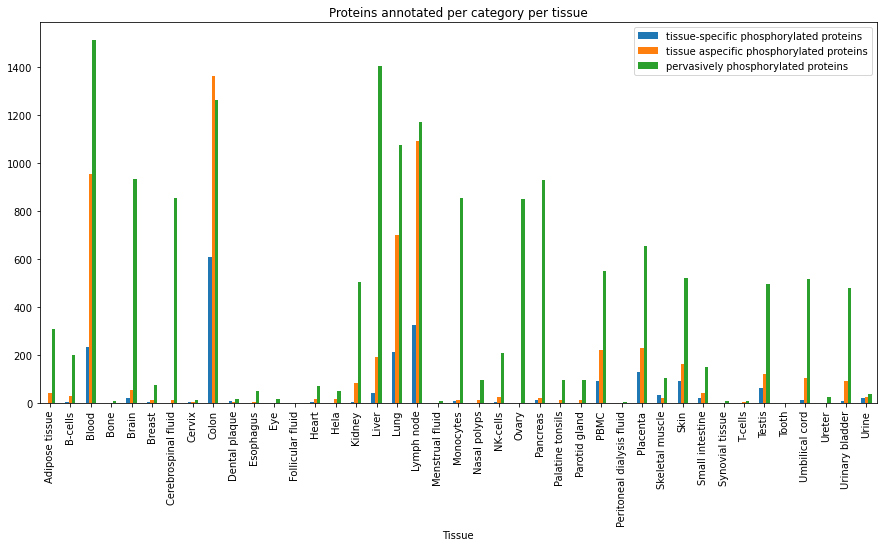

In [13]:
list_tspec = []
list_nontspec = []
list_genP = []
distribution = pd.DataFrame({"Tissue": list_tissues_STY})

for tissue in list_tissues_STY:
    count_missing_tspec = t_spec_prot_GO[tissue].sum()
    count_missing_nontspec = non_t_spec_prot_GO[tissue].sum()
    count_missing_genP = general_P_prot_GO[tissue].sum()
    list_tspec.append(count_missing_tspec)
    list_nontspec.append(count_missing_nontspec)
    list_genP.append(count_missing_genP)

distribution["tissue-specific phosphorylated proteins"] = list_tspec
distribution["tissue aspecific phosphorylated proteins"] = list_nontspec
distribution["pervasively phosphorylated proteins"] = list_genP
distribution[["Tissue", "tissue-specific phosphorylated proteins", "tissue aspecific phosphorylated proteins", "pervasively phosphorylated proteins"]].plot(x="Tissue", kind="bar", figsize=(15,7)).set(title="Proteins annotated per category per tissue")
#plt.savefig("WP2 GO_phosphoproteins_distr.png", format="png", bbox_inches="tight")

In [14]:
data_protein = pd.read_csv("protein_data", sep="\t")
print(data_protein.shape[0])
data_protein_GO1 = pd.merge(data_protein, Uniprot, how = "left", on=["ACC_ID"])
data_protein_GO = pd.merge(data_protein_GO1, GO_grouped, how="left", on=["ACC_ID"])
data_protein_GO = data_protein_GO[((data_protein_GO["Gene ontology IDs"].isna()==False)|
                                 (data_protein_GO["GO_term"].isna()==False))]
print(data_protein_GO.shape[0])
data_protein_GO.head()
#we loose 125 proteins due to lack of annotation -> the sum of the loss of the seperate categories

5855
5730


ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
0  A0A075B6H7               0        0      0     0      0       0   
1  A0A075B6S5               0        0      0     0      0       0   
2  A0A087WXM9               0        0      0     0      0       0   
3  A0A0B4J2D5               0        0      0     0      0       0   
4  A0A0B4J2D9               0        0      1     0      0       0   

   Cerebrospinal fluid  Cervix  Colon  ...        Gene names  Length  \
0                    0       0      0  ...           IGKV3-7   116.0   
1                    0       0      0  ...          IGKV1-27   117.0   
2                    0       0      0  ...            MEIKIN   373.0   
3                    0       0      0  ...  GATD3B HES1 KNPI   268.0   
4                    0       0      0  ...         IGKV1D-13   117.0   

                  Gene ontology (biological process)  \
0  adaptive immune response [GO:0002250]; immune ...   
1  adaptive immune response [GO:0002250]; immune ...   
2  female meiosis chromosome segregation [GO:0016...   
3                                                NaN   
4  adaptive immune response [GO:0002250]; immune ...   

                  Gene ontology (cellular component)  \
0  extracellular space [GO:0005615]; immunoglobul...   
1  extracellular space [GO:0005615]; immunoglobul...   
2  condensed chromosome, centromeric region [GO:0...   
3                         mitochondrion [GO:0005739]   
4  extracellular space [GO:0005615]; immunoglobul...   

                                  Gene ontology (GO)  \
0  extracellular space [GO:0005615]; immunoglobul...   
1  extracellular space [GO:0005615]; immunoglobul...   
2  condensed chromosome kinetochore [GO:0000777];...   
3                         mitochondrion [GO:0005739]   
4  extracellular space [GO:0005615]; immunoglobul...   

   Gene ontology (molecular function)  \
0                                 NaN   
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                                 NaN   

                                   Gene ontology IDs              Organism  \
0  GO:0002250; GO:0005615; GO:0005886; GO:0006955...  Homo sapiens (Human)   
1  GO:0002250; GO:0005615; GO:0005886; GO:0006955...  Homo sapiens (Human)   
2  GO:0000777; GO:0000779; GO:0007060; GO:0010789...  Homo sapiens (Human)   
3                                         GO:0005739  Homo sapiens (Human)   
4  GO:0002250; GO:0005615; GO:0005886; GO:0006955...  Homo sapiens (Human)   

     Status     GO_term  
0  reviewed         NaN  
1  reviewed         NaN  
2  reviewed  GO:0010789  
3  reviewed         NaN  
4  reviewed         NaN  

[5 rows x 55 columns]

In [15]:
missing_tspec = pd.merge(t_spec_prot, t_spec_prot_GO, how="outer", on=["ACC_ID"], indicator=True)
missing_tspec = missing_tspec[missing_tspec["_merge"]=="left_only"]
missing_tspec.drop(["Length", "Gene ontology (biological process)", "Gene ontology (cellular component)",
                  "Gene ontology (GO)", "Gene ontology (molecular function)", "Gene ontology IDs",
                  "Organism", "Status", "GO_term", "_merge", "Entry name", "Protein names", "Gene names"], axis=1, inplace=True)
for tissue in list_tissues_STY:
    missing_tspec.drop([tissue+"_y"], axis=1, inplace=True)
missing_tspec.drop(["Total_y"], axis=1, inplace=True)
missing_tspec

ACC_ID  Adipose tissue_x  B-cells_x  Blood_x  Bone_x  Brain_x  \
12    A0A0U1RRK4                 0          0        0       0        0   
13    A0A1B0GTD5                 0          0        1       0        0   
19        A1L429                 0          0        0       0        0   
22        A2A3L6                 0          0        0       0        0   
25        A2RUR9                 0          0        1       0        0   
...          ...               ...        ...      ...     ...      ...   
1675      Q9C0I3                 0          0        1       0        0   
1726      Q9H6K5                 0          0        0       0        0   
1739      Q9H8W3                 0          0        0       0        0   
1933      Q9ULK2                 0          0        0       0        0   
1973      Q9Y2E4                 0          0        0       0        0   

      Breast_x  Cerebrospinal fluid_x  Cervix_x  Colon_x  ...  \
12           0                      0         0        0  ...   
13           0                      0         0        0  ...   
19           0                      0         0        0  ...   
22           0                      0         0        1  ...   
25           0                      0         0        0  ...   
...        ...                    ...       ...      ...  ...   
1675         0                      0         0        0  ...   
1726         0                      0         0        1  ...   
1739         0                      0         0        0  ...   
1933         0                      0         0        0  ...   
1973         0                      0         0        0  ...   

      Small intestine_x  Synovial tissue_x  T-cells_x  Testis_x  Tooth_x  \
12                    0                  0          0         1        0   
13                    0                  0          0         0        0   
19                    0                  0          0         0        0   
22                    0                  0          0         0        0   
25                    0                  0          0         0        0   
...                 ...                ...        ...       ...      ...   
1675                  0                  0          0         0        0   
1726                  0                  0          0         0        0   
1739                  0                  0          0         1        0   
1933                  0                  0          0         0        0   
1973                  0                  0          0         0        0   

      Umbilical cord_x  Ureter_x  Urinary bladder_x  Urine_x  Total_x  
12                   0         0                  0        0        1  
13                   0         0                  0        0        1  
19                   0         0                  0        0        1  
22                   0         0                  0        0        1  
25                   0         0                  0        0        1  
...                ...       ...                ...      ...      ...  
1675                 0         0                  0        0        1  
1726                 0         0                  0        0        1  
1739                 0         0                  0        0        1  
1933                 0         0                  0        0        1  
1973                 0         0                  0        0        1  

[71 rows x 43 columns]

In [16]:
missing_nontspec = pd.merge(non_t_spec_prot, non_t_spec_prot_GO, how="outer", on=["ACC_ID"], indicator=True)
missing_nontspec = missing_nontspec[missing_nontspec["_merge"]=="left_only"]
missing_nontspec.drop(["Length", "Gene ontology (biological process)", "Gene ontology (cellular component)",
                  "Gene ontology (GO)", "Gene ontology (molecular function)", "Gene ontology IDs",
                  "Organism", "Status", "GO_term", "_merge", "Entry name", "Protein names", "Gene names"], axis=1, inplace=True)
for tissue in list_tissues_STY:
    missing_nontspec.drop([tissue+"_y"], axis=1, inplace=True)
missing_nontspec.drop(["Total_y"], axis=1, inplace=True)
print(missing_nontspec.shape[0])
missing_nontspec.head()

35


ACC_ID  Adipose tissue_x  B-cells_x  Blood_x  Bone_x  Brain_x  Breast_x  \
6   A1L170                 0          0        1       0        0         0   
11  A5YM69                 0          0        0       0        0         0   
13  A6NCF6                 0          0        0       0        0         0   
23  A8MT19                 0          0        1       0        0         0   
24  A8MU93                 0          0        0       0        1         0   

    Cerebrospinal fluid_x  Cervix_x  Colon_x  ...  Small intestine_x  \
6                       0         0        1  ...                  0   
11                      0         0        1  ...                  0   
13                      0         0        1  ...                  0   
23                      0         0        1  ...                  0   
24                      0         0        1  ...                  0   

    Synovial tissue_x  T-cells_x  Testis_x  Tooth_x  Umbilical cord_x  \
6                   0          0         0        0                 0   
11                  0          0         0        0                 0   
13                  0          0         0        0                 0   
23                  0          0         0        0                 0   
24                  0          0         0        0                 0   

    Ureter_x  Urinary bladder_x  Urine_x  Total_x  
6          0                  0        0        3  
11         0                  0        0        2  
13         0                  1        0        4  
23         0                  0        0        4  
24         0                  0        0        2  

[5 rows x 43 columns]

In [17]:
missing_genP = pd.merge(general_P_prot, general_P_prot_GO, how="outer", on=["ACC_ID"], indicator=True)
missing_genP = missing_genP[missing_genP["_merge"]=="left_only"]
missing_genP.drop(["Length", "Gene ontology (biological process)", "Gene ontology (cellular component)",
                  "Gene ontology (GO)", "Gene ontology (molecular function)", "Gene ontology IDs",
                  "Organism", "Status", "GO_term", "_merge", "Entry name", "Protein names", "Gene names"], axis=1, inplace=True)
for tissue in list_tissues_STY:
    missing_genP.drop([tissue+"_y"], axis=1, inplace=True)
missing_genP.drop(["Total_y"], axis=1, inplace=True)
print(missing_genP.shape[0])
missing_genP.head()

19


ACC_ID  Adipose tissue_x  B-cells_x  Blood_x  Bone_x  Brain_x  Breast_x  \
6    A6NEL2                 0          0        1       0        1         0   
22   O00193                 0          1        1       0        1         0   
160  O94819                 0          0        1       0        1         0   
901  Q14687                 0          0        1       0        1         0   
983  Q3MHD2                 1          0        0       0        0         0   

     Cerebrospinal fluid_x  Cervix_x  Colon_x  ...  Small intestine_x  \
6                        1         0        1  ...                  0   
22                       1         0        1  ...                  0   
160                      1         0        1  ...                  0   
901                      1         0        1  ...                  0   
983                      0         0        0  ...                  0   

     Synovial tissue_x  T-cells_x  Testis_x  Tooth_x  Umbilical cord_x  \
6                    0          0         0        0                 0   
22                   0          0         0        0                 1   
160                  0          0         0        0                 0   
901                  0          0         0        0                 0   
983                  0          0         0        0                 1   

     Ureter_x  Urinary bladder_x  Urine_x  Total_x  
6           0                  0        0        8  
22          0                  0        0       18  
160         0                  0        0        8  
901         0                  0        0       10  
983         0                  0        0        5  

[5 rows x 43 columns]

We add the amount of missing proteins, per tissue, per category, to the dataframe that contains the number of proteins in each of the three categories. The loss of proteins seems to be spreadin accordance to the number of proteins identified as being tissue-specific, tissue aspecific and pervasively phosphorylated proteins.

In [18]:
list_missing_tspec = []
list_missing_nontspec = []
list_missing_genP = []
list_all_tspec = []
list_all_genP = []
for tissue in list_tissues_STY:
    tissue=tissue+"_x"
    count_missing_tspec = missing_tspec[tissue].sum()
    count_missing_nontspec = missing_nontspec[tissue].sum()
    count_missing_genP = missing_genP[tissue].sum()
    list_missing_tspec.append(count_missing_tspec)
    list_missing_nontspec.append(count_missing_nontspec)
    list_missing_genP.append(count_missing_genP)
missing = pd.read_csv("number of three categories per tissue.tsv", sep="\t")
missing["missing tissue-specific phosphorylated proteins"] = list_missing_tspec
missing["missing tissue aspecific phosphorylated proteins"] = list_missing_nontspec
missing["missing pervasively phosphorylated proteins"] = list_missing_genP

[Text(0.5, 1.0, 'Proteins not annotated per category per tissue')]

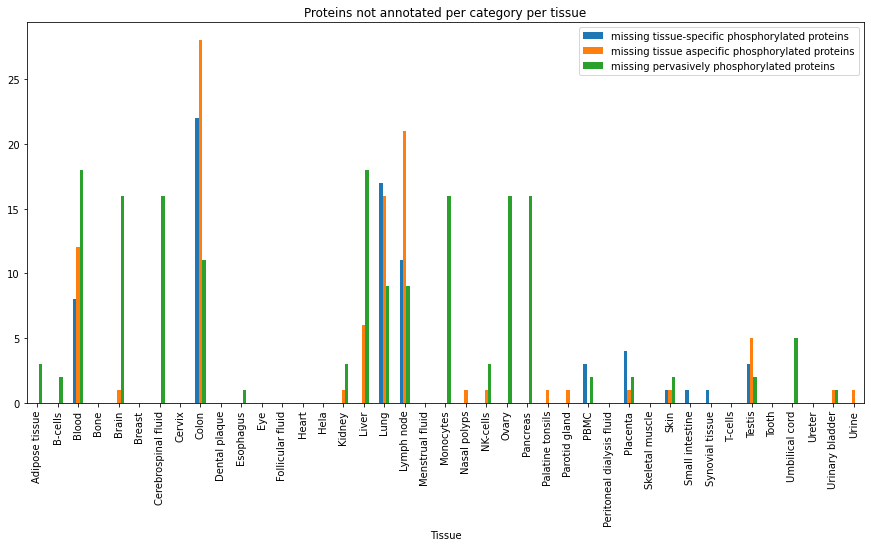

In [19]:
missing[["Tissue", "missing tissue-specific phosphorylated proteins", "missing tissue aspecific phosphorylated proteins", "missing pervasively phosphorylated proteins"]].plot(x="Tissue", kind="bar", figsize=(15,7)).set(title="Proteins not annotated per category per tissue")

In [20]:
missing

Tissue  number of tissue-specific proteins  \
0              Adipose tissue                                   0   
1                     B-cells                                   4   
2                       Blood                                 241   
3                        Bone                                   1   
4                       Brain                                  19   
5                      Breast                                   3   
6         Cerebrospinal fluid                                   1   
7                      Cervix                                   4   
8                       Colon                                 632   
9               Dental plaque                                   6   
10                  Esophagus                                   0   
11                        Eye                                   1   
12           Follicular fluid                                   0   
13                      Heart                                   3   
14                       Hela                                   0   
15                     Kidney                                   3   
16                      Liver                                  40   
17                       Lung                                 228   
18                 Lymph node                                 336   
19            Menstrual fluid                                   1   
20                  Monocytes                                   9   
21               Nasal polyps                                   0   
22                   NK-cells                                   5   
23                      Ovary                                   1   
24                   Pancreas                                  11   
25           Palatine tonsils                                   0   
26              Parotid gland                                   0   
27                       PBMC                                  95   
28  Peritoneal dialysis fluid                                   0   
29                   Placenta                                 131   
30            Skeletal muscle                                  33   
31                       Skin                                  91   
32            Small intestine                                  22   
33            Synovial tissue                                   2   
34                    T-cells                                   0   
35                     Testis                                  66   
36                      Tooth                                   0   
37             Umbilical cord                                  12   
38                     Ureter                                   1   
39            Urinary bladder                                   6   
40                      Urine                                  21   

    number of non tissue-specific proteins  \
0                                       39   
1                                       27   
2                                      966   
3                                        1   
4                                       56   
5                                       10   
6                                       11   
7                                        3   
8                                     1391   
9                                        3   
10                                       2   
11                                       1   
12                                       1   
13                                      15   
14                                      15   
15                                      84   
16                                     197   
17                                     717   
18                                    1113   
19                                       1   
20                                      11   
21                                      12   
22                                      27   
23                  

In [21]:
list_GO = data_protein_GO["Gene ontology IDs"].to_list()
print(list_GO[0:3])
split_list_GO=[]
for all_GO in list_GO:
    all_GO = str(all_GO)
    if ";" in all_GO:
        list_GO_sub = all_GO.split("; ")
        for GO in list_GO_sub:
            split_list_GO.append(GO)
    else:
        split_list_GO.append(all_GO)
uni_list_GO = []

split_list_GO_sorted = sorted(split_list_GO)
for i in range(len(split_list_GO_sorted)):
    if i == 0:
        uni_list_GO.append(split_list_GO_sorted[i])
    else:
        if split_list_GO_sorted[i-1] != split_list_GO_sorted[i]:
            uni_list_GO.append(split_list_GO_sorted[i])

['GO:0002250; GO:0005615; GO:0005886; GO:0006955; GO:0019814', 'GO:0002250; GO:0005615; GO:0005886; GO:0006955; GO:0019814', 'GO:0000777; GO:0000779; GO:0007060; GO:0010789; GO:0016321; GO:0045143; GO:0051754']


In [22]:
print(len(uni_list_GO))

12557


In [23]:
list_quick = GO_annot_map["GO_term"].to_list()
split_list_GO = []
for all_GO in list_quick:
    all_GO = str(all_GO)
    if ";" in all_GO:
        list_GO_sub = all_GO.split("; ")
        for GO in list_GO_sub:
            split_list_GO.append(GO)
    else:
        split_list_GO.append(all_GO)

uni_list_quick = []
split_list_GO_sorted = sorted(split_list_GO)
for i in range(len(split_list_GO_sorted)):
    if split_list_GO_sorted[i] not in uni_list_GO:
        if len(uni_list_quick)==0:
            uni_list_quick.append(split_list_GO_sorted[i])
        else:
            if uni_list_quick[-1]!=split_list_GO_sorted[i]:
                uni_list_quick.append(split_list_GO_sorted[i])

In [24]:
print(len(uni_list_quick))

6236


In [25]:
uni_list_all = uni_list_GO + uni_list_quick
uni_list_all = sorted(uni_list_all)
print(len(uni_list_all))

18793


In [26]:
print(len(uni_list_GO)+len(uni_list_quick))

18793


In [27]:
list_GO_tspec = t_spec_prot_GO["Gene ontology IDs"].to_list()
print(list_GO_tspec[0:3])
split_list_GO_tspec=[]
for all_GO in list_GO_tspec:
    all_GO = str(all_GO)
    if ";" in all_GO:
        list_GO_sub_tspec = all_GO.split("; ")
        for GO in list_GO_sub_tspec:
            split_list_GO_tspec.append(GO)
    else:
        split_list_GO_tspec.append(all_GO)
uni_list_GO_tspec = []
split_list_GO_sorted_tspec = sorted(split_list_GO_tspec)
for i in range(len(split_list_GO_sorted_tspec)):
    if i == 0:
        uni_list_GO_tspec.append(split_list_GO_sorted_tspec[i])
    else:
        if split_list_GO_sorted_tspec[i-1] != split_list_GO_sorted_tspec[i]:
            uni_list_GO_tspec.append(split_list_GO_sorted_tspec[i])
print(len(uni_list_GO_tspec))

['GO:0002250; GO:0005615; GO:0005886; GO:0006955; GO:0019814', 'GO:0002250; GO:0005615; GO:0005886; GO:0006955; GO:0019814', 'GO:0000777; GO:0000779; GO:0007060; GO:0010789; GO:0016321; GO:0045143; GO:0051754']
7588


In [28]:
list_GO_nontspec = non_t_spec_prot_GO["Gene ontology IDs"].to_list()
print(list_GO_nontspec[0:3])
split_list_GO_nontspec=[]
for all_GO in list_GO_nontspec:
    all_GO = str(all_GO)
    if ";" in all_GO:
        list_GO_sub_nontspec = all_GO.split("; ")
        for GO in list_GO_sub_nontspec:
            split_list_GO_nontspec.append(GO)
    else:
        split_list_GO_nontspec.append(all_GO)
uni_list_GO_nontspec = []
split_list_GO_sorted_nontspec = sorted(split_list_GO_nontspec)
for i in range(len(split_list_GO_sorted_nontspec)):
    if i == 0:
        uni_list_GO_nontspec.append(split_list_GO_sorted_nontspec[i])
    else:
        if split_list_GO_sorted_nontspec[i-1] != split_list_GO_sorted_nontspec[i]:
            uni_list_GO_nontspec.append(split_list_GO_sorted_nontspec[i])
print(len(list_GO_nontspec))

['GO:0003823; GO:0006910; GO:0006911; GO:0006958; GO:0009897; GO:0034987; GO:0042571; GO:0042742; GO:0045087; GO:0050853; GO:0050871', 'GO:0000122; GO:0000785; GO:0000978; GO:0000981; GO:0000987; GO:0001217; GO:0001227; GO:0001890; GO:0002040; GO:0003700; GO:0005654; GO:0005730; GO:0005829; GO:0006357; GO:0006977; GO:0008283; GO:0032466; GO:0032877; GO:0033301; GO:0042802; GO:0045944; GO:0060707; GO:0060718; GO:0070365; GO:0090575; GO:1990837', 'GO:0003712; GO:0008134; GO:0016592; GO:0045944']
2039


In [29]:
list_GO_gen = general_P_prot_GO["Gene ontology IDs"].to_list()
print(list_GO_gen[0:3])
split_list_GO_gen=[]
for all_GO in list_GO_gen:
    all_GO = str(all_GO)
    if ";" in all_GO:
        list_GO_sub_gen = all_GO.split("; ")
        for GO in list_GO_sub_gen:
            split_list_GO_gen.append(GO)
    else:
        split_list_GO_gen.append(all_GO)
uni_list_GO_gen = []
split_list_GO_sorted_gen = sorted(split_list_GO_gen)
for i in range(len(split_list_GO_sorted_gen)):
    if i == 0:
        uni_list_GO_tspec.append(split_list_GO_sorted_gen[i])
    else:
        if split_list_GO_sorted_gen[i-1] != split_list_GO_sorted_gen[i]:
            uni_list_GO_gen.append(split_list_GO_sorted_gen[i])
print(len(list_GO_gen))

['GO:0003823; GO:0006910; GO:0006911; GO:0006958; GO:0009897; GO:0034987; GO:0042571; GO:0042742; GO:0045087; GO:0050853; GO:0050871', 'GO:0005509; GO:0005544; GO:0005789; GO:0005887; GO:0006687; GO:0006869; GO:0006897; GO:0008429; GO:0016020; GO:0031210; GO:0031227; GO:0031234; GO:0035091; GO:0042802; GO:0044232; GO:0045296; GO:0061817; GO:0140268', 'GO:0005769; GO:0005829; GO:0042803; GO:0062069']
1733


## Molecular function

We'll now take a look at the GO terms classified under 'Molecular function'. Not all proteins are associated with a GO term of this class. In fact, this seems to go for only a minority of proteins in each of the three categories. We then count the amount of proteins associated with a certain amount of GO terms. The majority of the proteins is associated with 1-10 GO terms of this category, if they are associated wiht at least one term of this category. We then proceed to count the number of proteins per GO term, per each of the three categories. As the QuickGO data does not distinguish between these three categories, it will not be considered for this part.

In [30]:
t_spec_prot_GO_mf = t_spec_prot_GO.copy()
for GO in uni_list_GO:
    t_spec_prot_GO_mf[GO] = t_spec_prot_GO_mf["Gene ontology (molecular function)"].str.contains(GO)
t_spec_prot_GO_mf.head()
t_spec_prot_GO_mf["nr GO terms_mf"] = t_spec_prot_GO_mf[uni_list_GO].sum(axis=1)
t_spec_prot_GO_mf.dropna(inplace=True)
t_spec_prot_GO_mf.replace({True: 1, False:0}, inplace=True)
t_spec_prot_GO_mf.head(10)
t_spec_prot_GO_mf.sort_values(by="nr GO terms_mf", ascending=False)

C:\Users\hannedvo\AppData\Local\Temp\266/ipykernel_32704/604480705.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  t_spec_prot_GO_mf[GO] = t_spec_prot_GO_mf["Gene ontology (molecular function)"].str.contains(GO)


ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
559   P37231               0        0      0     0      0       0   
574   P42330               0        0      0     0      0       0   
762   Q04828               0        0      0     0      0       0   
494   P27695               0        0      0     0      0       0   
181   O60674               0        0      0     0      0       0   
...      ...             ...      ...    ...   ...    ...     ...   
1621  Q9BVC4               0        0      0     0      0       0   
928   Q17RC7               0        0      0     0      0       0   
1598  Q9BQP7               0        0      0     0      0       0   
1596  Q9BQF6               0        0      0     0      0       0   
641   P51788               0        0      0     0      0       0   

      Cerebrospinal fluid  Cervix  Colon  ...  GO:2001268  GO:2001269  \
559                     0       0      1  ...           0           0   
574                     0       0      0  ...           0           0   
762                     0       0      0  ...           0           0   
494                     0       0      0  ...           0           0   
181                     0       0      0  ...           0           0   
...                   ...     ...    ...  ...         ...         ...   
1621                    0       0      0  ...           0           0   
928                     0       0      0  ...           0           0   
1598                    0       0      1  ...           0           0   
1596                    0       0      0  ...           0           0   
641                     0       0      1  ...           0           0   

      GO:2001271  GO:2001272  GO:2001286  GO:2001287  GO:2001288  GO:2001295  \
559            0           0           0           0           0           0   
574            0           0           0           0           0           0   
762            0           0           0           0           0           0   
494            0           0           0           0           0           0   
181            0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
1621           0           0           0           0           0           0   
928            0           0           0           0           0           0   
1598           0           0           0           0           0           0   
1596           0           0           0           0           0           0   
641            0           0           0           0           0           0   

      GO:2001302  nr GO terms_mf  
559            0            27.0  
574            0            25.0  
762            0            22.0  
494            0            22.0  
181            0            20.0  
...          ...             ...  
1621           0             1.0  
928            0             1.0  
1598           0             1.0  
1596           0             1.0  
641            0             1.0  

[644 rows x 12613 columns]

In [31]:
non_t_spec_prot_GO_mf = non_t_spec_prot_GO.copy()
for GO in uni_list_GO:
    non_t_spec_prot_GO_mf[GO] = non_t_spec_prot_GO_mf["Gene ontology (molecular function)"].str.contains(GO)
non_t_spec_prot_GO_mf["nr GO terms_mf"] = non_t_spec_prot_GO_mf[uni_list_GO].sum(axis=1)
non_t_spec_prot_GO_mf.dropna(inplace=True)
non_t_spec_prot_GO_mf.replace({True: 1, False:0}, inplace=True)
non_t_spec_prot_GO_mf.head(10)
non_t_spec_prot_GO_mf.sort_values(by="nr GO terms_mf", ascending=False)

C:\Users\hannedvo\AppData\Local\Temp\266/ipykernel_32704/3589405796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  non_t_spec_prot_GO_mf[GO] = non_t_spec_prot_GO_mf["Gene ontology (molecular function)"].str.contains(GO)


ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
293   P04637               0        0      1     0      0       0   
801   Q08211               0        0      0     0      0       0   
1589  Q99497               0        0      0     0      0       0   
377   P12931               0        0      0     0      0       0   
264   P00519               0        0      0     0      0       0   
...      ...             ...      ...    ...   ...    ...     ...   
856   Q13433               0        0      1     0      0       0   
1725  Q9H320               0        0      0     0      0       0   
1716  Q9H1Z4               0        0      0     0      0       0   
130   O60216               0        0      1     0      0       0   
1687  Q9C0E2               0        0      0     0      0       0   

      Cerebrospinal fluid  Cervix  Colon  ...  GO:2001268  GO:2001269  \
293                     0       0      1  ...           0           0   
801                     0       0      0  ...           0           0   
1589                    0       0      0  ...           0           0   
377                     0       0      1  ...           0           0   
264                     0       0      1  ...           0           0   
...                   ...     ...    ...  ...         ...         ...   
856                     0       0      1  ...           0           0   
1725                    0       0      0  ...           0           0   
1716                    0       0      1  ...           0           0   
130                     0       0      0  ...           0           0   
1687                    0       0      1  ...           0           0   

      GO:2001271  GO:2001272  GO:2001286  GO:2001287  GO:2001288  GO:2001295  \
293            0           0           0           0           0           0   
801            0           0           0           0           0           0   
1589           0           0           0           0           0           0   
377            0           0           0           0           0           0   
264            0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
856            0           0           0           0           0           0   
1725           0           0           0           0           0           0   
1716           0           0           0           0           0           0   
130            0           0           0           0           0           0   
1687           0           0           0           0           0           0   

      GO:2001302  nr GO terms_mf  
293            0            35.0  
801            0            35.0  
1589           0            30.0  
377            0            27.0  
264            0            26.0  
...          ...             ...  
856            0             1.0  
1725           0             1.0  
1716           0             1.0  
130            0             1.0  
1687           0             1.0  

[709 rows x 12613 columns]

In [107]:
general_P_prot_GO_mf = general_P_prot_GO.copy()
for GO in uni_list_GO:
    general_P_prot_GO_mf[GO] = general_P_prot_GO_mf["Gene ontology (molecular function)"].str.contains(GO)
general_P_prot_GO_mf["nr GO terms_mf"] = general_P_prot_GO_mf[uni_list_GO].sum(axis=1)
general_P_prot_GO_mf.dropna(inplace=True)
general_P_prot_GO_mf.replace({True: 1, False:0}, inplace=True)
general_P_prot_GO_mf.head(10)
general_P_prot_GO_mf.sort_values(by="nr GO terms_mf", ascending=False)

C:\Users\hannedvo\AppData\Local\Temp\41/ipykernel_36084/1700558431.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  general_P_prot_GO_mf[GO] = general_P_prot_GO_mf["Gene ontology (molecular function)"].str.contains(GO)


ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
803   Q09472               0        0      1     0      0       0   
292   P08238               1        1      1     1      1       0   
1014  Q5S007               0        0      0     0      0       0   
750   Q00839               0        0      1     0      0       0   
311   P09429               0        0      1     0      0       0   
...      ...             ...      ...    ...   ...    ...     ...   
319   P0C1Z6               0        0      1     0      0       0   
1334  Q969X6               0        0      1     0      1       0   
363   P12236               0        0      1     0      1       0   
371   P13489               1        0      1     0      1       0   
3     A2RU30               0        0      1     0      1       0   

      Cerebrospinal fluid  Cervix  Colon  ...  GO:2001268  GO:2001269  \
803                     0       0      1  ...           0           0   
292                     1       0      1  ...           0           0   
1014                    0       0      1  ...           0           0   
750                     0       0      1  ...           0           0   
311                     0       0      0  ...           0           0   
...                   ...     ...    ...  ...         ...         ...   
319                     0       0      1  ...           0           0   
1334                    1       0      0  ...           0           0   
363                     1       0      0  ...           0           0   
371                     1       0      0  ...           0           0   
3                       1       0      0  ...           0           0   

      GO:2001271  GO:2001272  GO:2001286  GO:2001287  GO:2001288  GO:2001295  \
803            0           0           0           0           0           0   
292            0           0           0           0           0           0   
1014           0           0           0           0           0           0   
750            0           0           0           0           0           0   
311            0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
319            0           0           0           0           0           0   
1334           0           0           0           0           0           0   
363            0           0           0           0           0           0   
371            0           0           0           0           0           0   
3              0           0           0           0           0           0   

      GO:2001302  nr GO terms_mf  
803            0            31.0  
292            0            31.0  
1014           0            28.0  
750            0            27.0  
311            0            25.0  
...          ...             ...  
319            0             1.0  
1334           0             1.0  
363            0             1.0  
371            0             1.0  
3              0             1.0  

[687 rows x 12613 columns]

<Figure size 1080x504 with 0 Axes>

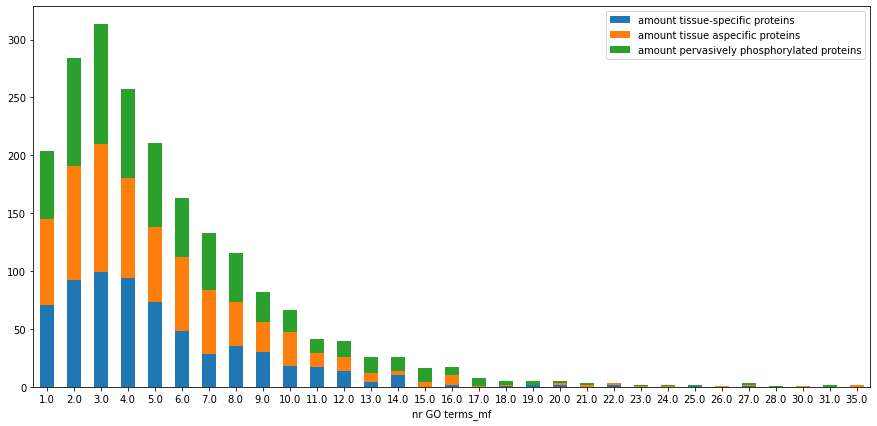

nr GO terms_mf  amount tissue-specific proteins  \
0              1.0                             71.0   
1              2.0                             92.0   
2              3.0                             99.0   
3              4.0                             94.0   
4              5.0                             73.0   
5              6.0                             48.0   
6              7.0                             28.0   
7              8.0                             35.0   
8              9.0                             30.0   
9             10.0                             18.0   
10            11.0                             17.0   
11            12.0                             14.0   
12            13.0                              4.0   
13            14.0                             10.0   
21            15.0                              NaN   
14            16.0                              2.0   
22            17.0                              NaN   
15            18.0                              1.0   
16            19.0                              2.0   
17            20.0                              2.0   
23            21.0                              NaN   
18            22.0                              2.0   
24            23.0                              NaN   
25            24.0                              NaN   
19            25.0                              1.0   
26            26.0                              NaN   
20            27.0                              1.0   
29            28.0                              NaN   
27            30.0                              NaN   
30            31.0                              NaN   
28            35.0                              NaN   

    amount tissue aspecific proteins  \
0                               74.0   
1                               99.0   
2                              111.0   
3                               86.0   
4                               65.0   
5                               64.0   
6                               56.0   
7                               38.0   
8                               26.0   
9                               29.0   
10                              12.0   
11                              12.0   
12                               8.0   
13                               4.0   
21                               4.0   
14                               8.0   
22                               1.0   
15                               1.0   
16                               NaN   
17                               1.0   
23                               2.0   
18                               1.0   
24                               1.0   
25                               1.0   
19                               NaN   
26                               1.0   
20                               1.0   
29                               NaN   
27                               1.0   
30                               NaN   
28                               2.0   

    amount pervasively phosphorylated proteins  Total  
0                                         59.0  204.0  
1                                         93.0  284.0  
2                                        103.0  313.0  
3                                         77.0  257.0  
4                                         73.0  211.0  
5                                         51.0  163.0  
6                                         49.0  133.0  
7                                         43.0  116.0  
8                                         26.0   82.0  
9                                         19.0   66.0  
10                                        12.0   41.0  
11                                        14.0   40.0  
12                                        14.0   26.0  
13                                        12.0   26.0  
21                                        12.0   16.0  
14                                         7.0   17.0  
22        

In [25]:
grouped_tspec_mf = t_spec_prot_GO_mf.groupby(["nr GO terms_mf"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_mf = non_t_spec_prot_GO_mf.groupby(["nr GO terms_mf"], as_index=False)["ACC_ID"].nunique()
grouped_general_mf = general_P_prot_GO_mf.groupby(["nr GO terms_mf"], as_index=False)["ACC_ID"].nunique()

grouped_all_mf1 = pd.merge(grouped_tspec_mf, grouped_nontspec_mf, how="outer", on=["nr GO terms_mf"], suffixes=("_tspec", "_nontspec"))
grouped_all_mf = pd.merge(grouped_all_mf1, grouped_general_mf, how="outer", on=["nr GO terms_mf"])
grouped_all_mf.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount tissue aspecific proteins",
                                "ACC_ID": "amount pervasively phosphorylated proteins"}, inplace=True)
grouped_all_mf.sort_values(by="nr GO terms_mf", inplace=True)
plt.figure(figsize=(15,7))
grouped_all_mf.set_index("nr GO terms_mf").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_all_mf["Total"] = grouped_all_mf[["amount tissue-specific proteins", "amount tissue aspecific proteins",
                                            "amount pervasively phosphorylated proteins"]].sum(axis=1)
grouped_all_mf

Some GO terms are associated with a high number of proteins. This points towards a more general GO temr, given the hierarchy of the GO terms.

([], [])

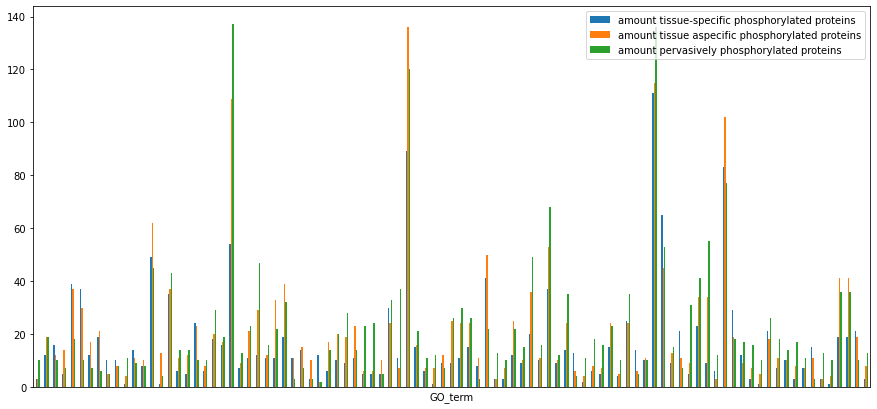

In [26]:
dfGO_mf = pd.DataFrame({"GO_term": uni_list_GO})
tspec_count_mf = []
nontspec_count_mf = []
general_count_mf = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = t_spec_prot_GO_mf[GO].sum()
        tspec_count_mf.append(count_tspec)
    else:
        tspec_count_mf.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = non_t_spec_prot_GO_mf[GO].sum()
        nontspec_count_mf.append(count_nontspec)
    else:
        nontspec_count_mf.append(0)
    if GO in uni_list_GO_gen:
        count_general = general_P_prot_GO_mf[GO].sum()
        general_count_mf.append(count_general)
    else:
        general_count_mf.append(0)
dfGO_mf["amount tissue-specific phosphorylated proteins"] = tspec_count_mf
dfGO_mf["amount tissue aspecific phosphorylated proteins"] = nontspec_count_mf
dfGO_mf["amount pervasively phosphorylated proteins"] = general_count_mf
dfGO_mf[(dfGO_mf["amount tissue-specific phosphorylated proteins"]>=10)|(dfGO_mf["amount tissue aspecific phosphorylated proteins"]>=10)
       |(dfGO_mf["amount pervasively phosphorylated proteins"]>=10)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])

In [27]:
dfGO_mf[(dfGO_mf["amount tissue-specific phosphorylated proteins"]>30)|(dfGO_mf["amount tissue aspecific phosphorylated proteins"]>30)
       |(dfGO_mf["amount pervasively phosphorylated proteins"]>30)]

GO_term  amount tissue-specific phosphorylated proteins  \
249    GO:0000978                                              39   
251    GO:0000981                                              37   
908    GO:0003677                                              49   
912    GO:0003682                                              35   
928    GO:0003723                                              54   
943    GO:0003779                                              12   
1224   GO:0004672                                              11   
1226   GO:0004674                                              19   
1493   GO:0005509                                              30   
1495   GO:0005516                                              11   
1502   GO:0005524                                              89   
2537   GO:0008270                                              41   
3923   GO:0019899                                              20   
3925   GO:0019901                                              37   
3928   GO:0019904                                              14   
4725   GO:0031625                                              25   
6464   GO:0042802                                             111   
6465   GO:0042803                                              65   
6868   GO:0044325                                               5   
6946   GO:0044877                                              23   
7046   GO:0045296                                               9   
7453   GO:0046872                                              83   
10695  GO:0106310                                              19   
10696  GO:0106311                                              19   

       amount tissue aspecific phosphorylated proteins  \
249                                                 37   
251                                                 30   
908                                                 62   
912                                                 37   
928                                                109   
943                                                 29   
1224                                                33   
1226                                                39   
1493                                                24   
1495                                                 7   
1502                                               136   
2537                                                50   
3923                                                36   
3925                                                53   
3928                                                24   
4725                                                24   
6464                                               115   
6465                                                45   
6868                                                 9   
6946                                                34   
7046                                                34   
7453                                               102   
10695                                               41   
10696                                               41   

       amount pervasively phosphorylated proteins  
249                                            18  
251                                            10  
908                                            45  
912                                            43  
928                                           137  
943                                            47  
1224                                           22  
1226                                           32  
1493                                           33  
1495                                           37  
1502                                          120  
2537                                           22  
3923                                           49  
3925                                           68  
3928                                           35  
4

## Biological process

We proceed to repat the analysis as described for molecular function, above. The same goes here: only a minority of the proteins is associated with at least one GO term of this category.

In [108]:
t_spec_prot_GO_bp = t_spec_prot_GO.copy()
for GO in uni_list_GO:
    t_spec_prot_GO_bp[GO] = t_spec_prot_GO_bp["Gene ontology (biological process)"].str.contains(GO)
t_spec_prot_GO_bp["nr GO terms_bp"] = t_spec_prot_GO_bp[uni_list_GO].sum(axis=1)
t_spec_prot_GO_bp.dropna(inplace=True)
t_spec_prot_GO_bp.replace({True: 1, False:0}, inplace=True)
t_spec_prot_GO_bp.head(10)
t_spec_prot_GO_bp.sort_values(by="nr GO terms_bp", ascending=False)

C:\Users\hannedvo\AppData\Local\Temp\41/ipykernel_36084/489498946.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  t_spec_prot_GO_bp[GO] = t_spec_prot_GO_bp["Gene ontology (biological process)"].str.contains(GO)


ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
596  P48436               0        0      0     0      0       0   
295  P02649               0        0      1     0      0       0   
383  P10415               0        0      1     0      0       0   
285  P01584               0        0      0     0      0       0   
181  O60674               0        0      0     0      0       0   
..      ...             ...      ...    ...   ...    ...     ...   
53   C9JRZ8               0        0      0     0      0       0   
572  P42126               0        0      0     0      0       0   
722  P69849               0        0      1     0      0       0   
506  P30043               0        0      0     0      0       0   
816  Q13228               0        0      0     0      0       0   

     Cerebrospinal fluid  Cervix  Colon  ...  GO:2001268  GO:2001269  \
596                    0       0      1  ...           0           0   
295                    0       0      0  ...           0           0   
383                    0       0      0  ...           0           0   
285                    0       0      0  ...           0           0   
181                    0       0      0  ...           0           0   
..                   ...     ...    ...  ...         ...         ...   
53                     0       0      0  ...           0           0   
572                    0       0      0  ...           0           0   
722                    0       0      0  ...           0           0   
506                    0       0      0  ...           0           0   
816                    0       0      0  ...           0           0   

     GO:2001271  GO:2001272  GO:2001286  GO:2001287  GO:2001288  GO:2001295  \
596           0           0           0           0           0           0   
295           0           0           0           0           0           0   
383           0           0           0           0           0           0   
285           0           0           0           0           0           0   
181           0           0           0           0           0           0   
..          ...         ...         ...         ...         ...         ...   
53            0           0           0           0           0           0   
572           0           0           0           0           0           0   
722           0           0           0           0           0           0   
506           0           0           0           0           0           0   
816           0           0           0           0           0           0   

     GO:2001302  nr GO terms_bp  
596           0           125.0  
295           0           116.0  
383           0           110.0  
285           0            88.0  
181           0            84.0  
..          ...             ...  
53            0             1.0  
572           0             1.0  
722           0             1.0  
506           0             1.0  
816           0             1.0  

[644 rows x 12613 columns]

In [109]:
non_t_spec_prot_GO_bp = non_t_spec_prot_GO.copy()
for GO in uni_list_GO:
    non_t_spec_prot_GO_bp[GO] = non_t_spec_prot_GO_bp["Gene ontology (biological process)"].str.contains(GO)
non_t_spec_prot_GO_bp["nr GO terms_bp"] = non_t_spec_prot_GO_bp[uni_list_GO].sum(axis=1)
non_t_spec_prot_GO_bp.dropna(inplace=True)
non_t_spec_prot_GO_bp.replace({True: 1, False:0}, inplace=True)
non_t_spec_prot_GO_bp.head(10)
non_t_spec_prot_GO_bp.sort_values(by="nr GO terms_bp", ascending=False)

C:\Users\hannedvo\AppData\Local\Temp\41/ipykernel_36084/1593518320.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  non_t_spec_prot_GO_bp[GO] = non_t_spec_prot_GO_bp["Gene ontology (biological process)"].str.contains(GO)


ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
293   P04637               0        0      1     0      0       0   
377   P12931               0        0      0     0      0       0   
1493  Q96EB6               0        0      1     0      0       0   
563   P42345               0        0      1     0      0       0   
264   P00519               0        0      0     0      0       0   
...      ...             ...      ...    ...   ...    ...     ...   
810   Q12765               0        0      0     0      0       0   
631   P51798               0        0      1     0      0       0   
595   P48651               0        0      1     0      0       0   
1960  Q9ULD2               0        0      0     0      0       0   
1752  Q9H7M6               0        0      0     0      0       0   

      Cerebrospinal fluid  Cervix  Colon  ...  GO:2001268  GO:2001269  \
293                     0       0      1  ...           0           0   
377                     0       0      1  ...           0           0   
1493                    0       0      1  ...           0           0   
563                     0       0      0  ...           0           0   
264                     0       0      1  ...           0           0   
...                   ...     ...    ...  ...         ...         ...   
810                     0       0      0  ...           0           0   
631                     0       0      0  ...           0           0   
595                     0       0      1  ...           0           0   
1960                    0       0      1  ...           0           0   
1752                    0       0      0  ...           0           0   

      GO:2001271  GO:2001272  GO:2001286  GO:2001287  GO:2001288  GO:2001295  \
293            0           0           0           0           0           0   
377            0           0           1           0           0           0   
1493           0           0           0           0           0           0   
563            0           0           0           0           0           0   
264            0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
810            0           0           0           0           0           0   
631            0           0           0           0           0           0   
595            0           0           0           0           0           0   
1960           0           0           0           0           0           0   
1752           0           0           0           0           0           0   

      GO:2001302  nr GO terms_bp  
293            0           127.0  
377            0           119.0  
1493           0           113.0  
563            0           107.0  
264            0           102.0  
...          ...             ...  
810            0             1.0  
631            0             1.0  
595            0             1.0  
1960           0             1.0  
1752           0             1.0  

[709 rows x 12613 columns]

In [110]:
general_P_prot_GO_bp = general_P_prot_GO.copy()
for GO in uni_list_GO:
    general_P_prot_GO_bp[GO] = general_P_prot_GO_bp["Gene ontology (biological process)"].str.contains(GO)
general_P_prot_GO_bp["nr GO terms_bp"] = general_P_prot_GO_bp[uni_list_GO].sum(axis=1)
general_P_prot_GO_bp.dropna(inplace=True)
general_P_prot_GO_bp.replace({True: 1, False:0}, inplace=True)
general_P_prot_GO_bp.head(10)
general_P_prot_GO_bp.sort_values(by="nr GO terms_bp", ascending=False)

C:\Users\hannedvo\AppData\Local\Temp\41/ipykernel_36084/3034636860.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  general_P_prot_GO_bp[GO] = general_P_prot_GO_bp["Gene ontology (biological process)"].str.contains(GO)


ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
517   P31749               0        0      1     0      1       0   
770   Q03135               0        0      0     0      0       1   
1014  Q5S007               0        0      0     0      0       0   
201   P00533               0        0      0     0      0       0   
290   P07948               0        0      1     0      0       0   
...      ...             ...      ...    ...   ...    ...     ...   
33    O00567               0        1      1     0      1       0   
1447  Q9BVG9               0        0      1     0      0       0   
1210  Q8N414               0        0      1     0      1       0   
32    O00559               0        0      1     0      1       0   
880   Q14123               0        0      1     0      1       0   

      Cerebrospinal fluid  Cervix  Colon  ...  GO:2001268  GO:2001269  \
517                     1       0      1  ...           0           0   
770                     0       0      1  ...           0           0   
1014                    0       0      1  ...           0           0   
201                     0       0      1  ...           0           0   
290                     0       0      1  ...           0           0   
...                   ...     ...    ...  ...         ...         ...   
33                      0       0      1  ...           0           0   
1447                    0       0      1  ...           0           0   
1210                    1       0      0  ...           0           0   
32                      1       0      0  ...           0           0   
880                     1       0      0  ...           0           0   

      GO:2001271  GO:2001272  GO:2001286  GO:2001287  GO:2001288  GO:2001295  \
517            0           0           0           0           0           0   
770            0           0           0           0           0           0   
1014           0           0           0           0           0           0   
201            0           0           0           0           0           0   
290            0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
33             0           0           0           0           0           0   
1447           0           0           0           0           0           0   
1210           0           0           0           0           0           0   
32             0           0           0           0           0           0   
880            0           0           0           0           0           0   

      GO:2001302  nr GO terms_bp  
517            0           151.0  
770            0           102.0  
1014           0            97.0  
201            0            92.0  
290            0            86.0  
...          ...             ...  
33             0             1.0  
1447           0             1.0  
1210           0             1.0  
32             0             1.0  
880            0             1.0  

[687 rows x 12613 columns]

Generally speaking, the proteins that are associated with at least one GO term of the category biological process, are associated with more GO terms BP than MF. The majority of the proteins is associated with 1-18 GO terms (compared to 1-10 for molecular fucntion).

<Figure size 1080x504 with 0 Axes>

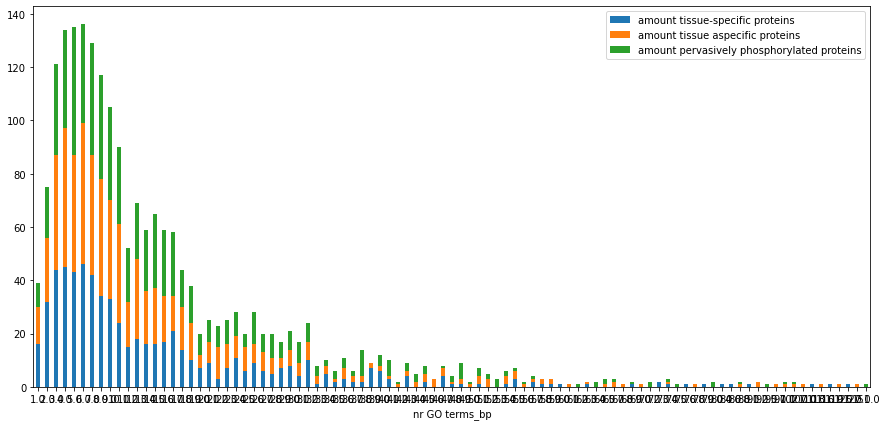

nr GO terms_bp  amount tissue-specific proteins  \
0              1.0                             16.0   
1              2.0                             32.0   
2              3.0                             44.0   
3              4.0                             45.0   
4              5.0                             43.0   
..             ...                              ...   
62           116.0                              1.0   
83           119.0                              NaN   
63           125.0                              1.0   
84           127.0                              NaN   
92           151.0                              NaN   

    amount tissue aspecific proteins  \
0                               14.0   
1                               24.0   
2                               43.0   
3                               52.0   
4                               44.0   
..                               ...   
62                               NaN   
83                               1.0   
63                               NaN   
84                               1.0   
92                               NaN   

    amount pervasively phosphorylated proteins  Total  
0                                          9.0   39.0  
1                                         19.0   75.0  
2                                         34.0  121.0  
3                                         37.0  134.0  
4                                         48.0  135.0  
..                                         ...    ...  
62                                         NaN    1.0  
83                                         NaN    1.0  
63                                         NaN    1.0  
84                                         NaN    1.0  
92                                         1.0    1.0  

[93 rows x 5 columns]

In [31]:
grouped_tspec_bp = t_spec_prot_GO_bp.groupby(["nr GO terms_bp"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_bp = non_t_spec_prot_GO_bp.groupby(["nr GO terms_bp"], as_index=False)["ACC_ID"].nunique()
grouped_general_bp = general_P_prot_GO_bp.groupby(["nr GO terms_bp"], as_index=False)["ACC_ID"].nunique()

grouped_all_bp1 = pd.merge(grouped_tspec_bp, grouped_nontspec_bp, how="outer", on=["nr GO terms_bp"], suffixes=("_tspec", "_nontspec"))
grouped_all_bp = pd.merge(grouped_all_bp1, grouped_general_bp, how="outer", on=["nr GO terms_bp"])
grouped_all_bp.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount tissue aspecific proteins",
                                "ACC_ID": "amount pervasively phosphorylated proteins"}, inplace=True)
grouped_all_bp.sort_values(by="nr GO terms_bp", inplace=True)
plt.figure(figsize=(15,7))
grouped_all_bp.set_index("nr GO terms_bp").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_all_bp["Total"] = grouped_all_bp[["amount tissue-specific proteins", "amount tissue aspecific proteins",
                                            "amount pervasively phosphorylated proteins"]].sum(axis=1)
grouped_all_bp

([], [])

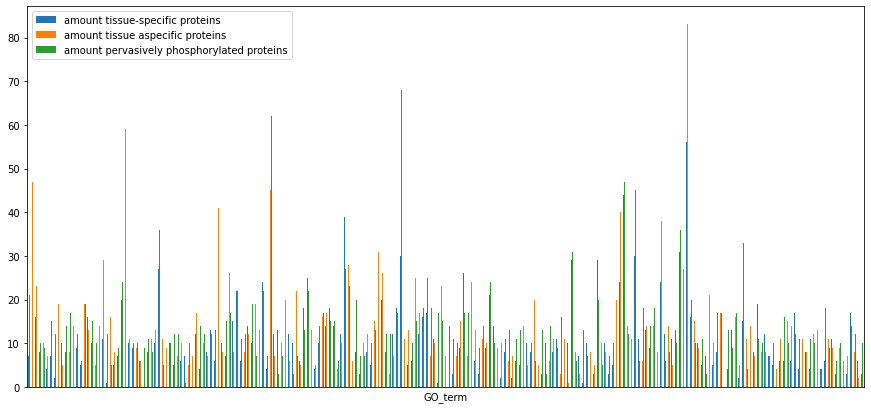

In [32]:
dfGO_bp = pd.DataFrame({"GO_term": uni_list_GO})
tspec_count_bp = []
nontspec_count_bp = []
general_count_bp = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = t_spec_prot_GO_bp[GO].sum()
        tspec_count_bp.append(count_tspec)
    else:
        tspec_count_bp.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = non_t_spec_prot_GO_bp[GO].sum()
        nontspec_count_bp.append(count_nontspec)
    else:
        nontspec_count_bp.append(0)
    if GO in uni_list_GO_gen:
        count_general = general_P_prot_GO_bp[GO].sum()
        general_count_bp.append(count_general)
    else:
        general_count_bp.append(0)
dfGO_bp["amount tissue-specific proteins"] = tspec_count_bp
dfGO_bp["amount tissue aspecific proteins"] = nontspec_count_bp
dfGO_bp["amount pervasively phosphorylated proteins"] = general_count_bp
dfGO_bp[(dfGO_bp["amount tissue-specific proteins"]>=10)|(dfGO_bp["amount tissue aspecific proteins"]>=10)
       |(dfGO_bp["amount pervasively phosphorylated proteins"]>=10)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])

In [33]:
dfGO_bp[(dfGO_bp["amount tissue-specific proteins"]>30)|(dfGO_bp["amount tissue aspecific proteins"]>30)
       |(dfGO_bp["amount pervasively phosphorylated proteins"]>30)]

GO_term  amount tissue-specific proteins  \
39    GO:0000122                               47   
1874  GO:0006357                               44   
1941  GO:0006468                               27   
2164  GO:0006915                               31   
2275  GO:0007165                               52   
2547  GO:0008284                               39   
2928  GO:0010628                               31   
3400  GO:0016032                               30   
5859  GO:0035556                               29   
6531  GO:0043065                               24   
6532  GO:0043066                               44   
6636  GO:0043312                               30   
6977  GO:0045087                               24   
7228  GO:0045892                               31   
7229  GO:0045893                               39   
7252  GO:0045944                               56   
8151  GO:0051301                               15   

      amount tissue aspecific proteins  \
39                                  47   
1874                                59   
1941                                43   
2164                                41   
2275                                45   
2547                                38   
2928                                31   
3400                                39   
5859                                35   
6531                                40   
6532                                48   
6636                                47   
6977                                38   
7228                                31   
7229                                27   
7252                                83   
8151                                27   

      amount pervasively phosphorylated proteins  
39                                            54  
1874                                          39  
1941                                          36  
2164                                          40  
2275                                          62  
2547                                          27  
2928                                          37  
3400                                          68  
5859                                          31  
6531                                          40  
6532                                          47  
6636                                          45  
6977                                          25  
7228                                          36  
7229                                          46  
7252                                          64  
8151                                          33

## Cellular component

Again, only a minority of the proteins is associated with at least one GO term of this cateogry.

In [111]:
t_spec_prot_GO_cc = t_spec_prot_GO.copy()
for GO in uni_list_GO:
    t_spec_prot_GO_cc[GO] = t_spec_prot_GO_cc["Gene ontology (cellular component)"].str.contains(GO)
t_spec_prot_GO_cc["nr GO terms_cc"] = t_spec_prot_GO_cc[uni_list_GO].sum(axis=1)
t_spec_prot_GO_cc.dropna(inplace=True)
t_spec_prot_GO_cc.replace({True: 1, False:0}, inplace=True)
t_spec_prot_GO_cc.head(10)
t_spec_prot_GO_cc.sort_values(by="nr GO terms_cc", ascending=False)

C:\Users\hannedvo\AppData\Local\Temp\41/ipykernel_36084/626811362.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  t_spec_prot_GO_cc[GO] = t_spec_prot_GO_cc["Gene ontology (cellular component)"].str.contains(GO)


ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
843   Q14118               0        0      0     0      0       0   
449   P20339               0        0      0     0      0       0   
295   P02649               0        0      1     0      0       0   
579   P43005               0        0      0     0      0       0   
617   P49810               0        0      0     0      0       0   
...      ...             ...      ...    ...   ...    ...     ...   
928   Q17RC7               0        0      0     0      0       0   
171   O60496               0        0      0     0      0       0   
446   P19971               0        0      0     0      0       0   
489   P26640               0        0      0     0      0       0   
1598  Q9BQP7               0        0      0     0      0       0   

      Cerebrospinal fluid  Cervix  Colon  ...  GO:2001268  GO:2001269  \
843                     0       0      0  ...           0           0   
449                     0       0      0  ...           0           0   
295                     0       0      0  ...           0           0   
579                     0       0      1  ...           0           0   
617                     0       0      0  ...           0           0   
...                   ...     ...    ...  ...         ...         ...   
928                     0       0      0  ...           0           0   
171                     0       0      0  ...           0           0   
446                     0       0      0  ...           0           0   
489                     0       0      0  ...           0           0   
1598                    0       0      1  ...           0           0   

      GO:2001271  GO:2001272  GO:2001286  GO:2001287  GO:2001288  GO:2001295  \
843            0           0           0           0           0           0   
449            0           0           0           0           0           0   
295            0           0           0           0           0           0   
579            0           0           0           0           0           0   
617            0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
928            0           0           0           0           0           0   
171            0           0           0           0           0           0   
446            0           0           0           0           0           0   
489            0           0           0           0           0           0   
1598           0           0           0           0           0           0   

      GO:2001302  nr GO terms_cc  
843            0            32.0  
449            0            30.0  
295            0            28.0  
579            0            28.0  
617            0            26.0  
...          ...             ...  
928            0             1.0  
171            0             1.0  
446            0             1.0  
489            0             1.0  
1598           0             1.0  

[644 rows x 12613 columns]

In [112]:
non_t_spec_prot_GO_cc = non_t_spec_prot_GO.copy()
for GO in uni_list_GO:
    non_t_spec_prot_GO_cc[GO] = non_t_spec_prot_GO_cc["Gene ontology (cellular component)"].str.contains(GO)
non_t_spec_prot_GO_cc["nr GO terms_cc"] = non_t_spec_prot_GO_cc[uni_list_GO].sum(axis=1)
non_t_spec_prot_GO_cc.dropna(inplace=True)
non_t_spec_prot_GO_cc.replace({True: 1, False:0}, inplace=True)
non_t_spec_prot_GO_cc.head(10)
non_t_spec_prot_GO_cc.sort_values(by="nr GO terms_cc", ascending=False)

C:\Users\hannedvo\AppData\Local\Temp\41/ipykernel_36084/1808264921.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  non_t_spec_prot_GO_cc[GO] = non_t_spec_prot_GO_cc["Gene ontology (cellular component)"].str.contains(GO)


ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
613   P49768               0        0      0     0      0       0   
64    O14672               0        0      1     0      0       0   
778   Q04656               0        0      1     0      0       0   
285   P04114               0        0      1     0      0       0   
304   P05556               0        0      0     0      0       0   
...      ...             ...      ...    ...   ...    ...     ...   
1924  Q9UGU5               0        0      1     0      0       0   
179   O75526               0        0      0     0      0       0   
658   P55198               0        0      1     0      0       0   
884   Q14135               0        0      1     0      0       0   
630   P51580               0        0      0     0      0       0   

      Cerebrospinal fluid  Cervix  Colon  ...  GO:2001268  GO:2001269  \
613                     0       0      1  ...           0           0   
64                      0       0      0  ...           0           0   
778                     0       0      1  ...           0           0   
285                     0       0      0  ...           0           0   
304                     0       0      0  ...           0           0   
...                   ...     ...    ...  ...         ...         ...   
1924                    0       0      1  ...           0           0   
179                     0       0      1  ...           0           0   
658                     0       0      1  ...           0           0   
884                     0       0      1  ...           0           0   
630                     0       0      1  ...           0           0   

      GO:2001271  GO:2001272  GO:2001286  GO:2001287  GO:2001288  GO:2001295  \
613            0           0           0           0           0           0   
64             0           0           0           0           0           0   
778            0           0           0           0           0           0   
285            0           0           0           0           0           0   
304            0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
1924           0           0           0           0           0           0   
179            0           0           0           0           0           0   
658            0           0           0           0           0           0   
884            0           0           0           0           0           0   
630            0           0           0           0           0           0   

      GO:2001302  nr GO terms_cc  
613            0            40.0  
64             0            29.0  
778            0            28.0  
285            0            27.0  
304            0            27.0  
...          ...             ...  
1924           0             1.0  
179            0             1.0  
658            0             1.0  
884            0             1.0  
630            0             1.0  

[709 rows x 12613 columns]

In [113]:
general_P_prot_GO_cc = general_P_prot_GO.copy()
for GO in uni_list_GO:
    general_P_prot_GO_cc[GO] = general_P_prot_GO_cc["Gene ontology (biological process)"].str.contains(GO)
general_P_prot_GO_cc["nr GO terms_cc"] = general_P_prot_GO_cc[uni_list_GO].sum(axis=1)
general_P_prot_GO_cc.dropna(inplace=True)
general_P_prot_GO_cc.replace({True: 1, False:0}, inplace=True)
general_P_prot_GO_cc.head(10)
general_P_prot_GO_cc.sort_values(by="nr GO terms_cc", ascending=False)

C:\Users\hannedvo\AppData\Local\Temp\41/ipykernel_36084/731478756.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  general_P_prot_GO_cc[GO] = general_P_prot_GO_cc["Gene ontology (biological process)"].str.contains(GO)


ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
517   P31749               0        0      1     0      1       0   
770   Q03135               0        0      0     0      0       1   
1014  Q5S007               0        0      0     0      0       0   
201   P00533               0        0      0     0      0       0   
290   P07948               0        0      1     0      0       0   
...      ...             ...      ...    ...   ...    ...     ...   
33    O00567               0        1      1     0      1       0   
1447  Q9BVG9               0        0      1     0      0       0   
1210  Q8N414               0        0      1     0      1       0   
32    O00559               0        0      1     0      1       0   
880   Q14123               0        0      1     0      1       0   

      Cerebrospinal fluid  Cervix  Colon  ...  GO:2001268  GO:2001269  \
517                     1       0      1  ...           0           0   
770                     0       0      1  ...           0           0   
1014                    0       0      1  ...           0           0   
201                     0       0      1  ...           0           0   
290                     0       0      1  ...           0           0   
...                   ...     ...    ...  ...         ...         ...   
33                      0       0      1  ...           0           0   
1447                    0       0      1  ...           0           0   
1210                    1       0      0  ...           0           0   
32                      1       0      0  ...           0           0   
880                     1       0      0  ...           0           0   

      GO:2001271  GO:2001272  GO:2001286  GO:2001287  GO:2001288  GO:2001295  \
517            0           0           0           0           0           0   
770            0           0           0           0           0           0   
1014           0           0           0           0           0           0   
201            0           0           0           0           0           0   
290            0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
33             0           0           0           0           0           0   
1447           0           0           0           0           0           0   
1210           0           0           0           0           0           0   
32             0           0           0           0           0           0   
880            0           0           0           0           0           0   

      GO:2001302  nr GO terms_cc  
517            0           151.0  
770            0           102.0  
1014           0            97.0  
201            0            92.0  
290            0            86.0  
...          ...             ...  
33             0             1.0  
1447           0             1.0  
1210           0             1.0  
32             0             1.0  
880            0             1.0  

[687 rows x 12613 columns]

Again the proteins that are associated with at lest one GO term from Cellular Component, seem to be associated with more GO terms than molecular fucntion, but less than Biological Process. Proteins seem to be associated with slighlty less GO temrs (1-16 compared to 1-18), but the maximum remains the same. The distribution seems more towards the left.

<Figure size 1080x504 with 0 Axes>

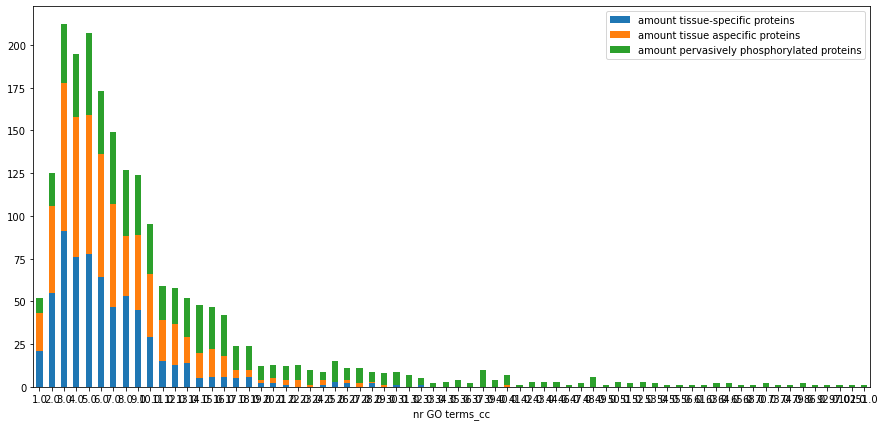

nr GO terms_cc  amount tissue-specific proteins  \
0              1.0                             21.0   
1              2.0                             55.0   
2              3.0                             91.0   
3              4.0                             76.0   
4              5.0                             78.0   
..             ...                              ...   
63            86.0                              NaN   
64            92.0                              NaN   
65            97.0                              NaN   
66           102.0                              NaN   
67           151.0                              NaN   

    amount tissue aspecific proteins  \
0                               22.0   
1                               51.0   
2                               87.0   
3                               82.0   
4                               81.0   
..                               ...   
63                               NaN   
64                               NaN   
65                               NaN   
66                               NaN   
67                               NaN   

    amount pervasively phosphorylated proteins  Total  
0                                            9   52.0  
1                                           19  125.0  
2                                           34  212.0  
3                                           37  195.0  
4                                           48  207.0  
..                                         ...    ...  
63                                           1    1.0  
64                                           1    1.0  
65                                           1    1.0  
66                                           1    1.0  
67                                           1    1.0  

[68 rows x 5 columns]

In [37]:
grouped_tspec_cc = t_spec_prot_GO_cc.groupby(["nr GO terms_cc"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_cc = non_t_spec_prot_GO_cc.groupby(["nr GO terms_cc"], as_index=False)["ACC_ID"].nunique()
grouped_general_cc = general_P_prot_GO_cc.groupby(["nr GO terms_cc"], as_index=False)["ACC_ID"].nunique()

grouped_all_cc1 = pd.merge(grouped_tspec_cc, grouped_nontspec_cc, how="outer", on=["nr GO terms_cc"], suffixes=("_tspec", "_nontspec"))
grouped_all_cc = pd.merge(grouped_all_cc1, grouped_general_cc, how="outer", on=["nr GO terms_cc"])
grouped_all_cc.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount tissue aspecific proteins",
                                "ACC_ID": "amount pervasively phosphorylated proteins"}, inplace=True)
grouped_all_cc.sort_values(by="nr GO terms_cc", inplace=True)
plt.figure(figsize=(15,7))
grouped_all_cc.set_index("nr GO terms_cc").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_all_cc["Total"] = grouped_all_cc[["amount tissue-specific proteins", "amount tissue aspecific proteins",
                                            "amount pervasively phosphorylated proteins"]].sum(axis=1)
grouped_all_cc

([], [])

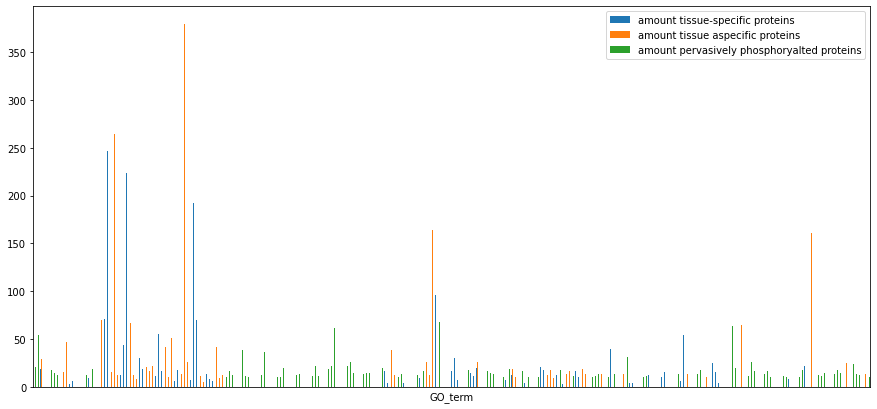

In [38]:
dfGO_cc = pd.DataFrame({"GO_term": uni_list_GO})
tspec_count_cc = []
nontspec_count_cc = []
general_count_cc = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = t_spec_prot_GO_cc[GO].sum()
        tspec_count_cc.append(count_tspec)
    else:
        tspec_count_cc.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = non_t_spec_prot_GO_cc[GO].sum()
        nontspec_count_cc.append(count_nontspec)
    else:
        nontspec_count_cc.append(0)
    if GO in uni_list_GO_gen:
        count_general = general_P_prot_GO_cc[GO].sum()
        general_count_cc.append(count_general)
    else:
        general_count_cc.append(0)
dfGO_cc["amount tissue-specific proteins"] = tspec_count_cc
dfGO_cc["amount tissue aspecific proteins"] = nontspec_count_cc
dfGO_cc["amount pervasively phosphoryalted proteins"] = general_count_cc
dfGO_cc[(dfGO_cc["amount tissue-specific proteins"]>=10)|(dfGO_cc["amount tissue aspecific proteins"]>=10)
       |(dfGO_cc["amount pervasively phosphoryalted proteins"]>=10)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])

In [39]:
dfGO_cc[(dfGO_cc["amount tissue-specific proteins"]>30)|(dfGO_cc["amount tissue aspecific proteins"]>30)
       |(dfGO_cc["amount pervasively phosphoryalted proteins"]>30)]

GO_term  amount tissue-specific proteins  \
39    GO:0000122                                0   
198   GO:0000785                               43   
1518  GO:0005576                               70   
1539  GO:0005615                               71   
1541  GO:0005634                              247   
1551  GO:0005654                              196   
1580  GO:0005730                               44   
1583  GO:0005737                              224   
1584  GO:0005739                               64   
1616  GO:0005783                               55   
1620  GO:0005789                               46   
1624  GO:0005794                               57   
1632  GO:0005813                               18   
1639  GO:0005829                              272   
1676  GO:0005886                              192   
1677  GO:0005887                               70   
1697  GO:0005925                               23   
1874  GO:0006357                                0   
1941  GO:0006468                                0   
2164  GO:0006915                                0   
2275  GO:0007165                                0   
2818  GO:0009986                               47   
2928  GO:0010628                                0   
3395  GO:0016020                              123   
3396  GO:0016021                               96   
3400  GO:0016032                                0   
4324  GO:0030425                               18   
5220  GO:0032991                               40   
5859  GO:0035556                                0   
6531  GO:0043065                                0   
6532  GO:0043066                                0   
6595  GO:0043231                               54   
6636  GO:0043312                                0   
7228  GO:0045892                                0   
7229  GO:0045893                                0   
7252  GO:0045944                                0   
7687  GO:0048471                               34   
8151  GO:0051301                                0   
9064  GO:0070062                              142   

      amount tissue aspecific proteins  \
39                                   0   
198                                 47   
1518                                70   
1539                                57   
1541                               296   
1551                               265   
1580                                60   
1583                               309   
1584                                67   
1616                                47   
1620                                42   
1624                                51   
1632                                41   
1639                               379   
1676                               189   
1677                                40   
1697                                42   
1874                                 0   
1941                                 0   
2164                                 0   
2275                                 0   
2818                                39   
2928                                 0   
3395                               164   
3396                                61   
3400                                 0   
4324                                31   
5220                                71   
5859                                 0   
6531                                 0   
6532                                 0   
6595                                56   
6636                                 0   
7228                                 0   
7229                                 0   
7252                                 0   
7687                                65   
8151                                 0   
9064                               161   

      amount pervasively phosphoryalted proteins  
39                                            54  
198                                            0  
1518                                           0  
153

## all GO terms

We now consider the GO-terms from all three categories from UniprotKB combined, and the GO-terms retreived from QuickGO. As a first step, we conduct a similar analysis as before.

In [30]:
t_spec_prot_GO_all = t_spec_prot_GO.copy()
for GO in uni_list_GO:
    t_spec_prot_GO_all[GO] = t_spec_prot_GO_all["Gene ontology (GO)"].str.contains(GO)
for GO in uni_list_quick:
    t_spec_prot_GO_all[GO] = t_spec_prot_GO_all["GO_term"].str.contains(GO)
t_spec_prot_GO_all["nr GO terms_all"] = t_spec_prot_GO_all[uni_list_GO].sum(axis=1)
#t_spec_prot_GO_all.dropna(inplace=True)
t_spec_prot_GO_all.replace({True: 1, False:0, np.nan: 0}, inplace=True)
t_spec_prot_GO_all.sort_values(by="nr GO terms_all", ascending=False)

C:\Users\hannedvo\AppData\Local\Temp\24/ipykernel_14208/3667306079.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  t_spec_prot_GO_all[GO] = t_spec_prot_GO_all["Gene ontology (GO)"].str.contains(GO)
C:\Users\hannedvo\AppData\Local\Temp\24/ipykernel_14208/3667306079.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  t_spec_prot_GO_all[GO] = t_spec_prot_GO_all["GO_term"].str.contains(GO)


ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
295   P02649               0        0      1     0      0       0   
596   P48436               0        0      0     0      0       0   
383   P10415               0        0      1     0      0       0   
181   O60674               0        0      0     0      0       0   
559   P37231               0        0      0     0      0       0   
...      ...             ...      ...    ...   ...    ...     ...   
1006  Q5T035               0        0      0     0      0       0   
1709  Q9H3H3               0        0      0     0      0       0   
1761  Q9HCM7               0        0      0     0      0       0   
373   P0DPI2               0        0      0     0      0       0   
1032  Q5U623               0        0      0     0      0       0   

      Cerebrospinal fluid  Cervix  Colon  ...  GO:2001252  GO:2001257  \
295                     0       0      0  ...           0           0   
596                     0       0      1  ...           0           0   
383                     0       0      0  ...           0           0   
181                     0       0      0  ...           0           0   
559                     0       0      1  ...           0           0   
...                   ...     ...    ...  ...         ...         ...   
1006                    0       0      0  ...           0           0   
1709                    0       0      0  ...           0           0   
1761                    0       0      1  ...           0           0   
373                     0       0      0  ...           0           0   
1032                    0       0      0  ...           0           0   

      GO:2001264  GO:2001280  GO:2001294  GO:2001301  GO:2001303  GO:2001306  \
295            0           0           0           0           0           0   
596            0           0           0           0           0           0   
383            0           0           0           0           0           0   
181            0           0           0           0           0           0   
559            0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
1006           0           0           0           0           0           0   
1709           0           0           0           0           0           0   
1761           0           0           0           0           0           0   
373            0           0           0           0           0           0   
1032           0           0           0           0           0           0   

      GO:2001311  nr GO terms_all  
295            0              164  
596            0              142  
383            0              134  
181            0              118  
559            0              115  
...          ...              ...  
1006           0                1  
1709           0                1  
1761           0                1  
373            0                1  
1032           0                1  

[1958 rows x 18849 columns]

In [31]:
non_t_spec_prot_GO_all = non_t_spec_prot_GO.copy()
for GO in uni_list_GO:
    non_t_spec_prot_GO_all[GO] = non_t_spec_prot_GO_all["Gene ontology (GO)"].str.contains(GO)
for GO in uni_list_quick:
    non_t_spec_prot_GO_all[GO] = non_t_spec_prot_GO_all["GO_term"].str.contains(GO)
non_t_spec_prot_GO_all["nr GO terms_all"] = non_t_spec_prot_GO_all[uni_list_GO].sum(axis=1)
#non_t_spec_prot_GO_all.dropna(inplace=True)
non_t_spec_prot_GO_all.replace({True: 1, False:0, np.nan: 0}, inplace=True)
non_t_spec_prot_GO_all.sort_values(by="nr GO terms_all", ascending=False)

C:\Users\hannedvo\AppData\Local\Temp\24/ipykernel_14208/4174279344.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  non_t_spec_prot_GO_all[GO] = non_t_spec_prot_GO_all["Gene ontology (GO)"].str.contains(GO)
C:\Users\hannedvo\AppData\Local\Temp\24/ipykernel_14208/4174279344.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  non_t_spec_prot_GO_all[GO] = non_t_spec_prot_GO_all["GO_term"].str.contains(GO)


ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
293   P04637               0        0      1     0      0       0   
377   P12931               0        0      0     0      0       0   
1493  Q96EB6               0        0      1     0      0       0   
1589  Q99497               0        0      0     0      0       0   
563   P42345               0        0      1     0      0       0   
...      ...             ...      ...    ...   ...    ...     ...   
32    C9JLR9               0        0      0     0      0       0   
1007  Q3ZCW2               0        1      1     0      0       0   
31    C9JI98               0        0      1     0      0       0   
1176  Q6ZUT6               0        0      0     0      0       0   
1551  Q96N46               0        0      1     0      0       0   

      Cerebrospinal fluid  Cervix  Colon  ...  GO:2001252  GO:2001257  \
293                     0       0      1  ...           0           0   
377                     0       0      1  ...           0           0   
1493                    0       0      1  ...           0           0   
1589                    0       0      0  ...           0           0   
563                     0       0      0  ...           0           0   
...                   ...     ...    ...  ...         ...         ...   
32                      0       0      0  ...           0           0   
1007                    0       0      0  ...           0           0   
31                      0       0      1  ...           0           0   
1176                    0       0      1  ...           0           0   
1551                    0       0      1  ...           0           0   

      GO:2001264  GO:2001280  GO:2001294  GO:2001301  GO:2001303  GO:2001306  \
293            0           0           0           0           0           0   
377            0           0           0           0           0           0   
1493           0           0           0           0           0           0   
1589           0           0           0           0           0           0   
563            0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
32             0           0           0           0           0           0   
1007           0           0           0           0           0           0   
31             0           0           0           0           0           0   
1176           0           0           0           0           0           0   
1551           0           0           0           0           0           0   

      GO:2001311  nr GO terms_all  
293            0              178  
377            0              168  
1493           0              152  
1589           0              145  
563            0              143  
...          ...              ...  
32             0                1  
1007           0                1  
31             0                1  
1176           0                1  
1551           0                1  

[2039 rows x 18849 columns]

In [32]:
general_P_prot_GO_all = general_P_prot_GO.copy()
for GO in uni_list_GO:
    general_P_prot_GO_all[GO] = general_P_prot_GO_all["Gene ontology (GO)"].str.contains(GO)
for GO in uni_list_quick:
    general_P_prot_GO_all[GO] = general_P_prot_GO_all["GO_term"].str.contains(GO)
general_P_prot_GO_all["nr GO terms_all"] = general_P_prot_GO_all[uni_list_GO].sum(axis=1)
#general_P_prot_GO_all.dropna(inplace=True)
general_P_prot_GO_all.replace({True: 1, False:0, np.nan: 0}, inplace=True)
general_P_prot_GO_all.sort_values(by="nr GO terms_all", ascending=False)

C:\Users\hannedvo\AppData\Local\Temp\24/ipykernel_14208/3871817765.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  general_P_prot_GO_all[GO] = general_P_prot_GO_all["Gene ontology (GO)"].str.contains(GO)
C:\Users\hannedvo\AppData\Local\Temp\24/ipykernel_14208/3871817765.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  general_P_prot_GO_all[GO] = general_P_prot_GO_all["GO_term"].str.contains(GO)


ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
517   P31749               0        0      1     0      1       0   
1014  Q5S007               0        0      0     0      0       0   
770   Q03135               0        0      0     0      0       1   
201   P00533               0        0      0     0      0       0   
290   P07948               0        0      1     0      0       0   
...      ...             ...      ...    ...   ...    ...     ...   
1104  Q6ZVL6               0        0      1     0      1       0   
1075  Q6P995               0        0      1     0      1       0   
1721  Q9Y4E6               0        0      1     0      1       0   
1004  Q5HYJ3               0        0      1     0      0       0   
140   O75420               0        0      1     0      0       0   

      Cerebrospinal fluid  Cervix  Colon  ...  GO:2001252  GO:2001257  \
517                     1       0      1  ...           0           0   
1014                    0       0      1  ...           0           0   
770                     0       0      1  ...           0           0   
201                     0       0      1  ...           0           0   
290                     0       0      1  ...           0           0   
...                   ...     ...    ...  ...         ...         ...   
1104                    1       0      0  ...           0           0   
1075                    1       0      0  ...           0           0   
1721                    1       0      1  ...           0           0   
1004                    0       0      1  ...           0           0   
140                     0       0      1  ...           0           0   

      GO:2001264  GO:2001280  GO:2001294  GO:2001301  GO:2001303  GO:2001306  \
517            0           0           0           0           0           0   
1014           0           0           0           0           0           0   
770            0           0           0           0           0           0   
201            0           0           0           0           0           0   
290            0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
1104           0           0           0           0           0           0   
1075           0           0           0           0           0           0   
1721           0           0           0           0           0           0   
1004           0           0           0           0           0           0   
140            0           0           0           0           0           0   

      GO:2001311  nr GO terms_all  
517            0              185  
1014           0              168  
770            0              141  
201            0              139  
290            0              120  
...          ...              ...  
1104           0                1  
1075           0                1  
1721           0                1  
1004           0                1  
140            0                1  

[1733 rows x 18849 columns]

<Figure size 1080x504 with 0 Axes>

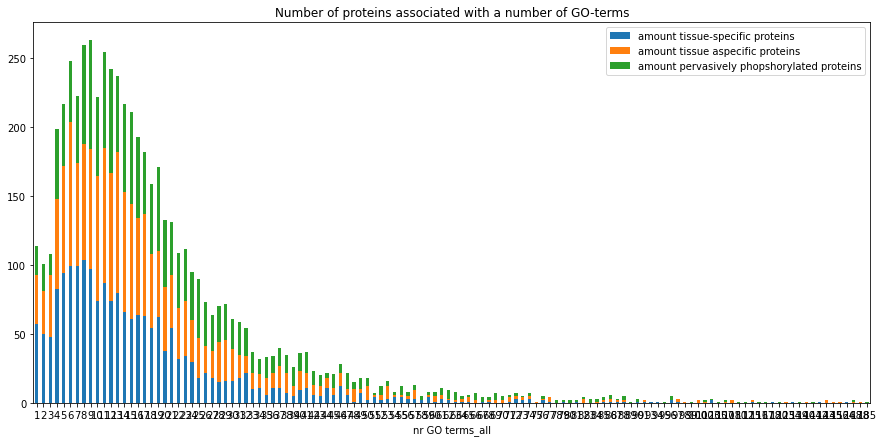

nr GO terms_all  amount tissue-specific proteins  \
0                  1                             57.0   
1                  2                             50.0   
2                  3                             48.0   
3                  4                             83.0   
4                  5                             94.0   
..               ...                              ...   
106              152                              NaN   
90               164                              1.0   
107              168                              NaN   
108              178                              NaN   
123              185                              NaN   

     amount tissue aspecific proteins  \
0                                36.0   
1                                31.0   
2                                45.0   
3                                65.0   
4                                78.0   
..                                ...   
106                               1.0   
90                                NaN   
107                               1.0   
108                               1.0   
123                               NaN   

     amount pervasively phopshorylated proteins  Total  
0                                          21.0  114.0  
1                                          20.0  101.0  
2                                          15.0  108.0  
3                                          51.0  199.0  
4                                          45.0  217.0  
..                                          ...    ...  
106                                         NaN    1.0  
90                                          NaN    1.0  
107                                         1.0    2.0  
108                                         NaN    1.0  
123                                         1.0    1.0  

[124 rows x 5 columns]

In [33]:
grouped_tspec_all = t_spec_prot_GO_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_all = non_t_spec_prot_GO_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_all = general_P_prot_GO_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_all_all1 = pd.merge(grouped_tspec_all, grouped_nontspec_all, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_all_all = pd.merge(grouped_all_all1, grouped_general_all, how="outer", on=["nr GO terms_all"])
grouped_all_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount tissue aspecific proteins",
                                "ACC_ID": "amount pervasively phopshorylated proteins"}, inplace=True)
grouped_all_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_all_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0).set(title = "Number of proteins associated with a number of GO-terms")
plt.show()
grouped_all_all["Total"] = grouped_all_all[["amount tissue-specific proteins", "amount tissue aspecific proteins",
                                            "amount pervasively phopshorylated proteins"]].sum(axis=1)
grouped_all_all

In [34]:
data_protein_GO_all = data_protein_GO.copy()
for GO in uni_list_GO:
    data_protein_GO_all[GO] = data_protein_GO_all["Gene ontology IDs"].str.contains(GO)
for GO in uni_list_quick:
    data_protein_GO_all[GO] = data_protein_GO_all["GO_term"].str.contains(GO)
#data_protein_GO_all.dropna(inplace=True)
data_protein_GO_all.replace({True: 1, False:0}, inplace=True)
data_protein_GO_all.head()

C:\Users\hannedvo\AppData\Local\Temp\24/ipykernel_14208/683624846.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_protein_GO_all[GO] = data_protein_GO_all["Gene ontology IDs"].str.contains(GO)
C:\Users\hannedvo\AppData\Local\Temp\24/ipykernel_14208/683624846.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_protein_GO_all[GO] = data_protein_GO_all["GO_term"].str.contains(GO)


ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
0  A0A075B6H7               0        0      0     0      0       0   
1  A0A075B6S5               0        0      0     0      0       0   
2  A0A087WXM9               0        0      0     0      0       0   
3  A0A0B4J2D5               0        0      0     0      0       0   
4  A0A0B4J2D9               0        0      1     0      0       0   

   Cerebrospinal fluid  Cervix  Colon  ...  GO:2001251  GO:2001252  \
0                    0       0      0  ...         NaN         NaN   
1                    0       0      0  ...         NaN         NaN   
2                    0       0      0  ...         0.0         0.0   
3                    0       0      0  ...         NaN         NaN   
4                    0       0      0  ...         NaN         NaN   

   GO:2001257  GO:2001264  GO:2001280  GO:2001294  GO:2001301  GO:2001303  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   GO:2001306  GO:2001311  
0         NaN         NaN  
1         NaN         NaN  
2         0.0         0.0  
3         NaN         NaN  
4         NaN         NaN  

[5 rows x 18848 columns]

In [35]:
Uniprot.shape[0]

19196

We loop over all proteins, and calculate the sum of the proteins that are associated with that GO term. This is similar to caluclating the proteins and sites in a certain tissue, as described previously. The numbers are then log transformed to scale, and the ratio of number of proteins in each of the three categories, divided by the amount of proteins in UniProtKB, per GO term. As the QuickGO terms were not found in UniprotKB, they will not be integrated in this part of the analysis.

In [36]:
dfGO_all = pd.DataFrame({"GO_term": uni_list_GO})
tspec_count_all = []
nontspec_count_all = []
general_count_all = []
all_count_all = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = t_spec_prot_GO_all[t_spec_prot_GO_all[GO]==1]["ACC_ID"].nunique()
        tspec_count_all.append(count_tspec)
    else:
        tspec_count_all.append(0) 
    if GO in uni_list_GO_nontspec:
        count_nontspec = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all[GO]==1]["ACC_ID"].nunique()
        nontspec_count_all.append(count_nontspec)
    else:
        nontspec_count_all.append(0)
    if GO in uni_list_GO_gen:
        count_general =general_P_prot_GO_all[general_P_prot_GO_all[GO]==1]["ACC_ID"].nunique()
        general_count_all.append(count_general)
    else:
        general_count_all.append(0)
    count_all = Uniprot["Gene ontology IDs"].str.contains(GO).sum()
    all_count_all.append(count_all)
dfGO_all["amount tissue-specific proteins"] = tspec_count_all
dfGO_all["amount tissue-aspecific proteins"] = nontspec_count_all
dfGO_all["amount pervasively phosphorylated proteins"] = general_count_all
dfGO_all["all proteins"] = all_count_all
dfGO_all.head()

GO_term  amount tissue-specific proteins  \
0  GO:0000002                                3   
1  GO:0000003                                0   
2  GO:0000012                                3   
3  GO:0000014                                1   
4  GO:0000015                                0   

   amount tissue-aspecific proteins  \
0                                 1   
1                                 1   
2                                 1   
3                                 2   
4                                 0   

   amount pervasively phosphorylated proteins  all proteins  
0                                           0            11  
1                                           0             4  
2                                           1            10  
3                                           0             7  
4                                           3             4

In [37]:
dfGO_all["log tspec"] = np.log10(dfGO_all["amount tissue-specific proteins"]+1)
dfGO_all["log taspec"] =np.log10(dfGO_all["amount tissue-aspecific proteins"]+1)
dfGO_all["log gen P"] = np.log10(dfGO_all["amount pervasively phosphorylated proteins"]+1)
dfGO_all["log all"] = np.log10(dfGO_all["all proteins"]+1)
dfGO_all["log all"] = -1*dfGO_all["log all"]
dfGO_all["Percentage_tissue-specific_proteins"] = dfGO_all["amount tissue-specific proteins"]*100/dfGO_all["all proteins"]
dfGO_all["Percentage_tissue-aspecific_proteins"] = dfGO_all["amount tissue-aspecific proteins"]*100/dfGO_all["all proteins"]
dfGO_all["Percentage_pervasively_phosphorylated_proteins"] = dfGO_all["amount pervasively phosphorylated proteins"]*100/dfGO_all["all proteins"]
dfGO_all.head()

GO_term  amount tissue-specific proteins  \
0  GO:0000002                                3   
1  GO:0000003                                0   
2  GO:0000012                                3   
3  GO:0000014                                1   
4  GO:0000015                                0   

   amount tissue-aspecific proteins  \
0                                 1   
1                                 1   
2                                 1   
3                                 2   
4                                 0   

   amount pervasively phosphorylated proteins  all proteins  log tspec  \
0                                           0            11    0.60206   
1                                           0             4    0.00000   
2                                           1            10    0.60206   
3                                           0             7    0.30103   
4                                           3             4    0.00000   

   log taspec  log gen P   log all  Percentage_tissue-specific_proteins  \
0    0.301030    0.00000 -1.079181                            27.272727   
1    0.301030    0.00000 -0.698970                             0.000000   
2    0.301030    0.30103 -1.041393                            30.000000   
3    0.477121    0.00000 -0.903090                            14.285714   
4    0.000000    0.60206 -0.698970                             0.000000   

   Percentage_tissue-aspecific_proteins  \
0                              9.090909   
1                             25.000000   
2                             10.000000   
3                             28.571429   
4                              0.000000   

   Percentage_pervasively_phosphorylated_proteins  
0                                             0.0  
1                                             0.0  
2                                            10.0  
3                                             0.0  
4                                            75.0

In [38]:
dfGO_all[(dfGO_all["log tspec"]>1)|(dfGO_all["log taspec"]>1)|(dfGO_all["log gen P"]>1)]

GO_term  amount tissue-specific proteins  \
14     GO:0000045                                5   
16     GO:0000049                               12   
26     GO:0000077                                6   
27     GO:0000079                               10   
28     GO:0000082                                6   
...           ...                              ...   
12151  GO:1990841                                3   
12161  GO:1990904                               16   
12246  GO:2000249                                2   
12271  GO:2000300                                5   
12304  GO:2000379                                7   

       amount tissue-aspecific proteins  \
14                                   10   
16                                   12   
26                                   10   
27                                    6   
28                                   14   
...                                 ...   
12151                                11   
12161                                27   
12246                                11   
12271                                 1   
12304                                10   

       amount pervasively phosphorylated proteins  all proteins  log tspec  \
14                                              6            60   0.778151   
16                                              8            71   1.113943   
26                                              4            31   0.845098   
27                                              2            50   1.041393   
28                                              8            69   0.845098   
...                                           ...           ...        ...   
12151                                          19            58   0.602060   
12161                                          59           156   1.230449   
12246                                           1            20   0.477121   
12271                                          15            42   0.778151   
12304                                           0            34   0.903090   

       log taspec  log gen P   log all  Percentage_tissue-specific_proteins  \
14       1.041393   0.845098 -1.785330                             8.333333   
16       1.113943   0.954243 -1.857332                            16.901408   
26       1.041393   0.698970 -1.505150                            19.354839   
27       0.845098   0.477121 -1.707570                            20.000000   
28       1.176091   0.954243 -1.845098                             8.695652   
...           ...        ...       ...                                  ...   
12151    1.079181   1.301030 -1.770852                             5.172414   
12161    1.447158   1.778151 -2.195900                            10.256410   
12246    1.079181   0.301030 -1.322219                            10.000000   
12271    0.301030   1.204120 -1.633468                            11.904762   
12304    1.041393   0.000000 -1.544068                            20.588235   

       Percentage_tissue-aspecific_proteins  \
14                                16.666667   
16                                16.901408   
26                                32.258065   
27                                12.000000   
28                                20.289855   
...                                     ...   
12151                             18.965517   
12161                             17.307692   
12246                             55.000000   
12271                              2.380952   
12304                             29.411765   

       Percentage_pervasively_phosphorylated_proteins  
14                                          10.000000  
16                                          11.267606  
26                                          12.903226  
27                                           4.000000  
28                                          11.594203  
...                                               ...  
1

We calculate the ratio tissue-specific proteins / UniprotKB proteins, and repeat this for the other two categories. This is roughly 10 percent. If the amount of proteins in any of the three categories exceeds this number, the GO term might be enriched.

In [39]:
print(t_spec_prot_GO_all.shape[0]/Uniprot.shape[0])
print(non_t_spec_prot_GO_all.shape[0]/Uniprot.shape[0])
print(general_P_prot_GO_all.shape[0]/Uniprot.shape[0])


0.10200041675349031
0.10622004584288393
0.09027922483850802


We now look at the distribution of the ratios and try to calculate the important descriptive statisstics. We then define the whisker as 1.5 times the InterQuartileRange (definition from statistics) to determine enriched GO terms.

<AxesSubplot:ylabel='Density'>

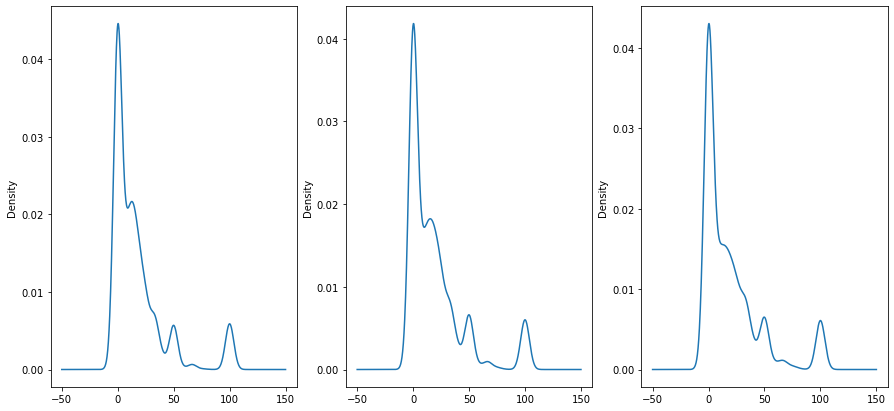

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=3)

dfGO_all["Percentage_tissue-specific_proteins"].plot(x="GO_term", kind="kde", ax=axes[0], figsize=(15,7))
dfGO_all["Percentage_tissue-aspecific_proteins"].plot(x="GO_term", kind="kde", ax=axes[1], figsize=(15,7))
dfGO_all["Percentage_pervasively_phosphorylated_proteins"].plot(x="GO_term", kind="kde", ax=axes[2], figsize=(15,7))

In [41]:
print(dfGO_all["Percentage_tissue-specific_proteins"].describe())
print(dfGO_all["Percentage_tissue-aspecific_proteins"].describe())
print(dfGO_all["Percentage_pervasively_phosphorylated_proteins"].describe())
whisker_tspec = 1.5*22.580645 # the first quartile is zero -> the IQR equals the third quartile
print(whisker_tspec)
whisker_nontspec = 1.5*25 # the first quartile is zero -> the IQR equals the third quartile
print(whisker_nontspec)
whisker_gen = 1.5*28.571429 # the first quartile is zero -> the IQR equals the third quartile
print(whisker_gen)

count    12557.000000
mean        17.382255
std         24.794268
min          0.000000
25%          0.000000
50%         10.000000
75%         22.580645
max        100.000000
Name: Percentage_tissue-specific_proteins, dtype: float64
count    12557.000000
mean        19.229142
std         25.690019
min          0.000000
25%          0.000000
50%         11.538462
75%         25.000000
max        100.000000
Name: Percentage_tissue-aspecific_proteins, dtype: float64
count    12557.000000
mean        19.582034
std         26.488268
min          0.000000
25%          0.000000
50%         10.416667
75%         28.571429
max        100.000000
Name: Percentage_pervasively_phosphorylated_proteins, dtype: float64
33.8709675
37.5
42.8571435


We now select our outliers to plot later on. Also, we require that at least 10 proteins should be associated with the GO term in any of the three categories.

In [42]:
dfGO_all_plot = dfGO_all[(((dfGO_all["Percentage_tissue-specific_proteins"]>=whisker_tspec)&(dfGO_all["amount tissue-specific proteins"]>=10))|
                          ((dfGO_all["Percentage_tissue-aspecific_proteins"]>=whisker_nontspec)&(dfGO_all["amount tissue-aspecific proteins"]>=10))|
                          ((dfGO_all["Percentage_pervasively_phosphorylated_proteins"]>=whisker_gen)&(dfGO_all["amount pervasively phosphorylated proteins"]>=10)))
                         
                        ]

dfGO_all_plot


GO_term  amount tissue-specific proteins  \
120    GO:0000380                                0   
375    GO:0001725                                5   
410    GO:0001784                                6   
568    GO:0002102                                5   
1240   GO:0004698                                2   
1253   GO:0004715                                8   
1426   GO:0005200                                9   
1766   GO:0006096                                1   
1904   GO:0006405                                6   
1913   GO:0006417                                6   
2916   GO:0010592                                3   
3412   GO:0016070                                4   
3564   GO:0016573                                3   
3654   GO:0017056                                4   
4014   GO:0021762                                2   
4346   GO:0030507                                2   
4447   GO:0030866                                4   
4509   GO:0031032                                3   
4538   GO:0031098                                1   
4556   GO:0031124                                7   
4686   GO:0031492                                3   
5431   GO:0034063                                5   
5999   GO:0035973                                0   
6234   GO:0042026                                1   
6522   GO:0043034                                1   
6525   GO:0043044                                7   
6981   GO:0045104                                2   
7046   GO:0045296                               23   
7592   GO:0048025                                1   
7593   GO:0048026                                0   
7614   GO:0048156                                3   
7855   GO:0050321                                3   
7890   GO:0050681                                4   
8025   GO:0051010                                2   
8031   GO:0051016                                1   
8032   GO:0051017                                4   
8815   GO:0061001                                2   
8940   GO:0061621                                1   
9486   GO:0071339                                3   
9686   GO:0071889                                3   
10062  GO:0090314                                2   
10352  GO:0097718                                1   
10389  GO:0098641                                2   
10885  GO:1900034                                6   
12246  GO:2000249                                2   

       amount tissue-aspecific proteins  \
120                                   3   
375                                   8   
410                                  20   
568                                   4   
1240                                  2   
1253                                 18   
1426                                 13   
1766                                  4   
1904                                 22   
1913                                 19   
2916                                 11   
3412                                  4   
3564                                 11   
3654                                 11   
4014                                  5   
4346                                  3   
4447                                  4   
4509                                  7   
4538                                  4   
4556                                 24   
4686                                  6   
5431                                  4   
5999                                  3   
6234                                  2   
6522                                  1   
6525                                 13   
6981                                  3   
7046                                 78   
7592                                  3   
7593                                  3   
7614                                  8   
7855                                  6   
7890                                  1   
8025                                  4   
8031                

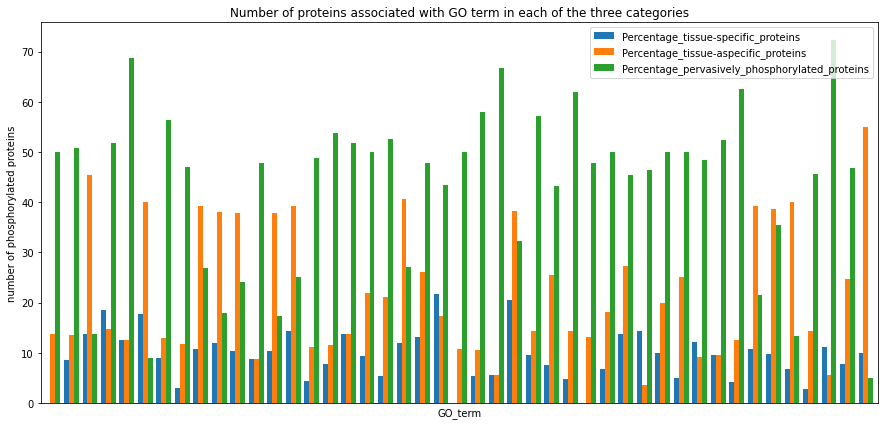

In [43]:
dfGO_all_plot[["GO_term", "Percentage_tissue-specific_proteins", "Percentage_tissue-aspecific_proteins", "Percentage_pervasively_phosphorylated_proteins"]].plot(x="GO_term", kind="bar", width=0.8,figsize=(15,7), title="Number of proteins associated with GO term in each of the three categories", ylabel="number of phosphorylated proteins")
plt.xticks([])
plt.savefig("WP2 GO_phosphoproteins1.png", format="png", bbox_inches="tight")

In [44]:
GO_annot_map_sub = GO_annot_map[["GO_term", "GO term name", "GO term definition"]]
GO_annot_map_sub.drop_duplicates(subset="GO_term", inplace=True)
print(dfGO_all_plot.shape[0])
dfGO_all_plot_annot = pd.merge(dfGO_all_plot, GO_annot_map_sub, how="left", on=["GO_term"])
print(dfGO_all_plot_annot.shape[0])
dfGO_all_plot_annot.shape[0]

45
45


C:\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


45

In [45]:
#dfGO_all_plot_annot[((dfGO_all_plot_annot["ratio_tspec"]/dfGO_all_plot_annot["ratio_nontspec"]>3)&(dfGO_all_plot_annot["amount tissue-specific proteins"]>50))|
#                   ((dfGO_all_plot_annot["ratio_tspec"]/dfGO_all_plot_annot["ratio_genP"]>3)&(dfGO_all_plot_annot["amount tissue-specific proteins"]>50))|
#                   ((dfGO_all_plot_annot["ratio_nontspec"]/dfGO_all_plot_annot["ratio_tspec"]>3)&(dfGO_all_plot_annot["amount non tissue-specific proteins"]>50))|
#                   ((dfGO_all_plot_annot["ratio_nontspec"]/dfGO_all_plot_annot["ratio_genP"]>3)&(dfGO_all_plot_annot["amount non tissue-specific proteins"]>50))|
#                   ((dfGO_all_plot_annot["ratio_genP"]/dfGO_all_plot_annot["ratio_tspec"]>3)&(dfGO_all_plot_annot["amount general P proteins"]>50))|
#                   ((dfGO_all_plot_annot["ratio_genP"]/dfGO_all_plot_annot["ratio_nontspec"]>3)&(dfGO_all_plot_annot["amount general P proteins"]>50))]
#voorheen groter dan 10

dfGO_all_plot_annot

GO_term  amount tissue-specific proteins  \
0   GO:0000380                                0   
1   GO:0001725                                5   
2   GO:0001784                                6   
3   GO:0002102                                5   
4   GO:0004698                                2   
5   GO:0004715                                8   
6   GO:0005200                                9   
7   GO:0006096                                1   
8   GO:0006405                                6   
9   GO:0006417                                6   
10  GO:0010592                                3   
11  GO:0016070                                4   
12  GO:0016573                                3   
13  GO:0017056                                4   
14  GO:0021762                                2   
15  GO:0030507                                2   
16  GO:0030866                                4   
17  GO:0031032                                3   
18  GO:0031098                                1   
19  GO:0031124                                7   
20  GO:0031492                                3   
21  GO:0034063                                5   
22  GO:0035973                                0   
23  GO:0042026                                1   
24  GO:0043034                                1   
25  GO:0043044                                7   
26  GO:0045104                                2   
27  GO:0045296                               23   
28  GO:0048025                                1   
29  GO:0048026                                0   
30  GO:0048156                                3   
31  GO:0050321                                3   
32  GO:0050681                                4   
33  GO:0051010                                2   
34  GO:0051016                                1   
35  GO:0051017                                4   
36  GO:0061001                                2   
37  GO:0061621                                1   
38  GO:0071339                                3   
39  GO:0071889                                3   
40  GO:0090314                                2   
41  GO:0097718                                1   
42  GO:0098641                                2   
43  GO:1900034                                6   
44  GO:2000249                                2   

    amount tissue-aspecific proteins  \
0                                  3   
1                                  8   
2                                 20   
3                                  4   
4                                  2   
5                                 18   
6                                 13   
7                                  4   
8                                 22   
9                                 19   
10                                11   
11                                 4   
12                                11   
13                                11   
14                                 5   
15                                 3   
16                                 4   
17                                 7   
18                                 4   
19                                24   
20                                 6   
21                                 4   
22                                 3   
23                                 2   
24                                 1   
25                                13   
26                                 3   
27                                78   
28                                 3   
29                                 3   
30                                 8   
31                                 6   
32                                 1   
33                                 4   
34                                 5   
35                                 3   
36                                 2   
37                                 3   
38                                11   
39                                12   
40                  

In [46]:
GO_annot_map_sub = GO_annot_map[["GO_term", "GO term name", "GO term definition"]]
GO_annot_map_sub.drop_duplicates(subset="GO_term", inplace=True)
print(dfGO_all.shape[0])
dfGO_all_sub = dfGO_all[(dfGO_all["amount tissue-specific proteins"]!=0)|(dfGO_all["amount tissue-aspecific proteins"]!=0)
       |(dfGO_all["amount pervasively phosphorylated proteins"]!=0)]
print(dfGO_all_sub.shape[0])
df_GO_all_annot = pd.merge(dfGO_all_sub, GO_annot_map_sub, how="left", on=["GO_term"])
df_GO_all_annot

12557
12557


C:\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


GO_term  amount tissue-specific proteins  \
0      GO:0000002                                3   
1      GO:0000003                                0   
2      GO:0000012                                3   
3      GO:0000014                                1   
4      GO:0000015                                0   
...           ...                              ...   
12552  GO:2001286                                0   
12553  GO:2001287                                0   
12554  GO:2001288                                1   
12555  GO:2001295                                0   
12556  GO:2001302                                0   

       amount tissue-aspecific proteins  \
0                                     1   
1                                     1   
2                                     1   
3                                     2   
4                                     0   
...                                 ...   
12552                                 1   
12553                                 0   
12554                                 0   
12555                                 0   
12556                                 1   

       amount pervasively phosphorylated proteins  all proteins  log tspec  \
0                                               0            11    0.60206   
1                                               0             4    0.00000   
2                                               1            10    0.60206   
3                                               0             7    0.30103   
4                                               3             4    0.00000   
...                                           ...           ...        ...   
12552                                           0             1    0.00000   
12553                                           1             2    0.00000   
12554                                           2             4    0.30103   
12555                                           1             2    0.00000   
12556                                           0             1    0.00000   

       log taspec  log gen P   log all  Percentage_tissue-specific_proteins  \
0        0.301030   0.000000 -1.079181                            27.272727   
1        0.301030   0.000000 -0.698970                             0.000000   
2        0.301030   0.301030 -1.041393                            30.000000   
3        0.477121   0.000000 -0.903090                            14.285714   
4        0.000000   0.602060 -0.698970                             0.000000   
...           ...        ...       ...                                  ...   
12552    0.301030   0.000000 -0.301030                             0.000000   
12553    0.000000   0.301030 -0.477121                             0.000000   
12554    0.000000   0.477121 -0.698970                            25.000000   
12555    0.000000   0.301030 -0.477121                             0.000000   
12556    0.301030   0.000000 -0.301030                             0.000000   

       Percentage_tissue-aspecific_proteins  \
0                                  9.090909   
1                                 25.000000   
2                                 10.000000   
3                                 28.571429   
4                                  0.000000   
...                                     ...   
12552                            100.000000   
12553                              0.000000   
12554                              0.000000   
12555                              0.000000   
12556                            100.000000   

       Percentage_pervasively_phosphorylated_proteins  \
0                                                 0.0   
1                                                 0.0   
2                                                10.0   
3                                                 0.0   
4                                                75.0   
...                                               .

In [47]:
df_GO_all_annot[(df_GO_all_annot["log tspec"]>=2)|(df_GO_all_annot["log taspec"]>=2)|(df_GO_all_annot["log gen P"]>=2)]

GO_term  amount tissue-specific proteins  \
39    GO:0000122                               97   
198   GO:0000785                              128   
249   GO:0000978                              131   
251   GO:0000981                              126   
908   GO:0003677                              125   
928   GO:0003723                              172   
1502  GO:0005524                              188   
1518  GO:0005576                              187   
1539  GO:0005615                              172   
1541  GO:0005634                              667   
1551  GO:0005654                              520   
1580  GO:0005730                              118   
1583  GO:0005737                              566   
1584  GO:0005739                              125   
1616  GO:0005783                              106   
1620  GO:0005789                              101   
1624  GO:0005794                              135   
1639  GO:0005829                              700   
1656  GO:0005856                               55   
1676  GO:0005886                              474   
1677  GO:0005887                              147   
1697  GO:0005925                               52   
1874  GO:0006357                              162   
2275  GO:0007165                              132   
2537  GO:0008270                               97   
3395  GO:0016020                              273   
3396  GO:0016021                              254   
3400  GO:0016032                               56   
3925  GO:0019901                               62   
5220  GO:0032991                               91   
6464  GO:0042802                              204   
6595  GO:0043231                              123   
7046  GO:0045296                               23   
7252  GO:0045944                              117   
7453  GO:0046872                              247   
7687  GO:0048471                               87   
9064  GO:0070062                              327   

      amount tissue-aspecific proteins  \
39                                 116   
198                                115   
249                                 94   
251                                 85   
908                                173   
928                                317   
1502                               276   
1518                               148   
1539                               128   
1541                               794   
1551                               708   
1580                               162   
1583                               699   
1584                               136   
1616                               108   
1620                                93   
1624                               120   
1639                               936   
1656                                75   
1676                               420   
1677                                71   
1697                                82   
1874                               155   
2275                               107   
2537                                99   
3395                               380   
3396                               174   
3400                                92   
3925                                96   
5220                               133   
6464                               246   
6595                               131   
7046                                78   
7252                               162   
7453                               263   
7687                               128   
9064                               375   

      amount pervasively phosphorylated proteins  all proteins  log tspec  \
39                                            94           802   1.991226   
198                                           70           964   2.110590   
249                                           34          1179   2.120574   
251                                           26          1258   2.103804   
908         

In [48]:
df_GO_all_annot[((df_GO_all_annot["amount tissue-specific proteins"]==df_GO_all_annot["all proteins"])|
          (df_GO_all_annot["amount tissue-aspecific proteins"]==df_GO_all_annot["all proteins"])
       |(df_GO_all_annot["amount pervasively phosphorylated proteins"]==df_GO_all_annot["all proteins"]))]

GO_term  amount tissue-specific proteins  \
7      GO:0000022                                0   
35     GO:0000111                                0   
36     GO:0000117                                0   
75     GO:0000217                                0   
84     GO:0000255                                1   
...           ...                              ...   
12534  GO:2001239                                1   
12540  GO:2001245                                1   
12542  GO:2001253                                0   
12552  GO:2001286                                0   
12556  GO:2001302                                0   

       amount tissue-aspecific proteins  \
7                                     2   
35                                    0   
36                                    1   
75                                    2   
84                                    0   
...                                 ...   
12534                                 0   
12540                                 0   
12542                                 1   
12552                                 1   
12556                                 1   

       amount pervasively phosphorylated proteins  all proteins  log tspec  \
7                                               0             2    0.00000   
35                                              1             1    0.00000   
36                                              0             1    0.00000   
75                                              0             2    0.00000   
84                                              0             1    0.30103   
...                                           ...           ...        ...   
12534                                           0             1    0.30103   
12540                                           0             1    0.30103   
12542                                           0             1    0.00000   
12552                                           0             1    0.00000   
12556                                           0             1    0.00000   

       log taspec  log gen P   log all  Percentage_tissue-specific_proteins  \
7        0.477121    0.00000 -0.477121                                  0.0   
35       0.000000    0.30103 -0.301030                                  0.0   
36       0.301030    0.00000 -0.301030                                  0.0   
75       0.477121    0.00000 -0.477121                                  0.0   
84       0.000000    0.00000 -0.301030                                100.0   
...           ...        ...       ...                                  ...   
12534    0.000000    0.00000 -0.301030                                100.0   
12540    0.000000    0.00000 -0.301030                                100.0   
12542    0.301030    0.00000 -0.301030                                  0.0   
12552    0.301030    0.00000 -0.301030                                  0.0   
12556    0.301030    0.00000 -0.301030                                  0.0   

       Percentage_tissue-aspecific_proteins  \
7                                     100.0   
35                                      0.0   
36                                    100.0   
75                                    100.0   
84                                      0.0   
...                                     ...   
12534                                   0.0   
12540                                   0.0   
12542                                 100.0   
12552                                 100.0   
12556                                 100.0   

       Percentage_pervasively_phosphorylated_proteins  \
7                                                 0.0   
35                                              100.0   
36                                                0.0   
75                                                0.0   
84                                                0.0   
...                                               .

In [49]:
#df_GO_all_annot[["amount tissue-specific proteins", "amount non tissue-specific proteins", 
#       "amount general P proteins", "GO term name", "GO term definition"]].to_csv("Uniprot_GO terms and number of three categories of proteins", sep="\t", index=False)
#all proteins = nr proteins associated with GO terms for all proteins in UniProt

In [50]:
print(df_GO_all_annot[(df_GO_all_annot["amount tissue-specific proteins"]!=0)|(df_GO_all_annot["amount tissue-aspecific proteins"]!=0)
       |(df_GO_all_annot["amount pervasively phosphorylated proteins"]!=0)].shape[0])
print(df_GO_all_annot[(df_GO_all_annot["amount tissue-specific proteins"]>50)|(df_GO_all_annot["amount tissue-aspecific proteins"]>50)
       |(df_GO_all_annot["amount pervasively phosphorylated proteins"]>50)].shape[0])
df_GO_all_annot[(((df_GO_all_annot["amount tissue-specific proteins"]>50)
         &(df_GO_all_annot["amount tissue-aspecific proteins"]<50)
         &(df_GO_all_annot["amount pervasively phosphorylated proteins"]<50))
        |((df_GO_all_annot["amount tissue-aspecific proteins"]>50)
         &(df_GO_all_annot["amount tissue-specific proteins"]<50)
         &(df_GO_all_annot["amount pervasively phosphorylated proteins"]<50))
       |((df_GO_all_annot["amount pervasively phosphorylated proteins"]>50)
        &(df_GO_all_annot["amount tissue-specific proteins"]<50)
        &(df_GO_all_annot["amount tissue-aspecific proteins"]<50)))]

12557
109


GO_term  amount tissue-specific proteins  \
56     GO:0000165                               31   
933    GO:0003729                               26   
978    GO:0003924                               29   
1224   GO:0004672                               25   
1387   GO:0005085                               31   
1425   GO:0005198                               17   
1426   GO:0005200                                9   
1495   GO:0005516                               23   
1690   GO:0005912                               16   
1834   GO:0006281                               23   
2181   GO:0006955                               53   
2190   GO:0006974                               40   
2343   GO:0007275                               59   
2436   GO:0008017                               33   
2477   GO:0008134                               28   
3145   GO:0014069                               22   
3200   GO:0015031                               46   
3309   GO:0015629                               33   
3490   GO:0016324                               54   
3559   GO:0016567                               37   
3585   GO:0016604                               43   
3928   GO:0019904                               24   
4136   GO:0030027                               22   
4323   GO:0030424                               35   
4598   GO:0031267                               35   
4725   GO:0031625                               45   
6502   GO:0043005                               26   
6515   GO:0043025                               35   
7024   GO:0045202                               29   
8030   GO:0051015                               33   
9834   GO:0072562                               19   
10495  GO:0098978                               36   
12148  GO:1990837                               59   
12161  GO:1990904                               16   

       amount tissue-aspecific proteins  \
56                                   45   
933                                  41   
978                                  36   
1224                                 52   
1387                                 54   
1425                                 15   
1426                                 13   
1495                                 20   
1690                                 28   
1834                                 55   
2181                                 23   
2190                                 51   
2343                                 38   
2436                                 57   
2477                                 56   
3145                                 29   
3200                                 67   
3309                                 44   
3490                                 37   
3559                                 51   
3585                                 59   
3928                                 40   
4136                                 49   
4323                                 41   
4598                                 49   
4725                                 45   
6502                                 29   
6515                                 42   
7024                                 38   
8030                                 39   
9834                                 27   
10495                                35   
12148                                44   
12161                                27   

       amount pervasively phosphorylated proteins  all proteins  log tspec  \
56                                             56           272   1.505150   
933                                            55           197   1.431364   
978                                            51           295   1.477121   
1224                                           45           204   1.414973   
1387                                           35           198   1.505150   
1425                                           51           183   1.255273   
1426                                           57           101   1

In [51]:
df_GO_all_annot[((df_GO_all_annot["amount tissue-specific proteins"]>50)&(df_GO_all_annot["amount tissue-aspecific proteins"]>50))
       |((df_GO_all_annot["amount pervasively phosphorylated proteins"]>50)&(df_GO_all_annot["amount tissue-aspecific proteins"]>50))]

GO_term  amount tissue-specific proteins  \
39     GO:0000122                               97   
48     GO:0000139                               54   
128    GO:0000398                               26   
198    GO:0000785                              128   
249    GO:0000978                              131   
...           ...                              ...   
8151   GO:0051301                               47   
9018   GO:0062023                               58   
9064   GO:0070062                              327   
10695  GO:0106310                               48   
10696  GO:0106311                               48   

       amount tissue-aspecific proteins  \
39                                  116   
48                                   60   
128                                  61   
198                                 115   
249                                  94   
...                                 ...   
8151                                 71   
9018                                 59   
9064                                375   
10695                                87   
10696                                87   

       amount pervasively phosphorylated proteins  all proteins  log tspec  \
39                                             94           802   1.991226   
48                                             49           584   1.740363   
128                                            70           256   1.431364   
198                                            70           964   2.110590   
249                                            34          1179   2.120574   
...                                           ...           ...        ...   
8151                                           71           353   1.681241   
9018                                           38           345   1.770852   
9064                                          453          2101   2.515874   
10695                                          91           361   1.690196   
10696                                          91           361   1.690196   

       log taspec  log gen P   log all  Percentage_tissue-specific_proteins  \
39       2.068186   1.977724 -2.904716                            12.094763   
48       1.785330   1.698970 -2.767156                             9.246575   
128      1.792392   1.851258 -2.409933                            10.156250   
198      2.064458   1.851258 -2.984527                            13.278008   
249      1.977724   1.544068 -3.071882                            11.111111   
...           ...        ...       ...                                  ...   
8151     1.857332   1.857332 -2.549003                            13.314448   
9018     1.778151   1.591065 -2.539076                            16.811594   
9064     2.575188   2.657056 -3.322633                            15.564017   
10695    1.944483   1.963788 -2.558709                            13.296399   
10696    1.944483   1.963788 -2.558709                            13.296399   

       Percentage_tissue-aspecific_proteins  \
39                                14.463840   
48                                10.273973   
128                               23.828125   
198                               11.929461   
249                                7.972858   
...                                     ...   
8151                              20.113314   
9018                              17.101449   
9064                              17.848644   
10695                             24.099723   
10696                             24.099723   

       Percentage_pervasively_phosphorylated_proteins  \
39                                          11.720698   
48                                           8.390411   
128                                         27.343750   
198                                          7.261411   
249                                          2.883800   
...                                               .

In [52]:
t_spec_prot_GO_all[t_spec_prot_GO_all["GO:0021762"]==1]
#P24539: ATP synthase F(0) complex subunit B1, mitochondrial
#P60953: Cell division control protein 42 homolog

ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
479  P24539               0        0      0     0      0       0   
703  P60953               0        0      0     0      0       0   

     Cerebrospinal fluid  Cervix  Colon  ...  GO:2001252  GO:2001257  \
479                    0       0      0  ...           0           0   
703                    0       0      0  ...           0           0   

     GO:2001264  GO:2001280  GO:2001294  GO:2001301  GO:2001303  GO:2001306  \
479           0           0           0           0           0           0   
703           0           0           0           0           0           0   

     GO:2001311  nr GO terms_all  
479           0               14  
703           0              103  

[2 rows x 18849 columns]

In [53]:
t_spec_prot_GO_all[t_spec_prot_GO_all["GO:0035973"]==1]

Empty DataFrame
Columns: [ACC_ID, Adipose tissue, B-cells, Blood, Bone, Brain, Breast, Cerebrospinal fluid, Cervix, Colon, Dental plaque, Esophagus, Eye, Follicular fluid, Heart, Hela, Kidney, Liver, Lung, Lymph node, Menstrual fluid, Monocytes, Nasal polyps, NK-cells, Ovary, Pancreas, Palatine tonsils, Parotid gland, PBMC, Peritoneal dialysis fluid, Placenta, Skeletal muscle, Skin, Small intestine, Synovial tissue, T-cells, Testis, Tooth, Umbilical cord, Ureter, Urinary bladder, Urine, Total, Entry name, Protein names, Gene names, Length, Gene ontology (biological process), Gene ontology (cellular component), Gene ontology (GO), Gene ontology (molecular function), Gene ontology IDs, Organism, Status, GO_term, GO:0000002, GO:0000003, GO:0000012, GO:0000014, GO:0000015, GO:0000018, GO:0000019, GO:0000022, GO:0000026, GO:0000027, GO:0000028, GO:0000030, GO:0000033, GO:0000038, GO:0000045, GO:0000048, GO:0000049, GO:0000050, GO:0000052, GO:0000054, GO:0000055, GO:0000056, GO:0000062, GO:0000064, GO:0000070, GO:0000076, GO:0000077, GO:0000079, GO:0000082, GO:0000083, GO:0000086, GO:0000096, GO:0000098, GO:0000103, GO:0000109, GO:0000111, GO:0000117, GO:0000118, GO:0000120, GO:0000122, GO:0000123, GO:0000124, GO:0000125, GO:0000126, GO:0000127, ...]
Index: []

[0 rows x 18849 columns]

In [54]:
non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["GO:0021762"]==1]
#P00367 Glutamate dehydrogenase 1, mitochondrial
#P12277 Creatine kinase B-type #associated with brain
#P14854 Cytochrome c oxidase subunit 6B1
#Q9BPZ7 Target of rapamycin complex 2 subunit MAPKAP1 # cell survival
#Q9UQR1 Zinc finger protein 148

ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
260   P00367               0        0      0     0      0       0   
375   P12277               0        0      0     0      0       0   
394   P14854               0        0      0     0      0       0   
1611  Q9BPZ7               0        0      1     0      0       0   
1999  Q9UQR1               0        0      1     0      0       0   

      Cerebrospinal fluid  Cervix  Colon  ...  GO:2001252  GO:2001257  \
260                     0       0      1  ...           0           0   
375                     0       0      1  ...           0           0   
394                     0       0      0  ...           0           0   
1611                    0       0      1  ...           0           0   
1999                    0       0      1  ...           0           0   

      GO:2001264  GO:2001280  GO:2001294  GO:2001301  GO:2001303  GO:2001306  \
260            0           0           0           0           0           0   
375            0           0           0           0           0           0   
394            0           0           0           0           0           0   
1611           0           0           0           0           0           0   
1999           0           0           0           0           0           0   

      GO:2001311  nr GO terms_all  
260            0               20  
375            0               15  
394            0                6  
1611           0               22  
1999           0               16  

[5 rows x 18849 columns]

In [55]:
non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["GO:0035973"]==1]
#Q95613 Pericentrin #cell division
#Q99497 Parkinson disease protein 7
#Q9UBN7 Histone deacetylase 6

ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
243   O95613               0        0      0     0      0       0   
1589  Q99497               0        0      0     0      0       0   
1911  Q9UBN7               0        0      0     0      0       0   

      Cerebrospinal fluid  Cervix  Colon  ...  GO:2001252  GO:2001257  \
243                     0       0      1  ...           0           0   
1589                    0       0      0  ...           0           0   
1911                    0       0      1  ...           0           0   

      GO:2001264  GO:2001280  GO:2001294  GO:2001301  GO:2001303  GO:2001306  \
243            0           0           0           0           0           0   
1589           0           0           0           0           0           0   
1911           0           0           0           0           0           0   

      GO:2001311  nr GO terms_all  
243            0               17  
1589           0              145  
1911           0               82  

[3 rows x 18849 columns]

In [56]:
general_P_prot_GO_all[general_P_prot_GO_all["GO:0021762"]==1]

#Protein transport protein Sec16A
#L-lactate dehydrogenase A chain
#Myelin basic protein
#2',3'-cyclic-nucleotide 3'-phosphodiesterase #specific to myelinated cells
#Calmodulin-1
#Calmodulin-2
#Calmodulin-3
#Endoplasmic reticulum chaperone BiP
#Glucose-6-phosphate 1-dehydrogenase
#Myelin-associated glycoprotein
#Myelin proteolipid protein
#Actin, cytoplasmic 1
#14-3-3 protein epsilon
#Dynein light chain 1, cytoplasmic
#Brain acid soluble protein 1
#14-3-3 protein eta
#POTE ankyrin domain family member E
#NAD-dependent protein deacetylase sirtuin-2
#Protein NDRG2 #maybe involved in neurons

ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
56    O15027               0        0      1     0      0       0   
198   P00338               1        0      0     0      0       0   
230   P02686               0        0      1     0      1       0   
313   P09543               0        0      1     0      1       0   
334   P0DP23               0        0      1     0      1       0   
335   P0DP24               0        0      1     0      0       0   
336   P0DP25               0        0      1     0      1       0   
348   P11021               1        0      0     0      0       0   
355   P11413               0        0      0     0      0       0   
441   P20916               0        0      1     0      1       0   
487   P27348               1        0      1     0      1       0   
669   P57053               0        0      1     0      0       0   
675   P60201               0        0      1     0      1       0   
676   P60709               1        0      1     0      1       1   
690   P62258               0        0      0     0      0       0   
711   P63167               1        0      0     0      1       0   
735   P80723               1        0      1     0      1       0   
779   Q04917               1        0      1     0      1       0   
1083  Q6S8J3               1        0      1     0      1       1   
1179  Q8IXJ6               0        0      1     0      1       0   
1509  Q9H7L9               0        0      1     0      0       0   
1659  Q9UN36               0        0      1     0      1       0   

      Cerebrospinal fluid  Cervix  Colon  ...  GO:2001252  GO:2001257  \
56                      0       0      1  ...           0           0   
198                     0       0      0  ...           0           0   
230                     1       0      0  ...           0           0   
313                     1       0      1  ...           0           0   
334                     0       0      1  ...           0           0   
335                     0       0      0  ...           0           0   
336                     0       0      1  ...           0           0   
348                     0       0      1  ...           0           0   
355                     0       0      1  ...           0           0   
441                     1       0      0  ...           0           0   
487                     1       0      1  ...           0           0   
669                     0       0      0  ...           0           0   
675                     1       0      0  ...           0           0   
676                     1       0      1  ...           0           0   
690                     0       0      1  ...           0           0   
711                     0       0      0  ...           0           0   
735                     1       0      0  ...           0           0   
779                     1       0      1  ...           0           0   
1083                    1       0      1  ...           0           0   
1179                    1       0      1  ...           0           0   
1509                    0       0      1  ...           0           0   
1659                    1       0      1  ...           0           0   

      GO:2001264  GO:2001280  GO:2001294  GO:2001301  GO:2001303  GO:2001306  \
56             0           0           0           0           0           0   
198            0           0           0           0           0           0   
230            0           0           0           0           0           0   
313            0           0           0           0           0           0   
334            0           0           0           0           0           0   
335            0           0           0           0           0           0   
336            0           0           0           0           0           0   
348            0           0           0           0           0           0   
355            0  

In [57]:
general_P_prot_GO_all[general_P_prot_GO_all["GO:0035973"]==1]

ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
40    O14576               0        0      1     0      1       0   
73    O43237               0        0      1     0      1       0   
301   P08670               1        1      1     1      1       0   
326   P0CG47               0        0      0     0      0       0   
327   P0CG48               0        0      0     0      0       0   
705   P62979               0        0      0     0      0       0   
706   P62987               0        0      0     0      0       0   
711   P63167               1        0      0     0      1       0   
844   Q13409               0        0      1     0      1       0   
854   Q13501               1        0      1     0      0       0   
891   Q14204               0        0      1     0      1       0   
1193  Q8IZQ1               0        0      1     0      0       0   
1355  Q96FJ2               1        0      0     0      1       0   
1741  Q9Y6G9               1        1      1     0      1       0   

      Cerebrospinal fluid  Cervix  Colon  ...  GO:2001252  GO:2001257  \
40                      1       0      0  ...           0           0   
73                      1       0      1  ...           0           0   
301                     1       0      1  ...           0           0   
326                     0       0      1  ...           0           0   
327                     0       0      1  ...           0           0   
705                     0       0      1  ...           0           0   
706                     0       0      1  ...           0           0   
711                     0       0      0  ...           0           0   
844                     0       0      1  ...           0           0   
854                     0       0      1  ...           0           0   
891                     1       0      1  ...           0           0   
1193                    0       0      1  ...           0           0   
1355                    0       0      0  ...           0           0   
1741                    1       0      1  ...           0           0   

      GO:2001264  GO:2001280  GO:2001294  GO:2001301  GO:2001303  GO:2001306  \
40             0           0           0           0           0           0   
73             0           0           0           0           0           0   
301            0           0           0           0           0           0   
326            0           0           0           0           0           0   
327            0           0           0           0           0           0   
705            0           0           0           0           0           0   
706            0           0           0           0           0           0   
711            0           0           0           0           0           0   
844            0           0           0           0           0           0   
854            0           0           0           0           0           0   
891            0           0           0           0           0           0   
1193           0           0           0           0           0           0   
1355           0           0           0           0           0           0   
1741           0           0           0           0           0           0   

      GO:2001311  nr GO terms_all  
40             0               26  
73             0               20  
301            0               39  
326            0               87  
327            0               71  
705            0               83  
706            0               83  
711            0               49  
844            0               19  
854            0               63  
891            0               41  
1193           0               18  
1355           0               29  
1741           0               25  

[14 rows x 18849 columns]

### looking at Colon

We now repeat the same analysis for all of the tissues seperately, as well as for all tissues exculding colon.

In [51]:
tspec_colon_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Colon"]==1]
nontspec_colon_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Colon"]==1]
generalP_colon_all = general_P_prot_GO_all[general_P_prot_GO_all["Colon"]==1]
df_count_all_tspec_colon = []
df_count_all_nontspec_colon = []
df_count_all_general_colon = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_colon_all[GO].sum()
        df_count_all_tspec_colon.append(count_tspec)
    else:
        df_count_all_tspec_colon.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_colon_all[GO].sum()
        df_count_all_nontspec_colon.append(count_nontspec)
    else:
         df_count_all_nontspec_colon.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_colon_all[GO].sum()
        df_count_all_general_colon.append(count_general)
    else:
        df_count_all_general_colon.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_colon_all[GO].sum()
    df_count_all_tspec_colon.append(count_tspec)
    count_nontspec = nontspec_colon_all[GO].sum()
    df_count_all_nontspec_colon.append(count_nontspec)
    count_general = generalP_colon_all[GO].sum()
    df_count_all_general_colon.append(count_general)

df_count_all_colon = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_colon2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_colon = df_count_all_colon.append(df_count_all_colon2, ignore_index=True)
df_count_all_colon["amount tissue-specific proteins"] = df_count_all_tspec_colon
df_count_all_colon["amount non tissue-specific proteins"] = df_count_all_nontspec_colon
df_count_all_colon["amount general P proteins"] = df_count_all_general_colon

<Figure size 1080x504 with 0 Axes>

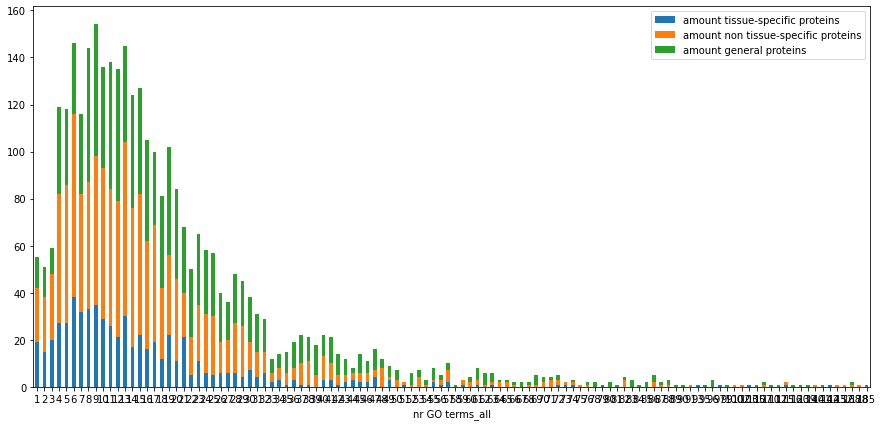

nr GO terms_all  amount tissue-specific proteins  \
0                  1                             19.0   
1                  2                             15.0   
2                  3                             20.0   
3                  4                             27.0   
4                  5                             27.0   
..               ...                              ...   
89               143                              NaN   
90               152                              NaN   
91               168                              NaN   
92               178                              NaN   
113              185                              NaN   

     amount non tissue-specific proteins  amount general proteins  Total  
0                                   23.0                     13.0   55.0  
1                                   23.0                     13.0   51.0  
2                                   28.0                     11.0   59.0  
3                                   55.0                     37.0  119.0  
4                                   59.0                     32.0  118.0  
..                                   ...                      ...    ...  
89                                   1.0                      NaN    1.0  
90                                   1.0                      NaN    1.0  
91                                   1.0                      1.0    2.0  
92                                   1.0                      NaN    1.0  
113                                  NaN                      1.0    1.0  

[114 rows x 5 columns]

In [52]:
grouped_tspec_colon = tspec_colon_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_colon = nontspec_colon_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_colon = generalP_colon_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_colon_all1 = pd.merge(grouped_tspec_colon, grouped_nontspec_colon, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_colon_all = pd.merge(grouped_colon_all1, grouped_general_colon, how="outer", on=["nr GO terms_all"])
grouped_colon_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_colon_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_colon_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_colon_all["Total"] = grouped_colon_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_colon_all

([], [])

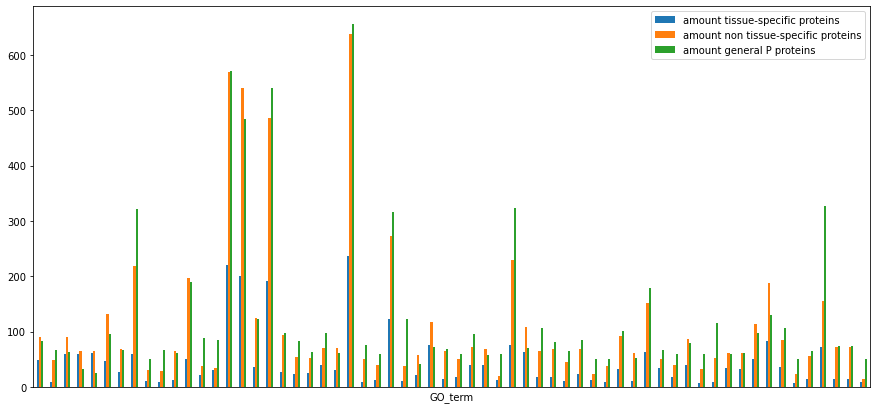

In [53]:
df_count_all_colon[(df_count_all_colon["amount tissue-specific proteins"]>=50)|(df_count_all_colon["amount non tissue-specific proteins"]>=50)
       |(df_count_all_colon["amount general P proteins"]>=50)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])

## looking at all other tissues

In [54]:
tspec_noncolon_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Colon"]==0]
nontspec_noncolon_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Colon"]==0]
generalP_noncolon_all = general_P_prot_GO_all[general_P_prot_GO_all["Colon"]==0]
df_count_all_tspec_noncolon = []
df_count_all_nontspec_noncolon = []
df_count_all_general_noncolon = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_noncolon_all[GO].sum()
        df_count_all_tspec_noncolon.append(count_tspec)
    else:
        df_count_all_tspec_noncolon.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_noncolon_all[GO].sum()
        df_count_all_nontspec_noncolon.append(count_nontspec)
    else:
         df_count_all_nontspec_noncolon.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_noncolon_all[GO].sum()
        df_count_all_general_noncolon.append(count_general)
    else:
        df_count_all_general_noncolon.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_noncolon_all[GO].sum()
    df_count_all_tspec_noncolon.append(count_tspec)
    count_nontspec = nontspec_noncolon_all[GO].sum()
    df_count_all_nontspec_noncolon.append(count_nontspec)
    count_general = generalP_noncolon_all[GO].sum()
    df_count_all_general_noncolon.append(count_general)

df_count_all_noncolon = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_noncolon2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_noncolon = df_count_all_noncolon.append(df_count_all_noncolon2, ignore_index=True)
df_count_all_noncolon["amount tissue-specific proteins"] = df_count_all_tspec_noncolon
df_count_all_noncolon["amount non tissue-specific proteins"] = df_count_all_nontspec_noncolon
df_count_all_noncolon["amount general P proteins"] = df_count_all_general_noncolon

In [55]:
print(data_protein.shape[0]) #number of unique proteins
print(data_protein[data_protein["Colon"]==1].shape[0]) #number of proteins seen at least in Colon
print(data_protein[data_protein["Colon"]==0].shape[0]) #number of proteins not seen in Colon

5855
3297
2558


<Figure size 1080x504 with 0 Axes>

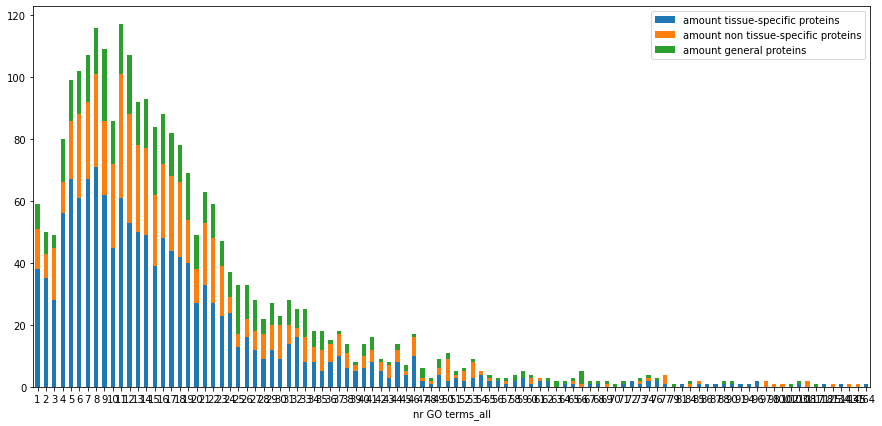

nr GO terms_all  amount tissue-specific proteins  \
0                 1                             38.0   
1                 2                             35.0   
2                 3                             28.0   
3                 4                             56.0   
4                 5                             67.0   
..              ...                              ...   
92              125                              NaN   
83              134                              1.0   
93              143                              NaN   
94              145                              NaN   
84              164                              1.0   

    amount non tissue-specific proteins  amount general proteins  Total  
0                                  13.0                      8.0   59.0  
1                                   8.0                      7.0   50.0  
2                                  17.0                      4.0   49.0  
3                                  10.0                     14.0   80.0  
4                                  19.0                     13.0   99.0  
..                                  ...                      ...    ...  
92                                  1.0                      NaN    1.0  
83                                  NaN                      NaN    1.0  
93                                  1.0                      NaN    1.0  
94                                  1.0                      NaN    1.0  
84                                  NaN                      NaN    1.0  

[100 rows x 5 columns]

In [56]:
grouped_tspec_noncolon = tspec_noncolon_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_noncolon = nontspec_noncolon_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_noncolon = generalP_noncolon_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_noncolon_all1 = pd.merge(grouped_tspec_noncolon, grouped_nontspec_noncolon, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_noncolon_all = pd.merge(grouped_noncolon_all1, grouped_general_noncolon, how="outer", on=["nr GO terms_all"])
grouped_noncolon_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_noncolon_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_noncolon_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_noncolon_all["Total"] = grouped_noncolon_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_noncolon_all

([], [])

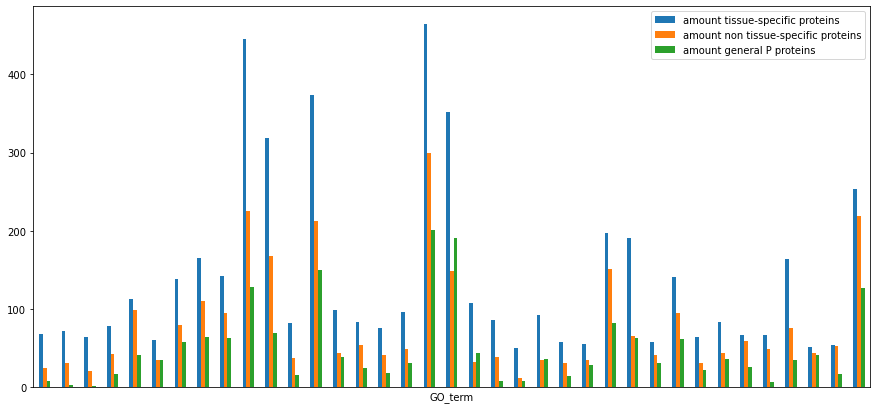

In [57]:
df_count_all_noncolon[(df_count_all_noncolon["amount tissue-specific proteins"]>=50)|(df_count_all_noncolon["amount non tissue-specific proteins"]>=50)
       |(df_count_all_noncolon["amount general P proteins"]>=50)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])

### Adipose tissue

350


<Figure size 1080x504 with 0 Axes>

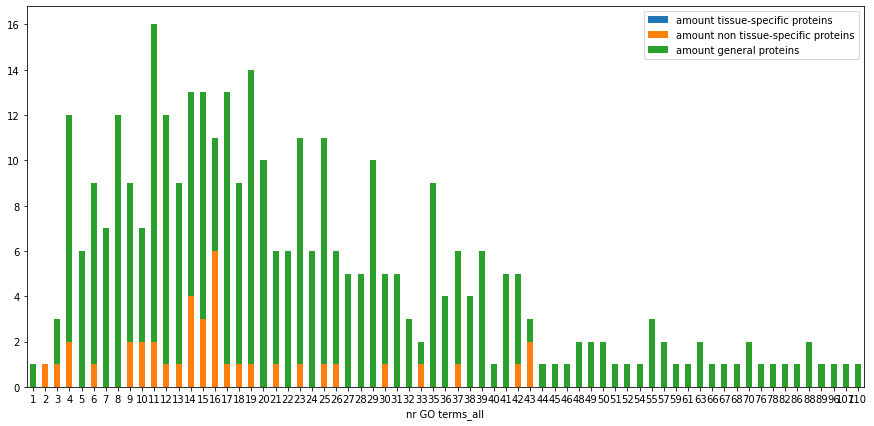

amount tissue-specific proteins  nr GO terms_all  \
24                              NaN                1   
0                               NaN                2   
1                               NaN                3   
2                               NaN                4   
25                              NaN                5   
..                              ...              ...   
64                              NaN               88   
65                              NaN               89   
66                              NaN               96   
67                              NaN              107   
68                              NaN              110   

    amount non tissue-specific proteins  amount general proteins  Total  
24                                  NaN                      1.0    1.0  
0                                   1.0                      NaN    1.0  
1                                   1.0                      2.0    3.0  
2                                   2.0                     10.0   12.0  
25                                  NaN                      6.0    6.0  
..                                  ...                      ...    ...  
64                                  NaN                      2.0    2.0  
65                                  NaN                      1.0    1.0  
66                                  NaN                      1.0    1.0  
67                                  NaN                      1.0    1.0  
68                                  NaN                      1.0    1.0  

[69 rows x 5 columns]

In [58]:
print(data_protein[data_protein["Adipose tissue"]==1].shape[0])
tspec_adipose_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Adipose tissue"]==1]
nontspec_adipose_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Adipose tissue"]==1]
generalP_adipose_all = general_P_prot_GO_all[general_P_prot_GO_all["Adipose tissue"]==1]
grouped_tspec_adipose = tspec_adipose_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_adipose = nontspec_adipose_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_adipose = generalP_adipose_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_adipose_all1 = pd.merge(grouped_tspec_adipose, grouped_nontspec_adipose, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_adipose_all = pd.merge(grouped_adipose_all1, grouped_general_adipose, how="outer", on=["nr GO terms_all"])
grouped_adipose_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_adipose_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_adipose_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_adipose_all["Total"] = grouped_adipose_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_adipose_all

GO_term  amount tissue-specific proteins  \
30     GO:0000086                                0   
39     GO:0000122                                0   
48     GO:0000139                                0   
50     GO:0000146                                0   
56     GO:0000165                                0   
...           ...                              ...   
11119  GO:1902036                                0   
11457  GO:1903561                                0   
11732  GO:1904724                                0   
11751  GO:1904813                                0   
12161  GO:1990904                                0   

       amount non tissue-specific proteins  amount general P proteins  
30                                       1                         11  
39                                       1                         11  
48                                       4                         11  
50                                       0                          5  
56                                       1                         13  
...                                    ...                        ...  
11119                                    0                          5  
11457                                    1                          6  
11732                                    1                          6  
11751                                    0                         18  
12161                                    2                         19  

[311 rows x 4 columns]

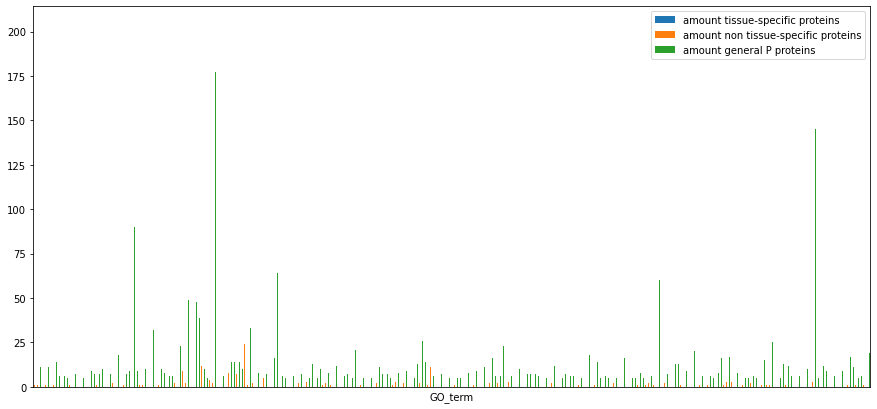

In [59]:
df_count_all_tspec_adipose = []
df_count_all_nontspec_adipose = []
df_count_all_general_adipose = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_adipose_all[GO].sum()
        df_count_all_tspec_adipose.append(count_tspec)
    else:
        df_count_all_tspec_adipose.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_adipose_all[GO].sum()
        df_count_all_nontspec_adipose.append(count_nontspec)
    else:
         df_count_all_nontspec_adipose.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_adipose_all[GO].sum()
        df_count_all_general_adipose.append(count_general)
    else:
        df_count_all_general_adipose.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_adipose_all[GO].sum()
    df_count_all_tspec_adipose.append(count_tspec)
    count_nontspec = nontspec_adipose_all[GO].sum()
    df_count_all_nontspec_adipose.append(count_nontspec)
    count_general = generalP_adipose_all[GO].sum()
    df_count_all_general_adipose.append(count_general)

df_count_all_adipose = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_adipose2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_adipose = df_count_all_adipose.append(df_count_all_adipose2, ignore_index=True)
df_count_all_adipose["amount tissue-specific proteins"] = df_count_all_tspec_adipose
df_count_all_adipose["amount non tissue-specific proteins"] = df_count_all_nontspec_adipose
df_count_all_adipose["amount general P proteins"] = df_count_all_general_adipose
df_count_all_adipose[(df_count_all_adipose["amount tissue-specific proteins"]>=5)|(df_count_all_adipose["amount non tissue-specific proteins"]>=5)
       |(df_count_all_adipose["amount general P proteins"]>=5)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_adipose[(df_count_all_adipose["amount tissue-specific proteins"]>=5)|(df_count_all_adipose["amount non tissue-specific proteins"]>=5)
       |(df_count_all_adipose["amount general P proteins"]>=5)]

### B-cells

233


<Figure size 1080x504 with 0 Axes>

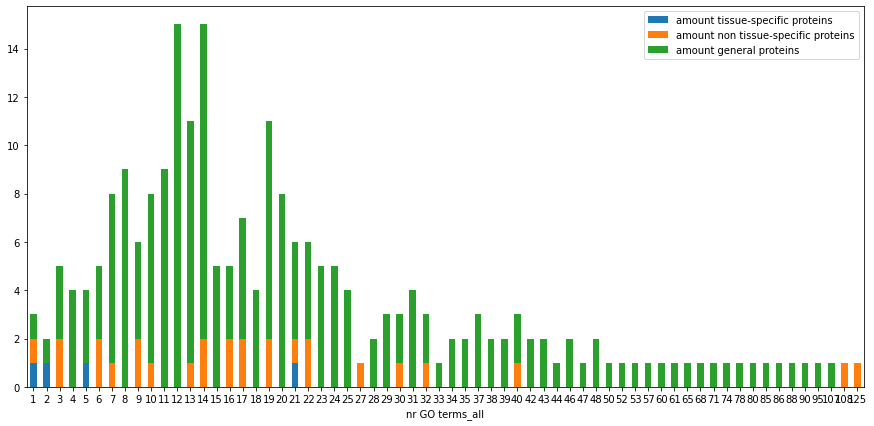

nr GO terms_all  amount tissue-specific proteins  \
0                 1                              1.0   
1                 2                              1.0   
4                 3                              NaN   
21                4                              NaN   
2                 5                              1.0   
..              ...                              ...   
61               90                              NaN   
62               95                              NaN   
63              107                              NaN   
19              108                              NaN   
20              125                              NaN   

    amount non tissue-specific proteins  amount general proteins  Total  
0                                   1.0                      1.0    3.0  
1                                   NaN                      1.0    2.0  
4                                   2.0                      3.0    5.0  
21                                  NaN                      4.0    4.0  
2                                   NaN                      3.0    4.0  
..                                  ...                      ...    ...  
61                                  NaN                      1.0    1.0  
62                                  NaN                      1.0    1.0  
63                                  NaN                      1.0    1.0  
19                                  1.0                      NaN    1.0  
20                                  1.0                      NaN    1.0  

[64 rows x 5 columns]

In [60]:
print(data_protein[data_protein["B-cells"]==1].shape[0])
tspec_bcell_all = t_spec_prot_GO_all[t_spec_prot_GO_all["B-cells"]==1]
nontspec_bcell_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["B-cells"]==1]
generalP_bcell_all = general_P_prot_GO_all[general_P_prot_GO_all["B-cells"]==1]
grouped_tspec_bcell = tspec_bcell_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_bcell = nontspec_bcell_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_bcell = generalP_bcell_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_bcell_all1 = pd.merge(grouped_tspec_bcell, grouped_nontspec_bcell, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_bcell_all = pd.merge(grouped_bcell_all1, grouped_general_bcell, how="outer", on=["nr GO terms_all"])
grouped_bcell_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_bcell_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_bcell_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_bcell_all["Total"] = grouped_bcell_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_bcell_all

GO_term  amount tissue-specific proteins  \
39     GO:0000122                                0   
48     GO:0000139                                0   
56     GO:0000165                                0   
76     GO:0000226                                0   
93     GO:0000287                                0   
...           ...                              ...   
10695  GO:0106310                                0   
10696  GO:0106311                                0   
10885  GO:1900034                                0   
11751  GO:1904813                                0   
12161  GO:1990904                                0   

       amount non tissue-specific proteins  amount general P proteins  
39                                       3                         11  
48                                       0                          5  
56                                       3                          5  
76                                       1                          7  
93                                       0                          6  
...                                    ...                        ...  
10695                                    0                         21  
10696                                    0                         21  
10885                                    0                          5  
11751                                    0                          7  
12161                                    0                         10  

[165 rows x 4 columns]

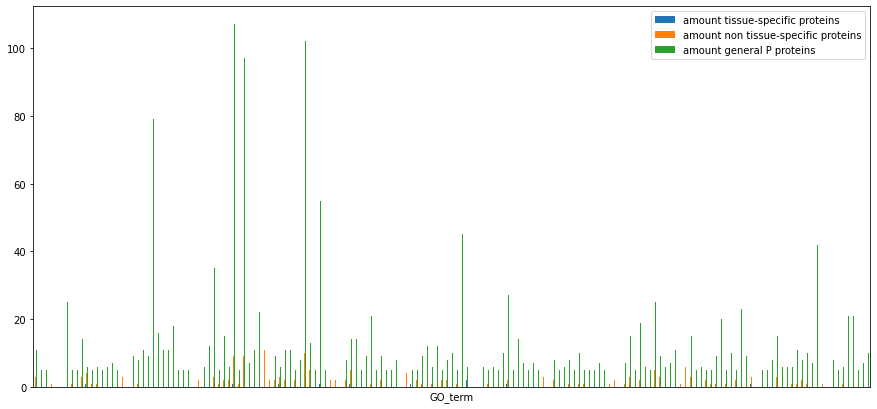

In [61]:
df_count_all_tspec_bcell = []
df_count_all_nontspec_bcell = []
df_count_all_general_bcell = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_bcell_all[GO].sum()
        df_count_all_tspec_bcell.append(count_tspec)
    else:
        df_count_all_tspec_bcell.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_bcell_all[GO].sum()
        df_count_all_nontspec_bcell.append(count_nontspec)
    else:
         df_count_all_nontspec_bcell.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_bcell_all[GO].sum()
        df_count_all_general_bcell.append(count_general)
    else:
        df_count_all_general_bcell.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_bcell_all[GO].sum()
    df_count_all_tspec_bcell.append(count_tspec)
    count_nontspec = nontspec_bcell_all[GO].sum()
    df_count_all_nontspec_bcell.append(count_nontspec)
    count_general = generalP_bcell_all[GO].sum()
    df_count_all_general_bcell.append(count_general)

df_count_all_bcell = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_bcell2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_bcell = df_count_all_bcell.append(df_count_all_bcell2, ignore_index=True)
df_count_all_bcell["amount tissue-specific proteins"] = df_count_all_tspec_bcell
df_count_all_bcell["amount non tissue-specific proteins"] = df_count_all_nontspec_bcell
df_count_all_bcell["amount general P proteins"] = df_count_all_general_bcell
df_count_all_bcell[(df_count_all_bcell["amount tissue-specific proteins"]>=5)|(df_count_all_bcell["amount non tissue-specific proteins"]>=5)
       |(df_count_all_bcell["amount general P proteins"]>=5)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_bcell[(df_count_all_bcell["amount tissue-specific proteins"]>=5)|(df_count_all_bcell["amount non tissue-specific proteins"]>=5)
       |(df_count_all_bcell["amount general P proteins"]>=5)]

### Blood

2737


<Figure size 1080x504 with 0 Axes>

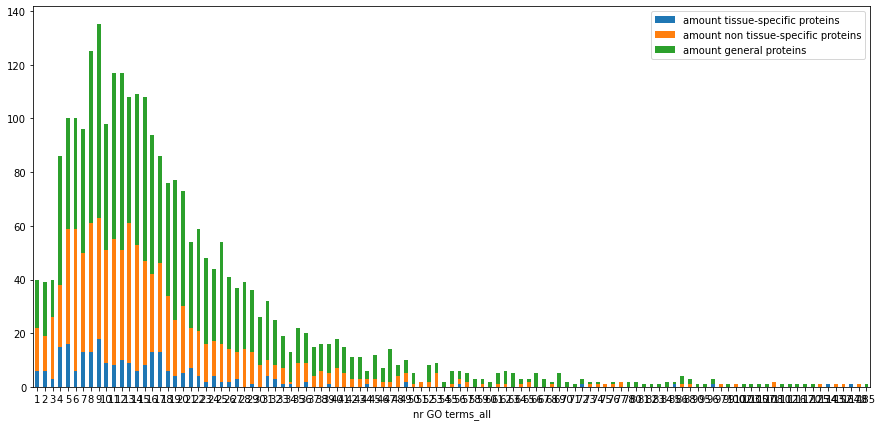

nr GO terms_all  amount tissue-specific proteins  \
0                  1                              6.0   
1                  2                              6.0   
2                  3                              3.0   
3                  4                             15.0   
4                  5                             16.0   
..               ...                              ...   
78               143                              NaN   
79               152                              NaN   
41               164                              1.0   
80               178                              NaN   
108              185                              NaN   

     amount non tissue-specific proteins  amount general proteins  Total  
0                                   16.0                     18.0   40.0  
1                                   13.0                     20.0   39.0  
2                                   23.0                     14.0   40.0  
3                                   23.0                     48.0   86.0  
4                                   43.0                     41.0  100.0  
..                                   ...                      ...    ...  
78                                   1.0                      NaN    1.0  
79                                   1.0                      NaN    1.0  
41                                   NaN                      NaN    1.0  
80                                   1.0                      NaN    1.0  
108                                  NaN                      1.0    1.0  

[109 rows x 5 columns]

In [62]:
print(data_protein[data_protein["Blood"]==1].shape[0])
tspec_blood_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Blood"]==1]
nontspec_blood_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Blood"]==1]
generalP_blood_all = general_P_prot_GO_all[general_P_prot_GO_all["Blood"]==1]
grouped_tspec_blood = tspec_blood_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_blood = nontspec_blood_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_blood = generalP_blood_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_blood_all1 = pd.merge(grouped_tspec_blood, grouped_nontspec_blood, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_blood_all = pd.merge(grouped_blood_all1, grouped_general_blood, how="outer", on=["nr GO terms_all"])
grouped_blood_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_blood_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_blood_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_blood_all["Total"] = grouped_blood_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_blood_all

#A lot of general phosphorylated proteins -> likely due to blood often 'contaminating' other tissues?

GO_term  amount tissue-specific proteins  \
26     GO:0000077                                3   
28     GO:0000082                                0   
30     GO:0000086                                4   
37     GO:0000118                                3   
39     GO:0000122                               13   
...           ...                              ...   
12271  GO:2000300                                0   
12278  GO:2000310                                1   
12304  GO:2000379                                0   
12330  GO:2000463                                0   
12532  GO:2001237                                0   

       amount non tissue-specific proteins  amount general P proteins  
26                                       7                          4  
28                                       7                          7  
30                                      16                         33  
37                                      10                          6  
39                                      74                         73  
...                                    ...                        ...  
12271                                    1                         14  
12278                                    2                          8  
12304                                    7                          0  
12330                                    2                          7  
12532                                    4                          7  

[915 rows x 4 columns]

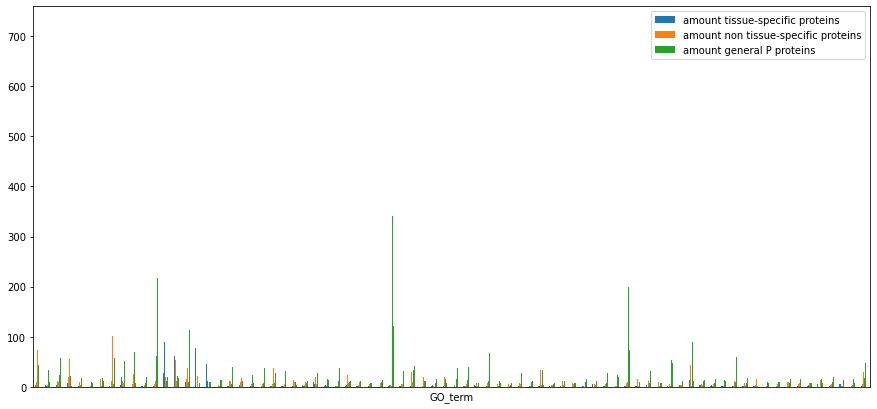

In [63]:
df_count_all_tspec_blood = []
df_count_all_nontspec_blood = []
df_count_all_general_blood = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_blood_all[GO].sum()
        df_count_all_tspec_blood.append(count_tspec)
    else:
        df_count_all_tspec_blood.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_blood_all[GO].sum()
        df_count_all_nontspec_blood.append(count_nontspec)
    else:
         df_count_all_nontspec_blood.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_blood_all[GO].sum()
        df_count_all_general_blood.append(count_general)
    else:
        df_count_all_general_blood.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_blood_all[GO].sum()
    df_count_all_tspec_blood.append(count_tspec)
    count_nontspec = nontspec_blood_all[GO].sum()
    df_count_all_nontspec_blood.append(count_nontspec)
    count_general = generalP_blood_all[GO].sum()
    df_count_all_general_blood.append(count_general)

df_count_all_blood = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_blood2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_blood = df_count_all_blood.append(df_count_all_blood2, ignore_index=True)
df_count_all_blood["amount tissue-specific proteins"] = df_count_all_tspec_blood
df_count_all_blood["amount non tissue-specific proteins"] = df_count_all_nontspec_blood
df_count_all_blood["amount general P proteins"] = df_count_all_general_blood
df_count_all_blood[(df_count_all_blood["amount tissue-specific proteins"]>=7)|(df_count_all_blood["amount non tissue-specific proteins"]>=7)
       |(df_count_all_blood["amount general P proteins"]>=7)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_blood[(df_count_all_blood["amount tissue-specific proteins"]>=7)|(df_count_all_blood["amount non tissue-specific proteins"]>=7)
       |(df_count_all_blood["amount general P proteins"]>=7)]

### Bone

11


<Figure size 1080x504 with 0 Axes>

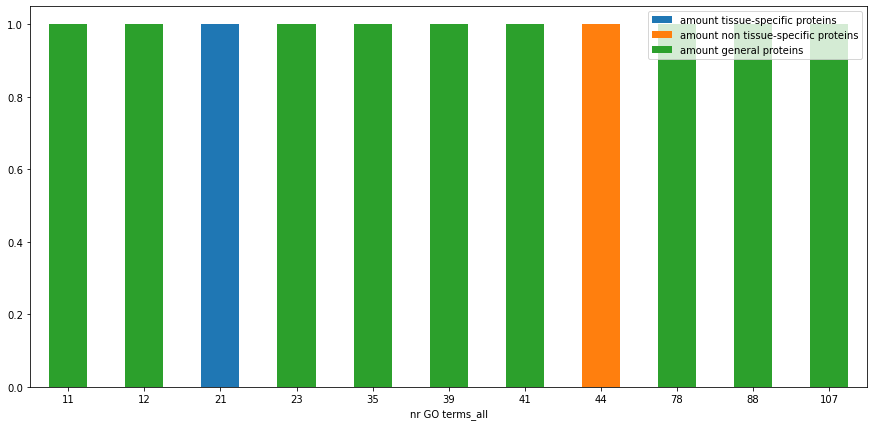

nr GO terms_all  amount tissue-specific proteins  \
2                11                              NaN   
3                12                              NaN   
0                21                              1.0   
4                23                              NaN   
5                35                              NaN   
6                39                              NaN   
7                41                              NaN   
1                44                              NaN   
8                78                              NaN   
9                88                              NaN   
10              107                              NaN   

    amount non tissue-specific proteins  amount general proteins  Total  
2                                   NaN                      1.0    1.0  
3                                   NaN                      1.0    1.0  
0                                   NaN                      NaN    1.0  
4                                   NaN                      1.0    1.0  
5                                   NaN                      1.0    1.0  
6                                   NaN                      1.0    1.0  
7                                   NaN                      1.0    1.0  
1                                   1.0                      NaN    1.0  
8                                   NaN                      1.0    1.0  
9                                   NaN                      1.0    1.0  
10                                  NaN                      1.0    1.0

In [64]:
print(data_protein[data_protein["Bone"]==1].shape[0])
tspec_bone_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Bone"]==1]
nontspec_bone_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Bone"]==1]
generalP_bone_all = general_P_prot_GO_all[general_P_prot_GO_all["Bone"]==1]
grouped_tspec_bone = tspec_bone_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_bone = nontspec_bone_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_bone = generalP_bone_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_bone_all1 = pd.merge(grouped_tspec_bone, grouped_nontspec_bone, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_bone_all = pd.merge(grouped_bone_all1, grouped_general_bone, how="outer", on=["nr GO terms_all"])
grouped_bone_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_bone_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_bone_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_bone_all["Total"] = grouped_bone_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_bone_all

GO_term  amount tissue-specific proteins  \
93     GO:0000287                                0   
433    GO:0001843                                0   
606    GO:0002223                                0   
614    GO:0002250                                0   
770    GO:0002862                                0   
...           ...                              ...   
10352  GO:0097718                                0   
10695  GO:0106310                                0   
10696  GO:0106311                                0   
11055  GO:1901621                                0   
12161  GO:1990904                                0   

       amount non tissue-specific proteins  amount general P proteins  
93                                       0                          2  
433                                      0                          2  
606                                      0                          3  
614                                      0                          3  
770                                      0                          3  
...                                    ...                        ...  
10352                                    0                          2  
10695                                    0                          3  
10696                                    0                          3  
11055                                    0                          2  
12161                                    0                          2  

[64 rows x 4 columns]

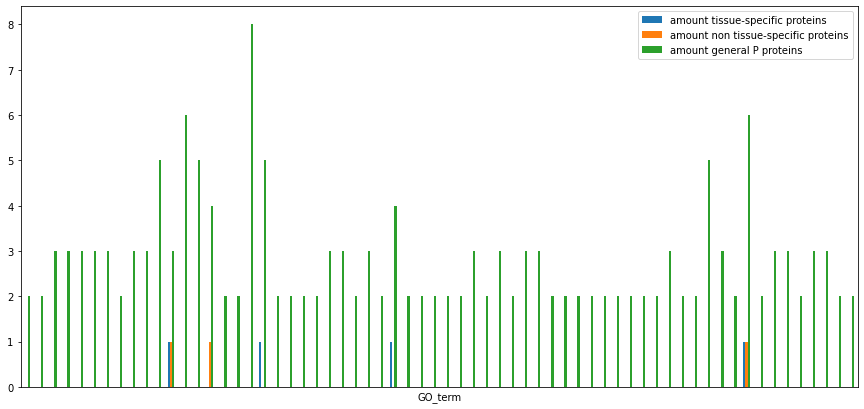

In [65]:
df_count_all_tspec_bone = []
df_count_all_nontspec_bone = []
df_count_all_general_bone = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_bone_all[GO].sum()
        df_count_all_tspec_bone.append(count_tspec)
    else:
        df_count_all_tspec_bone.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_bone_all[GO].sum()
        df_count_all_nontspec_bone.append(count_nontspec)
    else:
         df_count_all_nontspec_bone.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_bone_all[GO].sum()
        df_count_all_general_bone.append(count_general)
    else:
        df_count_all_general_bone.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_bone_all[GO].sum()
    df_count_all_tspec_bone.append(count_tspec)
    count_nontspec = nontspec_bone_all[GO].sum()
    df_count_all_nontspec_bone.append(count_nontspec)
    count_general = generalP_bone_all[GO].sum()
    df_count_all_general_bone.append(count_general)

df_count_all_bone = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_bone2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_bone = df_count_all_bone.append(df_count_all_bone2, ignore_index=True)
df_count_all_bone["amount tissue-specific proteins"] = df_count_all_tspec_bone
df_count_all_bone["amount non tissue-specific proteins"] = df_count_all_nontspec_bone
df_count_all_bone["amount general P proteins"] = df_count_all_general_bone
df_count_all_bone[(df_count_all_bone["amount tissue-specific proteins"]>1)|(df_count_all_bone["amount non tissue-specific proteins"]>1)
       |(df_count_all_bone["amount general P proteins"]>1)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_bone[(df_count_all_bone["amount tissue-specific proteins"]>1)|(df_count_all_bone["amount non tissue-specific proteins"]>1)
       |(df_count_all_bone["amount general P proteins"]>1)]

### Brain

1026


<Figure size 1080x504 with 0 Axes>

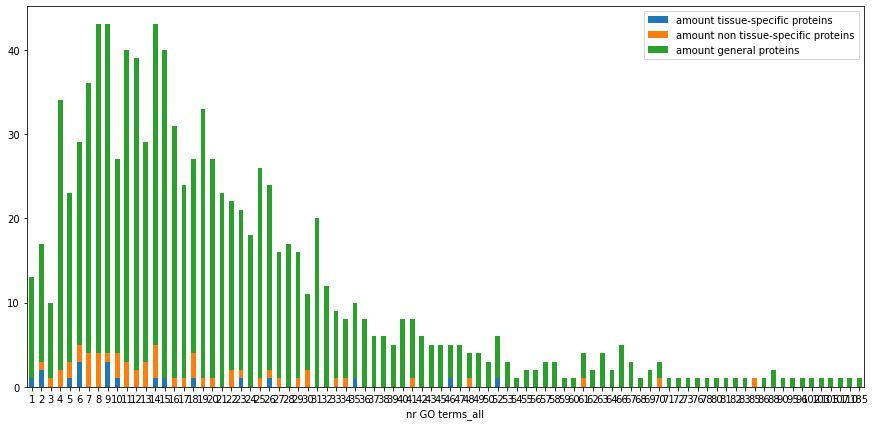

nr GO terms_all  amount tissue-specific proteins  \
0                 1                              1.0   
1                 2                              2.0   
14                3                              NaN   
15                4                              NaN   
2                 5                              1.0   
..              ...                              ...   
83              103                              NaN   
84              105                              NaN   
85              107                              NaN   
86              110                              NaN   
87              185                              NaN   

    amount non tissue-specific proteins  amount general proteins  Total  
0                                   NaN                     12.0   13.0  
1                                   1.0                     14.0   17.0  
14                                  1.0                      9.0   10.0  
15                                  2.0                     32.0   34.0  
2                                   2.0                     20.0   23.0  
..                                  ...                      ...    ...  
83                                  NaN                      1.0    1.0  
84                                  NaN                      1.0    1.0  
85                                  NaN                      1.0    1.0  
86                                  NaN                      1.0    1.0  
87                                  NaN                      1.0    1.0  

[88 rows x 5 columns]

In [66]:
print(data_protein[data_protein["Brain"]==1].shape[0])
tspec_brain_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Brain"]==1]
nontspec_brain_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Brain"]==1]
generalP_brain_all = general_P_prot_GO_all[general_P_prot_GO_all["Brain"]==1]
grouped_tspec_brain = tspec_brain_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_brain = nontspec_brain_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_brain = generalP_brain_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_brain_all1 = pd.merge(grouped_tspec_brain, grouped_nontspec_brain, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_brain_all = pd.merge(grouped_brain_all1, grouped_general_brain, how="outer", on=["nr GO terms_all"])
grouped_brain_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_brain_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_brain_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_brain_all["Total"] = grouped_brain_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_brain_all
#Many general phosphorylated proteins, while brain is relatively isolated?

GO_term  amount tissue-specific proteins  \
30     GO:0000086                                1   
39     GO:0000122                                0   
48     GO:0000139                                0   
56     GO:0000165                                0   
76     GO:0000226                                0   
...           ...                              ...   
10495  GO:0098978                                1   
10695  GO:0106310                                0   
10696  GO:0106311                                0   
11751  GO:1904813                                0   
12161  GO:1990904                                0   

       amount non tissue-specific proteins  amount general P proteins  
30                                       1                         27  
39                                       1                         23  
48                                       0                         26  
56                                       0                         30  
76                                       2                         40  
...                                    ...                        ...  
10495                                    0                         55  
10695                                    0                         54  
10696                                    0                         54  
11751                                    0                         23  
12161                                    0                         21  

[143 rows x 4 columns]

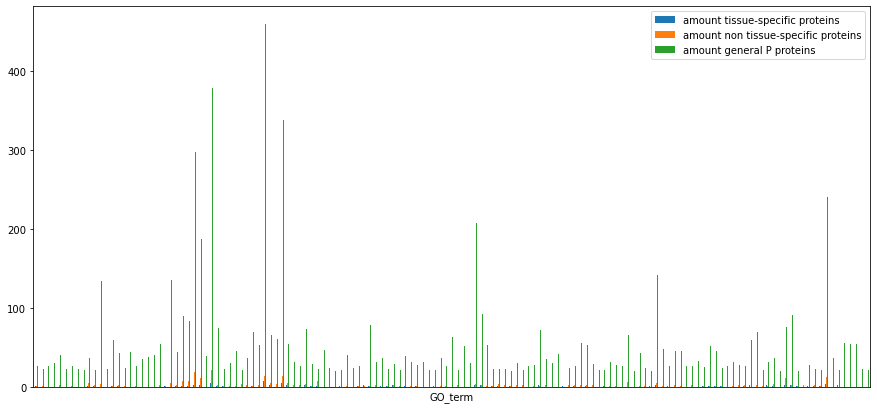

In [67]:
df_count_all_tspec_brain = []
df_count_all_nontspec_brain = []
df_count_all_general_brain = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_brain_all[GO].sum()
        df_count_all_tspec_brain.append(count_tspec)
    else:
        df_count_all_tspec_brain.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_brain_all[GO].sum()
        df_count_all_nontspec_brain.append(count_nontspec)
    else:
         df_count_all_nontspec_brain.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_brain_all[GO].sum()
        df_count_all_general_brain.append(count_general)
    else:
        df_count_all_general_brain.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_brain_all[GO].sum()
    df_count_all_tspec_brain.append(count_tspec)
    count_nontspec = nontspec_brain_all[GO].sum()
    df_count_all_nontspec_brain.append(count_nontspec)
    count_general = generalP_brain_all[GO].sum()
    df_count_all_general_brain.append(count_general)

df_count_all_brain = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_brain2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_brain = df_count_all_brain.append(df_count_all_brain2, ignore_index=True)
df_count_all_brain["amount tissue-specific proteins"] = df_count_all_tspec_brain
df_count_all_brain["amount non tissue-specific proteins"] = df_count_all_nontspec_brain
df_count_all_brain["amount general P proteins"] = df_count_all_general_brain
df_count_all_brain[(df_count_all_brain["amount tissue-specific proteins"]>=20)|(df_count_all_brain["amount non tissue-specific proteins"]>=20)
       |(df_count_all_brain["amount general P proteins"]>=20)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_brain[(df_count_all_brain["amount tissue-specific proteins"]>=20)|(df_count_all_brain["amount non tissue-specific proteins"]>=20)
       |(df_count_all_brain["amount general P proteins"]>=20)]
#200 proteins associated with a certain GO term, while there are only 1000+ in this tissue

### Breast

87


<Figure size 1080x504 with 0 Axes>

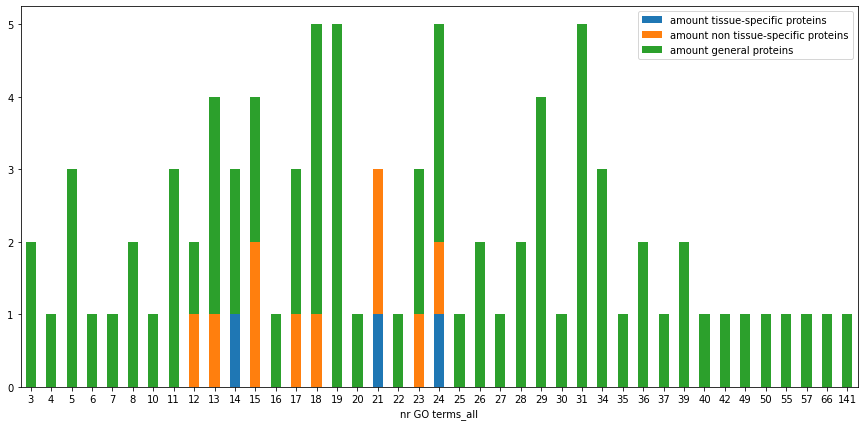

nr GO terms_all  amount tissue-specific proteins  \
9                 3                              NaN   
10                4                              NaN   
11                5                              NaN   
12                6                              NaN   
13                7                              NaN   
14                8                              NaN   
15               10                              NaN   
16               11                              NaN   
3                12                              NaN   
4                13                              NaN   
0                14                              1.0   
5                15                              NaN   
17               16                              NaN   
6                17                              NaN   
7                18                              NaN   
18               19                              NaN   
19               20                              NaN   
1                21                              1.0   
20               22                              NaN   
8                23                              NaN   
2                24                              1.0   
21               25                              NaN   
22               26                              NaN   
23               27                              NaN   
24               28                              NaN   
25               29                              NaN   
26               30                              NaN   
27               31                              NaN   
28               34                              NaN   
29               35                              NaN   
30               36                              NaN   
31               37                              NaN   
32               39                              NaN   
33               40                              NaN   
34               42                              NaN   
35               49                              NaN   
36               50                              NaN   
37               55                              NaN   
38               57                              NaN   
39               66                              NaN   
40              141                              NaN   

    amount non tissue-specific proteins  amount general proteins  Total  
9                                   NaN                      2.0    2.0  
10                                  NaN                      1.0    1.0  
11                                  NaN                      3.0    3.0  
12                                  NaN                      1.0    1.0  
13                                  NaN                      1.0    1.0  
14                                  NaN                      2.0    2.0  
15                                  NaN                      1.0    1.0  
16                                  NaN                      3.0    3.0  
3                                   1.0                      1.0    2.0  
4                                   1.0                      3.0    4.0  
0                                   NaN                      2.0    3.0  
5                                   2.0                      2.0    4.0  
17                                  NaN                      1.0    1.0  
6                                   1.0                      2.0    3.0  
7                                   1.0                      4.0    5.0  
18                                  NaN                      5.0    5.0  
19                                  NaN                      1.0    1.0  
1                                   2.0                      NaN    3.0  
20                                  NaN                      1.0    1.0  
8                                   1.0                      2.0    3.0  
2                                   1.0                      3.0    5.0  
21                     

In [68]:
print(data_protein[data_protein["Breast"]==1].shape[0])
tspec_breast_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Breast"]==1]
nontspec_breast_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Breast"]==1]
generalP_breast_all = general_P_prot_GO_all[general_P_prot_GO_all["Breast"]==1]
grouped_tspec_breast = tspec_breast_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_breast = nontspec_breast_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_breast = generalP_breast_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_breast_all1 = pd.merge(grouped_tspec_breast, grouped_nontspec_breast, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_breast_all = pd.merge(grouped_breast_all1, grouped_general_breast, how="outer", on=["nr GO terms_all"])
grouped_breast_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_breast_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_breast_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_breast_all["Total"] = grouped_breast_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_breast_all

GO_term  amount tissue-specific proteins  \
39     GO:0000122                                0   
48     GO:0000139                                0   
56     GO:0000165                                0   
68     GO:0000187                                0   
70     GO:0000209                                0   
...           ...                              ...   
11109  GO:1901990                                0   
11119  GO:1902036                                0   
11145  GO:1902176                                0   
11732  GO:1904724                                0   
11751  GO:1904813                                0   

       amount non tissue-specific proteins  amount general P proteins  
39                                       1                          2  
48                                       0                          2  
56                                       0                          5  
68                                       0                          2  
70                                       0                          3  
...                                    ...                        ...  
11109                                    0                          3  
11119                                    0                          3  
11145                                    0                          2  
11732                                    1                          3  
11751                                    0                          6  

[294 rows x 4 columns]

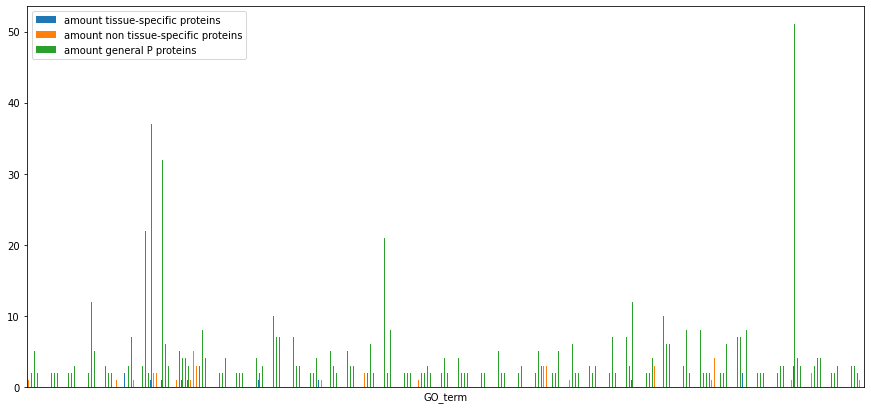

In [69]:
df_count_all_tspec_breast = []
df_count_all_nontspec_breast = []
df_count_all_general_breast = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_breast_all[GO].sum()
        df_count_all_tspec_breast.append(count_tspec)
    else:
        df_count_all_tspec_breast.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_breast_all[GO].sum()
        df_count_all_nontspec_breast.append(count_nontspec)
    else:
         df_count_all_nontspec_breast.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_breast_all[GO].sum()
        df_count_all_general_breast.append(count_general)
    else:
        df_count_all_general_breast.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_breast_all[GO].sum()
    df_count_all_tspec_breast.append(count_tspec)
    count_nontspec = nontspec_breast_all[GO].sum()
    df_count_all_nontspec_breast.append(count_nontspec)
    count_general = generalP_breast_all[GO].sum()
    df_count_all_general_breast.append(count_general)

df_count_all_breast = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_breast2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_breast = df_count_all_breast.append(df_count_all_breast2, ignore_index=True)
df_count_all_breast["amount tissue-specific proteins"] = df_count_all_tspec_breast
df_count_all_breast["amount non tissue-specific proteins"] = df_count_all_nontspec_breast
df_count_all_breast["amount general P proteins"] = df_count_all_general_breast
df_count_all_breast[(df_count_all_breast["amount tissue-specific proteins"]>1)|(df_count_all_breast["amount non tissue-specific proteins"]>1)
       |(df_count_all_breast["amount general P proteins"]>1)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_breast[(df_count_all_breast["amount tissue-specific proteins"]>1)|(df_count_all_breast["amount non tissue-specific proteins"]>1)
       |(df_count_all_breast["amount general P proteins"]>1)]

### Cerebrospinal fluid

884


<Figure size 1080x504 with 0 Axes>

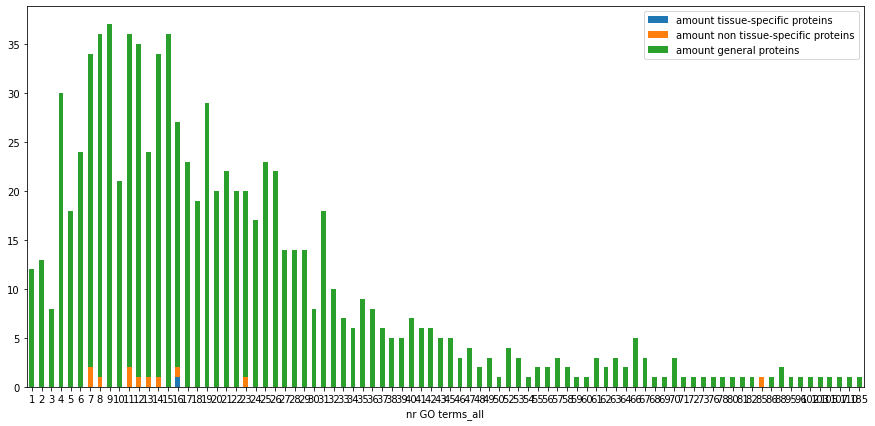

nr GO terms_all  amount tissue-specific proteins  \
9                 1                              NaN   
10                2                              NaN   
11                3                              NaN   
12                4                              NaN   
13                5                              NaN   
..              ...                              ...   
81              103                              NaN   
82              105                              NaN   
83              107                              NaN   
84              110                              NaN   
85              185                              NaN   

    amount non tissue-specific proteins  amount general proteins  Total  
9                                   NaN                     12.0   12.0  
10                                  NaN                     13.0   13.0  
11                                  NaN                      8.0    8.0  
12                                  NaN                     30.0   30.0  
13                                  NaN                     18.0   18.0  
..                                  ...                      ...    ...  
81                                  NaN                      1.0    1.0  
82                                  NaN                      1.0    1.0  
83                                  NaN                      1.0    1.0  
84                                  NaN                      1.0    1.0  
85                                  NaN                      1.0    1.0  

[86 rows x 5 columns]

In [70]:
print(data_protein[data_protein["Cerebrospinal fluid"]==1].shape[0])
tspec_cerebrospinal_fluid_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Cerebrospinal fluid"]==1]
nontspec_cerebrospinal_fluid_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Cerebrospinal fluid"]==1]
generalP_cerebrospinal_fluid_all = general_P_prot_GO_all[general_P_prot_GO_all["Cerebrospinal fluid"]==1]
grouped_tspec_cerebrospinal_fluid = tspec_cerebrospinal_fluid_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_cerebrospinal_fluid = nontspec_cerebrospinal_fluid_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_cerebrospinal_fluid = generalP_cerebrospinal_fluid_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_cerebrospinal_fluid_all1 = pd.merge(grouped_tspec_cerebrospinal_fluid, grouped_nontspec_cerebrospinal_fluid, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_cerebrospinal_fluid_all = pd.merge(grouped_cerebrospinal_fluid_all1, grouped_general_cerebrospinal_fluid, how="outer", on=["nr GO terms_all"])
grouped_cerebrospinal_fluid_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_cerebrospinal_fluid_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_cerebrospinal_fluid_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_cerebrospinal_fluid_all["Total"] = grouped_cerebrospinal_fluid_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_cerebrospinal_fluid_all

GO_term  amount tissue-specific proteins  \
30     GO:0000086                                0   
39     GO:0000122                                0   
48     GO:0000139                                0   
50     GO:0000146                                0   
51     GO:0000149                                0   
...           ...                              ...   
12131  GO:1990782                                0   
12161  GO:1990904                                0   
12271  GO:2000300                                0   
12278  GO:2000310                                0   
12330  GO:2000463                                0   

       amount non tissue-specific proteins  amount general P proteins  
30                                       0                         23  
39                                       0                         18  
48                                       0                         26  
50                                       0                          7  
51                                       0                         14  
...                                    ...                        ...  
12131                                    0                          7  
12161                                    0                         18  
12271                                    0                         12  
12278                                    0                          7  
12330                                    0                          7  

[514 rows x 4 columns]

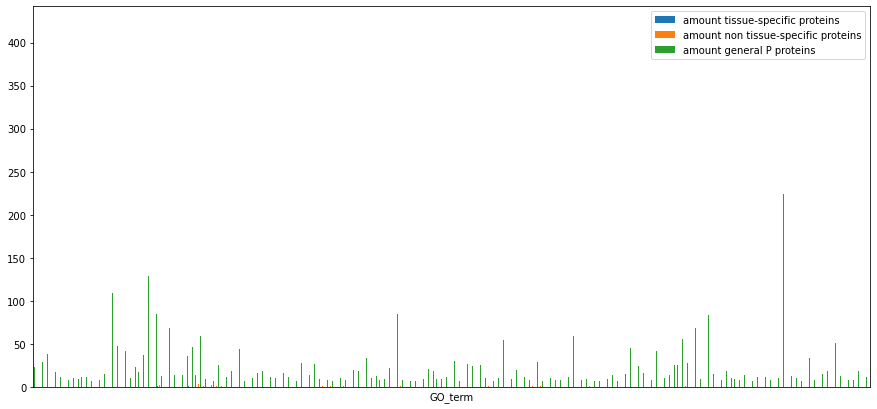

In [71]:
df_count_all_tspec_cerebrospinal_fluid = []
df_count_all_nontspec_cerebrospinal_fluid = []
df_count_all_general_cerebrospinal_fluid = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_cerebrospinal_fluid_all[GO].sum()
        df_count_all_tspec_cerebrospinal_fluid.append(count_tspec)
    else:
        df_count_all_tspec_cerebrospinal_fluid.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_cerebrospinal_fluid_all[GO].sum()
        df_count_all_nontspec_cerebrospinal_fluid.append(count_nontspec)
    else:
         df_count_all_nontspec_cerebrospinal_fluid.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_cerebrospinal_fluid_all[GO].sum()
        df_count_all_general_cerebrospinal_fluid.append(count_general)
    else:
        df_count_all_general_cerebrospinal_fluid.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_cerebrospinal_fluid_all[GO].sum()
    df_count_all_tspec_cerebrospinal_fluid.append(count_tspec)
    count_nontspec = nontspec_cerebrospinal_fluid_all[GO].sum()
    df_count_all_nontspec_cerebrospinal_fluid.append(count_nontspec)
    count_general = generalP_cerebrospinal_fluid_all[GO].sum()
    df_count_all_general_cerebrospinal_fluid.append(count_general)

df_count_all_cerebrospinal_fluid = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_cerebrospinal_fluid2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_cerebrospinal_fluid = df_count_all_cerebrospinal_fluid.append(df_count_all_cerebrospinal_fluid2, ignore_index=True)
df_count_all_cerebrospinal_fluid["amount tissue-specific proteins"] = df_count_all_tspec_cerebrospinal_fluid
df_count_all_cerebrospinal_fluid["amount non tissue-specific proteins"] = df_count_all_nontspec_cerebrospinal_fluid
df_count_all_cerebrospinal_fluid["amount general P proteins"] = df_count_all_general_cerebrospinal_fluid
df_count_all_cerebrospinal_fluid[(df_count_all_cerebrospinal_fluid["amount tissue-specific proteins"]>=7)|(df_count_all_cerebrospinal_fluid["amount non tissue-specific proteins"]>=7)
       |(df_count_all_cerebrospinal_fluid["amount general P proteins"]>=7)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_cerebrospinal_fluid[(df_count_all_cerebrospinal_fluid["amount tissue-specific proteins"]>=7)|(df_count_all_cerebrospinal_fluid["amount non tissue-specific proteins"]>=7)
       |(df_count_all_cerebrospinal_fluid["amount general P proteins"]>=7)]


### Cervix

18


<Figure size 1080x504 with 0 Axes>

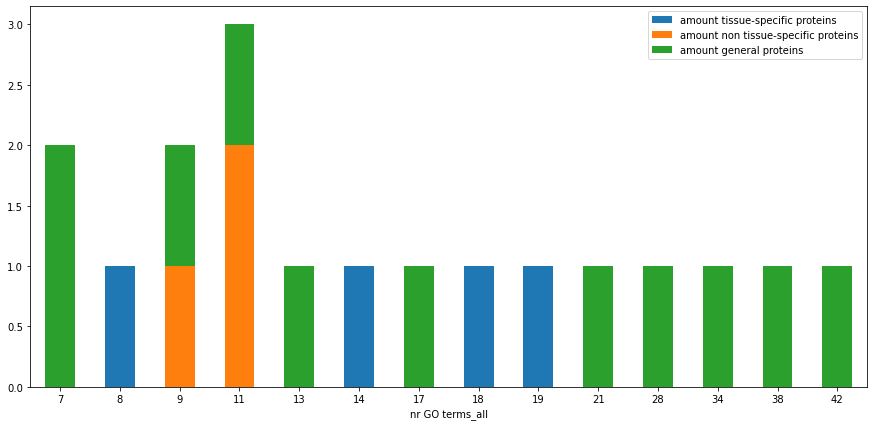

nr GO terms_all  amount tissue-specific proteins  \
6                 7                              NaN   
0                 8                              1.0   
4                 9                              NaN   
5                11                              NaN   
7                13                              NaN   
1                14                              1.0   
8                17                              NaN   
2                18                              1.0   
3                19                              1.0   
9                21                              NaN   
10               28                              NaN   
11               34                              NaN   
12               38                              NaN   
13               42                              NaN   

    amount non tissue-specific proteins  amount general proteins  Total  
6                                   NaN                      2.0    2.0  
0                                   NaN                      NaN    1.0  
4                                   1.0                      1.0    2.0  
5                                   2.0                      1.0    3.0  
7                                   NaN                      1.0    1.0  
1                                   NaN                      NaN    1.0  
8                                   NaN                      1.0    1.0  
2                                   NaN                      NaN    1.0  
3                                   NaN                      NaN    1.0  
9                                   NaN                      1.0    1.0  
10                                  NaN                      1.0    1.0  
11                                  NaN                      1.0    1.0  
12                                  NaN                      1.0    1.0  
13                                  NaN                      1.0    1.0

In [72]:
print(data_protein[data_protein["Cervix"]==1].shape[0])
tspec_cervix_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Cervix"]==1]
nontspec_cervix_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Cervix"]==1]
generalP_cervix_all = general_P_prot_GO_all[general_P_prot_GO_all["Cervix"]==1]
grouped_tspec_cervix = tspec_cervix_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_cervix = nontspec_cervix_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_cervix = generalP_cervix_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_cervix_all1 = pd.merge(grouped_tspec_cervix, grouped_nontspec_cervix, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_cervix_all = pd.merge(grouped_cervix_all1, grouped_general_cervix, how="outer", on=["nr GO terms_all"])
grouped_cervix_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_cervix_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_cervix_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_cervix_all["Total"] = grouped_cervix_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_cervix_all

GO_term  amount tissue-specific proteins  \
462   GO:0001895                                0   
928   GO:0003723                                0   
1426  GO:0005200                                0   
1518  GO:0005576                                0   
1539  GO:0005615                                1   
1541  GO:0005634                                0   
1583  GO:0005737                                1   
1624  GO:0005794                                0   
1639  GO:0005829                                2   
1656  GO:0005856                                0   
1672  GO:0005882                                0   
1676  GO:0005886                                2   
1697  GO:0005925                                0   
2153  GO:0006898                                0   
2636  GO:0008544                                1   
3395  GO:0016020                                2   
4655  GO:0031424                                0   
6464  GO:0042802                                1   
6532  GO:0043066                                0   
6980  GO:0045095                                0   
7046  GO:0045296                                0   
9064  GO:0070062                                1   
9141  GO:0070268                                1   
9834  GO:0072562                                0   

      amount non tissue-specific proteins  amount general P proteins  
462                                     0                          3  
928                                     0                          2  
1426                                    1                          3  
1518                                    0                          2  
1539                                    0                          3  
1541                                    2                          6  
1583                                    0                          5  
1624                                    1                          2  
1639                                    3                          8  
1656                                    0                          2  
1672                                    2                          2  
1676                                    0                          3  
1697                                    0                          3  
2153                                    0                          3  
2636                                    2                          1  
3395                                    0                          3  
4655                                    2                          5  
6464                                    0                          3  
6532                                    0                          2  
6980                                    1                          5  
7046                                    0                          2  
9064                                    2                         10  
9141                                    3                          5  
9834                                    0                          2

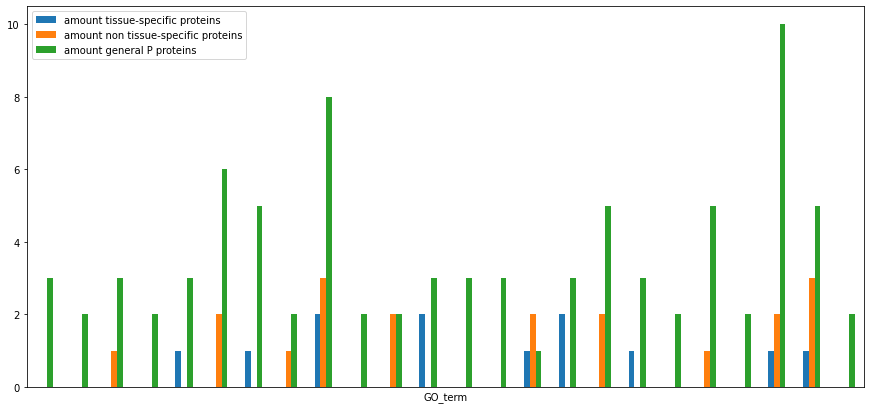

In [73]:
df_count_all_tspec_cervix = []
df_count_all_nontspec_cervix = []
df_count_all_general_cervix = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_cervix_all[GO].sum()
        df_count_all_tspec_cervix.append(count_tspec)
    else:
        df_count_all_tspec_cervix.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_cervix_all[GO].sum()
        df_count_all_nontspec_cervix.append(count_nontspec)
    else:
         df_count_all_nontspec_cervix.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_cervix_all[GO].sum()
        df_count_all_general_cervix.append(count_general)
    else:
        df_count_all_general_cervix.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_cervix_all[GO].sum()
    df_count_all_tspec_cervix.append(count_tspec)
    count_nontspec = nontspec_cervix_all[GO].sum()
    df_count_all_nontspec_cervix.append(count_nontspec)
    count_general = generalP_cervix_all[GO].sum()
    df_count_all_general_cervix.append(count_general)

df_count_all_cervix = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_cervix2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_cervix = df_count_all_cervix.append(df_count_all_cervix2, ignore_index=True)
df_count_all_cervix["amount tissue-specific proteins"] = df_count_all_tspec_cervix
df_count_all_cervix["amount non tissue-specific proteins"] = df_count_all_nontspec_cervix
df_count_all_cervix["amount general P proteins"] = df_count_all_general_cervix
df_count_all_cervix[(df_count_all_cervix["amount tissue-specific proteins"]>1)|(df_count_all_cervix["amount non tissue-specific proteins"]>1)
       |(df_count_all_cervix["amount general P proteins"]>1)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_cervix[(df_count_all_cervix["amount tissue-specific proteins"]>1)|(df_count_all_cervix["amount non tissue-specific proteins"]>1)
       |(df_count_all_cervix["amount general P proteins"]>1)]

### Dental plaque

25


<Figure size 1080x504 with 0 Axes>

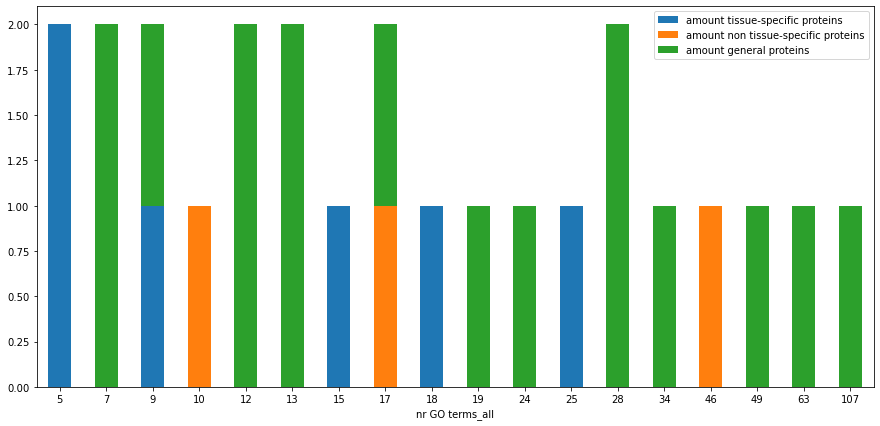

nr GO terms_all  amount tissue-specific proteins  \
0                 5                              2.0   
8                 7                              NaN   
1                 9                              1.0   
5                10                              NaN   
9                12                              NaN   
10               13                              NaN   
2                15                              1.0   
6                17                              NaN   
3                18                              1.0   
11               19                              NaN   
12               24                              NaN   
4                25                              1.0   
13               28                              NaN   
14               34                              NaN   
7                46                              NaN   
15               49                              NaN   
16               63                              NaN   
17              107                              NaN   

    amount non tissue-specific proteins  amount general proteins  Total  
0                                   NaN                      NaN    2.0  
8                                   NaN                      2.0    2.0  
1                                   NaN                      1.0    2.0  
5                                   1.0                      NaN    1.0  
9                                   NaN                      2.0    2.0  
10                                  NaN                      2.0    2.0  
2                                   NaN                      NaN    1.0  
6                                   1.0                      1.0    2.0  
3                                   NaN                      NaN    1.0  
11                                  NaN                      1.0    1.0  
12                                  NaN                      1.0    1.0  
4                                   NaN                      NaN    1.0  
13                                  NaN                      2.0    2.0  
14                                  NaN                      1.0    1.0  
7                                   1.0                      NaN    1.0  
15                                  NaN                      1.0    1.0  
16                                  NaN                      1.0    1.0  
17                                  NaN                      1.0    1.0

In [74]:
print(data_protein[data_protein["Dental plaque"]==1].shape[0])
tspec_dental_plaque_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Dental plaque"]==1]
nontspec_dental_plaque_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Dental plaque"]==1]
generalP_dental_plaque_all = general_P_prot_GO_all[general_P_prot_GO_all["Dental plaque"]==1]
grouped_tspec_dental_plaque = tspec_dental_plaque_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_dental_plaque = nontspec_dental_plaque_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_dental_plaque = generalP_dental_plaque_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_dental_plaque_all1 = pd.merge(grouped_tspec_dental_plaque, grouped_nontspec_dental_plaque, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_dental_plaque_all = pd.merge(grouped_dental_plaque_all1, grouped_general_dental_plaque, how="outer", on=["nr GO terms_all"])
grouped_dental_plaque_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_dental_plaque_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_dental_plaque_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_dental_plaque_all["Total"] = grouped_dental_plaque_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_dental_plaque_all

GO_term  amount tissue-specific proteins  \
310    GO:0001533                                2   
462    GO:0001895                                0   
526    GO:0002020                                0   
608    GO:0002227                                2   
708    GO:0002576                                0   
...           ...                              ...   
9141   GO:0070268                                2   
9439   GO:0071222                                2   
9834   GO:0072562                                0   
10352  GO:0097718                                0   
11751  GO:1904813                                0   

       amount non tissue-specific proteins  amount general P proteins  
310                                      0                          1  
462                                      0                          3  
526                                      0                          2  
608                                      0                          0  
708                                      0                          3  
...                                    ...                        ...  
9141                                     1                          7  
9439                                     0                          0  
9834                                     0                          4  
10352                                    0                          3  
11751                                    0                          3  

[73 rows x 4 columns]

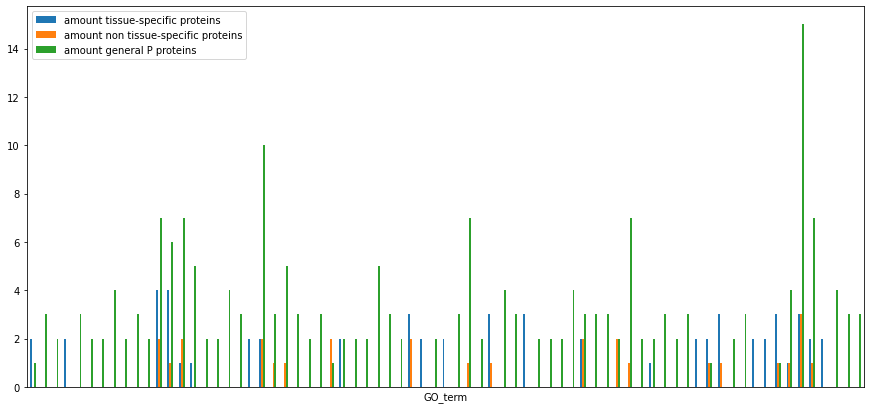

In [75]:
df_count_all_tspec_dental_plaque = []
df_count_all_nontspec_dental_plaque = []
df_count_all_general_dental_plaque = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_dental_plaque_all[GO].sum()
        df_count_all_tspec_dental_plaque.append(count_tspec)
    else:
        df_count_all_tspec_dental_plaque.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_dental_plaque_all[GO].sum()
        df_count_all_nontspec_dental_plaque.append(count_nontspec)
    else:
         df_count_all_nontspec_dental_plaque.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_dental_plaque_all[GO].sum()
        df_count_all_general_dental_plaque.append(count_general)
    else:
        df_count_all_general_dental_plaque.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_dental_plaque_all[GO].sum()
    df_count_all_tspec_dental_plaque.append(count_tspec)
    count_nontspec = nontspec_dental_plaque_all[GO].sum()
    df_count_all_nontspec_dental_plaque.append(count_nontspec)
    count_general = generalP_dental_plaque_all[GO].sum()
    df_count_all_general_dental_plaque.append(count_general)

df_count_all_dental_plaque = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_dental_plaque2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_dental_plaque = df_count_all_dental_plaque.append(df_count_all_dental_plaque2, ignore_index=True)
df_count_all_dental_plaque["amount tissue-specific proteins"] = df_count_all_tspec_dental_plaque
df_count_all_dental_plaque["amount non tissue-specific proteins"] = df_count_all_nontspec_dental_plaque
df_count_all_dental_plaque["amount general P proteins"] = df_count_all_general_dental_plaque
df_count_all_dental_plaque[(df_count_all_dental_plaque["amount tissue-specific proteins"]>1)|(df_count_all_dental_plaque["amount non tissue-specific proteins"]>1)
       |(df_count_all_dental_plaque["amount general P proteins"]>1)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_dental_plaque[(df_count_all_dental_plaque["amount tissue-specific proteins"]>1)|(df_count_all_dental_plaque["amount non tissue-specific proteins"]>1)
       |(df_count_all_dental_plaque["amount general P proteins"]>1)]

### Esophagus

51


<Figure size 1080x504 with 0 Axes>

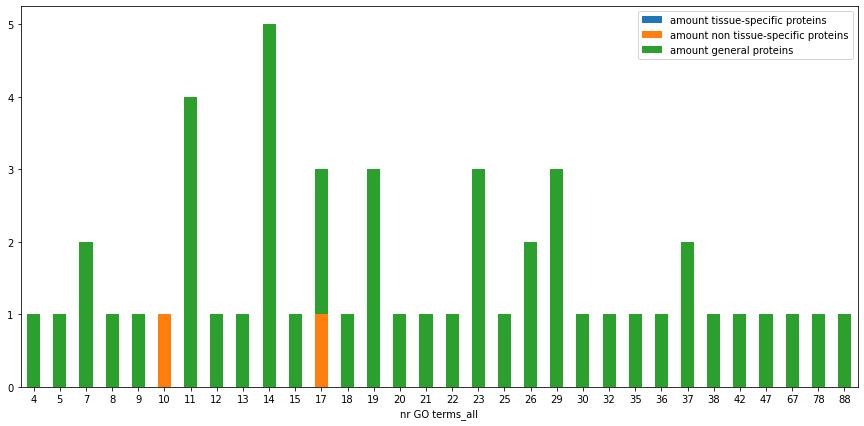

amount tissue-specific proteins  nr GO terms_all  \
2                               NaN                4   
3                               NaN                5   
4                               NaN                7   
5                               NaN                8   
6                               NaN                9   
0                               NaN               10   
7                               NaN               11   
8                               NaN               12   
9                               NaN               13   
10                              NaN               14   
11                              NaN               15   
1                               NaN               17   
12                              NaN               18   
13                              NaN               19   
14                              NaN               20   
15                              NaN               21   
16                              NaN               22   
17                              NaN               23   
18                              NaN               25   
19                              NaN               26   
20                              NaN               29   
21                              NaN               30   
22                              NaN               32   
23                              NaN               35   
24                              NaN               36   
25                              NaN               37   
26                              NaN               38   
27                              NaN               42   
28                              NaN               47   
29                              NaN               67   
30                              NaN               78   
31                              NaN               88   

    amount non tissue-specific proteins  amount general proteins  Total  
2                                   NaN                      1.0    1.0  
3                                   NaN                      1.0    1.0  
4                                   NaN                      2.0    2.0  
5                                   NaN                      1.0    1.0  
6                                   NaN                      1.0    1.0  
0                                   1.0                      NaN    1.0  
7                                   NaN                      4.0    4.0  
8                                   NaN                      1.0    1.0  
9                                   NaN                      1.0    1.0  
10                                  NaN                      5.0    5.0  
11                                  NaN                      1.0    1.0  
1                                   1.0                      2.0    3.0  
12                                  NaN                      1.0    1.0  
13                                  NaN                      3.0    3.0  
14                                  NaN                      1.0    1.0  
15                                  NaN                      1.0    1.0  
16                                  NaN                      1.0    1.0  
17                                  NaN                      3.0    3.0  
18                                  NaN                      1.0    1.0  
19                                  NaN                      2.0    2.0  
20                                  NaN                      3.0    3.0  
21                                  NaN                      1.0    1.0  
22                                  NaN                      1.0    1.0  
23                                  NaN                      1.0    1.0  
24                                  NaN                      1.0    1.0  
25                                  NaN                      2.0    2.0  
26                                  NaN                      1.0    1.0  
27                                  NaN                      1.0    1.0  
28       

In [76]:
print(data_protein[data_protein["Esophagus"]==1].shape[0])
tspec_esophagus_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Esophagus"]==1]
nontspec_esophagus_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Esophagus"]==1]
generalP_esophagus_all = general_P_prot_GO_all[general_P_prot_GO_all["Esophagus"]==1]
grouped_tspec_esophagus = tspec_esophagus_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_esophagus = nontspec_esophagus_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_esophagus = generalP_esophagus_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_esophagus_all1 = pd.merge(grouped_tspec_esophagus, grouped_nontspec_esophagus, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_esophagus_all = pd.merge(grouped_esophagus_all1, grouped_general_esophagus, how="outer", on=["nr GO terms_all"])
grouped_esophagus_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_esophagus_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_esophagus_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_esophagus_all["Total"] = grouped_esophagus_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_esophagus_all


GO_term  amount tissue-specific proteins  \
39     GO:0000122                                0   
76     GO:0000226                                0   
93     GO:0000287                                0   
128    GO:0000398                                0   
198    GO:0000785                                0   
...           ...                              ...   
11055  GO:1901621                                0   
11598  GO:1904115                                0   
12161  GO:1990904                                0   
12432  GO:2000774                                0   
12476  GO:2001022                                0   

       amount non tissue-specific proteins  amount general P proteins  
39                                       0                          2  
76                                       0                          2  
93                                       0                          2  
128                                      0                          3  
198                                      0                          2  
...                                    ...                        ...  
11055                                    0                          2  
11598                                    0                          2  
12161                                    1                          4  
12432                                    0                          2  
12476                                    0                          2  

[189 rows x 4 columns]

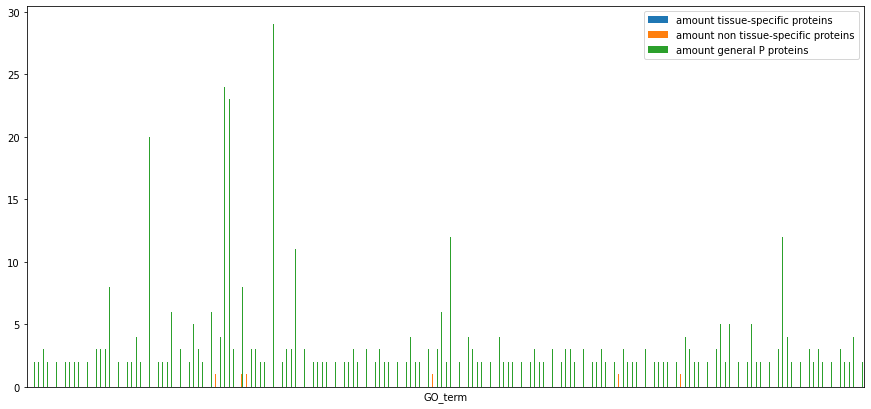

In [77]:
df_count_all_tspec_esophagus = []
df_count_all_nontspec_esophagus = []
df_count_all_general_esophagus = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_esophagus_all[GO].sum()
        df_count_all_tspec_esophagus.append(count_tspec)
    else:
        df_count_all_tspec_esophagus.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_esophagus_all[GO].sum()
        df_count_all_nontspec_esophagus.append(count_nontspec)
    else:
         df_count_all_nontspec_esophagus.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_esophagus_all[GO].sum()
        df_count_all_general_esophagus.append(count_general)
    else:
        df_count_all_general_esophagus.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_esophagus_all[GO].sum()
    df_count_all_tspec_esophagus.append(count_tspec)
    count_nontspec = nontspec_esophagus_all[GO].sum()
    df_count_all_nontspec_esophagus.append(count_nontspec)
    count_general = generalP_esophagus_all[GO].sum()
    df_count_all_general_esophagus.append(count_general)

df_count_all_esophagus = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_esophagus2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_esophagus = df_count_all_esophagus.append(df_count_all_esophagus2, ignore_index=True)
df_count_all_esophagus["amount tissue-specific proteins"] = df_count_all_tspec_esophagus
df_count_all_esophagus["amount non tissue-specific proteins"] = df_count_all_nontspec_esophagus
df_count_all_esophagus["amount general P proteins"] = df_count_all_general_esophagus
df_count_all_esophagus[(df_count_all_esophagus["amount tissue-specific proteins"]>1)|(df_count_all_esophagus["amount non tissue-specific proteins"]>1)
       |(df_count_all_esophagus["amount general P proteins"]>1)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_esophagus[(df_count_all_esophagus["amount tissue-specific proteins"]>1)|(df_count_all_esophagus["amount non tissue-specific proteins"]>1)
       |(df_count_all_esophagus["amount general P proteins"]>1)]


### Eye

17


<Figure size 1080x504 with 0 Axes>

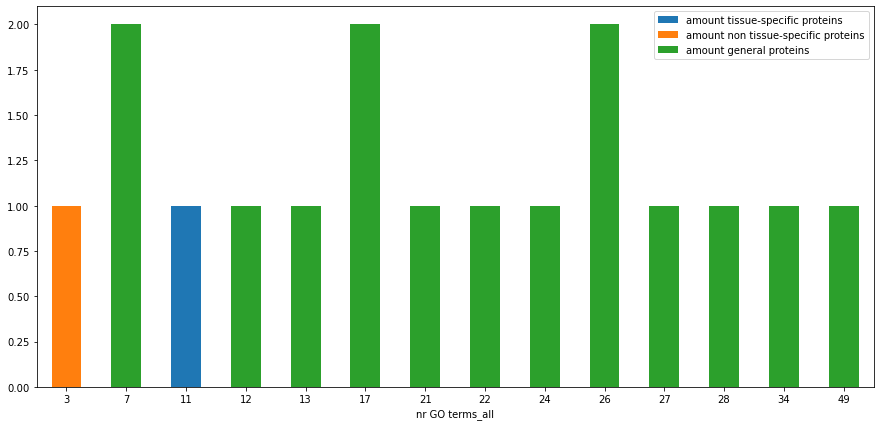

nr GO terms_all  amount tissue-specific proteins  \
1                 3                              NaN   
2                 7                              NaN   
0                11                              1.0   
3                12                              NaN   
4                13                              NaN   
5                17                              NaN   
6                21                              NaN   
7                22                              NaN   
8                24                              NaN   
9                26                              NaN   
10               27                              NaN   
11               28                              NaN   
12               34                              NaN   
13               49                              NaN   

    amount non tissue-specific proteins  amount general proteins  Total  
1                                   1.0                      NaN    1.0  
2                                   NaN                      2.0    2.0  
0                                   NaN                      NaN    1.0  
3                                   NaN                      1.0    1.0  
4                                   NaN                      1.0    1.0  
5                                   NaN                      2.0    2.0  
6                                   NaN                      1.0    1.0  
7                                   NaN                      1.0    1.0  
8                                   NaN                      1.0    1.0  
9                                   NaN                      2.0    2.0  
10                                  NaN                      1.0    1.0  
11                                  NaN                      1.0    1.0  
12                                  NaN                      1.0    1.0  
13                                  NaN                      1.0    1.0

In [78]:
print(data_protein[data_protein["Eye"]==1].shape[0])
tspec_eye_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Eye"]==1]
nontspec_eye_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Eye"]==1]
generalP_eye_all = general_P_prot_GO_all[general_P_prot_GO_all["Eye"]==1]
grouped_tspec_eye = tspec_eye_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_eye = nontspec_eye_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_eye = generalP_eye_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_eye_all1 = pd.merge(grouped_tspec_eye, grouped_nontspec_eye, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_eye_all = pd.merge(grouped_eye_all1, grouped_general_eye, how="outer", on=["nr GO terms_all"])
grouped_eye_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_eye_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_eye_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_eye_all["Total"] = grouped_eye_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_eye_all

GO_term  amount tissue-specific proteins  \
462   GO:0001895                                0   
708   GO:0002576                                0   
770   GO:0002862                                0   
947   GO:0003823                                0   
1426  GO:0005200                                0   
1518  GO:0005576                                1   
1539  GO:0005615                                1   
1541  GO:0005634                                0   
1583  GO:0005737                                0   
1619  GO:0005788                                0   
1639  GO:0005829                                0   
1672  GO:0005882                                0   
1676  GO:0005886                                0   
2153  GO:0006898                                0   
2160  GO:0006910                                0   
2161  GO:0006911                                0   
2181  GO:0006955                                0   
2182  GO:0006956                                0   
2184  GO:0006958                                0   
2519  GO:0008228                                0   
2801  GO:0009897                                0   
2818  GO:0009986                                0   
3395  GO:0016020                                0   
3711  GO:0018149                                0   
4331  GO:0030449                                0   
4655  GO:0031424                                0   
5690  GO:0034987                                0   
6164  GO:0038095                                0   
6165  GO:0038096                                0   
6383  GO:0042571                                0   
6437  GO:0042742                                0   
6772  GO:0043687                                0   
6846  GO:0044267                                0   
6977  GO:0045087                                0   
6980  GO:0045095                                0   
7925  GO:0050776                                0   
7963  GO:0050853                                0   
7977  GO:0050871                                0   
7990  GO:0050900                                0   
9064  GO:0070062                                0   
9141  GO:0070268                                0   
9834  GO:0072562                                0   

      amount non tissue-specific proteins  amount general P proteins  
462                                     0                          3  
708                                     0                          2  
770                                     0                          7  
947                                     0                          8  
1426                                    0                          2  
1518                                    0                         10  
1539                                    0                         11  
1541                                    0                          3  
1583                                    1                          2  
1619                                    0                          3  
1639                                    0                          4  
1672                                    0                          2  
1676                                    0                          6  
2153                                    0                          6  
2160                                    0                          8  
2161                                    0                          8  
2181                                    0                          2  
2182                                    0                          7  
2184                                    0                          8  
2519                                    0                          7  
2801                                    0                          8  
2818                                    0                          2  
3395                                    0                          2  
3711                     

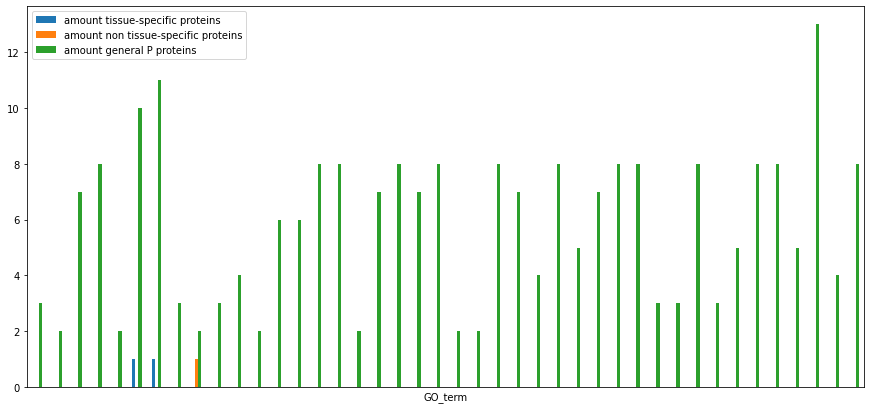

In [79]:
df_count_all_tspec_eye = []
df_count_all_nontspec_eye = []
df_count_all_general_eye = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_eye_all[GO].sum()
        df_count_all_tspec_eye.append(count_tspec)
    else:
        df_count_all_tspec_eye.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_eye_all[GO].sum()
        df_count_all_nontspec_eye.append(count_nontspec)
    else:
         df_count_all_nontspec_eye.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_eye_all[GO].sum()
        df_count_all_general_eye.append(count_general)
    else:
        df_count_all_general_eye.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_eye_all[GO].sum()
    df_count_all_tspec_eye.append(count_tspec)
    count_nontspec = nontspec_eye_all[GO].sum()
    df_count_all_nontspec_eye.append(count_nontspec)
    count_general = generalP_eye_all[GO].sum()
    df_count_all_general_eye.append(count_general)

df_count_all_eye = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_eye2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_eye = df_count_all_eye.append(df_count_all_eye2, ignore_index=True)
df_count_all_eye["amount tissue-specific proteins"] = df_count_all_tspec_eye
df_count_all_eye["amount non tissue-specific proteins"] = df_count_all_nontspec_eye
df_count_all_eye["amount general P proteins"] = df_count_all_general_eye
df_count_all_eye[(df_count_all_eye["amount tissue-specific proteins"]>1)|(df_count_all_eye["amount non tissue-specific proteins"]>1)
       |(df_count_all_eye["amount general P proteins"]>1)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_eye[(df_count_all_eye["amount tissue-specific proteins"]>1)|(df_count_all_eye["amount non tissue-specific proteins"]>1)
       |(df_count_all_eye["amount general P proteins"]>1)]


### Follicular fluid

In [80]:
print(data_protein[data_protein["Follicular fluid"]==1].shape[0])
data_protein[data_protein["Follicular fluid"]==1]
#t_spec_prot_GO_all[t_spec_prot_GO_all["Follicular fluid"]==1]
#non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Follicular fluid"]==1]
#general_P_prot_GO_all[general_P_prot_GO_all["Follicular fluid"]==1]
#and it seems to be the one we don't have annotation for

1


ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
2046  P59535               0        0      1     0      0       0   

      Cerebrospinal fluid  Cervix  Colon  ...  Small intestine  \
2046                    0       0      0  ...                0   

      Synovial tissue  T-cells  Testis  Tooth  Umbilical cord  Ureter  \
2046                0        0       0      0               0       0   

      Urinary bladder  Urine  Total  
2046                0      0      2  

[1 rows x 43 columns]

In [81]:
#https://www.uniprot.org/uniprot/P59535
#It's a taste receptor?

### Heart

89


<Figure size 1080x504 with 0 Axes>

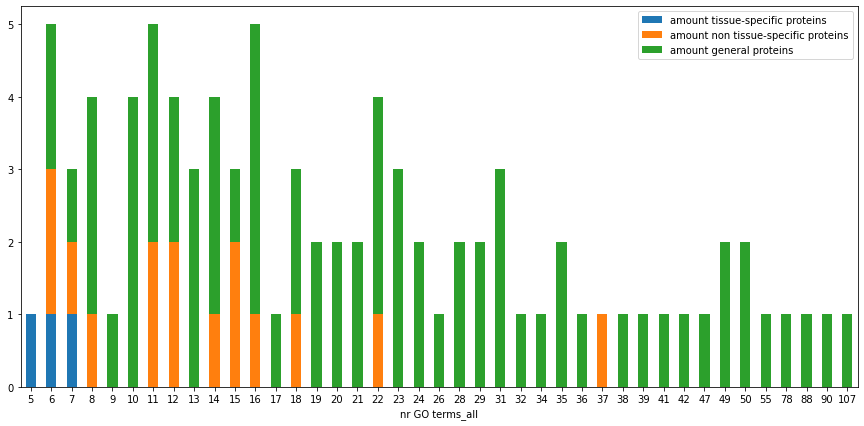

nr GO terms_all  amount tissue-specific proteins  \
0                 5                              1.0   
1                 6                              1.0   
2                 7                              1.0   
3                 8                              NaN   
12                9                              NaN   
13               10                              NaN   
4                11                              NaN   
5                12                              NaN   
14               13                              NaN   
6                14                              NaN   
7                15                              NaN   
8                16                              NaN   
15               17                              NaN   
9                18                              NaN   
16               19                              NaN   
17               20                              NaN   
18               21                              NaN   
10               22                              NaN   
19               23                              NaN   
20               24                              NaN   
21               26                              NaN   
22               28                              NaN   
23               29                              NaN   
24               31                              NaN   
25               32                              NaN   
26               34                              NaN   
27               35                              NaN   
28               36                              NaN   
11               37                              NaN   
29               38                              NaN   
30               39                              NaN   
31               41                              NaN   
32               42                              NaN   
33               47                              NaN   
34               49                              NaN   
35               50                              NaN   
36               55                              NaN   
37               78                              NaN   
38               88                              NaN   
39               90                              NaN   
40              107                              NaN   

    amount non tissue-specific proteins  amount general proteins  Total  
0                                   NaN                      NaN    1.0  
1                                   2.0                      2.0    5.0  
2                                   1.0                      1.0    3.0  
3                                   1.0                      3.0    4.0  
12                                  NaN                      1.0    1.0  
13                                  NaN                      4.0    4.0  
4                                   2.0                      3.0    5.0  
5                                   2.0                      2.0    4.0  
14                                  NaN                      3.0    3.0  
6                                   1.0                      3.0    4.0  
7                                   2.0                      1.0    3.0  
8                                   1.0                      4.0    5.0  
15                                  NaN                      1.0    1.0  
9                                   1.0                      2.0    3.0  
16                                  NaN                      2.0    2.0  
17                                  NaN                      2.0    2.0  
18                                  NaN                      2.0    2.0  
10                                  1.0                      3.0    4.0  
19                                  NaN                      3.0    3.0  
20                                  NaN                      2.0    2.0  
21                                  NaN                      1.0    1.0  
22                     

In [82]:
print(data_protein[data_protein["Heart"]==1].shape[0])
tspec_heart_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Heart"]==1]
nontspec_heart_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Heart"]==1]
generalP_heart_all = general_P_prot_GO_all[general_P_prot_GO_all["Heart"]==1]
grouped_tspec_heart = tspec_heart_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_heart = nontspec_heart_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_heart = generalP_heart_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_heart_all1 = pd.merge(grouped_tspec_heart, grouped_nontspec_heart, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_heart_all = pd.merge(grouped_heart_all1, grouped_general_heart, how="outer", on=["nr GO terms_all"])
grouped_heart_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_heart_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_heart_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_heart_all["Total"] = grouped_heart_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_heart_all


GO_term  amount tissue-specific proteins  \
39     GO:0000122                                0   
91     GO:0000281                                0   
93     GO:0000287                                0   
198    GO:0000785                                0   
307    GO:0001525                                0   
...           ...                              ...   
11751  GO:1904813                                0   
12082  GO:1990544                                0   
12161  GO:1990904                                0   
12225  GO:2000147                                0   
12387  GO:2000643                                0   

       amount non tissue-specific proteins  amount general P proteins  
39                                       1                          2  
91                                       0                          2  
93                                       1                          4  
198                                      0                          2  
307                                      0                          2  
...                                    ...                        ...  
11751                                    0                          5  
12082                                    0                          2  
12161                                    0                          3  
12225                                    0                          2  
12387                                    0                          2  

[298 rows x 4 columns]

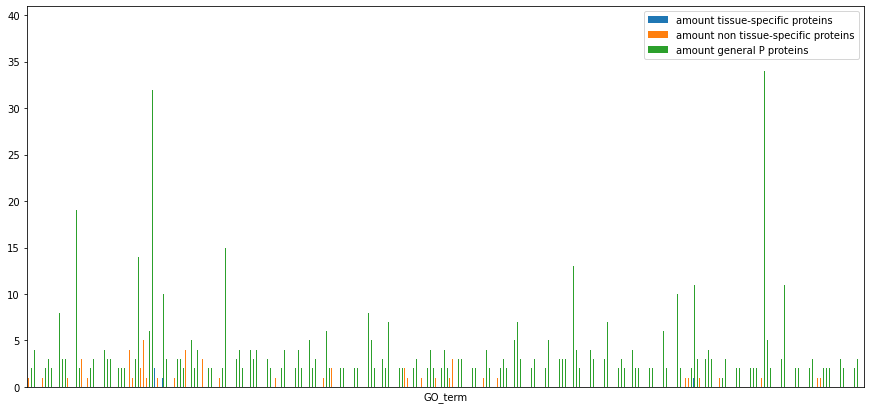

In [83]:
df_count_all_tspec_heart = []
df_count_all_nontspec_heart = []
df_count_all_general_heart = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_heart_all[GO].sum()
        df_count_all_tspec_heart.append(count_tspec)
    else:
        df_count_all_tspec_heart.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_heart_all[GO].sum()
        df_count_all_nontspec_heart.append(count_nontspec)
    else:
         df_count_all_nontspec_heart.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_heart_all[GO].sum()
        df_count_all_general_heart.append(count_general)
    else:
        df_count_all_general_heart.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_heart_all[GO].sum()
    df_count_all_tspec_heart.append(count_tspec)
    count_nontspec = nontspec_heart_all[GO].sum()
    df_count_all_nontspec_heart.append(count_nontspec)
    count_general = generalP_heart_all[GO].sum()
    df_count_all_general_heart.append(count_general)

df_count_all_heart = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_heart2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_heart = df_count_all_heart.append(df_count_all_heart2, ignore_index=True)
df_count_all_heart["amount tissue-specific proteins"] = df_count_all_tspec_heart
df_count_all_heart["amount non tissue-specific proteins"] = df_count_all_nontspec_heart
df_count_all_heart["amount general P proteins"] = df_count_all_general_heart
df_count_all_heart[(df_count_all_heart["amount tissue-specific proteins"]>1)|(df_count_all_heart["amount non tissue-specific proteins"]>1)
       |(df_count_all_heart["amount general P proteins"]>1)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_heart[(df_count_all_heart["amount tissue-specific proteins"]>1)|(df_count_all_heart["amount non tissue-specific proteins"]>1)
       |(df_count_all_heart["amount general P proteins"]>1)]


### HeLa

66


<Figure size 1080x504 with 0 Axes>

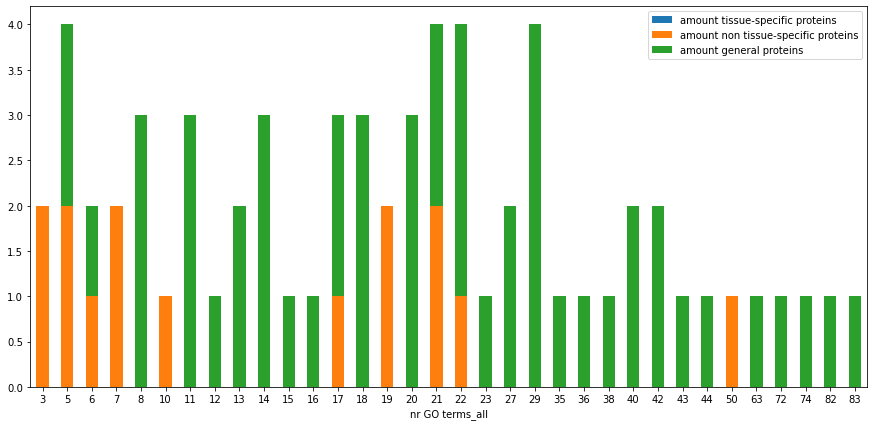

amount tissue-specific proteins  nr GO terms_all  \
0                               NaN                3   
1                               NaN                5   
2                               NaN                6   
3                               NaN                7   
10                              NaN                8   
4                               NaN               10   
11                              NaN               11   
12                              NaN               12   
13                              NaN               13   
14                              NaN               14   
15                              NaN               15   
16                              NaN               16   
5                               NaN               17   
17                              NaN               18   
6                               NaN               19   
18                              NaN               20   
7                               NaN               21   
8                               NaN               22   
19                              NaN               23   
20                              NaN               27   
21                              NaN               29   
22                              NaN               35   
23                              NaN               36   
24                              NaN               38   
25                              NaN               40   
26                              NaN               42   
27                              NaN               43   
28                              NaN               44   
9                               NaN               50   
29                              NaN               63   
30                              NaN               72   
31                              NaN               74   
32                              NaN               82   
33                              NaN               83   

    amount non tissue-specific proteins  amount general proteins  Total  
0                                   2.0                      NaN    2.0  
1                                   2.0                      2.0    4.0  
2                                   1.0                      1.0    2.0  
3                                   2.0                      NaN    2.0  
10                                  NaN                      3.0    3.0  
4                                   1.0                      NaN    1.0  
11                                  NaN                      3.0    3.0  
12                                  NaN                      1.0    1.0  
13                                  NaN                      2.0    2.0  
14                                  NaN                      3.0    3.0  
15                                  NaN                      1.0    1.0  
16                                  NaN                      1.0    1.0  
5                                   1.0                      2.0    3.0  
17                                  NaN                      3.0    3.0  
6                                   2.0                      NaN    2.0  
18                                  NaN                      3.0    3.0  
7                                   2.0                      2.0    4.0  
8                                   1.0                      3.0    4.0  
19                                  NaN                      1.0    1.0  
20                                  NaN                      2.0    2.0  
21                                  NaN                      4.0    4.0  
22                                  NaN                      1.0    1.0  
23                                  NaN                      1.0    1.0  
24                                  NaN                      1.0    1.0  
25                                  NaN                      2.0    2.0  
26                                  NaN                      2.0    2.0  
27                                  NaN      

In [84]:
print(data_protein[data_protein["Hela"]==1].shape[0])
tspec_Hela_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Hela"]==1]
nontspec_Hela_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Hela"]==1]
generalP_Hela_all = general_P_prot_GO_all[general_P_prot_GO_all["Hela"]==1]
grouped_tspec_Hela = tspec_Hela_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_Hela = nontspec_Hela_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_Hela = generalP_Hela_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_Hela_all1 = pd.merge(grouped_tspec_Hela, grouped_nontspec_Hela, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_Hela_all = pd.merge(grouped_Hela_all1, grouped_general_Hela, how="outer", on=["nr GO terms_all"])
grouped_Hela_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_Hela_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_Hela_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_Hela_all["Total"] = grouped_Hela_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_Hela_all

GO_term  amount tissue-specific proteins  \
9      GO:0000027                                0   
30     GO:0000086                                0   
37     GO:0000118                                0   
39     GO:0000122                                0   
48     GO:0000139                                0   
...           ...                              ...   
11208  GO:1902494                                0   
12151  GO:1990841                                0   
12161  GO:1990904                                0   
12259  GO:2000273                                0   
12271  GO:2000300                                0   

       amount non tissue-specific proteins  amount general P proteins  
9                                        0                          2  
30                                       0                          2  
37                                       0                          2  
39                                       0                          3  
48                                       0                          2  
...                                    ...                        ...  
11208                                    0                          3  
12151                                    0                          2  
12161                                    1                          5  
12259                                    0                          2  
12271                                    0                          2  

[241 rows x 4 columns]

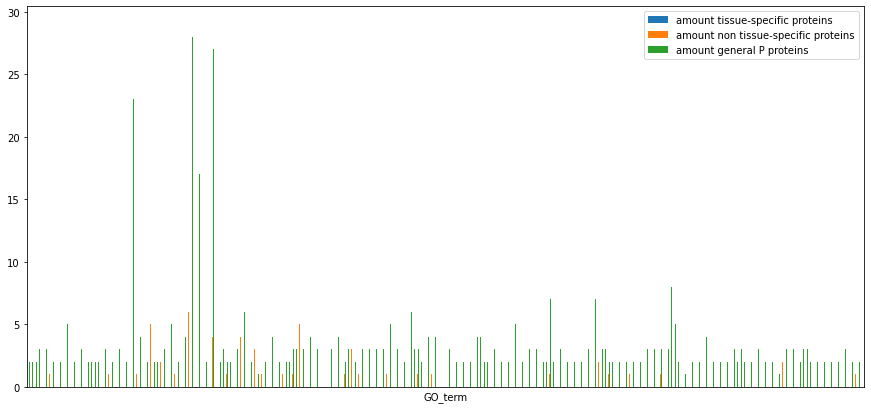

In [85]:
df_count_all_tspec_Hela = []
df_count_all_nontspec_Hela = []
df_count_all_general_Hela = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_Hela_all[GO].sum()
        df_count_all_tspec_Hela.append(count_tspec)
    else:
        df_count_all_tspec_Hela.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_Hela_all[GO].sum()
        df_count_all_nontspec_Hela.append(count_nontspec)
    else:
         df_count_all_nontspec_Hela.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_Hela_all[GO].sum()
        df_count_all_general_Hela.append(count_general)
    else:
        df_count_all_general_Hela.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_Hela_all[GO].sum()
    df_count_all_tspec_Hela.append(0)
    count_nontspec = nontspec_Hela_all[GO].sum()
    df_count_all_nontspec_Hela.append(count_nontspec)
    count_general = generalP_Hela_all[GO].sum()
    df_count_all_general_Hela.append(count_general)

df_count_all_Hela = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_Hela2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_Hela = df_count_all_Hela.append(df_count_all_Hela2, ignore_index=True)
df_count_all_Hela["amount tissue-specific proteins"] = df_count_all_tspec_Hela
df_count_all_Hela["amount non tissue-specific proteins"] = df_count_all_nontspec_Hela
df_count_all_Hela["amount general P proteins"] = df_count_all_general_Hela
df_count_all_Hela[(df_count_all_Hela["amount tissue-specific proteins"]>1)|(df_count_all_Hela["amount non tissue-specific proteins"]>1)
       |(df_count_all_Hela["amount general P proteins"]>1)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_Hela[(df_count_all_Hela["amount tissue-specific proteins"]>1)|(df_count_all_Hela["amount non tissue-specific proteins"]>1)
       |(df_count_all_Hela["amount general P proteins"]>1)]


### Kidney

592


<Figure size 1080x504 with 0 Axes>

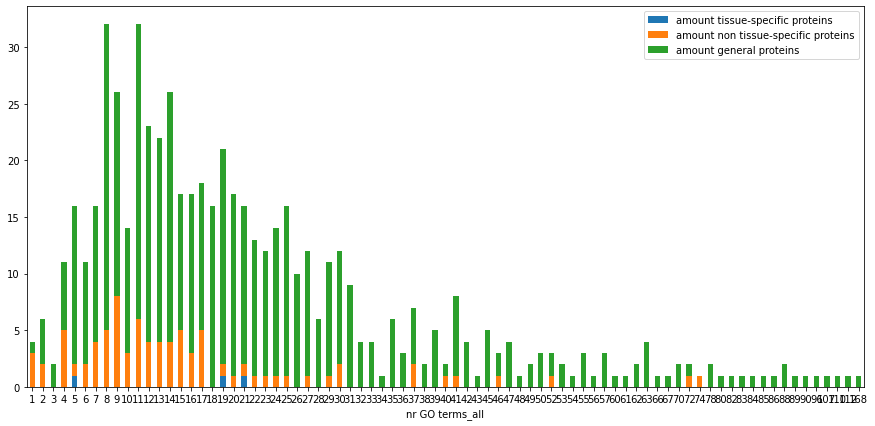

nr GO terms_all  amount tissue-specific proteins  \
3                 1                              NaN   
4                 2                              NaN   
33                3                              NaN   
5                 4                              NaN   
0                 5                              1.0   
..              ...                              ...   
74               96                              NaN   
75              107                              NaN   
76              110                              NaN   
77              112                              NaN   
78              168                              NaN   

    amount non tissue-specific proteins  amount general proteins  Total  
3                                   3.0                      1.0    4.0  
4                                   2.0                      4.0    6.0  
33                                  NaN                      2.0    2.0  
5                                   5.0                      6.0   11.0  
0                                   1.0                     14.0   16.0  
..                                  ...                      ...    ...  
74                                  NaN                      1.0    1.0  
75                                  NaN                      1.0    1.0  
76                                  NaN                      1.0    1.0  
77                                  NaN                      1.0    1.0  
78                                  NaN                      1.0    1.0  

[79 rows x 5 columns]

In [86]:
print(data_protein[data_protein["Kidney"]==1].shape[0])
tspec_Kidney_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Kidney"]==1]
nontspec_Kidney_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Kidney"]==1]
generalP_Kidney_all = general_P_prot_GO_all[general_P_prot_GO_all["Kidney"]==1]
grouped_tspec_Kidney = tspec_Kidney_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_Kidney = nontspec_Kidney_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_Kidney = generalP_Kidney_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_Kidney_all1 = pd.merge(grouped_tspec_Kidney, grouped_nontspec_Kidney, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_Kidney_all = pd.merge(grouped_Kidney_all1, grouped_general_Kidney, how="outer", on=["nr GO terms_all"])
grouped_Kidney_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_Kidney_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_Kidney_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_Kidney_all["Total"] = grouped_Kidney_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_Kidney_all

GO_term  amount tissue-specific proteins  \
16     GO:0000049                                0   
30     GO:0000086                                0   
39     GO:0000122                                0   
48     GO:0000139                                0   
56     GO:0000165                                0   
...           ...                              ...   
10695  GO:0106310                                0   
10696  GO:0106311                                0   
10885  GO:1900034                                0   
11751  GO:1904813                                0   
12161  GO:1990904                                0   

       amount non tissue-specific proteins  amount general P proteins  
16                                       0                          7  
30                                       0                         14  
39                                       2                         28  
48                                       3                          9  
56                                       1                         16  
...                                    ...                        ...  
10695                                    1                         27  
10696                                    1                         27  
10885                                    0                         10  
11751                                    0                         18  
12161                                    1                         30  

[310 rows x 4 columns]

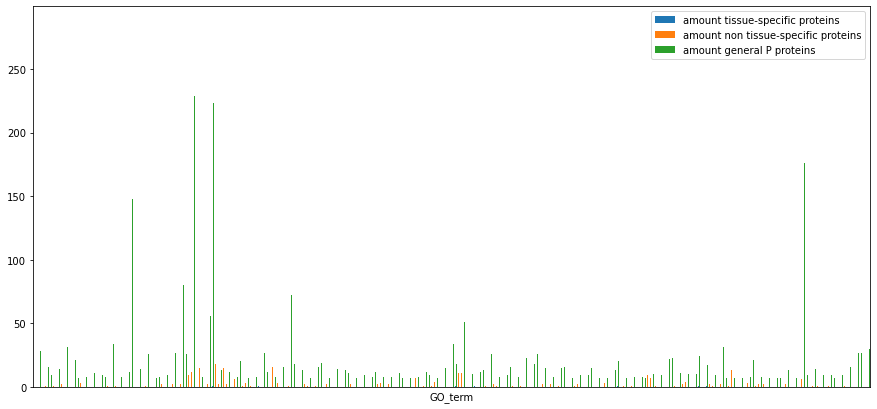

In [87]:
df_count_all_tspec_Kidney = []
df_count_all_nontspec_Kidney = []
df_count_all_general_Kidney = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_Kidney_all[GO].sum()
        df_count_all_tspec_Kidney.append(count_tspec)
    else:
        df_count_all_tspec_Kidney.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_Kidney_all[GO].sum()
        df_count_all_nontspec_Kidney.append(count_nontspec)
    else:
         df_count_all_nontspec_Kidney.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_Kidney_all[GO].sum()
        df_count_all_general_Kidney.append(count_general)
    else:
        df_count_all_general_Kidney.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_Kidney_all[GO].sum()
    df_count_all_tspec_Kidney.append(count_tspec)
    count_nontspec = nontspec_Kidney_all[GO].sum()
    df_count_all_nontspec_Kidney.append(count_nontspec)
    count_general = generalP_Kidney_all[GO].sum()
    df_count_all_general_Kidney.append(count_general)

df_count_all_Kidney = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_Kidney2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_Kidney = df_count_all_Kidney.append(df_count_all_Kidney2, ignore_index=True)
df_count_all_Kidney["amount tissue-specific proteins"] = df_count_all_tspec_Kidney
df_count_all_Kidney["amount non tissue-specific proteins"] = df_count_all_nontspec_Kidney
df_count_all_Kidney["amount general P proteins"] = df_count_all_general_Kidney
df_count_all_Kidney[(df_count_all_Kidney["amount tissue-specific proteins"]>=7)|(df_count_all_Kidney["amount non tissue-specific proteins"]>=7)
       |(df_count_all_Kidney["amount general P proteins"]>=7)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_Kidney[(df_count_all_Kidney["amount tissue-specific proteins"]>=7)|(df_count_all_Kidney["amount non tissue-specific proteins"]>=7)
       |(df_count_all_Kidney["amount general P proteins"]>=7)]


### Liver

In [88]:
print(data_protein[data_protein["Liver"]==1].shape[0])
tspec_Liver_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Liver"]==1]
nontspec_Liver_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Liver"]==1]
generalP_Liver_all = general_P_prot_GO_all[general_P_prot_GO_all["Liver"]==1]
grouped_tspec_Liver = tspec_Liver_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_Liver = nontspec_Liver_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_Liver = generalP_Liver_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_Liver_all1 = pd.merge(grouped_tspec_Liver, grouped_nontspec_Liver, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_Liver_all = pd.merge(grouped_Liver_all1, grouped_general_Liver, how="outer", on=["nr GO terms_all"])
grouped_Liver_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_Liver_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_Liver_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_Liver_all["Total"] = grouped_Liver_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_Liver_all

1659


<Figure size 1080x504 with 0 Axes>

nr GO terms_all  amount tissue-specific proteins  \
0                  1                              1.0   
1                  2                              1.0   
2                  3                              1.0   
3                  4                              2.0   
4                  5                              1.0   
..               ...                              ...   
54               140                              NaN   
99               141                              NaN   
55               168                              NaN   
56               178                              NaN   
100              185                              NaN   

     amount non tissue-specific proteins  amount general proteins  Total  
0                                    4.0                     17.0   22.0  
1                                    3.0                     19.0   23.0  
2                                    2.0                     11.0   14.0  
3                                   11.0                     41.0   54.0  
4                                    8.0                     34.0   43.0  
..                                   ...                      ...    ...  
54                                   1.0                      NaN    1.0  
99                                   NaN                      1.0    1.0  
55                                   1.0                      1.0    2.0  
56                                   1.0                      NaN    1.0  
100                                  NaN                      1.0    1.0  

[101 rows x 5 columns]

In [89]:
df_count_all_tspec_Liver = []
df_count_all_nontspec_Liver = []
df_count_all_general_Liver = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_Liver_all[GO].sum()
        df_count_all_tspec_Liver.append(count_tspec)
    else:
        df_count_all_tspec_Liver.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_Liver_all[GO].sum()
        df_count_all_nontspec_Liver.append(count_nontspec)
    else:
         df_count_all_nontspec_Liver.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_Liver_all[GO].sum()
        df_count_all_general_Liver.append(count_general)
    else:
        df_count_all_general_Liver.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_Liver_all[GO].sum()
    df_count_all_tspec_Liver.append(count_tspec)
    count_nontspec = nontspec_Liver_all[GO].sum()
    df_count_all_nontspec_Liver.append(count_nontspec)
    count_general = generalP_Liver_all[GO].sum()
    df_count_all_general_Liver.append(count_general)

df_count_all_Liver = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_Liver2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_Liver = df_count_all_Liver.append(df_count_all_Liver2, ignore_index=True)
df_count_all_Liver["amount tissue-specific proteins"] = df_count_all_tspec_Liver
df_count_all_Liver["amount non tissue-specific proteins"] = df_count_all_nontspec_Liver
df_count_all_Liver["amount general P proteins"] = df_count_all_general_Liver
df_count_all_Liver[(df_count_all_Liver["amount tissue-specific proteins"]>=20)|(df_count_all_Liver["amount non tissue-specific proteins"]>=20)
       |(df_count_all_Liver["amount general P proteins"]>=20)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_Liver[(df_count_all_Liver["amount tissue-specific proteins"]>=20)|(df_count_all_Liver["amount non tissue-specific proteins"]>=20)
       |(df_count_all_Liver["amount general P proteins"]>=20)]


GO_term  amount tissue-specific proteins  \
30     GO:0000086                                1   
39     GO:0000122                                0   
48     GO:0000139                                2   
56     GO:0000165                                0   
76     GO:0000226                                0   
...           ...                              ...   
10695  GO:0106310                                0   
10696  GO:0106311                                0   
10885  GO:1900034                                0   
11751  GO:1904813                                1   
12161  GO:1990904                                0   

       amount non tissue-specific proteins  amount general P proteins  
30                                       0                         31  
39                                      13                         60  
48                                       8                         43  
56                                       5                         46  
76                                       3                         45  
...                                    ...                        ...  
10695                                    4                         80  
10696                                    4                         80  
10885                                    1                         27  
11751                                    1                         35  
12161                                    4                         48  

[224 rows x 4 columns]

### Lung

In [90]:
print(data_protein[data_protein["Lung"]==1].shape[0])
tspec_Lung_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Lung"]==1]
nontspec_Lung_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Lung"]==1]
generalP_Lung_all = general_P_prot_GO_all[general_P_prot_GO_all["Lung"]==1]
grouped_tspec_Lung = tspec_Lung_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_Lung = nontspec_Lung_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_Lung = generalP_Lung_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_Lung_all1 = pd.merge(grouped_tspec_Lung, grouped_nontspec_Lung, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_Lung_all = pd.merge(grouped_Lung_all1, grouped_general_Lung, how="outer", on=["nr GO terms_all"])
grouped_Lung_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_Lung_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_Lung_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_Lung_all["Total"] = grouped_Lung_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_Lung_all

2028


<Figure size 1080x504 with 0 Axes>

nr GO terms_all  amount tissue-specific proteins  \
0                  1                              7.0   
1                  2                              7.0   
2                  3                              4.0   
3                  4                             11.0   
4                  5                              5.0   
..               ...                              ...   
82               140                              NaN   
106              141                              NaN   
83               143                              NaN   
84               168                              NaN   
85               178                              NaN   

     amount non tissue-specific proteins  amount general proteins  Total  
0                                   12.0                     11.0   30.0  
1                                   13.0                     10.0   30.0  
2                                   15.0                     12.0   31.0  
3                                   22.0                     25.0   58.0  
4                                   35.0                     31.0   71.0  
..                                   ...                      ...    ...  
82                                   1.0                      NaN    1.0  
106                                  NaN                      1.0    1.0  
83                                   1.0                      NaN    1.0  
84                                   1.0                      NaN    1.0  
85                                   1.0                      NaN    1.0  

[107 rows x 5 columns]

In [91]:
df_count_all_tspec_Lung = []
df_count_all_nontspec_Lung = []
df_count_all_general_Lung = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_Lung_all[GO].sum()
        df_count_all_tspec_Lung.append(count_tspec)
    else:
        df_count_all_tspec_Lung.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_Lung_all[GO].sum()
        df_count_all_nontspec_Lung.append(count_nontspec)
    else:
         df_count_all_nontspec_Lung.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_Lung_all[GO].sum()
        df_count_all_general_Lung.append(count_general)
    else:
        df_count_all_general_Lung.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_Lung_all[GO].sum()
    df_count_all_tspec_Lung.append(count_tspec)
    count_nontspec = nontspec_Lung_all[GO].sum()
    df_count_all_nontspec_Lung.append(count_nontspec)
    count_general = generalP_Lung_all[GO].sum()
    df_count_all_general_Lung.append(count_general)

df_count_all_Lung = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_Lung2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_Lung = df_count_all_Lung.append(df_count_all_Lung2, ignore_index=True)
df_count_all_Lung["amount tissue-specific proteins"] = df_count_all_tspec_Lung
df_count_all_Lung["amount non tissue-specific proteins"] = df_count_all_nontspec_Lung
df_count_all_Lung["amount general P proteins"] = df_count_all_general_Lung
df_count_all_Lung[(df_count_all_Lung["amount tissue-specific proteins"]>=10)|(df_count_all_Lung["amount non tissue-specific proteins"]>=10)
       |(df_count_all_Lung["amount general P proteins"]>=10)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_Lung[(df_count_all_Lung["amount tissue-specific proteins"]>=10)|(df_count_all_Lung["amount non tissue-specific proteins"]>=10)
       |(df_count_all_Lung["amount general P proteins"]>=10)]


GO_term  amount tissue-specific proteins  \
30     GO:0000086                                2   
39     GO:0000122                                9   
48     GO:0000139                                6   
56     GO:0000165                                7   
65     GO:0000184                                1   
...           ...                              ...   
11598  GO:1904115                                0   
11751  GO:1904813                                1   
12148  GO:1990837                                3   
12151  GO:1990841                                1   
12161  GO:1990904                                1   

       amount non tissue-specific proteins  amount general P proteins  
30                                       8                         29  
39                                      43                         66  
48                                      17                         24  
56                                      23                         32  
65                                       7                         15  
...                                    ...                        ...  
11598                                    5                         10  
11751                                    5                         23  
12148                                   16                         12  
12151                                    4                         14  
12161                                    6                         44  

[429 rows x 4 columns]

### Lymph node

In [92]:
print(data_protein[data_protein["Lymph node"]==1].shape[0])
tspec_Lymph_node_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Lymph node"]==1]
nontspec_Lymph_node_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Lymph node"]==1]
generalP_Lymph_node_all = general_P_prot_GO_all[general_P_prot_GO_all["Lymph node"]==1]
grouped_tspec_Lymph_node = tspec_Lymph_node_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_Lymph_node = nontspec_Lymph_node_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_Lymph_node = generalP_Lymph_node_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_Lymph_node_all1 = pd.merge(grouped_tspec_Lymph_node, grouped_nontspec_Lymph_node, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_Lymph_node_all = pd.merge(grouped_Lymph_node_all1, grouped_general_Lymph_node, how="outer", on=["nr GO terms_all"])
grouped_Lymph_node_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_Lymph_node_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_Lymph_node_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_Lymph_node_all["Total"] = grouped_Lymph_node_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_Lymph_node_all

2631


<Figure size 1080x504 with 0 Axes>

nr GO terms_all  amount tissue-specific proteins  \
0                  1                             13.0   
1                  2                              5.0   
2                  3                              8.0   
3                  4                              8.0   
4                  5                             20.0   
..               ...                              ...   
103              141                              NaN   
81               143                              NaN   
82               152                              NaN   
83               168                              NaN   
104              185                              NaN   

     amount non tissue-specific proteins  amount general proteins  Total  
0                                   21.0                     15.0   49.0  
1                                   20.0                     15.0   40.0  
2                                   28.0                     11.0   47.0  
3                                   37.0                     35.0   80.0  
4                                   50.0                     31.0  101.0  
..                                   ...                      ...    ...  
103                                  NaN                      1.0    1.0  
81                                   2.0                      NaN    2.0  
82                                   1.0                      NaN    1.0  
83                                   1.0                      1.0    2.0  
104                                  NaN                      1.0    1.0  

[105 rows x 5 columns]

In [93]:
df_count_all_tspec_Lymph_node = []
df_count_all_nontspec_Lymph_node = []
df_count_all_general_Lymph_node = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_Lymph_node_all[GO].sum()
        df_count_all_tspec_Lymph_node.append(count_tspec)
    else:
        df_count_all_tspec_Lymph_node.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_Lymph_node_all[GO].sum()
        df_count_all_nontspec_Lymph_node.append(count_nontspec)
    else:
         df_count_all_nontspec_Lymph_node.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_Lymph_node_all[GO].sum()
        df_count_all_general_Lymph_node.append(count_general)
    else:
        df_count_all_general_Lymph_node.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_Lymph_node_all[GO].sum()
    df_count_all_tspec_Lymph_node.append(count_tspec)
    count_nontspec = nontspec_Lymph_node_all[GO].sum()
    df_count_all_nontspec_Lymph_node.append(count_nontspec)
    count_general = generalP_Lymph_node_all[GO].sum()
    df_count_all_general_Lymph_node.append(count_general)

df_count_all_Lymph_node = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_Lymph_node2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_Lymph_node = df_count_all_Lymph_node.append(df_count_all_Lymph_node2, ignore_index=True)
df_count_all_Lymph_node["amount tissue-specific proteins"] = df_count_all_tspec_Lymph_node
df_count_all_Lymph_node["amount non tissue-specific proteins"] = df_count_all_nontspec_Lymph_node
df_count_all_Lymph_node["amount general P proteins"] = df_count_all_general_Lymph_node
df_count_all_Lymph_node[(df_count_all_Lymph_node["amount tissue-specific proteins"]>=20)|(df_count_all_Lymph_node["amount non tissue-specific proteins"]>=20)
       |(df_count_all_Lymph_node["amount general P proteins"]>=20)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_Lymph_node[(df_count_all_Lymph_node["amount tissue-specific proteins"]>=20)|(df_count_all_Lymph_node["amount non tissue-specific proteins"]>=20)
       |(df_count_all_Lymph_node["amount general P proteins"]>=20)]


GO_term  amount tissue-specific proteins  \
30     GO:0000086                                4   
39     GO:0000122                               18   
48     GO:0000139                                7   
56     GO:0000165                                5   
70     GO:0000209                                0   
...           ...                              ...   
10885  GO:1900034                                0   
11078  GO:1901796                                2   
11751  GO:1904813                                2   
12148  GO:1990837                               14   
12161  GO:1990904                                1   

       amount non tissue-specific proteins  amount general P proteins  
30                                       9                         20  
39                                      73                         82  
48                                      35                         34  
56                                      23                         37  
70                                      15                         23  
...                                    ...                        ...  
10885                                   15                         28  
11078                                   26                         17  
11751                                   10                         27  
12148                                   26                         14  
12161                                    6                         45  

[212 rows x 4 columns]

### Menstrual fluid

11


<Figure size 1080x504 with 0 Axes>

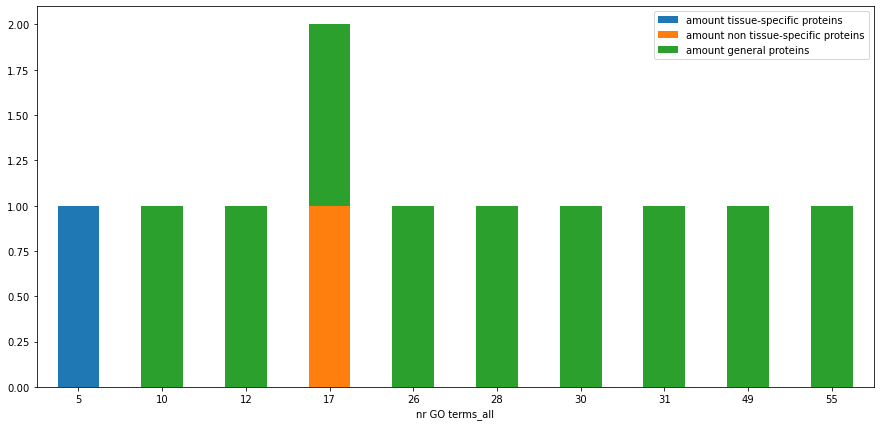

nr GO terms_all  amount tissue-specific proteins  \
0                5                              1.0   
2               10                              NaN   
3               12                              NaN   
1               17                              NaN   
4               26                              NaN   
5               28                              NaN   
6               30                              NaN   
7               31                              NaN   
8               49                              NaN   
9               55                              NaN   

   amount non tissue-specific proteins  amount general proteins  Total  
0                                  NaN                      NaN    1.0  
2                                  NaN                      1.0    1.0  
3                                  NaN                      1.0    1.0  
1                                  1.0                      1.0    2.0  
4                                  NaN                      1.0    1.0  
5                                  NaN                      1.0    1.0  
6                                  NaN                      1.0    1.0  
7                                  NaN                      1.0    1.0  
8                                  NaN                      1.0    1.0  
9                                  NaN                      1.0    1.0

In [94]:
print(data_protein[data_protein["Menstrual fluid"]==1].shape[0])
tspec_Menstrual_fluid_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Menstrual fluid"]==1]
nontspec_Menstrual_fluid_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Menstrual fluid"]==1]
generalP_Menstrual_fluid_all = general_P_prot_GO_all[general_P_prot_GO_all["Menstrual fluid"]==1]
grouped_tspec_Menstrual_fluid = tspec_Menstrual_fluid_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_Menstrual_fluid = nontspec_Menstrual_fluid_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_Menstrual_fluid = generalP_Menstrual_fluid_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_Menstrual_fluid_all1 = pd.merge(grouped_tspec_Menstrual_fluid, grouped_nontspec_Menstrual_fluid, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_Menstrual_fluid_all = pd.merge(grouped_Menstrual_fluid_all1, grouped_general_Menstrual_fluid, how="outer", on=["nr GO terms_all"])
grouped_Menstrual_fluid_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_Menstrual_fluid_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_Menstrual_fluid_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_Menstrual_fluid_all["Total"] = grouped_Menstrual_fluid_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_Menstrual_fluid_all

GO_term  amount tissue-specific proteins  \
614    GO:0002250                                1   
708    GO:0002576                                0   
1322   GO:0004866                                0   
1323   GO:0004867                                0   
1427   GO:0005201                                0   
1518   GO:0005576                                0   
1539   GO:0005615                                1   
1619   GO:0005788                                0   
1624   GO:0005794                                0   
1639   GO:0005829                                0   
1676   GO:0005886                                1   
2153   GO:0006898                                0   
2181   GO:0006955                                1   
2271   GO:0007160                                0   
2409   GO:0007596                                0   
2509   GO:0008201                                0   
2801   GO:0009897                                0   
3084   GO:0010951                                0   
4230   GO:0030198                                0   
4331   GO:0030449                                0   
4535   GO:0031093                                0   
6636   GO:0043312                                0   
6772   GO:0043687                                0   
6846   GO:0044267                                0   
6977   GO:0045087                                0   
7453   GO:0046872                                0   
9018   GO:0062023                                0   
9064   GO:0070062                                0   
9235   GO:0070527                                0   
9834   GO:0072562                                0   
11122  GO:1902042                                0   

       amount non tissue-specific proteins  amount general P proteins  
614                                      0                          2  
708                                      1                          2  
1322                                     0                          3  
1323                                     0                          2  
1427                                     0                          2  
1518                                     1                          8  
1539                                     0                          7  
1619                                     1                          5  
1624                                     0                          2  
1639                                     0                          2  
1676                                     1                          4  
2153                                     0                          2  
2181                                     0                          2  
2271                                     0                          2  
2409                                     1                          3  
2509                                     0                          2  
2801                                     0                          2  
3084                                     0                          3  
4230                                     0                          2  
4331                                     0                          2  
4535                                     1                          2  
6636                                     0                          2  
6772                                     1                          5  
6846                                     1                          5  
6977                                     0                          2  
7453                                     0                          3  
9018                                     0                          4  
9064                                     0                          8  
9235                                     0                          2  
9834                                     0                          7  
11122                                    0       

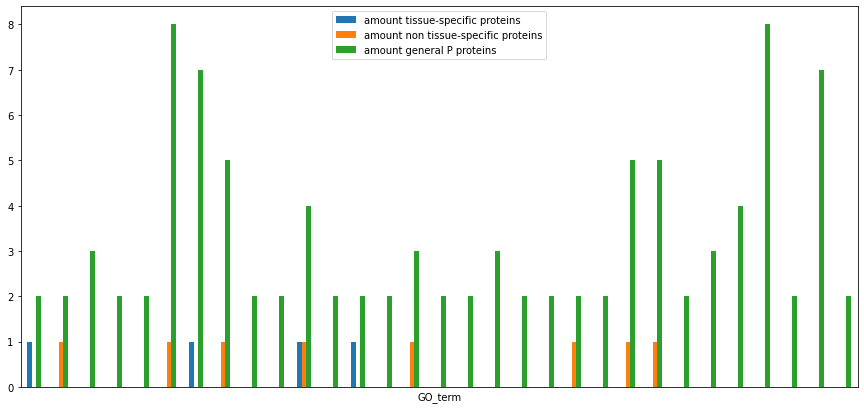

In [95]:
df_count_all_tspec_Menstrual_fluid = []
df_count_all_nontspec_Menstrual_fluid = []
df_count_all_general_Menstrual_fluid = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_Menstrual_fluid_all[GO].sum()
        df_count_all_tspec_Menstrual_fluid.append(count_tspec)
    else:
        df_count_all_tspec_Menstrual_fluid.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_Menstrual_fluid_all[GO].sum()
        df_count_all_nontspec_Menstrual_fluid.append(count_nontspec)
    else:
         df_count_all_nontspec_Menstrual_fluid.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_Menstrual_fluid_all[GO].sum()
        df_count_all_general_Menstrual_fluid.append(count_general)
    else:
        df_count_all_general_Menstrual_fluid.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_Menstrual_fluid_all[GO].sum()
    df_count_all_tspec_Menstrual_fluid.append(count_tspec)
    count_nontspec = nontspec_Menstrual_fluid_all[GO].sum()
    df_count_all_nontspec_Menstrual_fluid.append(count_nontspec)
    count_general = generalP_Menstrual_fluid_all[GO].sum()
    df_count_all_general_Menstrual_fluid.append(count_general)

df_count_all_Menstrual_fluid = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_Menstrual_fluid2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_Menstrual_fluid = df_count_all_Menstrual_fluid.append(df_count_all_Menstrual_fluid2, ignore_index=True)
df_count_all_Menstrual_fluid["amount tissue-specific proteins"] = df_count_all_tspec_Menstrual_fluid
df_count_all_Menstrual_fluid["amount non tissue-specific proteins"] = df_count_all_nontspec_Menstrual_fluid
df_count_all_Menstrual_fluid["amount general P proteins"] = df_count_all_general_Menstrual_fluid
df_count_all_Menstrual_fluid[(df_count_all_Menstrual_fluid["amount tissue-specific proteins"]>1)|(df_count_all_Menstrual_fluid["amount non tissue-specific proteins"]>1)
       |(df_count_all_Menstrual_fluid["amount general P proteins"]>1)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_Menstrual_fluid[(df_count_all_Menstrual_fluid["amount tissue-specific proteins"]>1)|(df_count_all_Menstrual_fluid["amount non tissue-specific proteins"]>1)
       |(df_count_all_Menstrual_fluid["amount general P proteins"]>1)]


### Monocytes

890


<Figure size 1080x504 with 0 Axes>

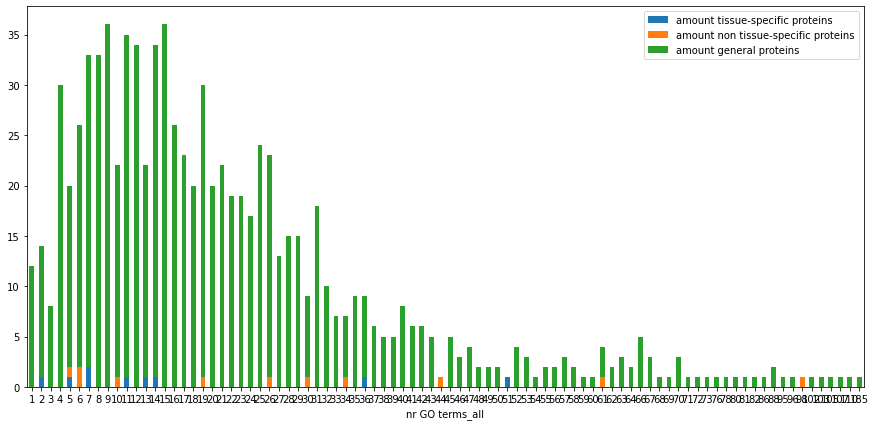

nr GO terms_all  amount tissue-specific proteins  \
17                1                              NaN   
0                 2                              1.0   
18                3                              NaN   
19                4                              NaN   
1                 5                              1.0   
..              ...                              ...   
83              103                              NaN   
84              105                              NaN   
85              107                              NaN   
86              110                              NaN   
87              185                              NaN   

    amount non tissue-specific proteins  amount general proteins  Total  
17                                  NaN                     12.0   12.0  
0                                   NaN                     13.0   14.0  
18                                  NaN                      8.0    8.0  
19                                  NaN                     30.0   30.0  
1                                   1.0                     18.0   20.0  
..                                  ...                      ...    ...  
83                                  NaN                      1.0    1.0  
84                                  NaN                      1.0    1.0  
85                                  NaN                      1.0    1.0  
86                                  NaN                      1.0    1.0  
87                                  NaN                      1.0    1.0  

[88 rows x 5 columns]

In [96]:
print(data_protein[data_protein["Monocytes"]==1].shape[0])
tspec_Monocytes_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Monocytes"]==1]
nontspec_Monocytes_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Monocytes"]==1]
generalP_Monocytes_all = general_P_prot_GO_all[general_P_prot_GO_all["Monocytes"]==1]
grouped_tspec_Monocytes = tspec_Monocytes_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_Monocytes = nontspec_Monocytes_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_Monocytes = generalP_Monocytes_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_Monocytes_all1 = pd.merge(grouped_tspec_Monocytes, grouped_nontspec_Monocytes, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_Monocytes_all = pd.merge(grouped_Monocytes_all1, grouped_general_Monocytes, how="outer", on=["nr GO terms_all"])
grouped_Monocytes_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_Monocytes_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_Monocytes_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_Monocytes_all["Total"] = grouped_Monocytes_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_Monocytes_all


GO_term  amount tissue-specific proteins  \
30     GO:0000086                                0   
39     GO:0000122                                0   
48     GO:0000139                                1   
50     GO:0000146                                0   
51     GO:0000149                                0   
...           ...                              ...   
12131  GO:1990782                                0   
12161  GO:1990904                                0   
12271  GO:2000300                                0   
12278  GO:2000310                                0   
12330  GO:2000463                                0   

       amount non tissue-specific proteins  amount general P proteins  
30                                       0                         22  
39                                       1                         18  
48                                       0                         26  
50                                       1                          7  
51                                       0                         14  
...                                    ...                        ...  
12131                                    0                          7  
12161                                    0                         18  
12271                                    0                         12  
12278                                    0                          7  
12330                                    0                          7  

[522 rows x 4 columns]

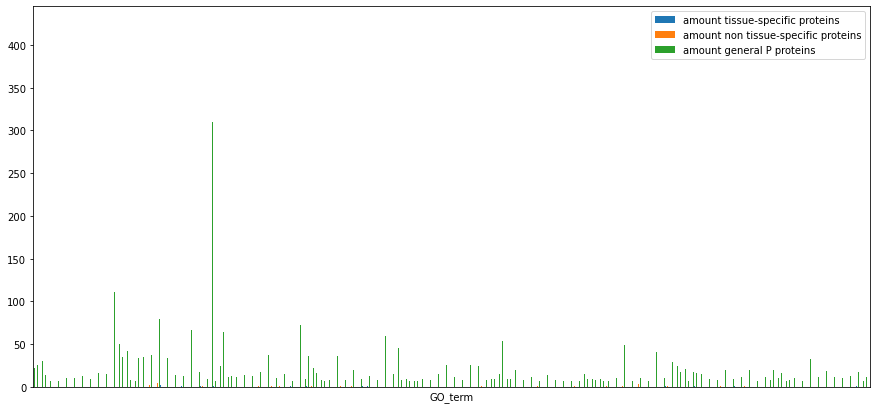

In [97]:
df_count_all_tspec_Monocytes = []
df_count_all_nontspec_Monocytes = []
df_count_all_general_Monocytes = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_Monocytes_all[GO].sum()
        df_count_all_tspec_Monocytes.append(count_tspec)
    else:
        df_count_all_tspec_Monocytes.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_Monocytes_all[GO].sum()
        df_count_all_nontspec_Monocytes.append(count_nontspec)
    else:
         df_count_all_nontspec_Monocytes.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_Monocytes_all[GO].sum()
        df_count_all_general_Monocytes.append(count_general)
    else:
        df_count_all_general_Monocytes.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_Monocytes_all[GO].sum()
    df_count_all_tspec_Monocytes.append(count_tspec)
    count_nontspec = nontspec_Monocytes_all[GO].sum()
    df_count_all_nontspec_Monocytes.append(count_nontspec)
    count_general = generalP_Monocytes_all[GO].sum()
    df_count_all_general_Monocytes.append(count_general)

df_count_all_Monocytes = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_Monocytes2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_Monocytes = df_count_all_Monocytes.append(df_count_all_Monocytes2, ignore_index=True)
df_count_all_Monocytes["amount tissue-specific proteins"] = df_count_all_tspec_Monocytes
df_count_all_Monocytes["amount non tissue-specific proteins"] = df_count_all_nontspec_Monocytes
df_count_all_Monocytes["amount general P proteins"] = df_count_all_general_Monocytes
df_count_all_Monocytes[(df_count_all_Monocytes["amount tissue-specific proteins"]>=7)|(df_count_all_Monocytes["amount non tissue-specific proteins"]>=7)
       |(df_count_all_Monocytes["amount general P proteins"]>=7)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_Monocytes[(df_count_all_Monocytes["amount tissue-specific proteins"]>=7)|(df_count_all_Monocytes["amount non tissue-specific proteins"]>=7)
       |(df_count_all_Monocytes["amount general P proteins"]>=7)]

### Nasal polyps

108


<Figure size 1080x504 with 0 Axes>

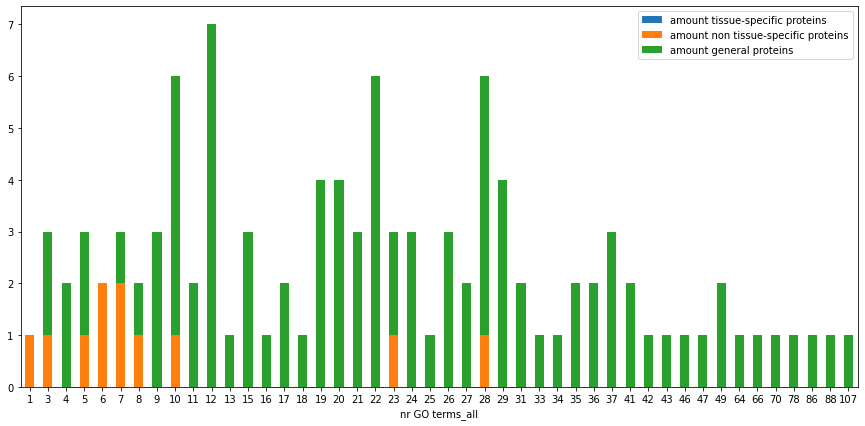

amount tissue-specific proteins  nr GO terms_all  \
0                               NaN                1   
1                               NaN                3   
9                               NaN                4   
2                               NaN                5   
3                               NaN                6   
4                               NaN                7   
5                               NaN                8   
10                              NaN                9   
6                               NaN               10   
11                              NaN               11   
12                              NaN               12   
13                              NaN               13   
14                              NaN               15   
15                              NaN               16   
16                              NaN               17   
17                              NaN               18   
18                              NaN               19   
19                              NaN               20   
20                              NaN               21   
21                              NaN               22   
7                               NaN               23   
22                              NaN               24   
23                              NaN               25   
24                              NaN               26   
25                              NaN               27   
8                               NaN               28   
26                              NaN               29   
27                              NaN               31   
28                              NaN               33   
29                              NaN               34   
30                              NaN               35   
31                              NaN               36   
32                              NaN               37   
33                              NaN               41   
34                              NaN               42   
35                              NaN               43   
36                              NaN               46   
37                              NaN               47   
38                              NaN               49   
39                              NaN               64   
40                              NaN               66   
41                              NaN               70   
42                              NaN               78   
43                              NaN               86   
44                              NaN               88   
45                              NaN              107   

    amount non tissue-specific proteins  amount general proteins  Total  
0                                   1.0                      NaN    1.0  
1                                   1.0                      2.0    3.0  
9                                   NaN                      2.0    2.0  
2                                   1.0                      2.0    3.0  
3                                   2.0                      NaN    2.0  
4                                   2.0                      1.0    3.0  
5                                   1.0                      1.0    2.0  
10                                  NaN                      3.0    3.0  
6                                   1.0                      5.0    6.0  
11                                  NaN                      2.0    2.0  
12                                  NaN                      7.0    7.0  
13                                  NaN                      1.0    1.0  
14                                  NaN                      3.0    3.0  
15                                  NaN                      1.0    1.0  
16                                  NaN                      2.0    2.0  
17                                  NaN                      1.0    1.0  
18                                  NaN                      4.0    4.0  
19                                  NaN

In [98]:
print(data_protein[data_protein["Nasal polyps"]==1].shape[0])
tspec_Nasal_polyps_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Nasal polyps"]==1]
nontspec_Nasal_polyps_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Nasal polyps"]==1]
generalP_Nasal_polyps_all = general_P_prot_GO_all[general_P_prot_GO_all["Nasal polyps"]==1]
grouped_tspec_Nasal_polyps = tspec_Nasal_polyps_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_Nasal_polyps = nontspec_Nasal_polyps_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_Nasal_polyps = generalP_Nasal_polyps_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_Nasal_polyps_all1 = pd.merge(grouped_tspec_Nasal_polyps, grouped_nontspec_Nasal_polyps, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_Nasal_polyps_all = pd.merge(grouped_Nasal_polyps_all1, grouped_general_Nasal_polyps, how="outer", on=["nr GO terms_all"])
grouped_Nasal_polyps_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_Nasal_polyps_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_Nasal_polyps_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_Nasal_polyps_all["Total"] = grouped_Nasal_polyps_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_Nasal_polyps_all

GO_term  amount tissue-specific proteins  \
39     GO:0000122                                0   
50     GO:0000146                                0   
56     GO:0000165                                0   
68     GO:0000187                                0   
128    GO:0000398                                0   
...           ...                              ...   
11855  GO:1905323                                0   
12082  GO:1990544                                0   
12161  GO:1990904                                0   
12294  GO:2000352                                0   
12539  GO:2001244                                0   

       amount non tissue-specific proteins  amount general P proteins  
39                                       1                          2  
50                                       0                          3  
56                                       0                          2  
68                                       0                          2  
128                                      0                          3  
...                                    ...                        ...  
11855                                    0                          2  
12082                                    0                          2  
12161                                    0                          2  
12294                                    0                          3  
12539                                    0                          2  

[384 rows x 4 columns]

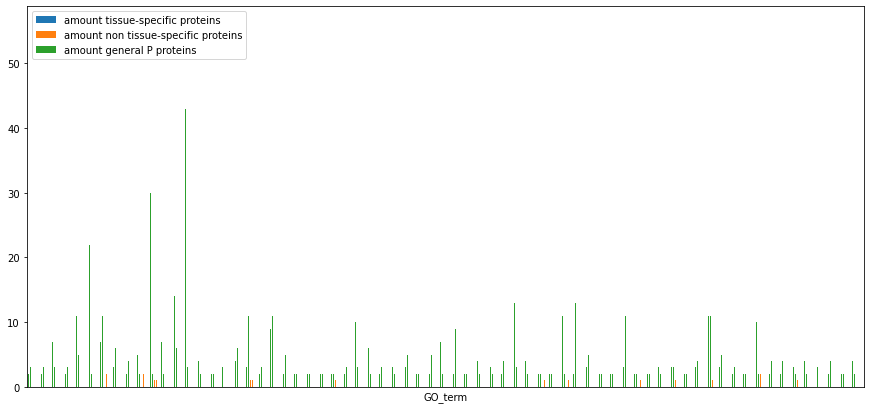

In [99]:
df_count_all_tspec_Nasal_polyps = []
df_count_all_nontspec_Nasal_polyps = []
df_count_all_general_Nasal_polyps = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_Nasal_polyps_all[GO].sum()
        df_count_all_tspec_Nasal_polyps.append(count_tspec)
    else:
        df_count_all_tspec_Nasal_polyps.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_Nasal_polyps_all[GO].sum()
        df_count_all_nontspec_Nasal_polyps.append(count_nontspec)
    else:
         df_count_all_nontspec_Nasal_polyps.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_Nasal_polyps_all[GO].sum()
        df_count_all_general_Nasal_polyps.append(count_general)
    else:
        df_count_all_general_Nasal_polyps.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_Nasal_polyps_all[GO].sum()
    df_count_all_tspec_Nasal_polyps.append(count_tspec)
    count_nontspec = nontspec_Nasal_polyps_all[GO].sum()
    df_count_all_nontspec_Nasal_polyps.append(count_nontspec)
    count_general = generalP_Nasal_polyps_all[GO].sum()
    df_count_all_general_Nasal_polyps.append(count_general)

df_count_all_Nasal_polyps = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_Nasal_polyps2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_Nasal_polyps = df_count_all_Nasal_polyps.append(df_count_all_Nasal_polyps2, ignore_index=True)
df_count_all_Nasal_polyps["amount tissue-specific proteins"] = df_count_all_tspec_Nasal_polyps
df_count_all_Nasal_polyps["amount non tissue-specific proteins"] = df_count_all_nontspec_Nasal_polyps
df_count_all_Nasal_polyps["amount general P proteins"] = df_count_all_general_Nasal_polyps
df_count_all_Nasal_polyps[(df_count_all_Nasal_polyps["amount tissue-specific proteins"]>1)|(df_count_all_Nasal_polyps["amount non tissue-specific proteins"]>1)
       |(df_count_all_Nasal_polyps["amount general P proteins"]>1)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_Nasal_polyps[(df_count_all_Nasal_polyps["amount tissue-specific proteins"]>1)|(df_count_all_Nasal_polyps["amount non tissue-specific proteins"]>1)
       |(df_count_all_Nasal_polyps["amount general P proteins"]>1)]


### NK-cells

242


<Figure size 1080x504 with 0 Axes>

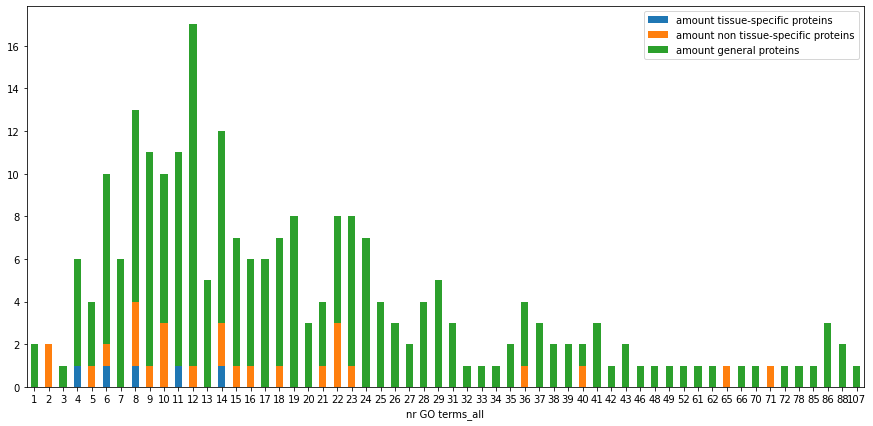

nr GO terms_all  amount tissue-specific proteins  \
20                1                              NaN   
5                 2                              NaN   
21                3                              NaN   
0                 4                              1.0   
6                 5                              NaN   
1                 6                              1.0   
22                7                              NaN   
2                 8                              1.0   
7                 9                              NaN   
8                10                              NaN   
3                11                              1.0   
9                12                              NaN   
23               13                              NaN   
4                14                              1.0   
10               15                              NaN   
11               16                              NaN   
24               17                              NaN   
12               18                              NaN   
25               19                              NaN   
26               20                              NaN   
13               21                              NaN   
14               22                              NaN   
15               23                              NaN   
27               24                              NaN   
28               25                              NaN   
29               26                              NaN   
30               27                              NaN   
31               28                              NaN   
32               29                              NaN   
33               31                              NaN   
34               32                              NaN   
35               33                              NaN   
36               34                              NaN   
37               35                              NaN   
16               36                              NaN   
38               37                              NaN   
39               38                              NaN   
40               39                              NaN   
17               40                              NaN   
41               41                              NaN   
42               42                              NaN   
43               43                              NaN   
44               46                              NaN   
45               48                              NaN   
46               49                              NaN   
47               52                              NaN   
48               61                              NaN   
49               62                              NaN   
18               65                              NaN   
50               66                              NaN   
51               70                              NaN   
19               71                              NaN   
52               72                              NaN   
53               78                              NaN   
54               85                              NaN   
55               86                              NaN   
56               88                              NaN   
57              107                              NaN   

    amount non tissue-specific proteins  amount general proteins  Total  
20                                  NaN                      2.0    2.0  
5                                   2.0                      NaN    2.0  
21                                  NaN                      1.0    1.0  
0                                   NaN                      5.0    6.0  
6                                   1.0                      3.0    4.0  
1                                   1.0                      8.0   10.0  
22                                  NaN                      6.0    6.0  
2                                   3.0                      9.0   13.0  
7                                

In [100]:
print(data_protein[data_protein["NK-cells"]==1].shape[0])
tspec_NK_cells_all = t_spec_prot_GO_all[t_spec_prot_GO_all["NK-cells"]==1]
nontspec_NK_cells_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["NK-cells"]==1]
generalP_NK_cells_all = general_P_prot_GO_all[general_P_prot_GO_all["NK-cells"]==1]
grouped_tspec_NK_cells = tspec_NK_cells_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_NK_cells = nontspec_NK_cells_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_NK_cells = generalP_NK_cells_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_NK_cells_all1 = pd.merge(grouped_tspec_NK_cells, grouped_nontspec_NK_cells, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_NK_cells_all = pd.merge(grouped_NK_cells_all1, grouped_general_NK_cells, how="outer", on=["nr GO terms_all"])
grouped_NK_cells_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_NK_cells_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_NK_cells_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_NK_cells_all["Total"] = grouped_NK_cells_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_NK_cells_all

GO_term  amount tissue-specific proteins  \
16     GO:0000049                                0   
27     GO:0000079                                0   
28     GO:0000082                                0   
30     GO:0000086                                0   
39     GO:0000122                                0   
...           ...                              ...   
12164  GO:1990910                                0   
12481  GO:2001033                                0   
12525  GO:2001224                                0   
12533  GO:2001238                                0   
12539  GO:2001244                                0   

       amount non tissue-specific proteins  amount general P proteins  
16                                       0                          2  
27                                       0                          2  
28                                       0                          2  
30                                       0                          4  
39                                       1                         13  
...                                    ...                        ...  
12164                                    0                          2  
12481                                    0                          2  
12525                                    0                          2  
12533                                    0                          2  
12539                                    0                          3  

[674 rows x 4 columns]

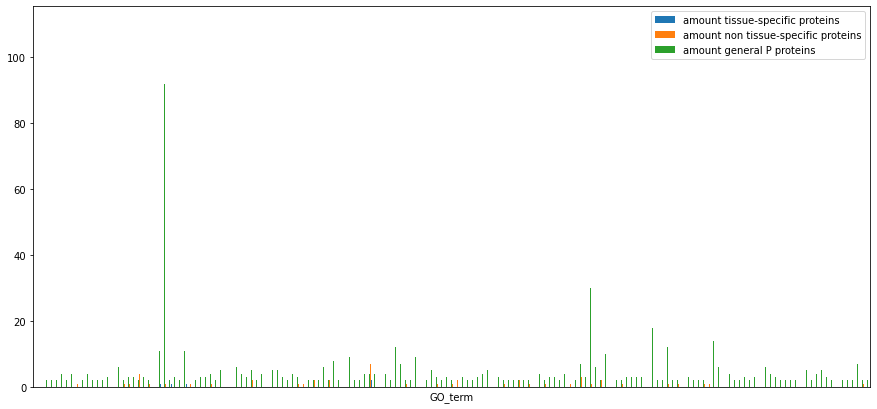

In [101]:
df_count_all_tspec_NK_cells = []
df_count_all_nontspec_NK_cells = []
df_count_all_general_NK_cells = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_NK_cells_all[GO].sum()
        df_count_all_tspec_NK_cells.append(count_tspec)
    else:
        df_count_all_tspec_NK_cells.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_NK_cells_all[GO].sum()
        df_count_all_nontspec_NK_cells.append(count_nontspec)
    else:
         df_count_all_nontspec_NK_cells.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_NK_cells_all[GO].sum()
        df_count_all_general_NK_cells.append(count_general)
    else:
        df_count_all_general_NK_cells.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_NK_cells_all[GO].sum()
    df_count_all_tspec_NK_cells.append(count_tspec)
    count_nontspec = nontspec_NK_cells_all[GO].sum()
    df_count_all_nontspec_NK_cells.append(count_nontspec)
    count_general = generalP_NK_cells_all[GO].sum()
    df_count_all_general_NK_cells.append(count_general)

df_count_all_NK_cells = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_NK_cells2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_NK_cells = df_count_all_NK_cells.append(df_count_all_NK_cells2, ignore_index=True)
df_count_all_NK_cells["amount tissue-specific proteins"] = df_count_all_tspec_NK_cells
df_count_all_NK_cells["amount non tissue-specific proteins"] = df_count_all_nontspec_NK_cells
df_count_all_NK_cells["amount general P proteins"] = df_count_all_general_NK_cells
df_count_all_NK_cells[(df_count_all_NK_cells["amount tissue-specific proteins"]>1)|(df_count_all_NK_cells["amount non tissue-specific proteins"]>1)
       |(df_count_all_NK_cells["amount general P proteins"]>1)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_NK_cells[(df_count_all_NK_cells["amount tissue-specific proteins"]>1)|(df_count_all_NK_cells["amount non tissue-specific proteins"]>1)
       |(df_count_all_NK_cells["amount general P proteins"]>1)]

### Ovary

In [102]:
print(data_protein[data_protein["Ovary"]==1].shape[0])
tspec_Ovary_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Ovary"]==1]
nontspec_Ovary_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Ovary"]==1]
generalP_Ovary_all = general_P_prot_GO_all[general_P_prot_GO_all["Ovary"]==1]
grouped_tspec_Ovary = tspec_Ovary_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_Ovary = nontspec_Ovary_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_Ovary = generalP_Ovary_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_Ovary_all1 = pd.merge(grouped_tspec_Ovary, grouped_nontspec_Ovary, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_Ovary_all = pd.merge(grouped_Ovary_all1, grouped_general_Ovary, how="outer", on=["nr GO terms_all"])
grouped_Ovary_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_Ovary_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_Ovary_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_Ovary_all["Total"] = grouped_Ovary_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_Ovary_all

867


<Figure size 1080x504 with 0 Axes>

nr GO terms_all  amount tissue-specific proteins  \
1                 1                              NaN   
2                 2                              NaN   
3                 3                              NaN   
4                 4                              NaN   
5                 5                              NaN   
..              ...                              ...   
80              103                              NaN   
81              105                              NaN   
82              107                              NaN   
83              110                              NaN   
84              185                              NaN   

    amount non tissue-specific proteins  amount general proteins  Total  
1                                   NaN                       12   12.0  
2                                   NaN                       13   13.0  
3                                   NaN                        8    8.0  
4                                   NaN                       30   30.0  
5                                   NaN                       18   18.0  
..                                  ...                      ...    ...  
80                                  NaN                        1    1.0  
81                                  NaN                        1    1.0  
82                                  NaN                        1    1.0  
83                                  NaN                        1    1.0  
84                                  NaN                        1    1.0  

[85 rows x 5 columns]

GO_term  amount tissue-specific proteins  \
30     GO:0000086                                0   
39     GO:0000122                                0   
48     GO:0000139                                0   
50     GO:0000146                                0   
51     GO:0000149                                0   
...           ...                              ...   
12131  GO:1990782                                0   
12161  GO:1990904                                0   
12271  GO:2000300                                0   
12278  GO:2000310                                0   
12330  GO:2000463                                0   

       amount non tissue-specific proteins  amount general P proteins  
30                                       0                         22  
39                                       0                         18  
48                                       0                         25  
50                                       0                          7  
51                                       0                         14  
...                                    ...                        ...  
12131                                    0                          7  
12161                                    0                         18  
12271                                    0                         12  
12278                                    0                          7  
12330                                    0                          7  

[515 rows x 4 columns]

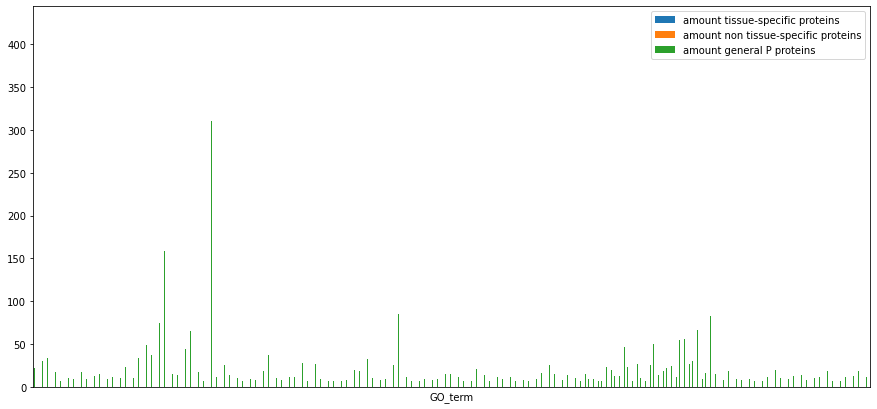

In [103]:
df_count_all_tspec_Ovary = []
df_count_all_nontspec_Ovary = []
df_count_all_general_Ovary = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_Ovary_all[GO].sum()
        df_count_all_tspec_Ovary.append(count_tspec)
    else:
        df_count_all_tspec_Ovary.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_Ovary_all[GO].sum()
        df_count_all_nontspec_Ovary.append(count_nontspec)
    else:
         df_count_all_nontspec_Ovary.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_Ovary_all[GO].sum()
        df_count_all_general_Ovary.append(count_general)
    else:
        df_count_all_general_Ovary.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_Ovary_all[GO].sum()
    df_count_all_tspec_Ovary.append(count_tspec)
    count_nontspec = nontspec_Ovary_all[GO].sum()
    df_count_all_nontspec_Ovary.append(count_nontspec)
    count_general = generalP_Ovary_all[GO].sum()
    df_count_all_general_Ovary.append(count_general)

df_count_all_Ovary = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_Ovary2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_Ovary = df_count_all_Ovary.append(df_count_all_Ovary2, ignore_index=True)
df_count_all_Ovary["amount tissue-specific proteins"] = df_count_all_tspec_Ovary
df_count_all_Ovary["amount non tissue-specific proteins"] = df_count_all_nontspec_Ovary
df_count_all_Ovary["amount general P proteins"] = df_count_all_general_Ovary
df_count_all_Ovary[(df_count_all_Ovary["amount tissue-specific proteins"]>=7)|(df_count_all_Ovary["amount non tissue-specific proteins"]>=7)
       |(df_count_all_Ovary["amount general P proteins"]>=7)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_Ovary[(df_count_all_Ovary["amount tissue-specific proteins"]>=7)|(df_count_all_Ovary["amount non tissue-specific proteins"]>=7)
       |(df_count_all_Ovary["amount general P proteins"]>=7)]
#200 proteins associated with a certain GO term while there are only 870 (+/-) proteins

### Pancreas

In [104]:
print(data_protein[data_protein["Pancreas"]==1].shape[0])
tspec_Pancreas_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Pancreas"]==1]
nontspec_Pancreas_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Pancreas"]==1]
generalP_Pancreas_all = general_P_prot_GO_all[general_P_prot_GO_all["Pancreas"]==1]
grouped_tspec_Pancreas = tspec_Pancreas_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_Pancreas = nontspec_Pancreas_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_Pancreas = generalP_Pancreas_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_Pancreas_all1 = pd.merge(grouped_tspec_Pancreas, grouped_nontspec_Pancreas, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_Pancreas_all = pd.merge(grouped_Pancreas_all1, grouped_general_Pancreas, how="outer", on=["nr GO terms_all"])
grouped_Pancreas_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_Pancreas_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_Pancreas_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_Pancreas_all["Total"] = grouped_Pancreas_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_Pancreas_all

977


<Figure size 1080x504 with 0 Axes>

nr GO terms_all  amount tissue-specific proteins  \
21                1                              NaN   
22                2                              NaN   
10                3                              NaN   
0                 4                              1.0   
1                 5                              1.0   
..              ...                              ...   
86              105                              NaN   
87              107                              NaN   
88              110                              NaN   
89              116                              NaN   
90              185                              NaN   

    amount non tissue-specific proteins  amount general proteins  Total  
21                                  NaN                       12   12.0  
22                                  NaN                       13   13.0  
10                                  2.0                        8   10.0  
0                                   NaN                       31   32.0  
1                                   2.0                       20   23.0  
..                                  ...                      ...    ...  
86                                  NaN                        1    1.0  
87                                  NaN                        1    1.0  
88                                  NaN                        1    1.0  
89                                  NaN                        1    1.0  
90                                  NaN                        1    1.0  

[91 rows x 5 columns]

In [105]:
df_count_all_tspec_Pancreas = []
df_count_all_nontspec_Pancreas = []
df_count_all_general_Pancreas = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_Pancreas_all[GO].sum()
        df_count_all_tspec_Pancreas.append(count_tspec)
    else:
        df_count_all_tspec_Pancreas.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_Pancreas_all[GO].sum()
        df_count_all_nontspec_Pancreas.append(count_nontspec)
    else:
         df_count_all_nontspec_Pancreas.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_Pancreas_all[GO].sum()
        df_count_all_general_Pancreas.append(count_general)
    else:
        df_count_all_general_Pancreas.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_Pancreas_all[GO].sum()
    df_count_all_tspec_Pancreas.append(count_tspec)
    count_nontspec = nontspec_Pancreas_all[GO].sum()
    df_count_all_nontspec_Pancreas.append(count_nontspec)
    count_general = generalP_Pancreas_all[GO].sum()
    df_count_all_general_Pancreas.append(count_general)

df_count_all_Pancreas = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_Pancreas2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_Pancreas = df_count_all_Pancreas.append(df_count_all_Pancreas2, ignore_index=True)
df_count_all_Pancreas["amount tissue-specific proteins"] = df_count_all_tspec_Pancreas
df_count_all_Pancreas["amount non tissue-specific proteins"] = df_count_all_nontspec_Pancreas
df_count_all_Pancreas["amount general P proteins"] = df_count_all_general_Pancreas
df_count_all_Pancreas[(df_count_all_Pancreas["amount tissue-specific proteins"]>=10)|(df_count_all_Pancreas["amount non tissue-specific proteins"]>=10)
       |(df_count_all_Pancreas["amount general P proteins"]>=10)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_Pancreas[(df_count_all_Pancreas["amount tissue-specific proteins"]>=10)|(df_count_all_Pancreas["amount non tissue-specific proteins"]>=10)
       |(df_count_all_Pancreas["amount general P proteins"]>=10)]


GO_term  amount tissue-specific proteins  \
30     GO:0000086                                0   
39     GO:0000122                                0   
48     GO:0000139                                0   
51     GO:0000149                                0   
56     GO:0000165                                0   
...           ...                              ...   
11514  GO:1903779                                0   
11598  GO:1904115                                0   
11751  GO:1904813                                0   
12161  GO:1990904                                0   
12271  GO:2000300                                0   

       amount non tissue-specific proteins  amount general P proteins  
30                                       0                         27  
39                                       0                         27  
48                                       0                         28  
51                                       0                         14  
56                                       0                         32  
...                                    ...                        ...  
11514                                    0                         14  
11598                                    0                         11  
11751                                    0                         20  
12161                                    1                         27  
12271                                    0                         14  

[371 rows x 4 columns]

### Palatine tonsils

108


<Figure size 1080x504 with 0 Axes>

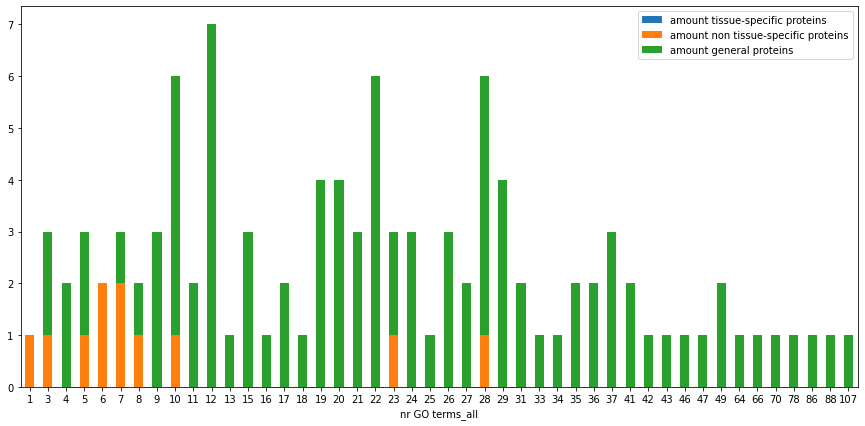

amount tissue-specific proteins  nr GO terms_all  \
0                               NaN                1   
1                               NaN                3   
9                               NaN                4   
2                               NaN                5   
3                               NaN                6   
4                               NaN                7   
5                               NaN                8   
10                              NaN                9   
6                               NaN               10   
11                              NaN               11   
12                              NaN               12   
13                              NaN               13   
14                              NaN               15   
15                              NaN               16   
16                              NaN               17   
17                              NaN               18   
18                              NaN               19   
19                              NaN               20   
20                              NaN               21   
21                              NaN               22   
7                               NaN               23   
22                              NaN               24   
23                              NaN               25   
24                              NaN               26   
25                              NaN               27   
8                               NaN               28   
26                              NaN               29   
27                              NaN               31   
28                              NaN               33   
29                              NaN               34   
30                              NaN               35   
31                              NaN               36   
32                              NaN               37   
33                              NaN               41   
34                              NaN               42   
35                              NaN               43   
36                              NaN               46   
37                              NaN               47   
38                              NaN               49   
39                              NaN               64   
40                              NaN               66   
41                              NaN               70   
42                              NaN               78   
43                              NaN               86   
44                              NaN               88   
45                              NaN              107   

    amount non tissue-specific proteins  amount general proteins  Total  
0                                   1.0                      NaN    1.0  
1                                   1.0                      2.0    3.0  
9                                   NaN                      2.0    2.0  
2                                   1.0                      2.0    3.0  
3                                   2.0                      NaN    2.0  
4                                   2.0                      1.0    3.0  
5                                   1.0                      1.0    2.0  
10                                  NaN                      3.0    3.0  
6                                   1.0                      5.0    6.0  
11                                  NaN                      2.0    2.0  
12                                  NaN                      7.0    7.0  
13                                  NaN                      1.0    1.0  
14                                  NaN                      3.0    3.0  
15                                  NaN                      1.0    1.0  
16                                  NaN                      2.0    2.0  
17                                  NaN                      1.0    1.0  
18                                  NaN                      4.0    4.0  
19                                  NaN

In [106]:
print(data_protein[data_protein["Palatine tonsils"]==1].shape[0])
tspec_Palatine_tonsils_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Palatine tonsils"]==1]
nontspec_Palatine_tonsils_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Palatine tonsils"]==1]
generalP_Palatine_tonsils_all = general_P_prot_GO_all[general_P_prot_GO_all["Palatine tonsils"]==1]
grouped_tspec_Palatine_tonsils = tspec_Palatine_tonsils_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_Palatine_tonsils = nontspec_Palatine_tonsils_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_Palatine_tonsils = generalP_Palatine_tonsils_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_Palatine_tonsils_all1 = pd.merge(grouped_tspec_Palatine_tonsils, grouped_nontspec_Palatine_tonsils, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_Palatine_tonsils_all = pd.merge(grouped_Palatine_tonsils_all1, grouped_general_Palatine_tonsils, how="outer", on=["nr GO terms_all"])
grouped_Palatine_tonsils_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_Palatine_tonsils_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_Palatine_tonsils_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_Palatine_tonsils_all["Total"] = grouped_Palatine_tonsils_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_Palatine_tonsils_all

GO_term  amount tissue-specific proteins  \
39     GO:0000122                                0   
50     GO:0000146                                0   
56     GO:0000165                                0   
68     GO:0000187                                0   
128    GO:0000398                                0   
...           ...                              ...   
11855  GO:1905323                                0   
12082  GO:1990544                                0   
12161  GO:1990904                                0   
12294  GO:2000352                                0   
12539  GO:2001244                                0   

       amount non tissue-specific proteins  amount general P proteins  
39                                       1                          2  
50                                       0                          3  
56                                       0                          2  
68                                       0                          2  
128                                      0                          3  
...                                    ...                        ...  
11855                                    0                          2  
12082                                    0                          2  
12161                                    0                          2  
12294                                    0                          3  
12539                                    0                          2  

[384 rows x 4 columns]

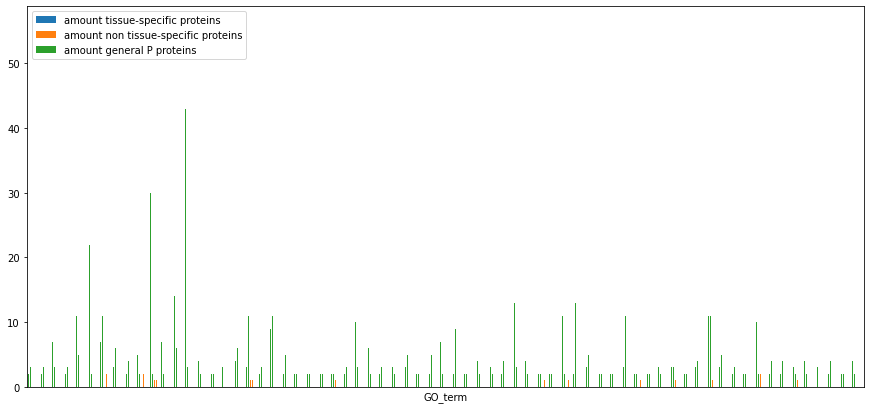

In [107]:
df_count_all_tspec_Palatine_tonsils = []
df_count_all_nontspec_Palatine_tonsils = []
df_count_all_general_Palatine_tonsils = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_Palatine_tonsils_all[GO].sum()
        df_count_all_tspec_Palatine_tonsils.append(count_tspec)
    else:
        df_count_all_tspec_Palatine_tonsils.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_Palatine_tonsils_all[GO].sum()
        df_count_all_nontspec_Palatine_tonsils.append(count_nontspec)
    else:
         df_count_all_nontspec_Palatine_tonsils.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_Palatine_tonsils_all[GO].sum()
        df_count_all_general_Palatine_tonsils.append(count_general)
    else:
        df_count_all_general_Palatine_tonsils.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_Palatine_tonsils_all[GO].sum()
    df_count_all_tspec_Palatine_tonsils.append(count_tspec)
    count_nontspec = nontspec_Palatine_tonsils_all[GO].sum()
    df_count_all_nontspec_Palatine_tonsils.append(count_nontspec)
    count_general = generalP_Palatine_tonsils_all[GO].sum()
    df_count_all_general_Palatine_tonsils.append(count_general)

df_count_all_Palatine_tonsils = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_Palatine_tonsils2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_Palatine_tonsils = df_count_all_Palatine_tonsils.append(df_count_all_Palatine_tonsils2, ignore_index=True)
df_count_all_Palatine_tonsils["amount tissue-specific proteins"] = df_count_all_tspec_Palatine_tonsils
df_count_all_Palatine_tonsils["amount non tissue-specific proteins"] = df_count_all_nontspec_Palatine_tonsils
df_count_all_Palatine_tonsils["amount general P proteins"] = df_count_all_general_Palatine_tonsils
df_count_all_Palatine_tonsils[(df_count_all_Palatine_tonsils["amount tissue-specific proteins"]>1)|(df_count_all_Palatine_tonsils["amount non tissue-specific proteins"]>1)
       |(df_count_all_Palatine_tonsils["amount general P proteins"]>1)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_Palatine_tonsils[(df_count_all_Palatine_tonsils["amount tissue-specific proteins"]>1)|(df_count_all_Palatine_tonsils["amount non tissue-specific proteins"]>1)
       |(df_count_all_Palatine_tonsils["amount general P proteins"]>1)]


### Parotid gland

108


<Figure size 1080x504 with 0 Axes>

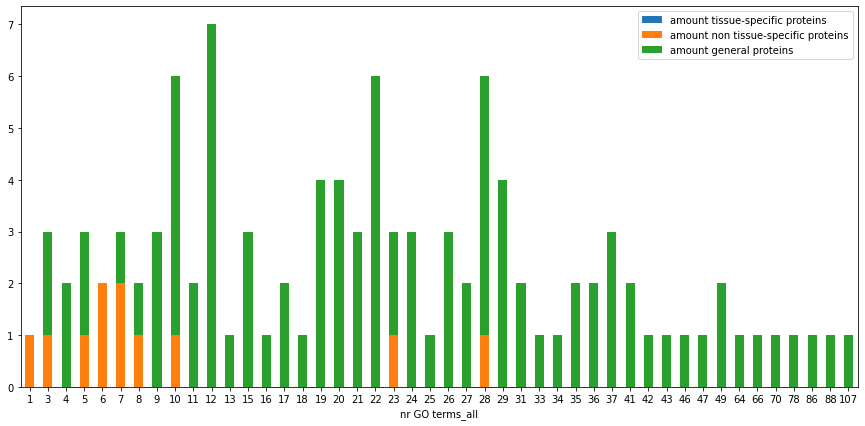

amount tissue-specific proteins  nr GO terms_all  \
0                               NaN                1   
1                               NaN                3   
9                               NaN                4   
2                               NaN                5   
3                               NaN                6   
4                               NaN                7   
5                               NaN                8   
10                              NaN                9   
6                               NaN               10   
11                              NaN               11   
12                              NaN               12   
13                              NaN               13   
14                              NaN               15   
15                              NaN               16   
16                              NaN               17   
17                              NaN               18   
18                              NaN               19   
19                              NaN               20   
20                              NaN               21   
21                              NaN               22   
7                               NaN               23   
22                              NaN               24   
23                              NaN               25   
24                              NaN               26   
25                              NaN               27   
8                               NaN               28   
26                              NaN               29   
27                              NaN               31   
28                              NaN               33   
29                              NaN               34   
30                              NaN               35   
31                              NaN               36   
32                              NaN               37   
33                              NaN               41   
34                              NaN               42   
35                              NaN               43   
36                              NaN               46   
37                              NaN               47   
38                              NaN               49   
39                              NaN               64   
40                              NaN               66   
41                              NaN               70   
42                              NaN               78   
43                              NaN               86   
44                              NaN               88   
45                              NaN              107   

    amount non tissue-specific proteins  amount general proteins  Total  
0                                   1.0                      NaN    1.0  
1                                   1.0                      2.0    3.0  
9                                   NaN                      2.0    2.0  
2                                   1.0                      2.0    3.0  
3                                   2.0                      NaN    2.0  
4                                   2.0                      1.0    3.0  
5                                   1.0                      1.0    2.0  
10                                  NaN                      3.0    3.0  
6                                   1.0                      5.0    6.0  
11                                  NaN                      2.0    2.0  
12                                  NaN                      7.0    7.0  
13                                  NaN                      1.0    1.0  
14                                  NaN                      3.0    3.0  
15                                  NaN                      1.0    1.0  
16                                  NaN                      2.0    2.0  
17                                  NaN                      1.0    1.0  
18                                  NaN                      4.0    4.0  
19                                  NaN

In [108]:
print(data_protein[data_protein["Parotid gland"]==1].shape[0])
tspec_Parotid_gland_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Parotid gland"]==1]
nontspec_Parotid_gland_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Parotid gland"]==1]
generalP_Parotid_gland_all = general_P_prot_GO_all[general_P_prot_GO_all["Parotid gland"]==1]
grouped_tspec_Parotid_gland = tspec_Parotid_gland_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_Parotid_gland = nontspec_Parotid_gland_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_Parotid_gland = generalP_Parotid_gland_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_Parotid_gland_all1 = pd.merge(grouped_tspec_Parotid_gland, grouped_nontspec_Parotid_gland, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_Parotid_gland_all = pd.merge(grouped_Parotid_gland_all1, grouped_general_Parotid_gland, how="outer", on=["nr GO terms_all"])
grouped_Parotid_gland_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_Parotid_gland_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_Parotid_gland_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_Parotid_gland_all["Total"] = grouped_Parotid_gland_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_Parotid_gland_all


In [109]:
df_count_all_tspec_Parotid_gland = []
df_count_all_nontspec_Parotid_gland = []
df_count_all_general_Parotid_gland = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_Parotid_gland_all[GO].sum()
        df_count_all_tspec_Parotid_gland.append(count_tspec)
    else:
        df_count_all_tspec_Parotid_gland.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_Parotid_gland_all[GO].sum()
        df_count_all_nontspec_Parotid_gland.append(count_nontspec)
    else:
         df_count_all_nontspec_Parotid_gland.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_Parotid_gland_all[GO].sum()
        df_count_all_general_Parotid_gland.append(count_general)
    else:
        df_count_all_general_Parotid_gland.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_Parotid_gland_all[GO].sum()
    df_count_all_tspec_Parotid_gland.append(count_tspec)
    count_nontspec = nontspec_Parotid_gland_all[GO].sum()
    df_count_all_nontspec_Parotid_gland.append(count_nontspec)
    count_general = generalP_Parotid_gland_all[GO].sum()
    df_count_all_general_Parotid_gland.append(count_general)

df_count_all_Parotid_gland = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_Parotid_gland2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_Parotid_gland = df_count_all_Parotid_gland.append(df_count_all_Parotid_gland2, ignore_index=True)
df_count_all_Parotid_gland["amount tissue-specific proteins"] = df_count_all_tspec_Parotid_gland
df_count_all_Parotid_gland["amount non tissue-specific proteins"] = df_count_all_nontspec_Parotid_gland
df_count_all_Parotid_gland["amount general P proteins"] = df_count_all_general_Parotid_gland
df_count_all_Parotid_gland[(df_count_all_Parotid_gland["amount tissue-specific proteins"]>5)|(df_count_all_Parotid_gland["amount non tissue-specific proteins"]>5)
       |(df_count_all_Parotid_gland["amount general P proteins"]>5)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_Parotid_gland[(df_count_all_Parotid_gland["amount tissue-specific proteins"]>5)|(df_count_all_Parotid_gland["amount non tissue-specific proteins"]>5)
       |(df_count_all_Parotid_gland["amount general P proteins"]>5)]


GO_term  amount tissue-specific proteins  \
375   GO:0001725                                0   
462   GO:0001895                                0   
708   GO:0002576                                0   
770   GO:0002862                                0   
928   GO:0003723                                0   
...          ...                              ...   
8248  GO:0051592                                0   
9018  GO:0062023                                0   
9064  GO:0070062                                0   
9235  GO:0070527                                0   
9834  GO:0072562                                0   

      amount non tissue-specific proteins  amount general P proteins  
375                                     0                          7  
462                                     0                         12  
708                                     0                          9  
770                                     2                         11  
928                                     1                         22  
...                                   ...                        ...  
8248                                    0                          6  
9018                                    0                         10  
9064                                    2                         56  
9235                                    0                          9  
9834                                    0                         29  

[74 rows x 4 columns]

### PBMC

866


<Figure size 1080x504 with 0 Axes>

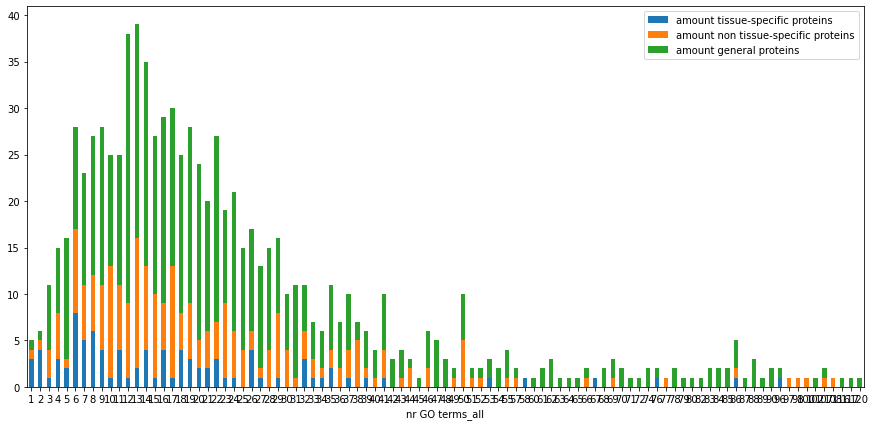

nr GO terms_all  amount tissue-specific proteins  \
0                 1                              3.0   
1                 2                              4.0   
2                 3                              1.0   
3                 4                              3.0   
4                 5                              2.0   
..              ...                              ...   
62              107                              NaN   
63              108                              NaN   
92              116                              NaN   
93              117                              NaN   
94              120                              NaN   

    amount non tissue-specific proteins  amount general proteins  Total  
0                                   1.0                      1.0    5.0  
1                                   1.0                      1.0    6.0  
2                                   3.0                      7.0   11.0  
3                                   5.0                      7.0   15.0  
4                                   1.0                     13.0   16.0  
..                                  ...                      ...    ...  
62                                  1.0                      1.0    2.0  
63                                  1.0                      NaN    1.0  
92                                  NaN                      1.0    1.0  
93                                  NaN                      1.0    1.0  
94                                  NaN                      1.0    1.0  

[95 rows x 5 columns]

In [110]:
print(data_protein[data_protein["PBMC"]==1].shape[0])
tspec_PBMC_all = t_spec_prot_GO_all[t_spec_prot_GO_all["PBMC"]==1]
nontspec_PBMC_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["PBMC"]==1]
generalP_PBMC_all = general_P_prot_GO_all[general_P_prot_GO_all["PBMC"]==1]
grouped_tspec_PBMC = tspec_PBMC_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_PBMC = nontspec_PBMC_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_PBMC = generalP_PBMC_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_PBMC_all1 = pd.merge(grouped_tspec_PBMC, grouped_nontspec_PBMC, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_PBMC_all = pd.merge(grouped_PBMC_all1, grouped_general_PBMC, how="outer", on=["nr GO terms_all"])
grouped_PBMC_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_PBMC_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_PBMC_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_PBMC_all["Total"] = grouped_PBMC_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_PBMC_all

GO_term  amount tissue-specific proteins  \
30     GO:0000086                                0   
39     GO:0000122                                1   
48     GO:0000139                                5   
56     GO:0000165                                3   
65     GO:0000184                                0   
...           ...                              ...   
10885  GO:1900034                                0   
11732  GO:1904724                                4   
11751  GO:1904813                                5   
12151  GO:1990841                                0   
12161  GO:1990904                                0   

       amount non tissue-specific proteins  amount general P proteins  
30                                       1                         11  
39                                       8                         43  
48                                       7                         10  
56                                       7                         12  
65                                       8                         16  
...                                    ...                        ...  
10885                                    0                         15  
11732                                    1                         10  
11751                                   12                         34  
12151                                    1                         10  
12161                                    8                         42  

[245 rows x 4 columns]

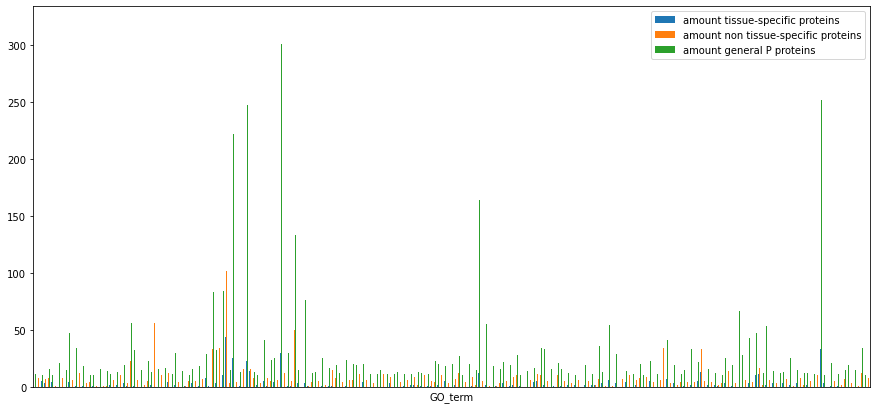

In [111]:
df_count_all_tspec_PBMC = []
df_count_all_nontspec_PBMC = []
df_count_all_general_PBMC = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_PBMC_all[GO].sum()
        df_count_all_tspec_PBMC.append(count_tspec)
    else:
        df_count_all_tspec_PBMC.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_PBMC_all[GO].sum()
        df_count_all_nontspec_PBMC.append(count_nontspec)
    else:
         df_count_all_nontspec_PBMC.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_PBMC_all[GO].sum()
        df_count_all_general_PBMC.append(count_general)
    else:
        df_count_all_general_PBMC.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_PBMC_all[GO].sum()
    df_count_all_tspec_PBMC.append(count_tspec)
    count_nontspec = nontspec_PBMC_all[GO].sum()
    df_count_all_nontspec_PBMC.append(count_nontspec)
    count_general = generalP_PBMC_all[GO].sum()
    df_count_all_general_PBMC.append(count_general)

df_count_all_PBMC = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_PBMC2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_PBMC = df_count_all_PBMC.append(df_count_all_PBMC2, ignore_index=True)
df_count_all_PBMC["amount tissue-specific proteins"] = df_count_all_tspec_PBMC
df_count_all_PBMC["amount non tissue-specific proteins"] = df_count_all_nontspec_PBMC
df_count_all_PBMC["amount general P proteins"] = df_count_all_general_PBMC
df_count_all_PBMC[(df_count_all_PBMC["amount tissue-specific proteins"]>=10)|(df_count_all_PBMC["amount non tissue-specific proteins"]>=10)
       |(df_count_all_PBMC["amount general P proteins"]>=10)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_PBMC[(df_count_all_PBMC["amount tissue-specific proteins"]>=10)|(df_count_all_PBMC["amount non tissue-specific proteins"]>=10)
       |(df_count_all_PBMC["amount general P proteins"]>=10)]


### Peritoneal dialysis fluid

2


<Figure size 1080x504 with 0 Axes>

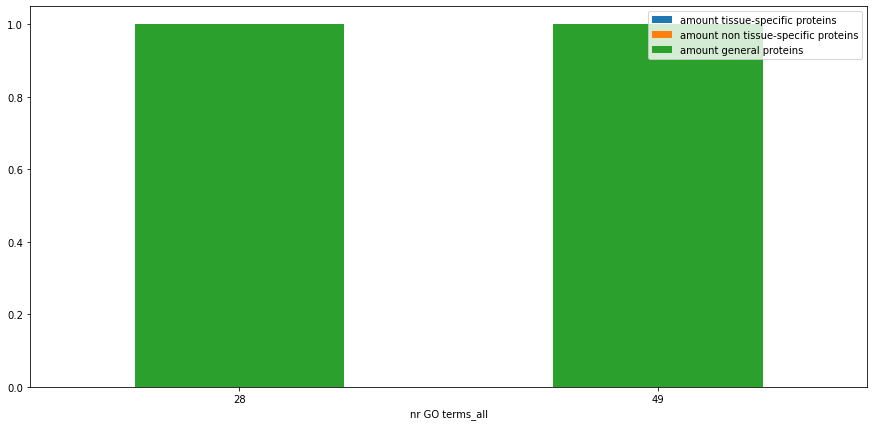

amount tissue-specific proteins  amount non tissue-specific proteins  \
0                              NaN                                  NaN   
1                              NaN                                  NaN   

   nr GO terms_all  amount general proteins  Total  
0               28                        1    1.0  
1               49                        1    1.0

In [112]:
print(data_protein[data_protein["Peritoneal dialysis fluid"]==1].shape[0])
tspec_Peritoneal_dialysis_fluid_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Peritoneal dialysis fluid"]==1]
nontspec_Peritoneal_dialysis_fluid_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Peritoneal dialysis fluid"]==1]
generalP_Peritoneal_dialysis_fluid_all = general_P_prot_GO_all[general_P_prot_GO_all["Peritoneal dialysis fluid"]==1]
grouped_tspec_Peritoneal_dialysis_fluid = tspec_Peritoneal_dialysis_fluid_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_Peritoneal_dialysis_fluid = nontspec_Peritoneal_dialysis_fluid_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_Peritoneal_dialysis_fluid = generalP_Peritoneal_dialysis_fluid_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_Peritoneal_dialysis_fluid_all1 = pd.merge(grouped_tspec_Peritoneal_dialysis_fluid, grouped_nontspec_Peritoneal_dialysis_fluid, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_Peritoneal_dialysis_fluid_all = pd.merge(grouped_Peritoneal_dialysis_fluid_all1, grouped_general_Peritoneal_dialysis_fluid, how="outer", on=["nr GO terms_all"])
grouped_Peritoneal_dialysis_fluid_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_Peritoneal_dialysis_fluid_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_Peritoneal_dialysis_fluid_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_Peritoneal_dialysis_fluid_all["Total"] = grouped_Peritoneal_dialysis_fluid_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_Peritoneal_dialysis_fluid_all


In [113]:
df_count_all_tspec_Peritoneal_dialysis_fluid = []
df_count_all_nontspec_Peritoneal_dialysis_fluid = []
df_count_all_general_Peritoneal_dialysis_fluid = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_Peritoneal_dialysis_fluid_all[GO].sum()
        df_count_all_tspec_Peritoneal_dialysis_fluid.append(count_tspec)
    else:
        df_count_all_tspec_Peritoneal_dialysis_fluid.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_Peritoneal_dialysis_fluid_all[GO].sum()
        df_count_all_nontspec_Peritoneal_dialysis_fluid.append(count_nontspec)
    else:
         df_count_all_nontspec_Peritoneal_dialysis_fluid.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_Peritoneal_dialysis_fluid_all[GO].sum()
        df_count_all_general_Peritoneal_dialysis_fluid.append(count_general)
    else:
        df_count_all_general_Peritoneal_dialysis_fluid.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_Peritoneal_dialysis_fluid_all[GO].sum()
    df_count_all_tspec_Peritoneal_dialysis_fluid.append(count_tspec)
    count_nontspec = nontspec_Peritoneal_dialysis_fluid_all[GO].sum()
    df_count_all_nontspec_Peritoneal_dialysis_fluid.append(count_nontspec)
    count_general = generalP_Peritoneal_dialysis_fluid_all[GO].sum()
    df_count_all_general_Peritoneal_dialysis_fluid.append(count_general)

df_count_all_Peritoneal_dialysis_fluid = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_Peritoneal_dialysis_fluid2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_Peritoneal_dialysis_fluid = df_count_all_Peritoneal_dialysis_fluid.append(df_count_all_Peritoneal_dialysis_fluid2, ignore_index=True)
df_count_all_Peritoneal_dialysis_fluid["amount tissue-specific proteins"] = df_count_all_tspec_Peritoneal_dialysis_fluid
df_count_all_Peritoneal_dialysis_fluid["amount non tissue-specific proteins"] = df_count_all_nontspec_Peritoneal_dialysis_fluid
df_count_all_Peritoneal_dialysis_fluid["amount general P proteins"] = df_count_all_general_Peritoneal_dialysis_fluid

df_count_all_Peritoneal_dialysis_fluid[(df_count_all_Peritoneal_dialysis_fluid["amount tissue-specific proteins"]>0)|(df_count_all_Peritoneal_dialysis_fluid["amount non tissue-specific proteins"]>0)
       |(df_count_all_Peritoneal_dialysis_fluid["amount general P proteins"]>0)]


GO_term  amount tissue-specific proteins  \
310    GO:0001533                                0   
446    GO:0001867                                0   
462    GO:0001895                                0   
607    GO:0002224                                0   
614    GO:0002250                                0   
...           ...                              ...   
11457  GO:1903561                                0   
11751  GO:1904813                                0   
11973  GO:1990000                                0   
12252  GO:2000261                                0   
12294  GO:2000352                                0   

       amount non tissue-specific proteins  amount general P proteins  
310                                      0                          1  
446                                      0                          1  
462                                      0                          1  
607                                      0                          1  
614                                      0                          1  
...                                    ...                        ...  
11457                                    0                          1  
11751                                    0                          1  
11973                                    0                          1  
12252                                    0                          1  
12294                                    0                          1  

[71 rows x 4 columns]

### Placenta

1014


<Figure size 1080x504 with 0 Axes>

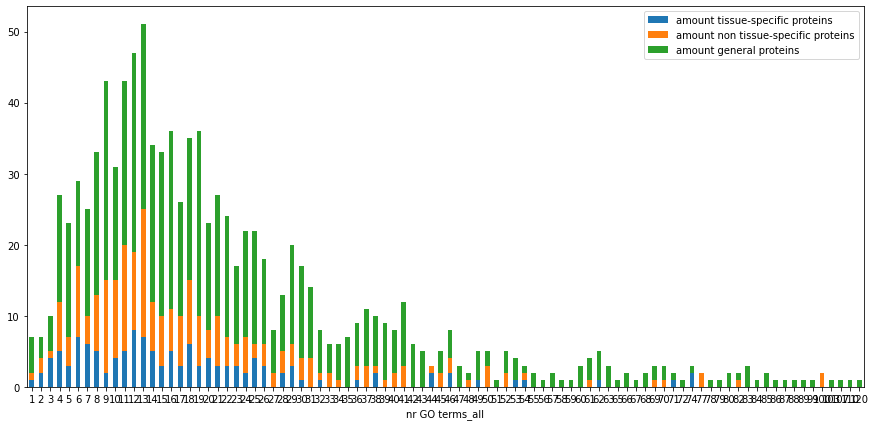

nr GO terms_all  amount tissue-specific proteins  \
0                 1                              1.0   
1                 2                              2.0   
2                 3                              4.0   
3                 4                              5.0   
4                 5                              3.0   
..              ...                              ...   
57              100                              NaN   
86              103                              NaN   
87              107                              NaN   
88              110                              NaN   
89              120                              NaN   

    amount non tissue-specific proteins  amount general proteins  Total  
0                                   1.0                      5.0    7.0  
1                                   2.0                      3.0    7.0  
2                                   1.0                      5.0   10.0  
3                                   7.0                     15.0   27.0  
4                                   4.0                     16.0   23.0  
..                                  ...                      ...    ...  
57                                  2.0                      NaN    2.0  
86                                  NaN                      1.0    1.0  
87                                  NaN                      1.0    1.0  
88                                  NaN                      1.0    1.0  
89                                  NaN                      1.0    1.0  

[90 rows x 5 columns]

In [114]:
print(data_protein[data_protein["Placenta"]==1].shape[0])
tspec_Placenta_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Placenta"]==1]
nontspec_Placenta_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Placenta"]==1]
generalP_Placenta_all = general_P_prot_GO_all[general_P_prot_GO_all["Placenta"]==1]
grouped_tspec_Placenta = tspec_Placenta_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_Placenta = nontspec_Placenta_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_Placenta = generalP_Placenta_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_Placenta_all1 = pd.merge(grouped_tspec_Placenta, grouped_nontspec_Placenta, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_Placenta_all = pd.merge(grouped_Placenta_all1, grouped_general_Placenta, how="outer", on=["nr GO terms_all"])
grouped_Placenta_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_Placenta_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_Placenta_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_Placenta_all["Total"] = grouped_Placenta_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_Placenta_all


GO_term  amount tissue-specific proteins  \
30     GO:0000086                                2   
39     GO:0000122                                3   
48     GO:0000139                                6   
56     GO:0000165                                1   
65     GO:0000184                                0   
...           ...                              ...   
10885  GO:1900034                                0   
11078  GO:1901796                                1   
11751  GO:1904813                                3   
12151  GO:1990841                                0   
12161  GO:1990904                                2   

       amount non tissue-specific proteins  amount general P proteins  
30                                       2                         18  
39                                       5                         40  
48                                       6                         14  
56                                       4                         15  
65                                       5                         22  
...                                    ...                        ...  
10885                                    3                         15  
11078                                    5                         12  
11751                                    7                         20  
12151                                    2                         10  
12161                                    4                         42  

[263 rows x 4 columns]

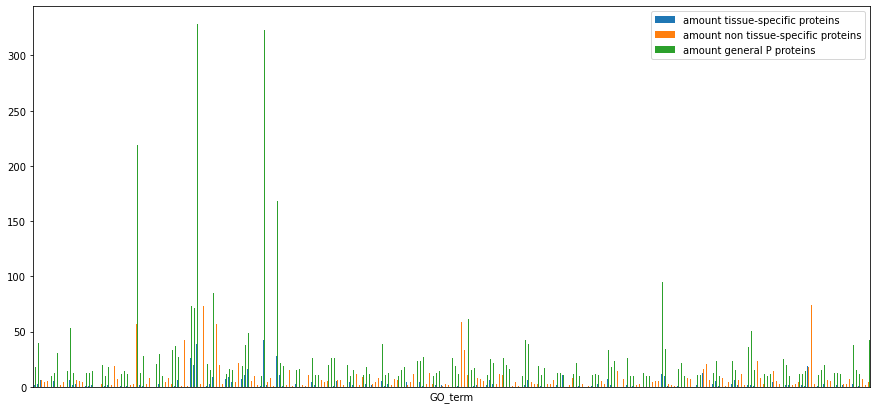

In [115]:
df_count_all_tspec_Placenta = []
df_count_all_nontspec_Placenta = []
df_count_all_general_Placenta = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_Placenta_all[GO].sum()
        df_count_all_tspec_Placenta.append(count_tspec)
    else:
        df_count_all_tspec_Placenta.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_Placenta_all[GO].sum()
        df_count_all_nontspec_Placenta.append(count_nontspec)
    else:
         df_count_all_nontspec_Placenta.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_Placenta_all[GO].sum()
        df_count_all_general_Placenta.append(count_general)
    else:
        df_count_all_general_Placenta.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_Placenta_all[GO].sum()
    df_count_all_tspec_Placenta.append(count_tspec)
    count_nontspec = nontspec_Placenta_all[GO].sum()
    df_count_all_nontspec_Placenta.append(count_nontspec)
    count_general = generalP_Placenta_all[GO].sum()
    df_count_all_general_Placenta.append(count_general)

df_count_all_Placenta = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_Placenta2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_Placenta = df_count_all_Placenta.append(df_count_all_Placenta2, ignore_index=True)
df_count_all_Placenta["amount tissue-specific proteins"] = df_count_all_tspec_Placenta
df_count_all_Placenta["amount non tissue-specific proteins"] = df_count_all_nontspec_Placenta
df_count_all_Placenta["amount general P proteins"] = df_count_all_general_Placenta
df_count_all_Placenta[(df_count_all_Placenta["amount tissue-specific proteins"]>=10)|(df_count_all_Placenta["amount non tissue-specific proteins"]>=10)
       |(df_count_all_Placenta["amount general P proteins"]>=10)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_Placenta[(df_count_all_Placenta["amount tissue-specific proteins"]>=10)|(df_count_all_Placenta["amount non tissue-specific proteins"]>=10)
       |(df_count_all_Placenta["amount general P proteins"]>=10)]

### Skeletal muscle

157


<Figure size 1080x504 with 0 Axes>

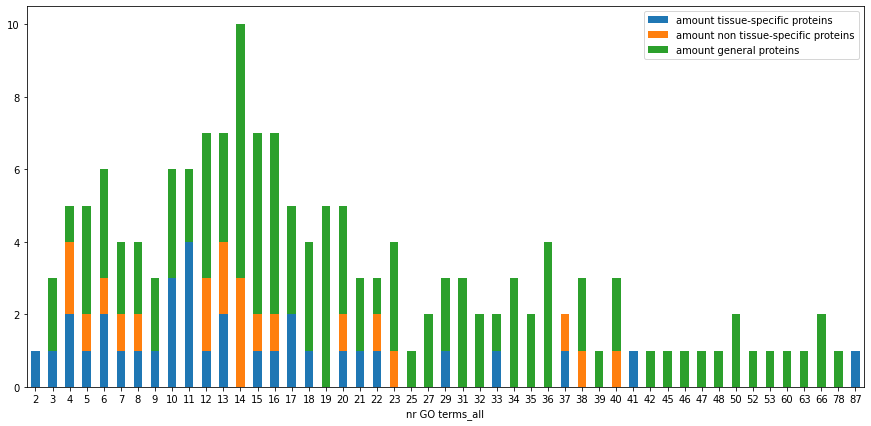

nr GO terms_all  amount tissue-specific proteins  \
0                 2                              1.0   
1                 3                              1.0   
2                 4                              2.0   
3                 5                              1.0   
4                 6                              2.0   
5                 7                              1.0   
6                 8                              1.0   
7                 9                              1.0   
8                10                              3.0   
9                11                              4.0   
10               12                              1.0   
11               13                              2.0   
24               14                              NaN   
12               15                              1.0   
13               16                              1.0   
14               17                              2.0   
15               18                              1.0   
28               19                              NaN   
16               20                              1.0   
17               21                              1.0   
18               22                              1.0   
25               23                              NaN   
29               25                              NaN   
30               27                              NaN   
19               29                              1.0   
31               31                              NaN   
32               32                              NaN   
20               33                              1.0   
33               34                              NaN   
34               35                              NaN   
35               36                              NaN   
21               37                              1.0   
26               38                              NaN   
36               39                              NaN   
27               40                              NaN   
22               41                              1.0   
37               42                              NaN   
38               45                              NaN   
39               46                              NaN   
40               47                              NaN   
41               48                              NaN   
42               50                              NaN   
43               52                              NaN   
44               53                              NaN   
45               60                              NaN   
46               63                              NaN   
47               66                              NaN   
48               78                              NaN   
23               87                              1.0   

    amount non tissue-specific proteins  amount general proteins  Total  
0                                   NaN                      NaN    1.0  
1                                   NaN                      2.0    3.0  
2                                   2.0                      1.0    5.0  
3                                   1.0                      3.0    5.0  
4                                   1.0                      3.0    6.0  
5                                   1.0                      2.0    4.0  
6                                   1.0                      2.0    4.0  
7                                   NaN                      2.0    3.0  
8                                   NaN                      3.0    6.0  
9                                   NaN                      2.0    6.0  
10                                  2.0                      4.0    7.0  
11                                  2.0                      3.0    7.0  
24                                  3.0                      7.0   10.0  
12                                  1.0                      5.0    7.0  
13                                  1.0                      5.0    7.0  
14                 

In [116]:
print(data_protein[data_protein["Skeletal muscle"]==1].shape[0])
tspec_Skeletal_muscle_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Skeletal muscle"]==1]
nontspec_Skeletal_muscle_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Skeletal muscle"]==1]
generalP_Skeletal_muscle_all = general_P_prot_GO_all[general_P_prot_GO_all["Skeletal muscle"]==1]
grouped_tspec_Skeletal_muscle = tspec_Skeletal_muscle_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_Skeletal_muscle = nontspec_Skeletal_muscle_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_Skeletal_muscle = generalP_Skeletal_muscle_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_Skeletal_muscle_all1 = pd.merge(grouped_tspec_Skeletal_muscle, grouped_nontspec_Skeletal_muscle, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_Skeletal_muscle_all = pd.merge(grouped_Skeletal_muscle_all1, grouped_general_Skeletal_muscle, how="outer", on=["nr GO terms_all"])
grouped_Skeletal_muscle_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_Skeletal_muscle_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_Skeletal_muscle_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_Skeletal_muscle_all["Total"] = grouped_Skeletal_muscle_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_Skeletal_muscle_all


GO_term  amount tissue-specific proteins  \
93     GO:0000287                                1   
375    GO:0001725                                2   
462    GO:0001895                                1   
928    GO:0003723                                0   
943    GO:0003779                                8   
1226   GO:0004674                                0   
1493   GO:0005509                                6   
1495   GO:0005516                                3   
1502   GO:0005524                                3   
1518   GO:0005576                                1   
1539   GO:0005615                                2   
1541   GO:0005634                                5   
1551   GO:0005654                                3   
1583   GO:0005737                                9   
1584   GO:0005739                                2   
1588   GO:0005743                                0   
1616   GO:0005783                                0   
1639   GO:0005829                               20   
1656   GO:0005856                                5   
1658   GO:0005859                                5   
1674   GO:0005884                                2   
1676   GO:0005886                                7   
1697   GO:0005925                                0   
1765   GO:0006094                                1   
1766   GO:0006096                                0   
1941   GO:0006468                                0   
2172   GO:0006936                               12   
2275   GO:0007165                                0   
2409   GO:0007596                                0   
2559   GO:0008307                                9   
2928   GO:0010628                                1   
3309   GO:0015629                                3   
3395   GO:0016020                                1   
3400   GO:0016032                                0   
3625   GO:0016887                                1   
3925   GO:0019901                                0   
4130   GO:0030016                                3   
4131   GO:0030017                                5   
4132   GO:0030018                                8   
4136   GO:0030027                                0   
4152   GO:0030049                                7   
4725   GO:0031625                                0   
5216   GO:0032982                                4   
5220   GO:0032991                                1   
5859   GO:0035556                                0   
6464   GO:0042802                                6   
6531   GO:0043065                                1   
6595   GO:0043231                                0   
7024   GO:0045202                                0   
7029   GO:0045214                                6   
7046   GO:0045296                                0   
7453   GO:0046872                                3   
7687   GO:0048471                                0   
8030   GO:0051015                                8   
8482   GO:0060048                                6   
8940   GO:0061621                                0   
9064   GO:0070062                                7   
9834   GO:0072562                                0   
10695  GO:0106310                                0   
10696  GO:0106311                                0   

       amount non tissue-specific proteins  amount general P proteins  
93                                       0                          9  
375                                      1                          6  
462                                      0                          7  
928                                      0                         17  
943                                      3                          8  
1226                                     0                          9  
1493                                     2                          7  
1495                                     0                          9  
1502                                     5                         

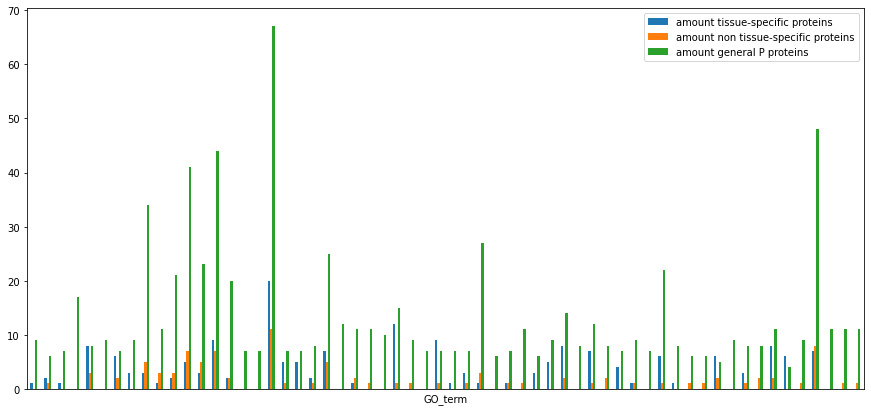

In [117]:
df_count_all_tspec_Skeletal_muscle = []
df_count_all_nontspec_Skeletal_muscle = []
df_count_all_general_Skeletal_muscle = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_Skeletal_muscle_all[GO].sum()
        df_count_all_tspec_Skeletal_muscle.append(count_tspec)
    else:
        df_count_all_tspec_Skeletal_muscle.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_Skeletal_muscle_all[GO].sum()
        df_count_all_nontspec_Skeletal_muscle.append(count_nontspec)
    else:
         df_count_all_nontspec_Skeletal_muscle.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_Skeletal_muscle_all[GO].sum()
        df_count_all_general_Skeletal_muscle.append(count_general)
    else:
        df_count_all_general_Skeletal_muscle.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_Skeletal_muscle_all[GO].sum()
    df_count_all_tspec_Skeletal_muscle.append(count_tspec)
    count_nontspec = nontspec_Skeletal_muscle_all[GO].sum()
    df_count_all_nontspec_Skeletal_muscle.append(count_nontspec)
    count_general = generalP_Skeletal_muscle_all[GO].sum()
    df_count_all_general_Skeletal_muscle.append(count_general)

df_count_all_Skeletal_muscle = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_Skeletal_muscle2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_Skeletal_muscle = df_count_all_Skeletal_muscle.append(df_count_all_Skeletal_muscle2, ignore_index=True)
df_count_all_Skeletal_muscle["amount tissue-specific proteins"] = df_count_all_tspec_Skeletal_muscle
df_count_all_Skeletal_muscle["amount non tissue-specific proteins"] = df_count_all_nontspec_Skeletal_muscle
df_count_all_Skeletal_muscle["amount general P proteins"] = df_count_all_general_Skeletal_muscle
df_count_all_Skeletal_muscle[(df_count_all_Skeletal_muscle["amount tissue-specific proteins"]>5)|(df_count_all_Skeletal_muscle["amount non tissue-specific proteins"]>5)
       |(df_count_all_Skeletal_muscle["amount general P proteins"]>5)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_Skeletal_muscle[(df_count_all_Skeletal_muscle["amount tissue-specific proteins"]>5)|(df_count_all_Skeletal_muscle["amount non tissue-specific proteins"]>5)
       |(df_count_all_Skeletal_muscle["amount general P proteins"]>5)]


### Skin

775


<Figure size 1080x504 with 0 Axes>

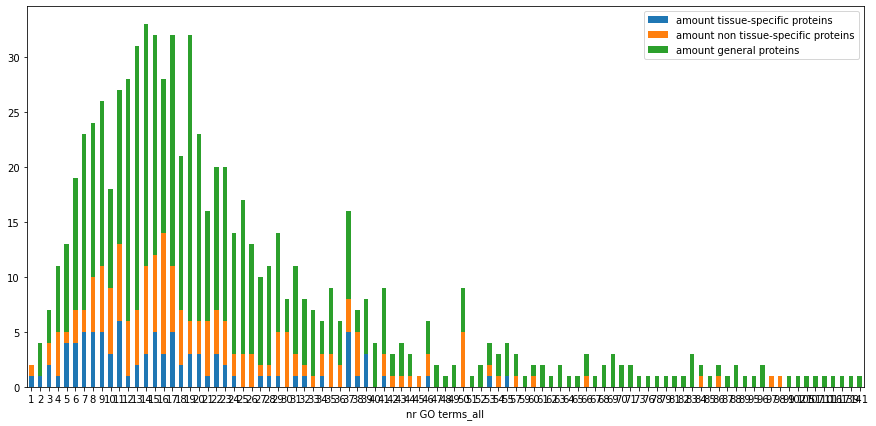

nr GO terms_all  amount tissue-specific proteins  \
0                 1                              1.0   
1                 2                              1.0   
2                 3                              2.0   
3                 4                              1.0   
4                 5                              4.0   
..              ...                              ...   
90              110                              NaN   
91              116                              NaN   
92              117                              NaN   
93              139                              NaN   
94              141                              NaN   

    amount non tissue-specific proteins  amount general proteins  Total  
0                                   1.0                      NaN    2.0  
1                                   NaN                      3.0    4.0  
2                                   2.0                      3.0    7.0  
3                                   4.0                      6.0   11.0  
4                                   1.0                      8.0   13.0  
..                                  ...                      ...    ...  
90                                  NaN                      1.0    1.0  
91                                  NaN                      1.0    1.0  
92                                  NaN                      1.0    1.0  
93                                  NaN                      1.0    1.0  
94                                  NaN                      1.0    1.0  

[95 rows x 5 columns]

In [118]:
print(data_protein[data_protein["Skin"]==1].shape[0])
tspec_Skin_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Skin"]==1]
nontspec_Skin_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Skin"]==1]
generalP_Skin_all = general_P_prot_GO_all[general_P_prot_GO_all["Skin"]==1]
grouped_tspec_Skin = tspec_Skin_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_Skin = nontspec_Skin_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_Skin = generalP_Skin_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_Skin_all1 = pd.merge(grouped_tspec_Skin, grouped_nontspec_Skin, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_Skin_all = pd.merge(grouped_Skin_all1, grouped_general_Skin, how="outer", on=["nr GO terms_all"])
grouped_Skin_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_Skin_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_Skin_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_Skin_all["Total"] = grouped_Skin_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_Skin_all

GO_term  amount tissue-specific proteins  \
30     GO:0000086                                0   
39     GO:0000122                                2   
48     GO:0000139                                4   
56     GO:0000165                                4   
65     GO:0000184                               10   
...           ...                              ...   
11514  GO:1903779                                0   
11732  GO:1904724                                1   
11751  GO:1904813                                2   
11973  GO:1990000                                0   
12161  GO:1990904                                1   

       amount non tissue-specific proteins  amount general P proteins  
30                                       1                         14  
39                                       3                         30  
48                                       7                         16  
56                                       3                         15  
65                                      20                         23  
...                                    ...                        ...  
11514                                    0                          8  
11732                                    0                          8  
11751                                    7                         28  
11973                                    0                          8  
12161                                    7                         38  

[354 rows x 4 columns]

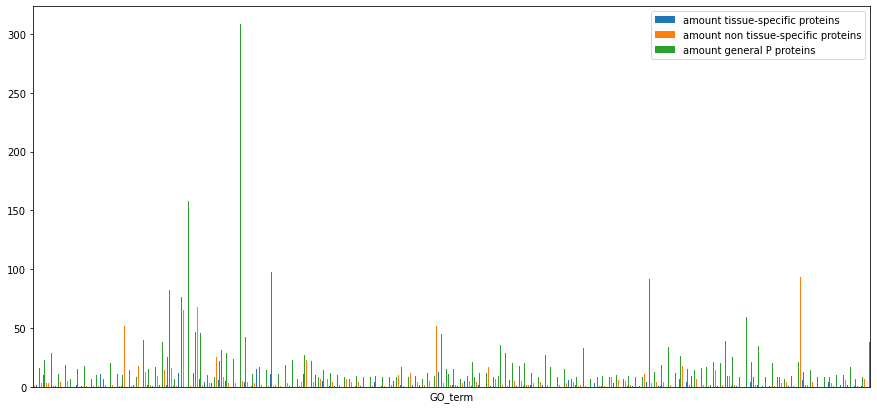

In [119]:
df_count_all_tspec_Skin = []
df_count_all_nontspec_Skin = []
df_count_all_general_Skin = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_Skin_all[GO].sum()
        df_count_all_tspec_Skin.append(count_tspec)
    else:
        df_count_all_tspec_Skin.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_Skin_all[GO].sum()
        df_count_all_nontspec_Skin.append(count_nontspec)
    else:
         df_count_all_nontspec_Skin.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_Skin_all[GO].sum()
        df_count_all_general_Skin.append(count_general)
    else:
        df_count_all_general_Skin.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_Skin_all[GO].sum()
    df_count_all_tspec_Skin.append(count_tspec)
    count_nontspec = nontspec_Skin_all[GO].sum()
    df_count_all_nontspec_Skin.append(count_nontspec)
    count_general = generalP_Skin_all[GO].sum()
    df_count_all_general_Skin.append(count_general)

df_count_all_Skin = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_Skin2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_Skin = df_count_all_Skin.append(df_count_all_Skin2, ignore_index=True)
df_count_all_Skin["amount tissue-specific proteins"] = df_count_all_tspec_Skin
df_count_all_Skin["amount non tissue-specific proteins"] = df_count_all_nontspec_Skin
df_count_all_Skin["amount general P proteins"] = df_count_all_general_Skin
df_count_all_Skin[(df_count_all_Skin["amount tissue-specific proteins"]>=7)|(df_count_all_Skin["amount non tissue-specific proteins"]>=7)
       |(df_count_all_Skin["amount general P proteins"]>=7)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_Skin[(df_count_all_Skin["amount tissue-specific proteins"]>=7)|(df_count_all_Skin["amount non tissue-specific proteins"]>=7)
       |(df_count_all_Skin["amount general P proteins"]>=7)]


### Small intestine

214


<Figure size 1080x504 with 0 Axes>

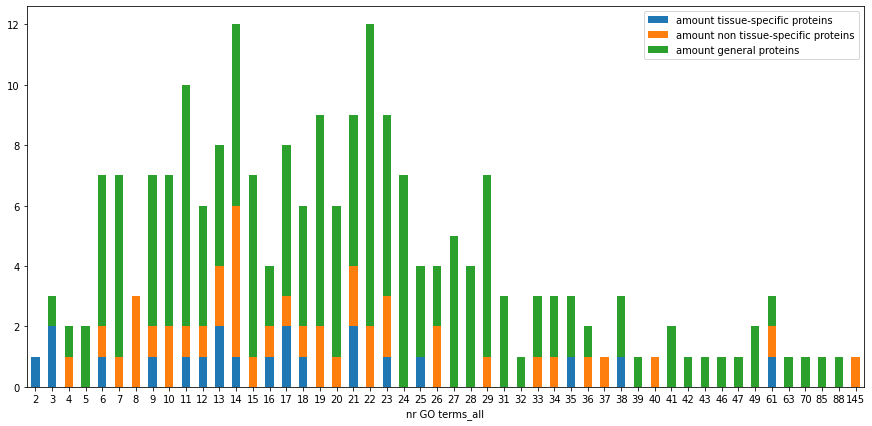

nr GO terms_all  amount tissue-specific proteins  \
0                 2                              1.0   
1                 3                              2.0   
17                4                              NaN   
33                5                              NaN   
2                 6                              1.0   
18                7                              NaN   
19                8                              NaN   
3                 9                              1.0   
20               10                              NaN   
4                11                              1.0   
5                12                              1.0   
6                13                              2.0   
7                14                              1.0   
21               15                              NaN   
8                16                              1.0   
9                17                              2.0   
10               18                              1.0   
22               19                              NaN   
23               20                              NaN   
11               21                              2.0   
24               22                              NaN   
12               23                              1.0   
34               24                              NaN   
13               25                              1.0   
25               26                              NaN   
35               27                              NaN   
36               28                              NaN   
26               29                              NaN   
37               31                              NaN   
38               32                              NaN   
27               33                              NaN   
28               34                              NaN   
14               35                              1.0   
29               36                              NaN   
30               37                              NaN   
15               38                              1.0   
39               39                              NaN   
31               40                              NaN   
40               41                              NaN   
41               42                              NaN   
42               43                              NaN   
43               46                              NaN   
44               47                              NaN   
45               49                              NaN   
16               61                              1.0   
46               63                              NaN   
47               70                              NaN   
48               85                              NaN   
49               88                              NaN   
32              145                              NaN   

    amount non tissue-specific proteins  amount general proteins  Total  
0                                   NaN                      NaN    1.0  
1                                   NaN                      1.0    3.0  
17                                  1.0                      1.0    2.0  
33                                  NaN                      2.0    2.0  
2                                   1.0                      5.0    7.0  
18                                  1.0                      6.0    7.0  
19                                  3.0                      NaN    3.0  
3                                   1.0                      5.0    7.0  
20                                  2.0                      5.0    7.0  
4                                   1.0                      8.0   10.0  
5                                   1.0                      4.0    6.0  
6                                   2.0                      4.0    8.0  
7                                   5.0                      6.0   12.0  
21                                  1.0                      6.0    7.0  
8                                   1

In [120]:
print(data_protein[data_protein["Small intestine"]==1].shape[0])
tspec_Small_intestine_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Small intestine"]==1]
nontspec_Small_intestine_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Small intestine"]==1]
generalP_Small_intestine_all = general_P_prot_GO_all[general_P_prot_GO_all["Small intestine"]==1]
grouped_tspec_Small_intestine = tspec_Small_intestine_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_Small_intestine = nontspec_Small_intestine_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_Small_intestine = generalP_Small_intestine_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_Small_intestine_all1 = pd.merge(grouped_tspec_Small_intestine, grouped_nontspec_Small_intestine, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_Small_intestine_all = pd.merge(grouped_Small_intestine_all1, grouped_general_Small_intestine, how="outer", on=["nr GO terms_all"])
grouped_Small_intestine_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_Small_intestine_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_Small_intestine_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_Small_intestine_all["Total"] = grouped_Small_intestine_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_Small_intestine_all

GO_term  amount tissue-specific proteins  \
9      GO:0000027                                0   
30     GO:0000086                                0   
39     GO:0000122                                0   
50     GO:0000146                                1   
65     GO:0000184                                0   
...           ...                              ...   
11751  GO:1904813                                0   
11973  GO:1990000                                0   
12161  GO:1990904                                0   
12366  GO:2000582                                0   
12520  GO:2001205                                0   

       amount non tissue-specific proteins  amount general P proteins  
9                                        0                          2  
30                                       0                          4  
39                                       2                          2  
50                                       0                          3  
65                                       3                          8  
...                                    ...                        ...  
11751                                    2                          7  
11973                                    2                          1  
12161                                    1                         10  
12366                                    0                          2  
12520                                    2                          0  

[504 rows x 4 columns]

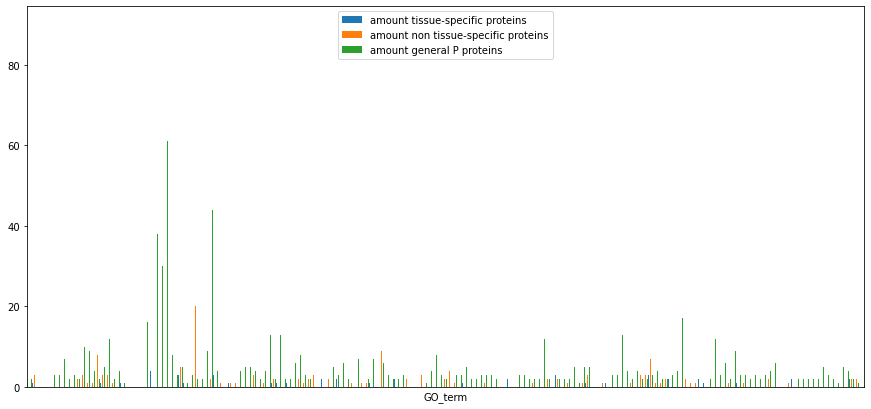

In [121]:
df_count_all_tspec_Small_intestine = []
df_count_all_nontspec_Small_intestine = []
df_count_all_general_Small_intestine = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_Small_intestine_all[GO].sum()
        df_count_all_tspec_Small_intestine.append(count_tspec)
    else:
        df_count_all_tspec_Small_intestine.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_Small_intestine_all[GO].sum()
        df_count_all_nontspec_Small_intestine.append(count_nontspec)
    else:
         df_count_all_nontspec_Small_intestine.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_Small_intestine_all[GO].sum()
        df_count_all_general_Small_intestine.append(count_general)
    else:
        df_count_all_general_Small_intestine.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_Small_intestine_all[GO].sum()
    df_count_all_tspec_Small_intestine.append(count_tspec)
    count_nontspec = nontspec_Small_intestine_all[GO].sum()
    df_count_all_nontspec_Small_intestine.append(count_nontspec)
    count_general = generalP_Small_intestine_all[GO].sum()
    df_count_all_general_Small_intestine.append(count_general)

df_count_all_Small_intestine = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_Small_intestine2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_Small_intestine = df_count_all_Small_intestine.append(df_count_all_Small_intestine2, ignore_index=True)
df_count_all_Small_intestine["amount tissue-specific proteins"] = df_count_all_tspec_Small_intestine
df_count_all_Small_intestine["amount non tissue-specific proteins"] = df_count_all_nontspec_Small_intestine
df_count_all_Small_intestine["amount general P proteins"] = df_count_all_general_Small_intestine
df_count_all_Small_intestine[(df_count_all_Small_intestine["amount tissue-specific proteins"]>1)|(df_count_all_Small_intestine["amount non tissue-specific proteins"]>1)
       |(df_count_all_Small_intestine["amount general P proteins"]>1)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_Small_intestine[(df_count_all_Small_intestine["amount tissue-specific proteins"]>1)|(df_count_all_Small_intestine["amount non tissue-specific proteins"]>1)
       |(df_count_all_Small_intestine["amount general P proteins"]>1)]

### Synovial tissue

11


<Figure size 1080x504 with 0 Axes>

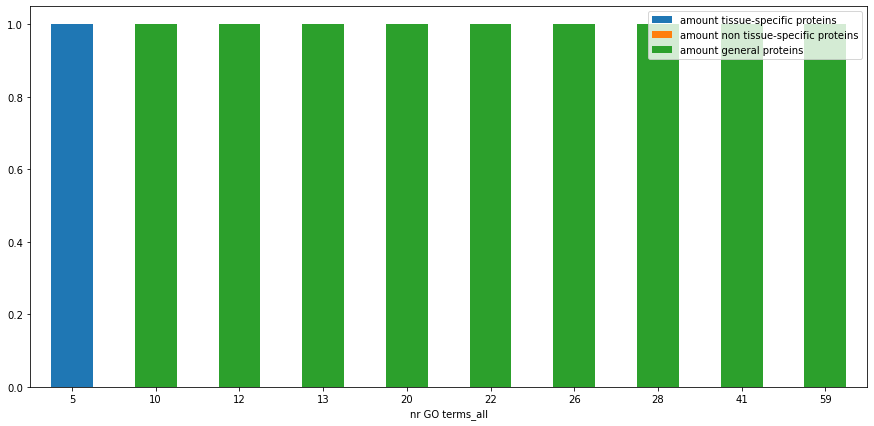

nr GO terms_all  amount tissue-specific proteins  \
0                5                              1.0   
1               10                              NaN   
2               12                              NaN   
3               13                              NaN   
4               20                              NaN   
5               22                              NaN   
6               26                              NaN   
7               28                              NaN   
8               41                              NaN   
9               59                              NaN   

   amount non tissue-specific proteins  amount general proteins  Total  
0                                  NaN                      NaN    1.0  
1                                  NaN                      1.0    1.0  
2                                  NaN                      1.0    1.0  
3                                  NaN                      1.0    1.0  
4                                  NaN                      1.0    1.0  
5                                  NaN                      1.0    1.0  
6                                  NaN                      1.0    1.0  
7                                  NaN                      1.0    1.0  
8                                  NaN                      1.0    1.0  
9                                  NaN                      1.0    1.0

In [122]:
print(data_protein[data_protein["Synovial tissue"]==1].shape[0])
tspec_Synovial_tissue_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Synovial tissue"]==1]
nontspec_Synovial_tissue_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Synovial tissue"]==1]
generalP_Synovial_tissue_all = general_P_prot_GO_all[general_P_prot_GO_all["Synovial tissue"]==1]
grouped_tspec_Synovial_tissue = tspec_Synovial_tissue_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_Synovial_tissue = nontspec_Synovial_tissue_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_Synovial_tissue = generalP_Synovial_tissue_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_Synovial_tissue_all1 = pd.merge(grouped_tspec_Synovial_tissue, grouped_nontspec_Synovial_tissue, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_Synovial_tissue_all = pd.merge(grouped_Synovial_tissue_all1, grouped_general_Synovial_tissue, how="outer", on=["nr GO terms_all"])
grouped_Synovial_tissue_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_Synovial_tissue_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_Synovial_tissue_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_Synovial_tissue_all["Total"] = grouped_Synovial_tissue_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_Synovial_tissue_all


In [123]:
df_count_all_tspec_Synovial_tissue = []
df_count_all_nontspec_Synovial_tissue = []
df_count_all_general_Synovial_tissue = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_Synovial_tissue_all[GO].sum()
        df_count_all_tspec_Synovial_tissue.append(count_tspec)
    else:
        df_count_all_tspec_Synovial_tissue.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_Synovial_tissue_all[GO].sum()
        df_count_all_nontspec_Synovial_tissue.append(count_nontspec)
    else:
         df_count_all_nontspec_Synovial_tissue.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_Synovial_tissue_all[GO].sum()
        df_count_all_general_Synovial_tissue.append(count_general)
    else:
        df_count_all_general_Synovial_tissue.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_Synovial_tissue_all[GO].sum()
    df_count_all_tspec_Synovial_tissue.append(count_tspec)
    count_nontspec = nontspec_Synovial_tissue_all[GO].sum()
    df_count_all_nontspec_Synovial_tissue.append(count_nontspec)
    count_general = generalP_Synovial_tissue_all[GO].sum()
    df_count_all_general_Synovial_tissue.append(count_general)

df_count_all_Synovial_tissue = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_Synovial_tissue2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_Synovial_tissue = df_count_all_Synovial_tissue.append(df_count_all_Synovial_tissue2, ignore_index=True)
df_count_all_Synovial_tissue["amount tissue-specific proteins"] = df_count_all_tspec_Synovial_tissue
df_count_all_Synovial_tissue["amount non tissue-specific proteins"] = df_count_all_nontspec_Synovial_tissue
df_count_all_Synovial_tissue["amount general P proteins"] = df_count_all_general_Synovial_tissue

df_count_all_Synovial_tissue[(df_count_all_Synovial_tissue["amount tissue-specific proteins"]>0)|(df_count_all_Synovial_tissue["amount non tissue-specific proteins"]>0)
       |(df_count_all_Synovial_tissue["amount general P proteins"]>0)]


GO_term  amount tissue-specific proteins  \
294    GO:0001501                                0   
307    GO:0001525                                0   
439    GO:0001849                                0   
478    GO:0001932                                0   
526    GO:0002020                                0   
...           ...                              ...   
10997  GO:1901166                                0   
11122  GO:1902042                                0   
11620  GO:1904237                                0   
12294  GO:2000352                                0   
12321  GO:2000427                                0   

       amount non tissue-specific proteins  amount general P proteins  
294                                      0                          1  
307                                      0                          1  
439                                      0                          1  
478                                      0                          1  
526                                      0                          1  
...                                    ...                        ...  
10997                                    0                          1  
11122                                    0                          1  
11620                                    0                          1  
12294                                    0                          1  
12321                                    0                          1  

[144 rows x 4 columns]

### T-cells

In [124]:
print(data_protein[data_protein["T-cells"]==1].shape[0])
tspec_T_cells_all = t_spec_prot_GO_all[t_spec_prot_GO_all["T-cells"]==1]
nontspec_T_cells_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["T-cells"]==1]
generalP_T_cells_all = general_P_prot_GO_all[general_P_prot_GO_all["T-cells"]==1]
grouped_tspec_T_cells = tspec_T_cells_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_T_cells = nontspec_T_cells_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_T_cells = generalP_T_cells_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_T_cells_all1 = pd.merge(grouped_tspec_T_cells, grouped_nontspec_T_cells, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_T_cells_all = pd.merge(grouped_T_cells_all1, grouped_general_T_cells, how="outer", on=["nr GO terms_all"])
grouped_T_cells_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_T_cells_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_T_cells_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_T_cells_all["Total"] = grouped_T_cells_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_T_cells_all


10


<Figure size 1080x504 with 0 Axes>

amount tissue-specific proteins  nr GO terms_all  \
2                              NaN                6   
3                              NaN                7   
0                              NaN                8   
1                              NaN               14   
4                              NaN               22   
5                              NaN               23   
6                              NaN               24   
7                              NaN               26   
8                              NaN               47   
9                              NaN               49   

   amount non tissue-specific proteins  amount general proteins  Total  
2                                  NaN                      1.0    1.0  
3                                  NaN                      1.0    1.0  
0                                  1.0                      NaN    1.0  
1                                  1.0                      NaN    1.0  
4                                  NaN                      1.0    1.0  
5                                  NaN                      1.0    1.0  
6                                  NaN                      1.0    1.0  
7                                  NaN                      1.0    1.0  
8                                  NaN                      1.0    1.0  
9                                  NaN                      1.0    1.0

In [125]:
df_count_all_tspec_T_cells = []
df_count_all_nontspec_T_cells = []
df_count_all_general_T_cells = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_T_cells_all[GO].sum()
        df_count_all_tspec_T_cells.append(count_tspec)
    else:
        df_count_all_tspec_T_cells.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_T_cells_all[GO].sum()
        df_count_all_nontspec_T_cells.append(count_nontspec)
    else:
         df_count_all_nontspec_T_cells.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_T_cells_all[GO].sum()
        df_count_all_general_T_cells.append(count_general)
    else:
        df_count_all_general_T_cells.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_T_cells_all[GO].sum()
    df_count_all_tspec_T_cells.append(count_tspec)
    count_nontspec = nontspec_T_cells_all[GO].sum()
    df_count_all_nontspec_T_cells.append(count_nontspec)
    count_general = generalP_T_cells_all[GO].sum()
    df_count_all_general_T_cells.append(count_general)

df_count_all_T_cells = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_T_cells2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_T_cells = df_count_all_T_cells.append(df_count_all_T_cells2, ignore_index=True)
df_count_all_T_cells["amount tissue-specific proteins"] = df_count_all_tspec_T_cells
df_count_all_T_cells["amount non tissue-specific proteins"] = df_count_all_nontspec_T_cells
df_count_all_T_cells["amount general P proteins"] = df_count_all_general_T_cells

df_count_all_T_cells[(df_count_all_T_cells["amount tissue-specific proteins"]>0)|(df_count_all_T_cells["amount non tissue-specific proteins"]>0)
       |(df_count_all_T_cells["amount general P proteins"]>0)]


GO_term  amount tissue-specific proteins  \
39     GO:0000122                                0   
128    GO:0000398                                0   
248    GO:0000977                                0   
289    GO:0001227                                0   
294    GO:0001501                                0   
...           ...                              ...   
12294  GO:2000352                                0   
12485  GO:2001045                                0   
12523  GO:2001222                                0   
12535  GO:2001240                                0   
12536  GO:2001241                                0   

       amount non tissue-specific proteins  amount general P proteins  
39                                       1                          0  
128                                      0                          1  
248                                      1                          0  
289                                      1                          0  
294                                      0                          1  
...                                    ...                        ...  
12294                                    0                          1  
12485                                    0                          1  
12523                                    0                          1  
12535                                    0                          1  
12536                                    0                          1  

[172 rows x 4 columns]

### Testis

In [126]:
print(data_protein[data_protein["Testis"]==1].shape[0])
tspec_Testis_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Testis"]==1]
nontspec_Testis_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Testis"]==1]
generalP_Testis_all = general_P_prot_GO_all[general_P_prot_GO_all["Testis"]==1]
grouped_tspec_Testis = tspec_Testis_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_Testis = nontspec_Testis_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_Testis = generalP_Testis_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_Testis_all1 = pd.merge(grouped_tspec_Testis, grouped_nontspec_Testis, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_Testis_all = pd.merge(grouped_Testis_all1, grouped_general_Testis, how="outer", on=["nr GO terms_all"])
grouped_Testis_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_Testis_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_Testis_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_Testis_all["Total"] = grouped_Testis_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_Testis_all

689


<Figure size 1080x504 with 0 Axes>

nr GO terms_all  amount tissue-specific proteins  \
0                 1                              4.0   
1                 2                              3.0   
2                 3                              2.0   
3                 4                              6.0   
4                 5                              4.0   
..              ...                              ...   
85              116                              NaN   
43              143                              NaN   
44              145                              NaN   
45              152                              NaN   
86              185                              NaN   

    amount non tissue-specific proteins  amount general proteins  Total  
0                                   4.0                      7.0   15.0  
1                                   1.0                      5.0    9.0  
2                                   2.0                      2.0    6.0  
3                                   3.0                     12.0   21.0  
4                                   4.0                     10.0   18.0  
..                                  ...                      ...    ...  
85                                  NaN                      1.0    1.0  
43                                  1.0                      NaN    1.0  
44                                  1.0                      NaN    1.0  
45                                  1.0                      NaN    1.0  
86                                  NaN                      1.0    1.0  

[87 rows x 5 columns]

GO_term  amount tissue-specific proteins  \
30     GO:0000086                                0   
39     GO:0000122                                1   
48     GO:0000139                                0   
56     GO:0000165                                0   
68     GO:0000187                                0   
...           ...                              ...   
10885  GO:1900034                                0   
11078  GO:1901796                                0   
11352  GO:1903078                                0   
11751  GO:1904813                                0   
12161  GO:1990904                                0   

       amount non tissue-specific proteins  amount general P proteins  
30                                       3                         16  
39                                       4                         20  
48                                       3                         13  
56                                       2                         14  
68                                       3                          7  
...                                    ...                        ...  
10885                                    2                         19  
11078                                    2                         10  
11352                                    1                          7  
11751                                    3                         16  
12161                                    0                         21  

[306 rows x 4 columns]

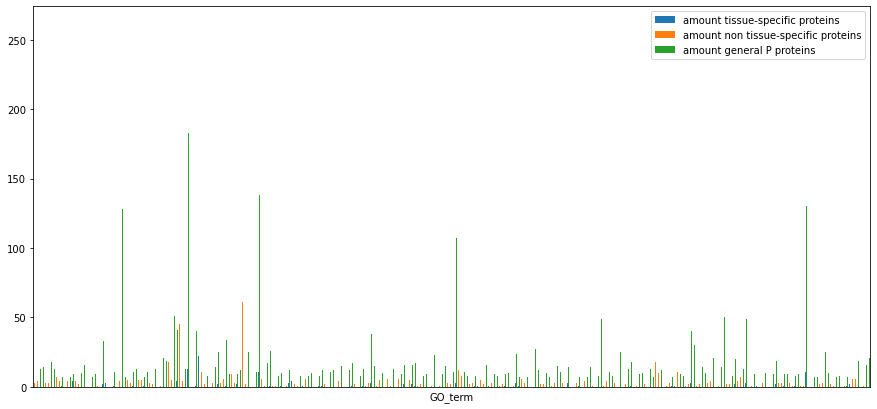

In [127]:
df_count_all_tspec_Testis = []
df_count_all_nontspec_Testis = []
df_count_all_general_Testis = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_Testis_all[GO].sum()
        df_count_all_tspec_Testis.append(count_tspec)
    else:
        df_count_all_tspec_Testis.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_Testis_all[GO].sum()
        df_count_all_nontspec_Testis.append(count_nontspec)
    else:
         df_count_all_nontspec_Testis.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_Testis_all[GO].sum()
        df_count_all_general_Testis.append(count_general)
    else:
        df_count_all_general_Testis.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_Testis_all[GO].sum()
    df_count_all_tspec_Testis.append(count_tspec)
    count_nontspec = nontspec_Testis_all[GO].sum()
    df_count_all_nontspec_Testis.append(count_nontspec)
    count_general = generalP_Testis_all[GO].sum()
    df_count_all_general_Testis.append(count_general)

df_count_all_Testis = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_Testis2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_Testis = df_count_all_Testis.append(df_count_all_Testis2, ignore_index=True)
df_count_all_Testis["amount tissue-specific proteins"] = df_count_all_tspec_Testis
df_count_all_Testis["amount non tissue-specific proteins"] = df_count_all_nontspec_Testis
df_count_all_Testis["amount general P proteins"] = df_count_all_general_Testis
df_count_all_Testis[(df_count_all_Testis["amount tissue-specific proteins"]>=7)|(df_count_all_Testis["amount non tissue-specific proteins"]>=7)
       |(df_count_all_Testis["amount general P proteins"]>=7)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_Testis[(df_count_all_Testis["amount tissue-specific proteins"]>=7)|(df_count_all_Testis["amount non tissue-specific proteins"]>=7)
       |(df_count_all_Testis["amount general P proteins"]>=7)]


### Tooth

1


<Figure size 1080x504 with 0 Axes>

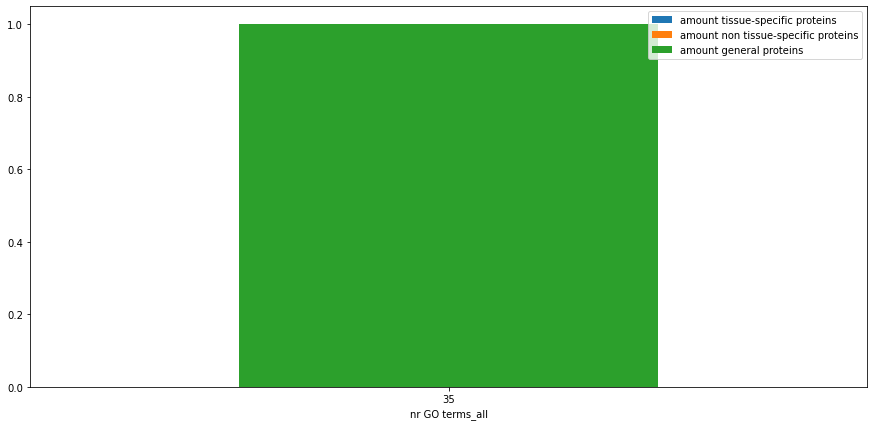

amount tissue-specific proteins  amount non tissue-specific proteins  \
0                              NaN                                  NaN   

   nr GO terms_all  amount general proteins  Total  
0               35                        1    1.0

In [128]:
print(data_protein[data_protein["Tooth"]==1].shape[0])
tspec_Tooth_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Tooth"]==1]
nontspec_Tooth_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Tooth"]==1]
generalP_Tooth_all = general_P_prot_GO_all[general_P_prot_GO_all["Tooth"]==1]
grouped_tspec_Tooth = tspec_Tooth_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_Tooth = nontspec_Tooth_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_Tooth = generalP_Tooth_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_Tooth_all1 = pd.merge(grouped_tspec_Tooth, grouped_nontspec_Tooth, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_Tooth_all = pd.merge(grouped_Tooth_all1, grouped_general_Tooth, how="outer", on=["nr GO terms_all"])
grouped_Tooth_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_Tooth_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_Tooth_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_Tooth_all["Total"] = grouped_Tooth_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_Tooth_all

In [129]:
df_count_all_tspec_Tooth = []
df_count_all_nontspec_Tooth = []
df_count_all_general_Tooth = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_Tooth_all[GO].sum()
        df_count_all_tspec_Tooth.append(count_tspec)
    else:
        df_count_all_tspec_Tooth.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_Tooth_all[GO].sum()
        df_count_all_nontspec_Tooth.append(count_nontspec)
    else:
         df_count_all_nontspec_Tooth.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_Tooth_all[GO].sum()
        df_count_all_general_Tooth.append(count_general)
    else:
        df_count_all_general_Tooth.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_Tooth_all[GO].sum()
    df_count_all_tspec_Tooth.append(count_tspec)
    count_nontspec = nontspec_Tooth_all[GO].sum()
    df_count_all_nontspec_Tooth.append(count_nontspec)
    count_general = generalP_Tooth_all[GO].sum()
    df_count_all_general_Tooth.append(count_general)

df_count_all_Tooth = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_Tooth2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_Tooth = df_count_all_Tooth.append(df_count_all_Tooth2, ignore_index=True)
df_count_all_Tooth["amount tissue-specific proteins"] = df_count_all_tspec_Tooth
df_count_all_Tooth["amount non tissue-specific proteins"] = df_count_all_nontspec_Tooth
df_count_all_Tooth["amount general P proteins"] = df_count_all_general_Tooth

df_count_all_Tooth[(df_count_all_Tooth["amount tissue-specific proteins"]>=1)|(df_count_all_Tooth["amount non tissue-specific proteins"]>1)
       |(df_count_all_Tooth["amount general P proteins"]>=1)]


GO_term  amount tissue-specific proteins  \
294   GO:0001501                                0   
329   GO:0001568                                0   
526   GO:0002020                                0   
1427  GO:0005201                                0   
1518  GO:0005576                                0   
1523  GO:0005584                                0   
1539  GO:0005615                                0   
1616  GO:0005783                                0   
1619  GO:0005788                                0   
2285  GO:0007179                                0   
2336  GO:0007266                                0   
2409  GO:0007596                                0   
2517  GO:0008217                                0   
3798  GO:0019221                                0   
4133  GO:0030020                                0   
4214  GO:0030168                                0   
4230  GO:0030198                                0   
4231  GO:0030199                                0   
4270  GO:0030282                                0   
4408  GO:0030674                                0   
4502  GO:0031012                                0   
5207  GO:0032963                                0   
6362  GO:0042476                                0   
6464  GO:0042802                                0   
6745  GO:0043589                                0   
7323  GO:0046332                                0   
7453  GO:0046872                                0   
7683  GO:0048407                                0   
7925  GO:0050776                                0   
7990  GO:0050900                                0   
9018  GO:0062023                                0   
9064  GO:0070062                                0   
9121  GO:0070208                                0   
9444  GO:0071230                                0   
9907  GO:0085029                                0   

      amount non tissue-specific proteins  amount general P proteins  
294                                     0                          1  
329                                     0                          1  
526                                     0                          1  
1427                                    0                          1  
1518                                    0                          1  
1523                                    0                          1  
1539                                    0                          1  
1616                                    0                          1  
1619                                    0                          1  
2285                                    0                          1  
2336                                    0                          1  
2409                                    0                          1  
2517                                    0                          1  
3798                                    0                          1  
4133                                    0                          1  
4214                                    0                          1  
4230                                    0                          1  
4231                                    0                          1  
4270                                    0                          1  
4408                                    0                          1  
4502                                    0                          1  
5207                                    0                          1  
6362                                    0                          1  
6464                                    0                          1  
6745                                    0                          1  
7323                                    0                          1  
7453                                    0                          1  
7683                                    0                          1  
7925                                    0

### Umbilical cord

640


<Figure size 1080x504 with 0 Axes>

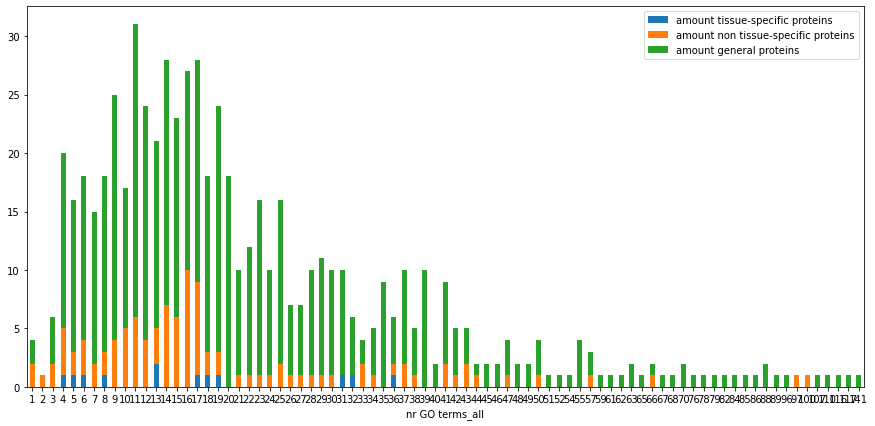

nr GO terms_all  amount tissue-specific proteins  \
11                1                              NaN   
12                2                              NaN   
13                3                              NaN   
0                 4                              1.0   
1                 5                              1.0   
..              ...                              ...   
76              107                              NaN   
77              110                              NaN   
78              116                              NaN   
79              117                              NaN   
80              141                              NaN   

    amount non tissue-specific proteins  amount general proteins  Total  
11                                  2.0                      2.0    4.0  
12                                  1.0                      NaN    1.0  
13                                  2.0                      4.0    6.0  
0                                   4.0                     15.0   20.0  
1                                   2.0                     13.0   16.0  
..                                  ...                      ...    ...  
76                                  NaN                      1.0    1.0  
77                                  NaN                      1.0    1.0  
78                                  NaN                      1.0    1.0  
79                                  NaN                      1.0    1.0  
80                                  NaN                      1.0    1.0  

[81 rows x 5 columns]

In [130]:
print(data_protein[data_protein["Umbilical cord"]==1].shape[0])
tspec_Umbilical_cord_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Umbilical cord"]==1]
nontspec_Umbilical_cord_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Umbilical cord"]==1]
generalP_Umbilical_cord_all = general_P_prot_GO_all[general_P_prot_GO_all["Umbilical cord"]==1]
grouped_tspec_Umbilical_cord = tspec_Umbilical_cord_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_Umbilical_cord = nontspec_Umbilical_cord_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_Umbilical_cord = generalP_Umbilical_cord_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_Umbilical_cord_all1 = pd.merge(grouped_tspec_Umbilical_cord, grouped_nontspec_Umbilical_cord, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_Umbilical_cord_all = pd.merge(grouped_Umbilical_cord_all1, grouped_general_Umbilical_cord, how="outer", on=["nr GO terms_all"])
grouped_Umbilical_cord_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_Umbilical_cord_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_Umbilical_cord_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_Umbilical_cord_all["Total"] = grouped_Umbilical_cord_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_Umbilical_cord_all


GO_term  amount tissue-specific proteins  \
30     GO:0000086                                0   
39     GO:0000122                                1   
48     GO:0000139                                0   
56     GO:0000165                                0   
65     GO:0000184                                1   
...           ...                              ...   
10695  GO:0106310                                0   
10696  GO:0106311                                0   
10885  GO:1900034                                0   
11751  GO:1904813                                0   
12161  GO:1990904                                0   

       amount non tissue-specific proteins  amount general P proteins  
30                                       1                         12  
39                                       1                         27  
48                                       5                         12  
56                                       2                         16  
65                                      14                         20  
...                                    ...                        ...  
10695                                    2                         15  
10696                                    2                         15  
10885                                    0                         13  
11751                                    1                         26  
12161                                    6                         43  

[181 rows x 4 columns]

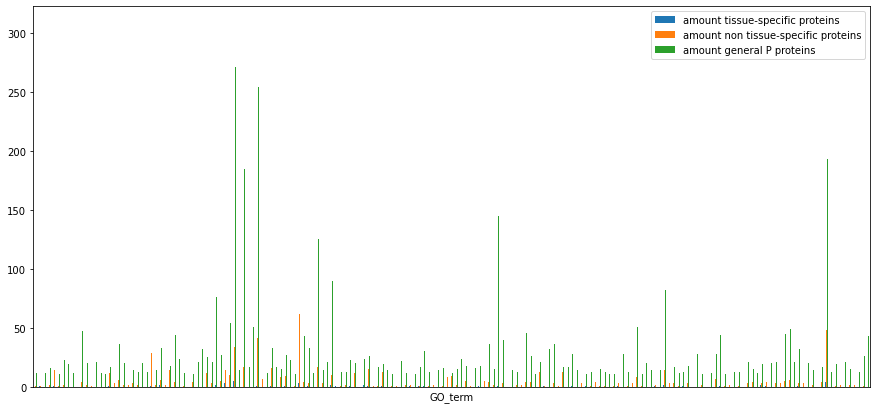

In [131]:
df_count_all_tspec_Umbilical_cord = []
df_count_all_nontspec_Umbilical_cord = []
df_count_all_general_Umbilical_cord = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_Umbilical_cord_all[GO].sum()
        df_count_all_tspec_Umbilical_cord.append(count_tspec)
    else:
        df_count_all_tspec_Umbilical_cord.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_Umbilical_cord_all[GO].sum()
        df_count_all_nontspec_Umbilical_cord.append(count_nontspec)
    else:
         df_count_all_nontspec_Umbilical_cord.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_Umbilical_cord_all[GO].sum()
        df_count_all_general_Umbilical_cord.append(count_general)
    else:
        df_count_all_general_Umbilical_cord.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_Umbilical_cord_all[GO].sum()
    df_count_all_tspec_Umbilical_cord.append(count_tspec)
    count_nontspec = nontspec_Umbilical_cord_all[GO].sum()
    df_count_all_nontspec_Umbilical_cord.append(count_nontspec)
    count_general = generalP_Umbilical_cord_all[GO].sum()
    df_count_all_general_Umbilical_cord.append(count_general)

df_count_all_Umbilical_cord = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_Umbilical_cord2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_Umbilical_cord = df_count_all_Umbilical_cord.append(df_count_all_Umbilical_cord2, ignore_index=True)
df_count_all_Umbilical_cord["amount tissue-specific proteins"] = df_count_all_tspec_Umbilical_cord
df_count_all_Umbilical_cord["amount non tissue-specific proteins"] = df_count_all_nontspec_Umbilical_cord
df_count_all_Umbilical_cord["amount general P proteins"] = df_count_all_general_Umbilical_cord
df_count_all_Umbilical_cord[(df_count_all_Umbilical_cord["amount tissue-specific proteins"]>10)|(df_count_all_Umbilical_cord["amount non tissue-specific proteins"]>10)
       |(df_count_all_Umbilical_cord["amount general P proteins"]>10)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_Umbilical_cord[(df_count_all_Umbilical_cord["amount tissue-specific proteins"]>10)|(df_count_all_Umbilical_cord["amount non tissue-specific proteins"]>10)
       |(df_count_all_Umbilical_cord["amount general P proteins"]>10)]


### Ureter

28


<Figure size 1080x504 with 0 Axes>

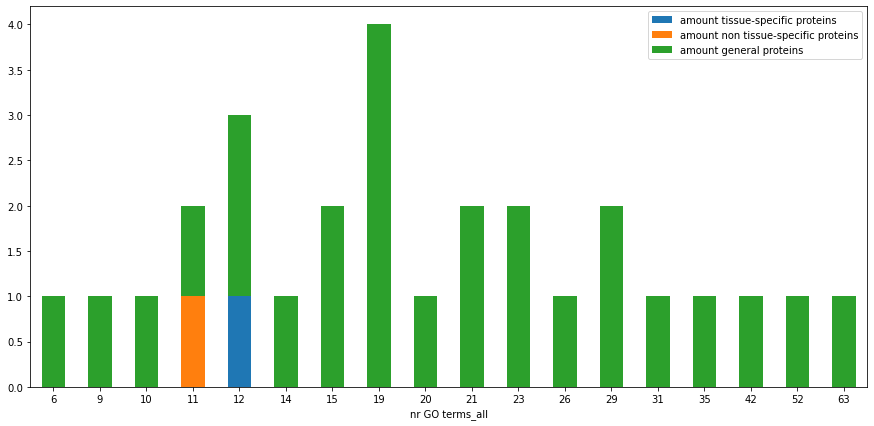

nr GO terms_all  amount tissue-specific proteins  \
2                 6                              NaN   
3                 9                              NaN   
4                10                              NaN   
1                11                              NaN   
0                12                              1.0   
5                14                              NaN   
6                15                              NaN   
7                19                              NaN   
8                20                              NaN   
9                21                              NaN   
10               23                              NaN   
11               26                              NaN   
12               29                              NaN   
13               31                              NaN   
14               35                              NaN   
15               42                              NaN   
16               52                              NaN   
17               63                              NaN   

    amount non tissue-specific proteins  amount general proteins  Total  
2                                   NaN                        1    1.0  
3                                   NaN                        1    1.0  
4                                   NaN                        1    1.0  
1                                   1.0                        1    2.0  
0                                   NaN                        2    3.0  
5                                   NaN                        1    1.0  
6                                   NaN                        2    2.0  
7                                   NaN                        4    4.0  
8                                   NaN                        1    1.0  
9                                   NaN                        2    2.0  
10                                  NaN                        2    2.0  
11                                  NaN                        1    1.0  
12                                  NaN                        2    2.0  
13                                  NaN                        1    1.0  
14                                  NaN                        1    1.0  
15                                  NaN                        1    1.0  
16                                  NaN                        1    1.0  
17                                  NaN                        1    1.0

In [132]:
print(data_protein[data_protein["Ureter"]==1].shape[0])
tspec_Ureter_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Ureter"]==1]
nontspec_Ureter_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Ureter"]==1]
generalP_Ureter_all = general_P_prot_GO_all[general_P_prot_GO_all["Ureter"]==1]
grouped_tspec_Ureter = tspec_Ureter_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_Ureter = nontspec_Ureter_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_Ureter = generalP_Ureter_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_Ureter_all1 = pd.merge(grouped_tspec_Ureter, grouped_nontspec_Ureter, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_Ureter_all = pd.merge(grouped_Ureter_all1, grouped_general_Ureter, how="outer", on=["nr GO terms_all"])
grouped_Ureter_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_Ureter_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_Ureter_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_Ureter_all["Total"] = grouped_Ureter_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_Ureter_all

GO_term  amount tissue-specific proteins  \
39     GO:0000122                                0   
375    GO:0001725                                0   
411    GO:0001786                                0   
928    GO:0003723                                0   
943    GO:0003779                                0   
...           ...                              ...   
9018   GO:0062023                                0   
9064   GO:0070062                                0   
9235   GO:0070527                                0   
11732  GO:1904724                                0   
11751  GO:1904813                                0   

       amount non tissue-specific proteins  amount general P proteins  
39                                       0                          2  
375                                      0                          3  
411                                      0                          2  
928                                      0                          5  
943                                      0                          9  
...                                    ...                        ...  
9018                                     0                          2  
9064                                     0                         11  
9235                                     0                          3  
11732                                    0                          2  
11751                                    0                          2  

[71 rows x 4 columns]

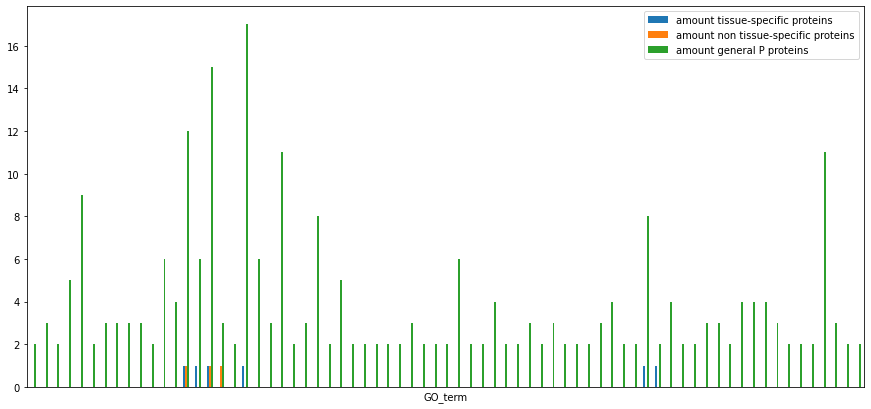

In [133]:
df_count_all_tspec_Ureter = []
df_count_all_nontspec_Ureter = []
df_count_all_general_Ureter = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_Ureter_all[GO].sum()
        df_count_all_tspec_Ureter.append(count_tspec)
    else:
        df_count_all_tspec_Ureter.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_Ureter_all[GO].sum()
        df_count_all_nontspec_Ureter.append(count_nontspec)
    else:
         df_count_all_nontspec_Ureter.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_Ureter_all[GO].sum()
        df_count_all_general_Ureter.append(count_general)
    else:
        df_count_all_general_Ureter.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_Ureter_all[GO].sum()
    df_count_all_tspec_Ureter.append(count_tspec)
    count_nontspec = nontspec_Ureter_all[GO].sum()
    df_count_all_nontspec_Ureter.append(count_nontspec)
    count_general = generalP_Ureter_all[GO].sum()
    df_count_all_general_Ureter.append(count_general)

df_count_all_Ureter = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_Ureter2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_Ureter = df_count_all_Ureter.append(df_count_all_Ureter2, ignore_index=True)
df_count_all_Ureter["amount tissue-specific proteins"] = df_count_all_tspec_Ureter
df_count_all_Ureter["amount non tissue-specific proteins"] = df_count_all_nontspec_Ureter
df_count_all_Ureter["amount general P proteins"] = df_count_all_general_Ureter
df_count_all_Ureter[(df_count_all_Ureter["amount tissue-specific proteins"]>1)|(df_count_all_Ureter["amount non tissue-specific proteins"]>1)
       |(df_count_all_Ureter["amount general P proteins"]>1)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_Ureter[(df_count_all_Ureter["amount tissue-specific proteins"]>1)|(df_count_all_Ureter["amount non tissue-specific proteins"]>1)
       |(df_count_all_Ureter["amount general P proteins"]>1)]


### Urinary bladder

In [134]:
print(data_protein[data_protein["Urinary bladder"]==1].shape[0])
tspec_Urinary_bladder_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Urinary bladder"]==1]
nontspec_Urinary_bladder_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Urinary bladder"]==1]
generalP_Urinary_bladder_all = general_P_prot_GO_all[general_P_prot_GO_all["Urinary bladder"]==1]
grouped_tspec_Urinary_bladder = tspec_Urinary_bladder_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_Urinary_bladder = nontspec_Urinary_bladder_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_Urinary_bladder = generalP_Urinary_bladder_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_Urinary_bladder_all1 = pd.merge(grouped_tspec_Urinary_bladder, grouped_nontspec_Urinary_bladder, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_Urinary_bladder_all = pd.merge(grouped_Urinary_bladder_all1, grouped_general_Urinary_bladder, how="outer", on=["nr GO terms_all"])
grouped_Urinary_bladder_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_Urinary_bladder_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_Urinary_bladder_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_Urinary_bladder_all["Total"] = grouped_Urinary_bladder_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_Urinary_bladder_all

578


<Figure size 1080x504 with 0 Axes>

nr GO terms_all  amount tissue-specific proteins  \
4                 1                              NaN   
5                 2                              NaN   
6                 3                              NaN   
7                 4                              NaN   
8                 5                              NaN   
..              ...                              ...   
72               96                              NaN   
73              107                              NaN   
74              110                              NaN   
75              112                              NaN   
76              168                              NaN   

    amount non tissue-specific proteins  amount general proteins  Total  
4                                   2.0                      1.0    3.0  
5                                   2.0                      4.0    6.0  
6                                   1.0                      3.0    4.0  
7                                   5.0                      7.0   12.0  
8                                   1.0                     13.0   14.0  
..                                  ...                      ...    ...  
72                                  NaN                      1.0    1.0  
73                                  NaN                      1.0    1.0  
74                                  NaN                      1.0    1.0  
75                                  NaN                      1.0    1.0  
76                                  NaN                      1.0    1.0  

[77 rows x 5 columns]

GO_term  amount tissue-specific proteins  \
30     GO:0000086                                0   
39     GO:0000122                                0   
48     GO:0000139                                0   
56     GO:0000165                                0   
65     GO:0000184                                0   
...           ...                              ...   
10885  GO:1900034                                0   
11457  GO:1903561                                0   
11732  GO:1904724                                0   
11751  GO:1904813                                0   
12161  GO:1990904                                0   

       amount non tissue-specific proteins  amount general P proteins  
30                                       0                         10  
39                                       2                         23  
48                                       2                         10  
56                                       1                         17  
65                                       0                         15  
...                                    ...                        ...  
10885                                    1                          9  
11457                                    0                          7  
11732                                    0                          7  
11751                                    0                         17  
12161                                    1                         24  

[343 rows x 4 columns]

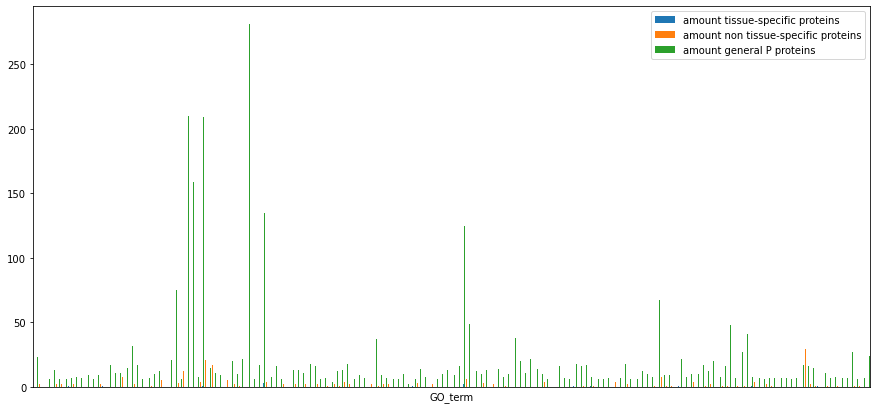

In [135]:
df_count_all_tspec_Urinary_bladder = []
df_count_all_nontspec_Urinary_bladder = []
df_count_all_general_Urinary_bladder = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_Urinary_bladder_all[GO].sum()
        df_count_all_tspec_Urinary_bladder.append(count_tspec)
    else:
        df_count_all_tspec_Urinary_bladder.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_Urinary_bladder_all[GO].sum()
        df_count_all_nontspec_Urinary_bladder.append(count_nontspec)
    else:
         df_count_all_nontspec_Urinary_bladder.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_Urinary_bladder_all[GO].sum()
        df_count_all_general_Urinary_bladder.append(count_general)
    else:
        df_count_all_general_Urinary_bladder.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_Urinary_bladder_all[GO].sum()
    df_count_all_tspec_Urinary_bladder.append(count_tspec)
    count_nontspec = nontspec_Urinary_bladder_all[GO].sum()
    df_count_all_nontspec_Urinary_bladder.append(count_nontspec)
    count_general = generalP_Urinary_bladder_all[GO].sum()
    df_count_all_general_Urinary_bladder.append(count_general)

df_count_all_Urinary_bladder= pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_Urinary_bladder2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_Urinary_bladder = df_count_all_Urinary_bladder.append(df_count_all_Urinary_bladder2, ignore_index=True)
df_count_all_Urinary_bladder["amount tissue-specific proteins"] = df_count_all_tspec_Urinary_bladder
df_count_all_Urinary_bladder["amount non tissue-specific proteins"] = df_count_all_nontspec_Urinary_bladder
df_count_all_Urinary_bladder["amount general P proteins"] = df_count_all_general_Urinary_bladder
df_count_all_Urinary_bladder[(df_count_all_Urinary_bladder["amount tissue-specific proteins"]>5)|(df_count_all_Urinary_bladder["amount non tissue-specific proteins"]>5)
       |(df_count_all_Urinary_bladder["amount general P proteins"]>5)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_Urinary_bladder[(df_count_all_Urinary_bladder["amount tissue-specific proteins"]>5)|(df_count_all_Urinary_bladder["amount non tissue-specific proteins"]>5)
       |(df_count_all_Urinary_bladder["amount general P proteins"]>5)]


### Urine

81


<Figure size 1080x504 with 0 Axes>

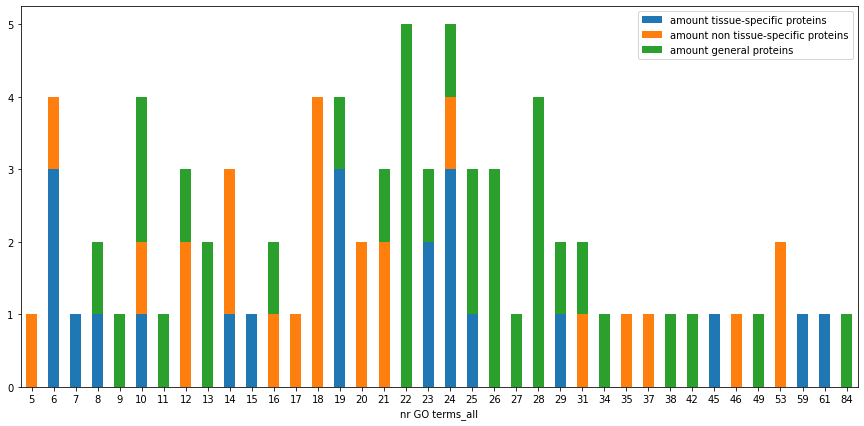

nr GO terms_all  amount tissue-specific proteins  \
14                5                              NaN   
0                 6                              3.0   
1                 7                              1.0   
2                 8                              1.0   
26                9                              NaN   
3                10                              1.0   
27               11                              NaN   
15               12                              NaN   
28               13                              NaN   
4                14                              1.0   
5                15                              1.0   
16               16                              NaN   
17               17                              NaN   
18               18                              NaN   
6                19                              3.0   
19               20                              NaN   
20               21                              NaN   
29               22                              NaN   
7                23                              2.0   
8                24                              3.0   
9                25                              1.0   
30               26                              NaN   
31               27                              NaN   
32               28                              NaN   
10               29                              1.0   
21               31                              NaN   
33               34                              NaN   
22               35                              NaN   
23               37                              NaN   
34               38                              NaN   
35               42                              NaN   
11               45                              1.0   
24               46                              NaN   
36               49                              NaN   
25               53                              NaN   
12               59                              1.0   
13               61                              1.0   
37               84                              NaN   

    amount non tissue-specific proteins  amount general proteins  Total  
14                                  1.0                      NaN    1.0  
0                                   1.0                      NaN    4.0  
1                                   NaN                      NaN    1.0  
2                                   NaN                      1.0    2.0  
26                                  NaN                      1.0    1.0  
3                                   1.0                      2.0    4.0  
27                                  NaN                      1.0    1.0  
15                                  2.0                      1.0    3.0  
28                                  NaN                      2.0    2.0  
4                                   2.0                      NaN    3.0  
5                                   NaN                      NaN    1.0  
16                                  1.0                      1.0    2.0  
17                                  1.0                      NaN    1.0  
18                                  4.0                      NaN    4.0  
6                                   NaN                      1.0    4.0  
19                                  2.0                      NaN    2.0  
20                                  2.0                      1.0    3.0  
29                                  NaN                      5.0    5.0  
7                                   NaN                      1.0    3.0  
8                                   1.0                      1.0    5.0  
9                                   NaN                      2.0    3.0  
30                                  NaN                      3.0    3.0  
31                                  NaN                      1.0    1.0  
32                                  NaN    

In [136]:
print(data_protein[data_protein["Urine"]==1].shape[0])
tspec_Urine_all = t_spec_prot_GO_all[t_spec_prot_GO_all["Urine"]==1]
nontspec_Urine_all = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Urine"]==1]
generalP_Urine_all = general_P_prot_GO_all[general_P_prot_GO_all["Urine"]==1]
grouped_tspec_Urine = tspec_Urine_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_nontspec_Urine = nontspec_Urine_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()
grouped_general_Urine = generalP_Urine_all.groupby(["nr GO terms_all"], as_index=False)["ACC_ID"].nunique()

grouped_Urine_all1 = pd.merge(grouped_tspec_Urine, grouped_nontspec_Urine, how="outer", on=["nr GO terms_all"], suffixes=("_tspec", "_nontspec"))
grouped_Urine_all = pd.merge(grouped_Urine_all1, grouped_general_Urine, how="outer", on=["nr GO terms_all"])
grouped_Urine_all.rename(columns={"ACC_ID_tspec": "amount tissue-specific proteins",
                                "ACC_ID_nontspec": "amount non tissue-specific proteins",
                                "ACC_ID": "amount general proteins"}, inplace=True)
grouped_Urine_all.sort_values(by="nr GO terms_all", inplace=True)
plt.figure(figsize=(15,7))
grouped_Urine_all.set_index("nr GO terms_all").plot(kind="bar", stacked=True, figsize=(15,7), rot=0)
plt.show()
grouped_Urine_all["Total"] = grouped_Urine_all[["amount tissue-specific proteins", "amount non tissue-specific proteins",
                                            "amount general proteins"]].sum(axis=1)
grouped_Urine_all

GO_term  amount tissue-specific proteins  \
48     GO:0000139                                0   
213    GO:0000813                                0   
226    GO:0000902                                0   
294    GO:0001501                                0   
340    GO:0001649                                0   
...           ...                              ...   
11149  GO:1902188                                0   
11452  GO:1903543                                0   
11454  GO:1903551                                0   
11751  GO:1904813                                0   
12248  GO:2000251                                0   

       amount non tissue-specific proteins  amount general P proteins  
48                                       2                          0  
213                                      2                          0  
226                                      0                          2  
294                                      1                          2  
340                                      0                          2  
...                                    ...                        ...  
11149                                    2                          1  
11452                                    3                          0  
11454                                    2                          0  
11751                                    0                          2  
12248                                    0                          2  

[193 rows x 4 columns]

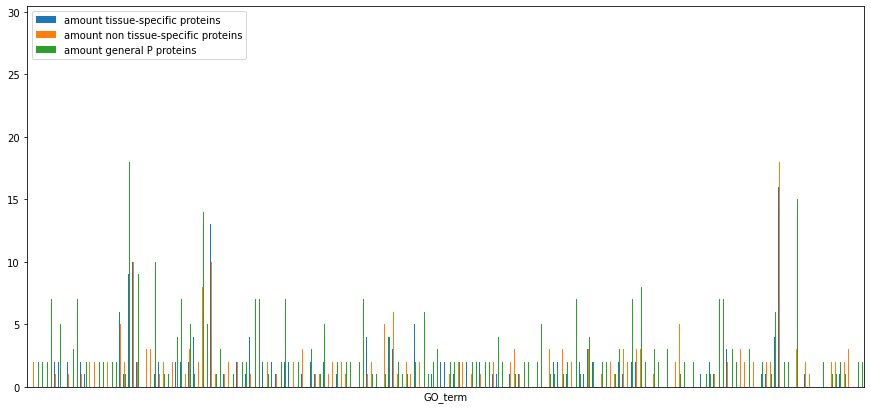

In [137]:
df_count_all_tspec_Urine = []
df_count_all_nontspec_Urine = []
df_count_all_general_Urine = []
for GO in uni_list_GO:
    if GO in uni_list_GO_tspec:
        count_tspec = tspec_Urine_all[GO].sum()
        df_count_all_tspec_Urine.append(count_tspec)
    else:
        df_count_all_tspec_Urine.append(0)
    if GO in uni_list_GO_nontspec:
        count_nontspec = nontspec_Urine_all[GO].sum()
        df_count_all_nontspec_Urine.append(count_nontspec)
    else:
         df_count_all_nontspec_Urine.append(0)
    if GO in uni_list_GO_gen:
        count_general = generalP_Urine_all[GO].sum()
        df_count_all_general_Urine.append(count_general)
    else:
        df_count_all_general_Urine.append(0)
for GO in uni_list_quick:
    count_tspec = tspec_Urine_all[GO].sum()
    df_count_all_tspec_Urine.append(count_tspec)
    count_nontspec = nontspec_Urine_all[GO].sum()
    df_count_all_nontspec_Urine.append(count_nontspec)
    count_general = generalP_Urine_all[GO].sum()
    df_count_all_general_Urine.append(count_general)

df_count_all_Urine = pd.DataFrame({"GO_term": uni_list_GO})
df_count_all_Urine2 = pd.DataFrame({"GO_term": uni_list_quick})
df_count_all_Urine = df_count_all_Urine.append(df_count_all_Urine2, ignore_index=True)
df_count_all_Urine["amount tissue-specific proteins"] = df_count_all_tspec_Urine
df_count_all_Urine["amount non tissue-specific proteins"] = df_count_all_nontspec_Urine
df_count_all_Urine["amount general P proteins"] = df_count_all_general_Urine
df_count_all_Urine[(df_count_all_Urine["amount tissue-specific proteins"]>1)|(df_count_all_Urine["amount non tissue-specific proteins"]>1)
       |(df_count_all_Urine["amount general P proteins"]>1)].plot(x="GO_term", kind="bar", figsize=(15,7))
plt.xticks([])
df_count_all_Urine[(df_count_all_Urine["amount tissue-specific proteins"]>1)|(df_count_all_Urine["amount non tissue-specific proteins"]>1)
       |(df_count_all_Urine["amount general P proteins"]>1)]


### Heatmap

Per protein, we show the amount of GO-terms from a certain category associated with it. Then, per protein, per tissue, we make heatmaps showing for each possible GO-term, whether or not a protein is associated with it (white) or not (black). We repeat the analysis per category and per tissue.

In [25]:
tspec_GOcount = data_protein_GO[data_protein_GO["Total"]==1].drop(["Gene names", "Length", "Organism", "Status"], axis=1)
tspec_GOcount["MF"]=0
tspec_GOcount["BP"]=0
tspec_GOcount["CC"]=0

tspec_GOcount["MF"] = (tspec_GOcount["Gene ontology (molecular function)"].str.count(";"))+1
tspec_GOcount["BP"] = (tspec_GOcount["Gene ontology (biological process)"].str.count(";"))+1
tspec_GOcount["CC"] = (tspec_GOcount["Gene ontology (cellular component)"].str.count(";"))+1
#tspec_GOcount.fillna(0, inplace=True)

tspec_GOcount.head() 

ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
0  A0A075B6H7               0        0      0     0      0       0   
1  A0A075B6S5               0        0      0     0      0       0   
2  A0A087WXM9               0        0      0     0      0       0   
3  A0A0B4J2D5               0        0      0     0      0       0   
4  A0A0B4J2D9               0        0      1     0      0       0   

   Cerebrospinal fluid  Cervix  Colon  ...  \
0                    0       0      0  ...   
1                    0       0      0  ...   
2                    0       0      0  ...   
3                    0       0      0  ...   
4                    0       0      0  ...   

                                       Protein names  \
0  Probable non-functional immunoglobulin kappa v...   
1                 Immunoglobulin kappa variable 1-27   
2               Meiosis-specific kinetochore protein   
3  Glutamine amidotransferase-like class 1 domain...   
4                Immunoglobulin kappa variable 1D-13   

                  Gene ontology (biological process)  \
0  adaptive immune response [GO:0002250]; immune ...   
1  adaptive immune response [GO:0002250]; immune ...   
2  female meiosis chromosome segregation [GO:0016...   
3                                                NaN   
4  adaptive immune response [GO:0002250]; immune ...   

                  Gene ontology (cellular component)  \
0  extracellular space [GO:0005615]; immunoglobul...   
1  extracellular space [GO:0005615]; immunoglobul...   
2  condensed chromosome, centromeric region [GO:0...   
3                         mitochondrion [GO:0005739]   
4  extracellular space [GO:0005615]; immunoglobul...   

                                  Gene ontology (GO)  \
0  extracellular space [GO:0005615]; immunoglobul...   
1  extracellular space [GO:0005615]; immunoglobul...   
2  condensed chromosome kinetochore [GO:0000777];...   
3                         mitochondrion [GO:0005739]   
4  extracellular space [GO:0005615]; immunoglobul...   

   Gene ontology (molecular function)  \
0                                 NaN   
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                                 NaN   

                                   Gene ontology IDs     GO_term  MF   BP   CC  
0  GO:0002250; GO:0005615; GO:0005886; GO:0006955...         NaN NaN  2.0  3.0  
1  GO:0002250; GO:0005615; GO:0005886; GO:0006955...         NaN NaN  2.0  3.0  
2  GO:0000777; GO:0000779; GO:0007060; GO:0010789...  GO:0010789 NaN  5.0  2.0  
3                                         GO:0005739         NaN NaN  NaN  1.0  
4  GO:0002250; GO:0005615; GO:0005886; GO:0006955...         NaN NaN  2.0  3.0  

[5 rows x 54 columns]

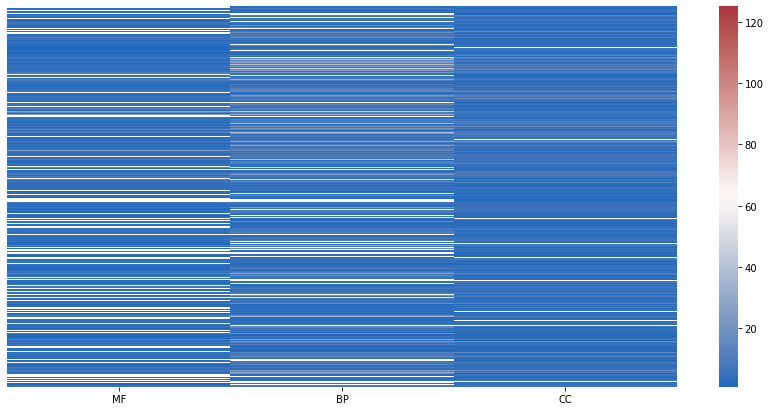

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(tspec_GOcount[["MF", "BP", "CC"]],cmap="vlag", yticklabels=False)
plt.show()

In [27]:
nontspec_GOcount = data_protein_GO[(data_protein_GO["Total"]>1)|(data_protein_GO["Total"]<5)].drop(["Gene names", "Length", "Organism", "Status"], axis=1)
nontspec_GOcount["MF"]=0
nontspec_GOcount["BP"]=0
nontspec_GOcount["CC"]=0

nontspec_GOcount["MF"] = (nontspec_GOcount["Gene ontology (molecular function)"].str.count(";"))+1
nontspec_GOcount["BP"] = (nontspec_GOcount["Gene ontology (biological process)"].str.count(";"))+1
nontspec_GOcount["CC"] = (nontspec_GOcount["Gene ontology (cellular component)"].str.count(";"))+1
#nontspec_GOcount.fillna(0, inplace=True)

nontspec_GOcount.head() 

ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
0  A0A075B6H7               0        0      0     0      0       0   
1  A0A075B6S5               0        0      0     0      0       0   
2  A0A087WXM9               0        0      0     0      0       0   
3  A0A0B4J2D5               0        0      0     0      0       0   
4  A0A0B4J2D9               0        0      1     0      0       0   

   Cerebrospinal fluid  Cervix  Colon  ...  \
0                    0       0      0  ...   
1                    0       0      0  ...   
2                    0       0      0  ...   
3                    0       0      0  ...   
4                    0       0      0  ...   

                                       Protein names  \
0  Probable non-functional immunoglobulin kappa v...   
1                 Immunoglobulin kappa variable 1-27   
2               Meiosis-specific kinetochore protein   
3  Glutamine amidotransferase-like class 1 domain...   
4                Immunoglobulin kappa variable 1D-13   

                  Gene ontology (biological process)  \
0  adaptive immune response [GO:0002250]; immune ...   
1  adaptive immune response [GO:0002250]; immune ...   
2  female meiosis chromosome segregation [GO:0016...   
3                                                NaN   
4  adaptive immune response [GO:0002250]; immune ...   

                  Gene ontology (cellular component)  \
0  extracellular space [GO:0005615]; immunoglobul...   
1  extracellular space [GO:0005615]; immunoglobul...   
2  condensed chromosome, centromeric region [GO:0...   
3                         mitochondrion [GO:0005739]   
4  extracellular space [GO:0005615]; immunoglobul...   

                                  Gene ontology (GO)  \
0  extracellular space [GO:0005615]; immunoglobul...   
1  extracellular space [GO:0005615]; immunoglobul...   
2  condensed chromosome kinetochore [GO:0000777];...   
3                         mitochondrion [GO:0005739]   
4  extracellular space [GO:0005615]; immunoglobul...   

   Gene ontology (molecular function)  \
0                                 NaN   
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                                 NaN   

                                   Gene ontology IDs     GO_term  MF   BP   CC  
0  GO:0002250; GO:0005615; GO:0005886; GO:0006955...         NaN NaN  2.0  3.0  
1  GO:0002250; GO:0005615; GO:0005886; GO:0006955...         NaN NaN  2.0  3.0  
2  GO:0000777; GO:0000779; GO:0007060; GO:0010789...  GO:0010789 NaN  5.0  2.0  
3                                         GO:0005739         NaN NaN  NaN  1.0  
4  GO:0002250; GO:0005615; GO:0005886; GO:0006955...         NaN NaN  2.0  3.0  

[5 rows x 54 columns]

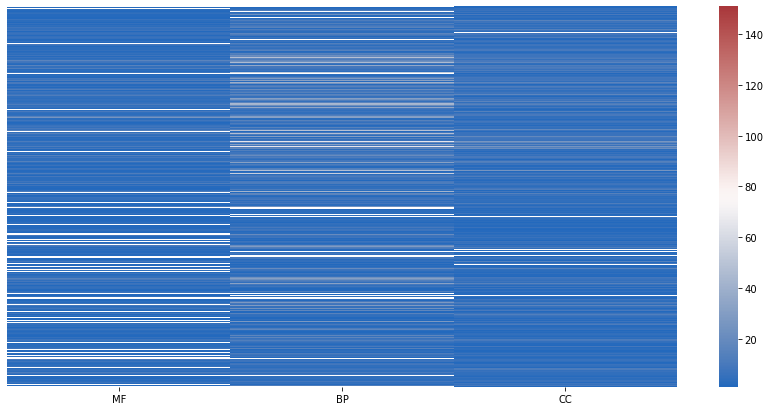

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(nontspec_GOcount[["MF", "BP", "CC"]], cmap="vlag", yticklabels=False)
plt.show()

In [29]:
general_GOcount = data_protein_GO[(data_protein_GO["Total"]>=5)].drop(["Gene names", "Length", "Organism", "Status"], axis=1)
general_GOcount["MF"]=0
general_GOcount["BP"]=0
general_GOcount["CC"]=0

general_GOcount["MF"] = (general_GOcount["Gene ontology (molecular function)"].str.count(";"))+1
general_GOcount["BP"] = (general_GOcount["Gene ontology (biological process)"].str.count(";"))+1
general_GOcount["CC"] = (general_GOcount["Gene ontology (cellular component)"].str.count(";"))+1
#general_GOcount.fillna(0, inplace=True)

general_GOcount.head() 

ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
8   A0A0C4DH39               0        0      1     0      1       0   
17      A0FGR8               0        0      1     0      0       0   
19      A0JNW5               0        0      1     0      1       0   
32      A2RU30               0        0      1     0      1       0   
38      A5A3E0               1        0      1     0      1       1   

    Cerebrospinal fluid  Cervix  Colon  ...  \
8                     1       0      0  ...   
17                    0       0      1  ...   
19                    1       0      1  ...   
32                    1       0      0  ...   
38                    1       0      1  ...   

                                        Protein names  \
8                  Immunoglobulin heavy variable 1-58   
17        Extended synaptotagmin-2 (E-Syt2) (Chr2Syt)   
19  UHRF1-binding protein 1-like (Syntaxin-6 Habc-...   
32  Protein TESPA1 (Thymocyte-expressed positive s...   
38  POTE ankyrin domain family member F (ANKRD26-l...   

                   Gene ontology (biological process)  \
8   B cell receptor signaling pathway [GO:0050853]...   
17  endocytosis [GO:0006897]; endoplasmic reticulu...   
19                                                NaN   
32  COP9 signalosome assembly [GO:0010387]; positi...   
38                    retina homeostasis [GO:0001895]   

                   Gene ontology (cellular component)  \
8   external side of plasma membrane [GO:0009897];...   
17  endoplasmic reticulum membrane [GO:0005789]; e...   
19  cytosol [GO:0005829]; early endosome [GO:0005769]   
32  COP9 signalosome [GO:0008180]; cytoplasm [GO:0...   
38  blood microparticle [GO:0072562]; cell cortex ...   

                                   Gene ontology (GO)  \
8   external side of plasma membrane [GO:0009897];...   
17  endoplasmic reticulum membrane [GO:0005789]; e...   
19  cytosol [GO:0005829]; early endosome [GO:00057...   
32  COP9 signalosome [GO:0008180]; cytoplasm [GO:0...   
38  blood microparticle [GO:0072562]; cell cortex ...   

                   Gene ontology (molecular function)  \
8   antigen binding [GO:0003823]; immunoglobulin r...   
17  cadherin binding [GO:0045296]; calcium-depende...   
19  GARP complex binding [GO:0062069]; protein hom...   
32            signaling receptor binding [GO:0005102]   
38                                                NaN   

                                    Gene ontology IDs     GO_term   MF   BP  \
8   GO:0003823; GO:0006910; GO:0006911; GO:0006958...         NaN  2.0  7.0   
17  GO:0005509; GO:0005544; GO:0005789; GO:0005887...         NaN  7.0  4.0   
19     GO:0005769; GO:0005829; GO:0042803; GO:0062069  GO:0062069  2.0  NaN   
32  GO:0005102; GO:0005737; GO:0005789; GO:0008180...  GO:0010387  1.0  3.0   
38  GO:0001895; GO:0005615; GO:0005938; GO:0070062...         NaN  NaN  1.0   

     CC  
8   2.0  
17  7.0  
19  2.0  
32  3.0  
38  4.0  

[5 rows x 54 columns]

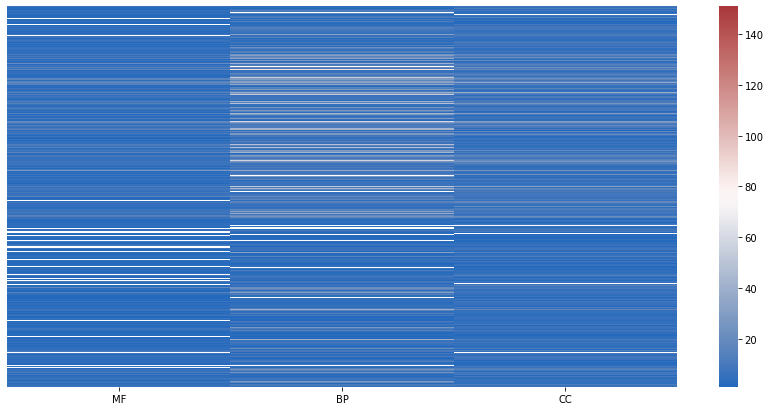

In [30]:
plt.figure(figsize=(15,7))
sns.heatmap(general_GOcount[["MF", "BP", "CC"]], cmap="vlag", yticklabels=False)
plt.show()

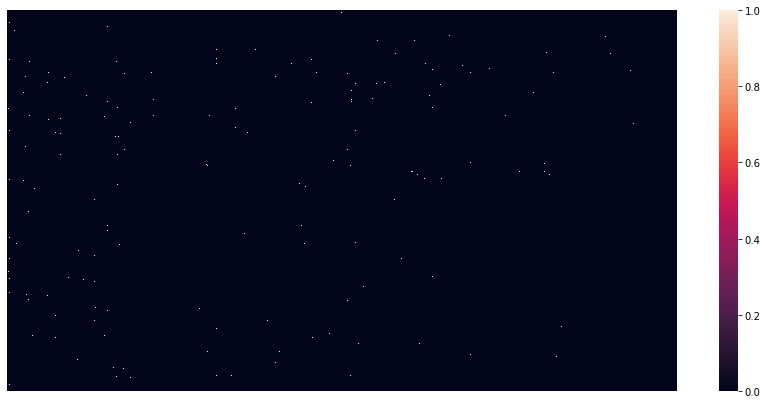

In [33]:
GO_annot_map_sub = GO_annot_map[["GO_term", "GO term name", "GO term definition"]]
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[uni_list_all]
#heatmap = heatmap.loc[:,(heatmap!=0).any(axis=0)]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [34]:
GO_annot_map_sub = GO_annot_map[["GO_term", "GO term name", "GO term definition"]]
counts_tspec = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec = []

for GO in uni_list_all:
    count = t_spec_prot_GO_all[GO].sum()
    list_counts_tspec.append(count)
counts_tspec["count"] = list_counts_tspec
counts_tspec.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829    700
2375   GO:0005634    667
2427   GO:0005737    566
2385   GO:0005654    520
2528   GO:0005886    474
13404  GO:0070062    327
5019   GO:0016020    273
5020   GO:0016021    254
10863  GO:0046872    247
9495   GO:0042802    204

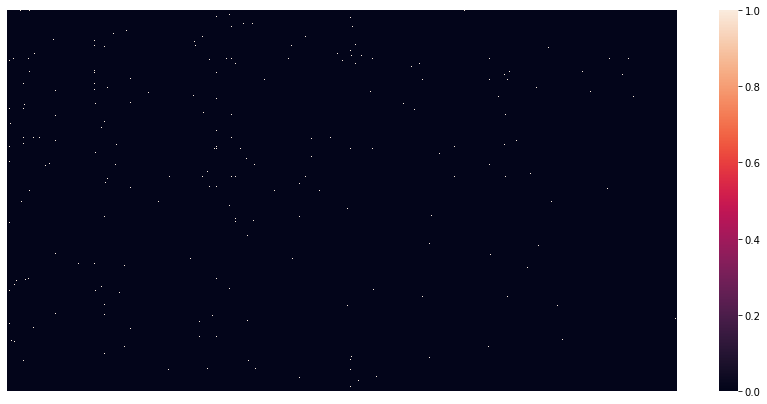

In [35]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[uni_list_all]
#heatmap = heatmap.loc[:,(heatmap!=0).any(axis=0)]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [36]:
counts_nontspec = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec = []

for GO in uni_list_all:
    count = non_t_spec_prot_GO_all[GO].sum()
    list_counts_nontspec.append(count)
counts_nontspec["count"] = list_counts_nontspec
counts_nontspec.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829    936
2375   GO:0005634    794
2385   GO:0005654    708
2427   GO:0005737    699
2528   GO:0005886    420
5019   GO:0016020    380
13404  GO:0070062    375
1350   GO:0003723    317
2328   GO:0005524    276
10863  GO:0046872    263

In [37]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[uni_list_all]
#heatmap = heatmap.loc[:,(heatmap!=0).any(axis=0)]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [38]:
counts_gen = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen = []

for GO in uni_list_all:
    count = general_P_prot_GO_all[GO].sum()
    list_counts_gen.append(count)
counts_gen["count"] = list_counts_gen
counts_gen.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829    856
2375   GO:0005634    699
2427   GO:0005737    690
2385   GO:0005654    553
2528   GO:0005886    506
13404  GO:0070062    453
5019   GO:0016020    406
1350   GO:0003723    362
2328   GO:0005524    246
9495   GO:0042802    240

## Molecular function

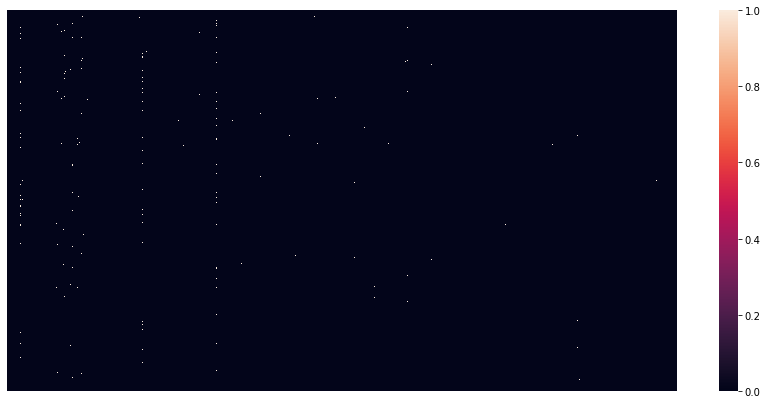

In [37]:
heatmap = t_spec_prot_GO_mf[uni_list_GO]
#heatmap = heatmap.loc[:,(heatmap!=0).any(axis=0)]
plt.figure(figsize=(15,7))
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

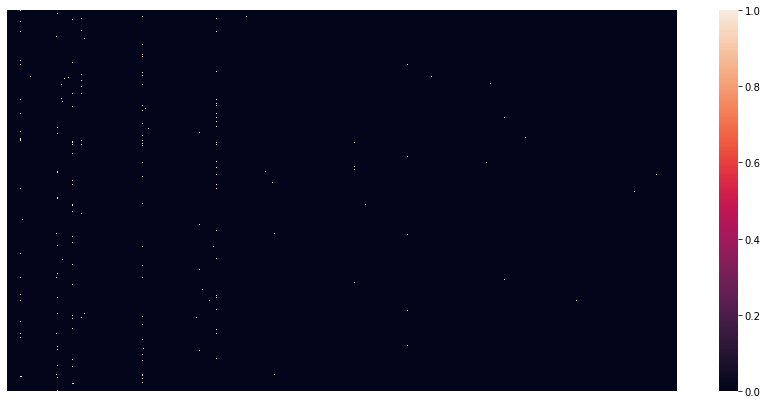

In [115]:
heatmap = non_t_spec_prot_GO_mf[uni_list_GO]
#heatmap = heatmap.loc[:,(heatmap!=0).any(axis=0)]
plt.figure(figsize=(15,7))
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

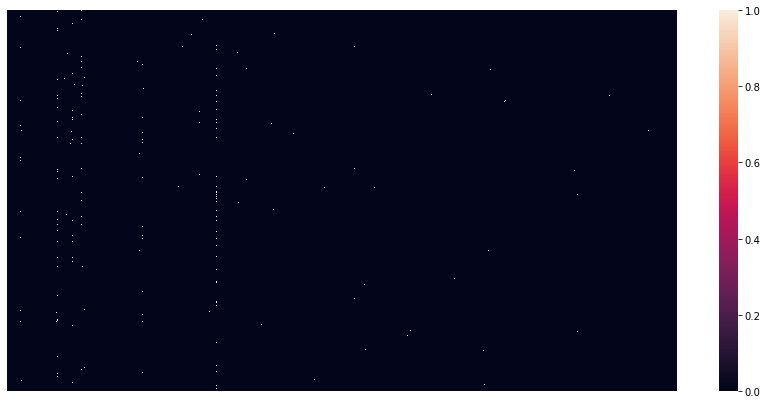

In [116]:
heatmap = general_P_prot_GO_mf[uni_list_GO]
#heatmap = heatmap.loc[:,(heatmap!=0).any(axis=0)]
plt.figure(figsize=(15,7))
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

## Biological process

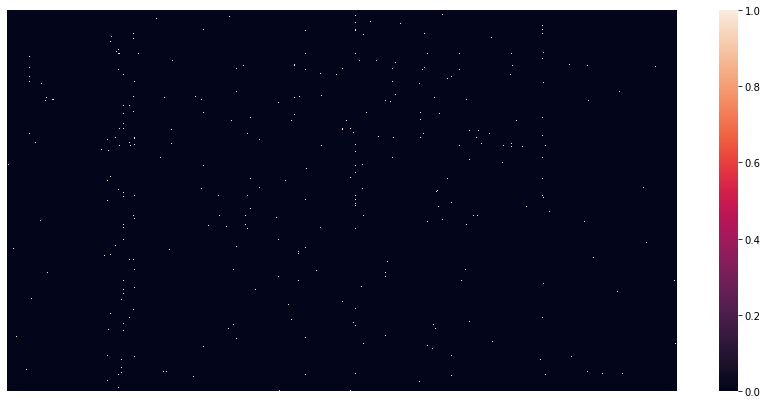

In [117]:
heatmap = t_spec_prot_GO_bp[uni_list_GO]
#heatmap = heatmap.loc[:,(heatmap!=0).any(axis=0)]
plt.figure(figsize=(15,7))
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

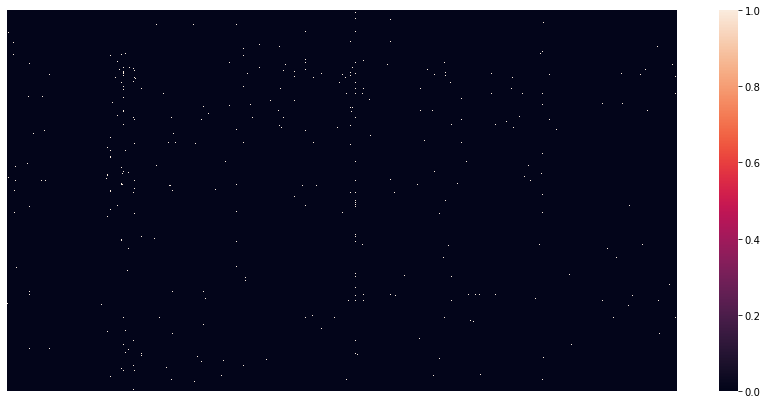

In [118]:
heatmap = non_t_spec_prot_GO_bp[uni_list_GO]
#heatmap = heatmap.loc[:,(heatmap!=0).any(axis=0)]
plt.figure(figsize=(15,7))
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

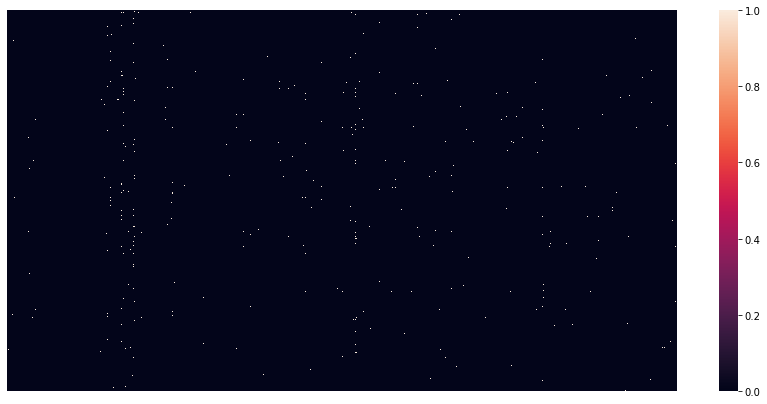

In [119]:
heatmap = general_P_prot_GO_bp[uni_list_GO]
#heatmap = heatmap.loc[:,(heatmap!=0).any(axis=0)]
plt.figure(figsize=(15,7))
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

## Cellular component

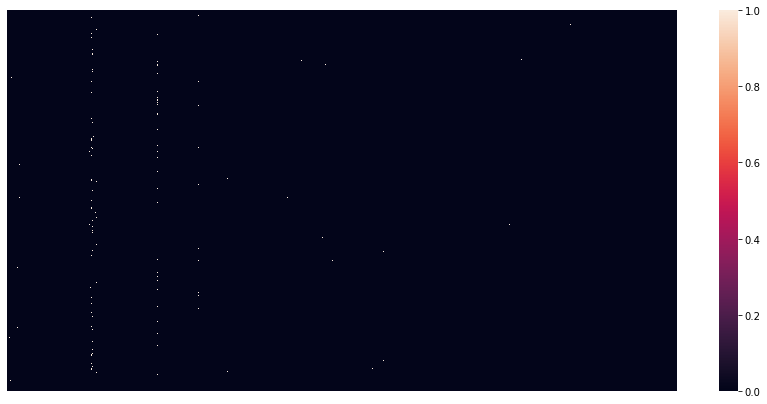

In [120]:
heatmap = t_spec_prot_GO_cc[uni_list_GO]
#heatmap = heatmap.loc[:,(heatmap!=0).any(axis=0)]
plt.figure(figsize=(15,7))
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

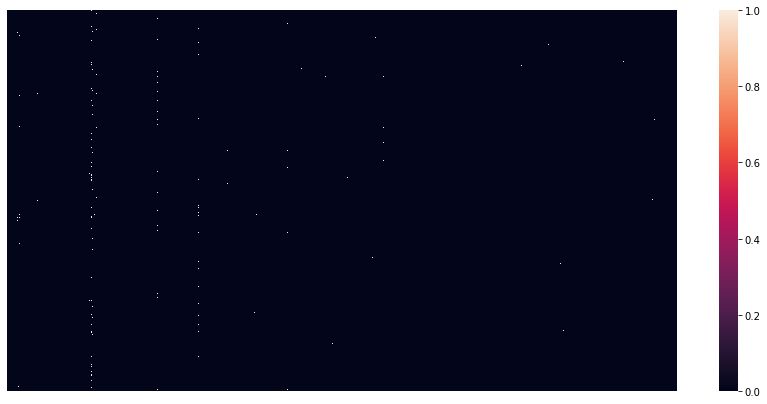

In [121]:
heatmap = non_t_spec_prot_GO_cc[uni_list_GO]
#heatmap = heatmap.loc[:,(heatmap!=0).any(axis=0)]
plt.figure(figsize=(15,7))
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

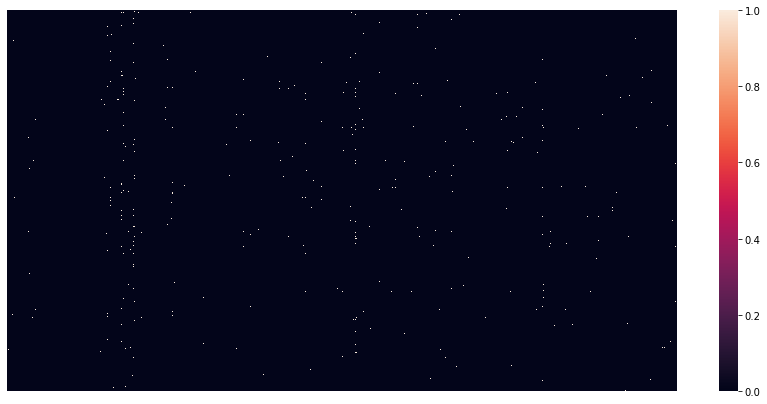

In [122]:
heatmap = general_P_prot_GO_cc[uni_list_GO]
#heatmap = heatmap.loc[:,(heatmap!=0).any(axis=0)]
plt.figure(figsize=(15,7))
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

## Colon

We'll now look per tissue, which GO-terms have been frequently associated with phosphoproteins in these tissues. At the end of this part, we'll look at these for all well-represented tissues combined.

In [66]:
data_all = pd.read_csv("all_mod_data_tissue_annotation1.tsv", sep="\t")
data_all_colon = data_all[data_all["tissue"].str.contains("Colon")]
data_all_colon

proj             peptide modres  UP_POS  ACC_ID  pep_start  \
778570   PXD005693        SYNCCSGNFSSR      S       1  Q52LG2          1   
778571   PXD005693      CHIPPDTPAFIQHK      T     543  P20929        537   
778572   PXD005693      CHIPPDTPAFIQHK      T     543  P20929        537   
778573   PXD005693      CHIPPDTPAFIQHK      T     543  P20929        537   
778574   PXD005693      CHIPPDTPAFIQHK      T     543  P20929        537   
...            ...                 ...    ...     ...     ...        ...   
2311146  PXD008440            SEISELRR      S     301  Q04695        298   
2311147  PXD008440            SEISELRR      S     332  P02533        329   
2311148  PXD008440       QATLEGLQEVVGR      T     531  Q9Y6C2        529   
2311149  PXD008440  ATGPPVSELITKAVAASK      T      48  P16401         38   
2311150  PXD008440    RVIENADGSEEETDTR      S    1954  P35749       1946   

         pep_end  unimod             modification tissue enrichment  \
778570        12     914  [914]Methylmalonylation  Colon       None   
778571       550     724   [724]O-Methylphosphate  Colon       None   
778572       550     724   [724]O-Methylphosphate  Colon       None   
778573       550     724   [724]O-Methylphosphate  Colon       None   
778574       550     724   [724]O-Methylphosphate  Colon       None   
...          ...     ...                      ...    ...        ...   
2311146      305      34               [34]Methyl  Colon       None   
2311147      336      34               [34]Methyl  Colon       None   
2311148      541     385        [385]Ammonia-loss  Colon       None   
2311149       55     122              [122]Formyl  Colon       None   
2311150     1961      40                [40]Sulfo  Colon       None   

        modification_enrichment method additional  
778570                     None   None       None  
778571                     None   None       None  
778572                     None   None       None  
778573                     None   None       None  
778574                     None   None       None  
...                         ...    ...        ...  
2311146                    None   None       None  
2311147                    None   None       None  
2311148                    None   None       None  
2311149                    None   None       None  
2311150                    None   None       None  

[954095 rows x 14 columns]

In [68]:
data_all_colon[data_all_colon["ACC_ID"]=="Q12888"]["proj"].value_counts()

PXD007740    3541
PXD006833      13
PXD006776       5
Name: proj, dtype: int64

In [69]:
data_all_colon_gr = data_all_colon.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"proj": "first"})
data_all_colon_gr[data_all_colon_gr["ACC_ID"]=="Q12888"]["proj"].value_counts()

PXD007740    82
PXD006833     7
PXD006776     5
Name: proj, dtype: int64

In [70]:
data_all_colon[data_all_colon["ACC_ID"]=="P04637"]["proj"].value_counts()

PXD007740    723
PXD008440      2
Name: proj, dtype: int64

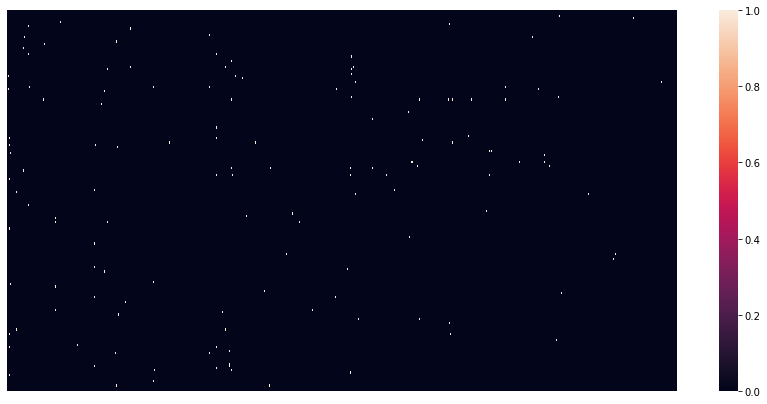

In [38]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["Colon"]==1] 
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [144]:
GO_annot_map_sub = GO_annot_map[["GO_term", "GO term name", "GO term definition"]]
counts_tspeccolon = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspeccolon = []

for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Colon"]==1,GO].sum()
    list_counts_tspeccolon.append(count)
counts_tspeccolon["count"] = list_counts_tspeccolon
counts_tspeccolon.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829    236
2375   GO:0005634    221
2385   GO:0005654    201
2427   GO:0005737    192
2528   GO:0005886    122
10863  GO:0046872     83
5019   GO:0016020     76
2790   GO:0006357     76
13404  GO:0070062     73
9495   GO:0042802     63

In [145]:
unique_colon_tspec = pd.merge(counts_tspeccolon, counts_tspec, how="inner", on =["GO_term"], suffixes=["_Colon", "_All"])
unique_colon_tspec["percentage a/w_Colon"] = unique_colon_tspec["count_Colon"]*100/t_spec_prot_GO_all[t_spec_prot_GO_all["Colon"]==1].shape[0]
unique_colon_tspec["percentage a/w tspec"] =unique_colon_tspec["count_All"]*100/t_spec_prot_GO_all.shape[0]
unique_colon_tspec_mapped = pd.merge(unique_colon_tspec,GO_annot_map_sub, how="left", on=["GO_term"])
unique_colon_tspec_mapped[((unique_colon_tspec_mapped["percentage a/w_Colon"]>5)&(unique_colon_tspec_mapped["percentage a/w tspec"]>10))]

GO_term  count_Colon  count_All  percentage a/w_Colon  \
2375   GO:0005634          221        667             36.229508   
2385   GO:0005654          201        520             32.950820   
2427   GO:0005737          192        566             31.475410   
2489   GO:0005829          236        700             38.688525   
2528   GO:0005886          122        474             20.000000   
5019   GO:0016020           76        273             12.459016   
5020   GO:0016021           63        254             10.327869   
9495   GO:0042802           63        204             10.327869   
10863  GO:0046872           83        247             13.606557   
13404  GO:0070062           73        327             11.967213   

       percentage a/w tspec                    GO term name  \
2375              34.065373                         nucleus   
2385              26.557712                     nucleoplasm   
2427              28.907048                       cytoplasm   
2489              35.750766                         cytosol   
2528              24.208376                 plasma membrane   
5019              13.942799                        membrane   
5020              12.972421  integral component of membrane   
9495              10.418795       identical protein binding   
10863             12.614913               metal ion binding   
13404             16.700715           extracellular exosome   

                                      GO term definition  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
5020   The component of a membrane consisting of the ...  
9495   Interacting selectively and non-covalently wit...  
10863  Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [146]:
unique_colon_tspec_mapped_sub = unique_colon_tspec_mapped.copy()
unique_colon_tspec_mapped_sub.set_index(["GO_term"], inplace=True)
unique_colon_tspec_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_colon_tspec_mapped_sub.drop(["count_Colon"], inplace=True, axis=1)
unique_colon_tspec_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_colon_tspec_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_colon_tspec_mapped_sub = unique_colon_tspec_mapped_sub[["percentage a/w tspec", "percentage a/w_Colon"]]
unique_colon_tspec_mapped_sub

percentage a/w tspec  percentage a/w_Colon
GO_term                                               
GO:0000002              0.153218              0.163934
GO:0000003              0.000000              0.000000
GO:0000009              0.000000              0.000000
GO:0000010              0.000000              0.000000
GO:0000012              0.153218              0.000000
...                          ...                   ...
GO:2001301              0.000000              0.000000
GO:2001302              0.000000              0.000000
GO:2001303              0.000000              0.000000
GO:2001306              0.000000              0.000000
GO:2001311              0.000000              0.000000

[18793 rows x 2 columns]

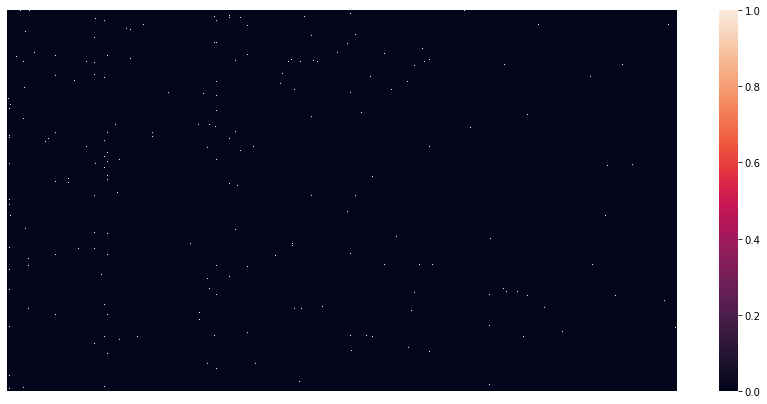

In [42]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Colon"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [147]:
counts_nontspeccolon = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspeccolon = []

for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Colon"]==1,GO].sum()
    list_counts_nontspeccolon.append(count)
counts_nontspeccolon["count"] = list_counts_nontspeccolon
counts_nontspeccolon.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829    637
2375   GO:0005634    569
2385   GO:0005654    540
2427   GO:0005737    486
2528   GO:0005886    272
5019   GO:0016020    229
1350   GO:0003723    219
2328   GO:0005524    197
10863  GO:0046872    187
13404  GO:0070062    156

In [148]:
unique_colon_nontspec = pd.merge(counts_nontspeccolon, counts_nontspec, how="inner", on =["GO_term"], suffixes=["_Colon", "_All"])
unique_colon_nontspec["percentage a/w_Colon"] = unique_colon_nontspec["count_Colon"]*100/non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Colon"]==1].shape[0]
unique_colon_nontspec["percentage a/w nontspec"] = unique_colon_nontspec["count_All"]*100/non_t_spec_prot_GO_all.shape[0]
unique_colon_nontspec_mapped = pd.merge(unique_colon_nontspec,GO_annot_map_sub, how="left", on=["GO_term"])
unique_colon_nontspec_mapped[((unique_colon_nontspec_mapped["percentage a/w_Colon"]>5)&(unique_colon_nontspec_mapped["percentage a/w nontspec"]>10))]

GO_term  count_Colon  count_All  percentage a/w_Colon  \
1350   GO:0003723          219        317             16.067498   
2328   GO:0005524          197        276             14.453412   
2375   GO:0005634          569        794             41.746148   
2385   GO:0005654          540        708             39.618489   
2427   GO:0005737          486        699             35.656640   
2489   GO:0005829          637        936             46.735143   
2528   GO:0005886          272        420             19.955979   
5019   GO:0016020          229        380             16.801174   
9495   GO:0042802          152        246             11.151871   
10863  GO:0046872          187        263             13.719736   
13404  GO:0070062          156        375             11.445341   

       percentage a/w nontspec               GO term name  \
1350                 15.546837                RNA binding   
2328                 13.536047                ATP binding   
2375                 38.940657                    nucleus   
2385                 34.722903                nucleoplasm   
2427                 34.281511                  cytoplasm   
2489                 45.904855                    cytosol   
2528                 20.598333            plasma membrane   
5019                 18.636587                   membrane   
9495                 12.064738  identical protein binding   
10863                12.898480          metal ion binding   
13404                18.391368      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
10863  Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [149]:
unique_colon_nontspec_mapped_sub = unique_colon_nontspec_mapped.copy()
unique_colon_nontspec_mapped_sub.set_index(["GO_term"], inplace=True)
unique_colon_nontspec_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_colon_nontspec_mapped_sub.drop(["count_Colon"], inplace=True, axis=1)
unique_colon_nontspec_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_colon_nontspec_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_colon_nontspec_mapped_sub = unique_colon_nontspec_mapped_sub[["percentage a/w nontspec", "percentage a/w_Colon"]]
unique_colon_nontspec_mapped_sub

percentage a/w nontspec  percentage a/w_Colon
GO_term                                                  
GO:0000002                 0.049044              0.073368
GO:0000003                 0.049044              0.073368
GO:0000009                 0.000000              0.000000
GO:0000010                 0.000000              0.000000
GO:0000012                 0.049044              0.073368
...                             ...                   ...
GO:2001301                 0.000000              0.000000
GO:2001302                 0.049044              0.000000
GO:2001303                 0.000000              0.000000
GO:2001306                 0.000000              0.000000
GO:2001311                 0.000000              0.000000

[18793 rows x 2 columns]

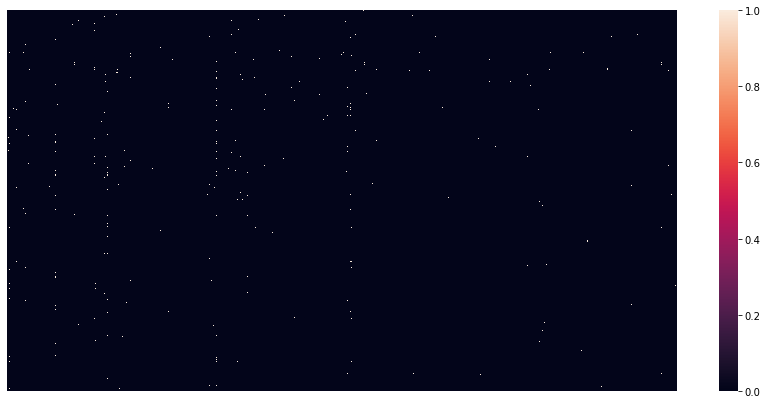

In [46]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Colon"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [355]:
counts_gencolon = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gencolon = []

for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Colon"]==1,GO].sum()
    list_counts_gencolon.append(count)
counts_gencolon["count"] = list_counts_gencolon
counts_gencolon.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829    655
2375   GO:0005634    571
2427   GO:0005737    540
2385   GO:0005654    484
13404  GO:0070062    327
5019   GO:0016020    324
1350   GO:0003723    321
2528   GO:0005886    316
2328   GO:0005524    189
9495   GO:0042802    179

In [356]:
unique_colon_gen = pd.merge(counts_gencolon, counts_gen, how="inner", on =["GO_term"], suffixes=["_Colon", "_All"])
unique_colon_gen["percentage a/w_Colon"] = unique_colon_gen["count_Colon"]*100/general_P_prot_GO_all[general_P_prot_GO_all["Colon"]==1].shape[0]
unique_colon_gen["percentage a/w gen"] = unique_colon_gen["count_All"]*100/general_P_prot_GO_all.shape[0]
unique_colon_gen_mapped = pd.merge(unique_colon_gen,GO_annot_map_sub, how="left", on=["GO_term"])
unique_colon_gen_mapped[((unique_colon_gen_mapped["percentage a/w_Colon"]>5)&(unique_colon_gen_mapped["percentage a/w gen"]>10))]

GO_term  count_Colon  count_All  percentage a/w_Colon  \
1350   GO:0003723          321        362             25.415677   
2328   GO:0005524          189        246             14.964371   
2375   GO:0005634          571        699             45.209818   
2385   GO:0005654          484        553             38.321457   
2427   GO:0005737          540        690             42.755344   
2489   GO:0005829          655        856             51.860649   
2528   GO:0005886          316        506             25.019794   
5019   GO:0016020          324        406             25.653207   
9495   GO:0042802          179        240             14.172605   
13404  GO:0070062          327        453             25.890736   

       percentage a/w gen               GO term name  \
1350            20.888632                RNA binding   
2328            14.195038                ATP binding   
2375            40.334680                    nucleus   
2385            31.909983                nucleoplasm   
2427            39.815349                  cytoplasm   
2489            49.394114                    cytosol   
2528            29.197923            plasma membrane   
5019            23.427582                   membrane   
9495            13.848817  identical protein binding   
13404           26.139642      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [357]:
unique_colon_gen_mapped_sub = unique_colon_gen_mapped.copy()
unique_colon_gen_mapped_sub.set_index(["GO_term"], inplace=True)
unique_colon_gen_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_colon_gen_mapped_sub.drop(["count_Colon"], inplace=True, axis=1)
unique_colon_gen_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_colon_gen_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_colon_gen_mapped_sub = unique_colon_gen_mapped_sub[["percentage a/w gen", "percentage a/w_Colon"]]
unique_colon_gen_mapped_sub

percentage a/w gen  percentage a/w_Colon
GO_term                                             
GO:0000002            0.057703              0.000000
GO:0000003            0.000000              0.000000
GO:0000009            0.000000              0.000000
GO:0000010            0.000000              0.000000
GO:0000012            0.057703              0.079177
...                        ...                   ...
GO:2001301            0.000000              0.000000
GO:2001302            0.000000              0.000000
GO:2001303            0.000000              0.000000
GO:2001306            0.000000              0.000000
GO:2001311            0.000000              0.000000

[18793 rows x 2 columns]

In [358]:
list_col = [unique_colon_tspec_mapped_sub, unique_colon_nontspec_mapped_sub,
            unique_colon_gen_mapped[["GO_term","percentage a/w gen","percentage a/w_Colon","GO term name",
                                     "GO term definition"]].set_index(["GO_term"])]
unique_colon_all = pd.concat(list_col, axis=1)
unique_colon_all.columns = ["percentage a/w tspec", "percentage a/w_Colon_tspec",
                            "percentage a/w nontspec", "percentage a/w_Colon_nontspec",
                           "percentage a/w gen", "percentage a/w_Colon_gen",
                           "GO term name", "GO term definition"]
unique_colon_all[(((unique_colon_all["percentage a/w_Colon_tspec"]>=1)&(unique_colon_all["percentage a/w tspec"]<=0.75))|
                 ((unique_colon_all["percentage a/w_Colon_nontspec"]>=1)&(unique_colon_all["percentage a/w nontspec"]<=0.75))|
               ((unique_colon_all["percentage a/w_Colon_gen"]>=1)&(unique_colon_all["percentage a/w gen"]<=0.75)))]
#keratin filaments are key players in the integrity and homeostasis of the colonic epithelium, somatic stem cell maintenance
#https://www.sciencedirect.com/science/article/pii/S1357272520301953#:~:text=Keratin%20intermediate%20filament%20proteins%20are%20major%20cytoskeletal%20components,and%20keratin%208%20as%20the%20type%20II%20keratin.
#article of December, 2020
#P-body (involved in mRNA turnover), Anterior-posterior pattern, 
#strange that p53 is so high in tissue-specific and non tissue-specific (unless there are cancer samples in there)
#high positive regulation of proteasome

percentage a/w tspec  percentage a/w_Colon_tspec  \
GO_term                                                        
GO:0000932              0.459653                    1.311475   
GO:0002039              0.715015                    1.311475   
GO:0005882              0.459653                    1.147541   
GO:0006977              0.663943                    1.311475   
GO:0007264              0.663943                    1.311475   
GO:0009952              0.663943                    1.147541   
GO:0016192              0.715015                    1.311475   
GO:0016197              0.663943                    1.147541   
GO:0032436              0.510725                    1.147541   
GO:0032922              0.663943                    1.147541   
GO:0035019              0.715015                    1.639344   
GO:0045095              0.612870                    1.147541   
GO:0060090              0.715015                    1.147541   

            percentage a/w nontspec  percentage a/w_Colon_nontspec  \
GO_term                                                              
GO:0000932                 1.078960                       1.393984   
GO:0002039                 0.882786                       1.247249   
GO:0005882                 0.539480                       0.660308   
GO:0006977                 0.637567                       0.880411   
GO:0007264                 0.931829                       0.586941   
GO:0009952                 0.294262                       0.366838   
GO:0016192                 1.324179                       0.953778   
GO:0016197                 0.931829                       0.807043   
GO:0032436                 0.196175                       0.293470   
GO:0032922                 0.539480                       0.660308   
GO:0035019                 0.196175                       0.293470   
GO:0045095                 0.294262                       0.440205   
GO:0060090                 0.637567                       0.513573   

            percentage a/w gen  percentage a/w_Colon_gen  \
GO_term                                                    
GO:0000932            0.692441                  0.870942   
GO:0002039            0.923254                  1.029295   
GO:0005882            1.500289                  1.662708   
GO:0006977            0.403924                  0.475059   
GO:0007264            1.096365                  1.029295   
GO:0009952            0.000000                  0.000000   
GO:0016192            1.673399                  0.950119   
GO:0016197            1.154068                  1.187648   
GO:0032436            1.038661                  0.950119   
GO:0032922            0.750144                  0.870942   
GO:0035019            0.173110                  0.237530   
GO:0045095            0.634737                  0.791766   
GO:0060090            1.442585                  1.583531   

                                                 GO term name  \
GO_term                                                         
GO:0000932                                             P-body   
GO:0002039                                        p53 binding   
GO:0005882                              intermediate filament   
GO:0006977  DNA damage response, signal transduction by p5...   
GO:0007264          small GTPase mediated signal transduction   
GO:0009952           anterior/posterior pattern specification   
GO:0016192                         vesicle-mediated transport   
GO:0016197                                endosomal transport   
GO:0032436  positive regulation of proteasomal ubiquitin-d...   
GO:0032922            circadian regulation of gene expression   
GO:0035019           somatic stem cell population maintenance   
GO:0045095                                   keratin filament   
GO:0060090                         molecular adaptor activity   

                                           GO term definition  
GO_term                                                    

## Adipose tissue

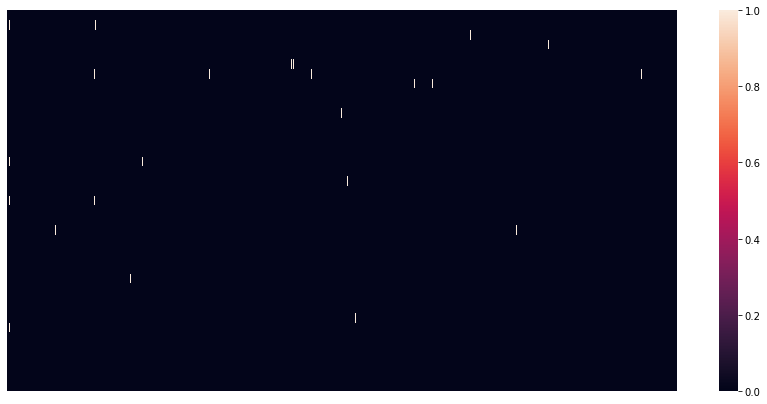

In [51]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Adipose tissue"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [359]:
counts_nontspec_ad = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_ad = []

for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Adipose tissue"]==1,GO].sum()
    list_counts_nontspec_ad.append(count)
counts_nontspec_ad["count"] = list_counts_nontspec_ad
counts_nontspec_ad.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829     24
13404  GO:0070062     17
2427   GO:0005737     15
2375   GO:0005634     12
5019   GO:0016020     11
2318   GO:0005509      9
2463   GO:0005783      8
1350   GO:0003723      8
2473   GO:0005794      7
2346   GO:0005576      6

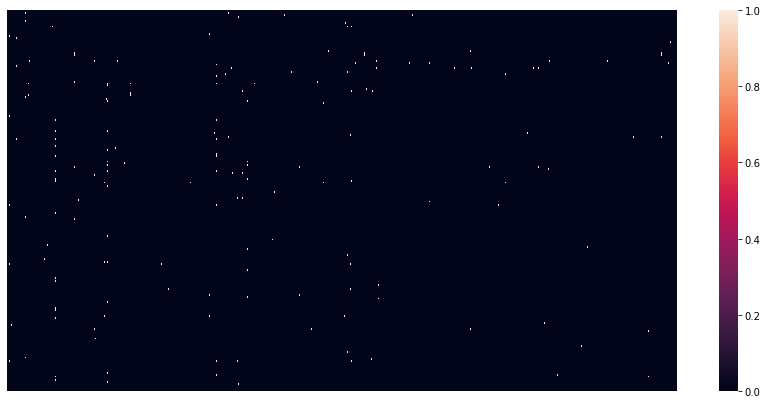

In [360]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["B-cells"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [361]:
counts_gen_ad = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_ad = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Adipose tissue"]==1,GO].sum()
    list_counts_gen_ad.append(count)
counts_gen_ad["count"] = list_counts_gen_ad
counts_gen_ad.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829    204
2427   GO:0005737    177
13404  GO:0070062    145
2375   GO:0005634    139
5019   GO:0016020     95
2528   GO:0005886     90
1350   GO:0003723     90
2385   GO:0005654     78
2553   GO:0005925     64
9495   GO:0042802     60

## B-cells

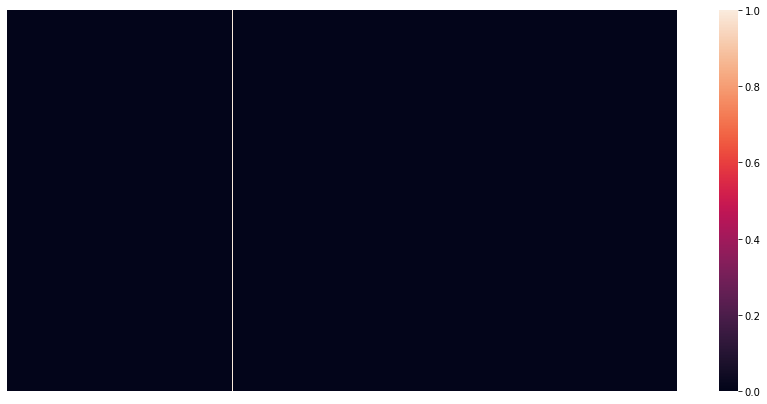

In [55]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["B-cells"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [362]:
counts_tspec_b_cells = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_b_cells = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["B-cells"]==1,GO].sum()
    list_counts_tspec_b_cells.append(count)
counts_tspec_b_cells["count"] = list_counts_tspec_b_cells
counts_tspec_b_cells.sort_values("count", ascending=False).head(10)

GO_term  count
5020   GO:0016021      2
5883   GO:0019932      1
10324  GO:0045471      1
3454   GO:0007584      1
2469   GO:0005789      1
10465  GO:0045777      1
10461  GO:0045766      1
13945  GO:0071222      1
1342   GO:0003700      1
2528   GO:0005886      1

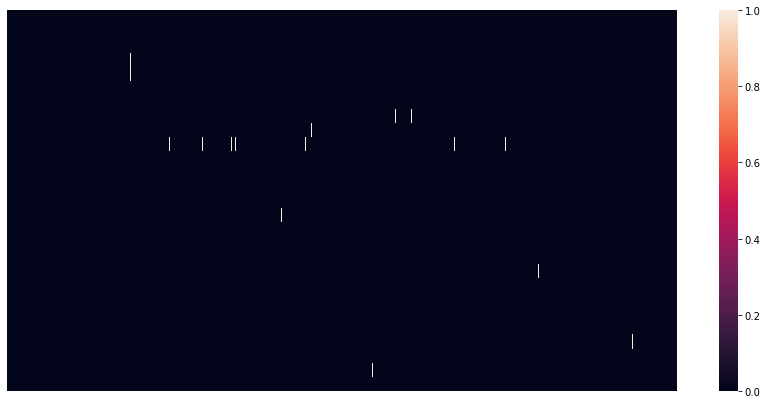

In [57]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["B-cells"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [363]:
counts_nontspec_b_cells = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_b_cells = []

for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["B-cells"]==1,GO].sum()
    list_counts_nontspec_b_cells.append(count)
counts_nontspec_b_cells["count"] = list_counts_nontspec_b_cells
counts_nontspec_b_cells.sort_values("count", ascending=False).head(10)

GO_term  count
2427  GO:0005737     11
2489  GO:0005829     10
2385  GO:0005654      9
2375  GO:0005634      9
2528  GO:0005886      8
9674  GO:0043231      6
9495  GO:0042802      5
5019  GO:0016020      5
2790  GO:0006357      5
2507  GO:0005856      5

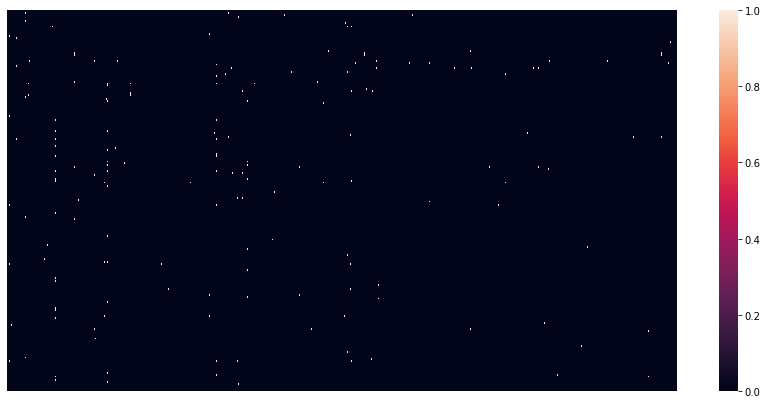

In [59]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["B-cells"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [364]:
counts_gen_b_cells = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_b_cells = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["B-cells"]==1,GO].sum()
    list_counts_gen_b_cells.append(count)
counts_gen_b_cells["count"] = list_counts_gen_b_cells
counts_gen_b_cells.sort_values("count", ascending=False).head(10)

GO_term  count
2375   GO:0005634    107
2489   GO:0005829    102
2385   GO:0005654     97
1350   GO:0003723     79
2427   GO:0005737     77
2528   GO:0005886     55
5019   GO:0016020     45
13404  GO:0070062     42
2328   GO:0005524     35
10863  GO:0046872     27

## Blood

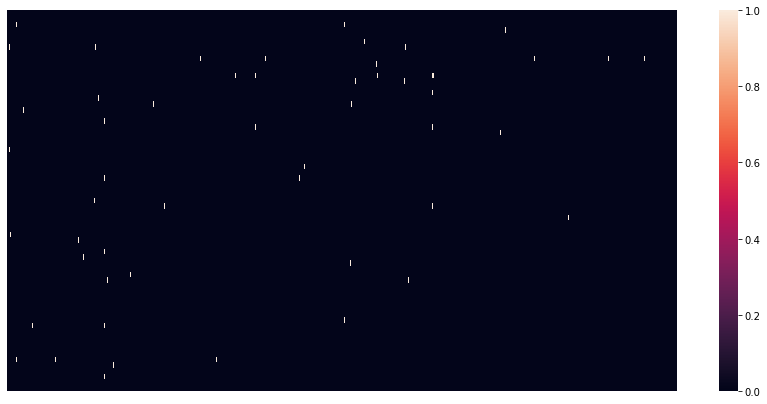

In [61]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["Blood"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [365]:
counts_tspecBlood = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspecBlood = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Blood"]==1,GO].sum()
    list_counts_tspecBlood.append(count)
counts_tspecBlood["count"] = list_counts_tspecBlood
counts_tspecBlood.sort_values("count", ascending=False).head(10)

GO_term  count
2375   GO:0005634     89
2385   GO:0005654     78
2489   GO:0005829     77
2427   GO:0005737     62
2528   GO:0005886     46
10863  GO:0046872     34
2346   GO:0005576     33
13404  GO:0070062     31
5019   GO:0016020     29
2373   GO:0005615     28

In [366]:
unique_Blood_tspec = pd.merge(counts_tspecBlood, counts_tspec, how="inner", on =["GO_term"], suffixes=["_Blood", "_All"])
unique_Blood_tspec["percentage a/w_Blood"] = unique_Blood_tspec["count_Blood"]*100/t_spec_prot_GO_all[t_spec_prot_GO_all["Blood"]==1].shape[0]
unique_Blood_tspec["percentage a/w tspec"] =unique_Blood_tspec["count_All"]*100/t_spec_prot_GO_all.shape[0]
unique_Blood_tspec_mapped = pd.merge(unique_Blood_tspec,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Blood_tspec_mapped[((unique_Blood_tspec_mapped["percentage a/w_Blood"]>5)&(unique_Blood_tspec_mapped["percentage a/w tspec"]>10))]

GO_term  count_Blood  count_All  percentage a/w_Blood  \
2375   GO:0005634           89        667             38.197425   
2385   GO:0005654           78        520             33.476395   
2427   GO:0005737           62        566             26.609442   
2489   GO:0005829           77        700             33.047210   
2528   GO:0005886           46        474             19.742489   
5019   GO:0016020           29        273             12.446352   
5020   GO:0016021           17        254              7.296137   
9495   GO:0042802           20        204              8.583691   
10863  GO:0046872           34        247             14.592275   
13404  GO:0070062           31        327             13.304721   

       percentage a/w tspec                    GO term name  \
2375              34.065373                         nucleus   
2385              26.557712                     nucleoplasm   
2427              28.907048                       cytoplasm   
2489              35.750766                         cytosol   
2528              24.208376                 plasma membrane   
5019              13.942799                        membrane   
5020              12.972421  integral component of membrane   
9495              10.418795       identical protein binding   
10863             12.614913               metal ion binding   
13404             16.700715           extracellular exosome   

                                      GO term definition  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
5020   The component of a membrane consisting of the ...  
9495   Interacting selectively and non-covalently wit...  
10863  Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [367]:
unique_Blood_tspec_mapped_sub = unique_Blood_tspec_mapped.copy()
unique_Blood_tspec_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Blood_tspec_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Blood_tspec_mapped_sub.drop(["count_Blood"], inplace=True, axis=1)
unique_Blood_tspec_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Blood_tspec_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Blood_tspec_mapped_sub.drop(["percentage a/w tspec"], inplace=True, axis=1)
unique_Blood_tspec_mapped_sub

percentage a/w_Blood
GO_term                         
GO:0000002              0.000000
GO:0000003              0.000000
GO:0000009              0.000000
GO:0000010              0.000000
GO:0000012              0.429185
...                          ...
GO:2001301              0.000000
GO:2001302              0.000000
GO:2001303              0.000000
GO:2001306              0.000000
GO:2001311              0.000000

[18793 rows x 1 columns]

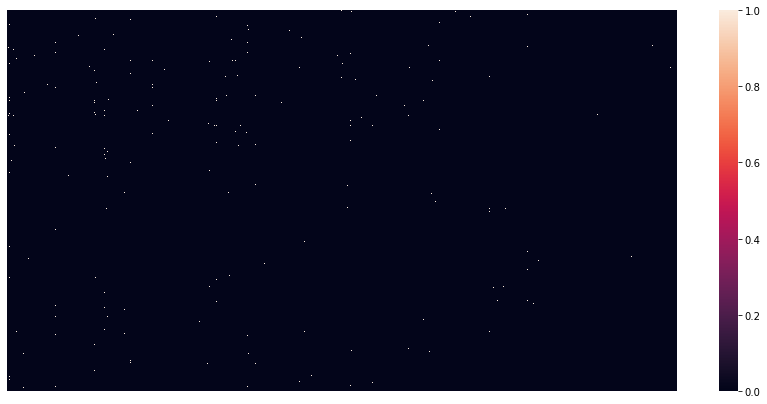

In [65]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Blood"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [368]:
counts_nontspecBlood = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspecBlood = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Blood"]==1,GO].sum()
    list_counts_nontspecBlood.append(count)
counts_nontspecBlood["count"] = list_counts_nontspecBlood
counts_nontspecBlood.sort_values("count", ascending=False).head(10)

GO_term  count
2375   GO:0005634    437
2385   GO:0005654    433
2489   GO:0005829    415
2427   GO:0005737    323
5019   GO:0016020    172
1350   GO:0003723    161
2528   GO:0005886    155
10863  GO:0046872    132
2328   GO:0005524    125
9495   GO:0042802    110

In [369]:
unique_Blood_nontspec = pd.merge(counts_nontspecBlood, counts_nontspec, how="inner", on =["GO_term"], suffixes=["_Blood", "_All"])
unique_Blood_nontspec["percentage a/w_Blood"] = unique_Blood_nontspec["count_Blood"]*100/non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Blood"]==1].shape[0]
unique_Blood_nontspec["percentage a/w nontspec"] = unique_Blood_nontspec["count_All"]*100/non_t_spec_prot_GO_all.shape[0]
unique_Blood_nontspec_mapped = pd.merge(unique_Blood_nontspec,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Blood_nontspec_mapped[((unique_Blood_nontspec_mapped["percentage a/w_Blood"]>5)&(unique_Blood_nontspec_mapped["percentage a/w nontspec"]>10))]

GO_term  count_Blood  count_All  percentage a/w_Blood  \
1350   GO:0003723          161        317             16.876310   
2328   GO:0005524          125        276             13.102725   
2375   GO:0005634          437        794             45.807128   
2385   GO:0005654          433        708             45.387841   
2427   GO:0005737          323        699             33.857442   
2489   GO:0005829          415        936             43.501048   
2528   GO:0005886          155        420             16.247379   
5019   GO:0016020          172        380             18.029350   
9495   GO:0042802          110        246             11.530398   
10863  GO:0046872          132        263             13.836478   
13404  GO:0070062           95        375              9.958071   

       percentage a/w nontspec               GO term name  \
1350                 15.546837                RNA binding   
2328                 13.536047                ATP binding   
2375                 38.940657                    nucleus   
2385                 34.722903                nucleoplasm   
2427                 34.281511                  cytoplasm   
2489                 45.904855                    cytosol   
2528                 20.598333            plasma membrane   
5019                 18.636587                   membrane   
9495                 12.064738  identical protein binding   
10863                12.898480          metal ion binding   
13404                18.391368      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
10863  Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [370]:
unique_Blood_nontspec_mapped_sub = unique_Blood_nontspec_mapped.copy()
unique_Blood_nontspec_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Blood_nontspec_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Blood_nontspec_mapped_sub.drop(["count_Blood"], inplace=True, axis=1)
unique_Blood_nontspec_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Blood_nontspec_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Blood_nontspec_mapped_sub.drop(["percentage a/w nontspec"], inplace=True, axis=1)
unique_Blood_nontspec_mapped_sub

percentage a/w_Blood
GO_term                         
GO:0000002              0.104822
GO:0000003              0.104822
GO:0000009              0.000000
GO:0000010              0.000000
GO:0000012              0.104822
...                          ...
GO:2001301              0.000000
GO:2001302              0.000000
GO:2001303              0.000000
GO:2001306              0.000000
GO:2001311              0.000000

[18793 rows x 1 columns]

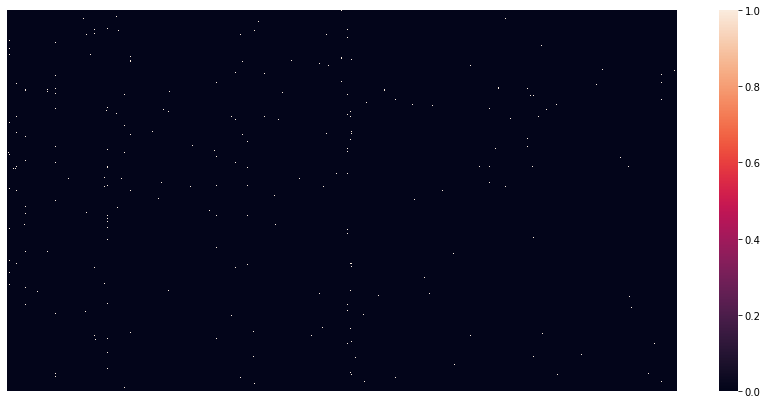

In [69]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Blood"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [371]:
counts_genBlood = pd.DataFrame({"GO_term":uni_list_all})
list_counts_genBlood = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Blood"]==1,GO].sum()
    list_counts_genBlood.append(count)
counts_genBlood["count"] = list_counts_genBlood
counts_genBlood.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829    723
2375   GO:0005634    598
2427   GO:0005737    595
2385   GO:0005654    492
2528   GO:0005886    438
13404  GO:0070062    353
5019   GO:0016020    341
1350   GO:0003723    305
2328   GO:0005524    217
9495   GO:0042802    200

In [372]:
unique_Blood_gen = pd.merge(counts_genBlood, counts_gen, how="inner", on =["GO_term"], suffixes=["_Blood", "_All"])
unique_Blood_gen["percentage a/w_Blood"] = unique_Blood_gen["count_Blood"]*100/general_P_prot_GO_all[general_P_prot_GO_all["Blood"]==1].shape[0]
unique_Blood_gen["percentage a/w gen"] = unique_Blood_gen["count_All"]*100/general_P_prot_GO_all.shape[0]
unique_Blood_gen_mapped = pd.merge(unique_Blood_gen,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Blood_gen_mapped[((unique_Blood_gen_mapped["percentage a/w_Blood"]>5)&(unique_Blood_gen_mapped["percentage a/w gen"]>10))]

GO_term  count_Blood  count_All  percentage a/w_Blood  \
1350   GO:0003723          305        362             20.171958   
2328   GO:0005524          217        246             14.351852   
2375   GO:0005634          598        699             39.550265   
2385   GO:0005654          492        553             32.539683   
2427   GO:0005737          595        690             39.351852   
2489   GO:0005829          723        856             47.817460   
2528   GO:0005886          438        506             28.968254   
5019   GO:0016020          341        406             22.552910   
9495   GO:0042802          200        240             13.227513   
13404  GO:0070062          353        453             23.346561   

       percentage a/w gen               GO term name  \
1350            20.888632                RNA binding   
2328            14.195038                ATP binding   
2375            40.334680                    nucleus   
2385            31.909983                nucleoplasm   
2427            39.815349                  cytoplasm   
2489            49.394114                    cytosol   
2528            29.197923            plasma membrane   
5019            23.427582                   membrane   
9495            13.848817  identical protein binding   
13404           26.139642      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [373]:
unique_Blood_gen_mapped_sub = unique_Blood_gen_mapped.copy()
unique_Blood_gen_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Blood_gen_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Blood_gen_mapped_sub.drop(["count_Blood"], inplace=True, axis=1)
unique_Blood_gen_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Blood_gen_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Blood_gen_mapped_sub.drop(["percentage a/w gen"], inplace=True, axis=1)
unique_Blood_gen_mapped_sub

percentage a/w_Blood
GO_term                         
GO:0000002              0.066138
GO:0000003              0.000000
GO:0000009              0.000000
GO:0000010              0.000000
GO:0000012              0.066138
...                          ...
GO:2001301              0.000000
GO:2001302              0.000000
GO:2001303              0.000000
GO:2001306              0.000000
GO:2001311              0.000000

[18793 rows x 1 columns]

In [374]:
list_Blood = [unique_Blood_tspec_mapped[["GO_term", "percentage a/w tspec", "percentage a/w_Blood"]].set_index(["GO_term"]),
              unique_Blood_nontspec_mapped[["GO_term", "percentage a/w nontspec", "percentage a/w_Blood"]].set_index(["GO_term"]),
            unique_Blood_gen_mapped[["GO_term","percentage a/w gen","percentage a/w_Blood","GO term name",
                                     "GO term definition"]].set_index(["GO_term"])]
unique_Blood_all = pd.concat(list_Blood, axis=1)
unique_Blood_all.columns = ["percentage a/w tspec", "percentage a/w_Blood_tspec",
                            "percentage a/w nontspec", "percentage a/w_Blood_nontspec",
                           "percentage a/w gen", "percentage a/w_Blood_gen",
                           "GO term name", "GO term definition"]
unique_Blood_all[(((unique_Blood_all["percentage a/w_Blood_tspec"]>=1.25)&(unique_Blood_all["percentage a/w tspec"]<=0.5))|
                 ((unique_Blood_all["percentage a/w_Blood_nontspec"]>=1.25)&(unique_Blood_all["percentage a/w nontspec"]<=0.5))|
               ((unique_Blood_all["percentage a/w_Blood_gen"]>=1.25)&(unique_Blood_all["percentage a/w gen"]<=0.5)))]
#growth hormones, responses to circulating hormones, membrane attack complex, complement activation, T-cell homeostasis
#while we have a tissue 'T-cells'

percentage a/w tspec  percentage a/w_Blood_tspec  \
GO_term                                                        
GO:0000045              0.255363                    1.287554   
GO:0000070              0.306435                    1.716738   
GO:0000077              0.306435                    1.287554   
GO:0000118              0.459653                    1.287554   
GO:0000777              0.408580                    1.287554   
GO:0000987              0.357508                    1.287554   
GO:0004866              0.255363                    1.287554   
GO:0005579              0.153218                    1.287554   
GO:0005871              0.459653                    1.287554   
GO:0006957              0.255363                    1.716738   
GO:0007059              0.459653                    1.716738   
GO:0007080              0.459653                    1.287554   
GO:0008228              0.357508                    1.716738   
GO:0008630              0.357508                    1.287554   
GO:0009411              0.357508                    1.716738   
GO:0009749              0.408580                    1.716738   
GO:0010467              0.255363                    1.287554   
GO:0017162              0.204290                    1.287554   
GO:0018149              0.408580                    1.716738   
GO:0019835              0.153218                    1.287554   
GO:0034612              0.306435                    1.287554   
GO:0042277              0.408580                    1.716738   
GO:0043029              0.357508                    1.287554   
GO:0043484              0.357508                    1.287554   
GO:0045842              0.204290                    1.287554   
GO:0048478              0.204290                    1.287554   
GO:0051384              0.408580                    1.716738   
GO:0060260              0.306435                    1.287554   
GO:0071320              0.408580                    1.287554   
GO:0071391              0.204290                    1.287554   
GO:0090307              0.459653                    1.287554   
GO:0090575              0.306435                    1.287554   
GO:0120163              0.357508                    1.287554   
GO:1901981              0.204290                    1.287554   

            percentage a/w nontspec  percentage a/w_Blood_nontspec  \
GO_term                                                              
GO:0000045                 0.490436                       0.419287   
GO:0000070                 0.343306                       0.524109   
GO:0000077                 0.490436                       0.733753   
GO:0000118                 0.637567                       1.048218   
GO:0000777                 0.686611                       0.943396   
GO:0000987                 0.441393                       0.733753   
GO:0004866                 0.294262                       0.419287   
GO:0005579                 0.098087                       0.104822   
GO:0005871                 0.686611                       0.943396   
GO:0006957                 0.049044                       0.104822   
GO:0007059                 0.833742                       1.362683   
GO:0007080                 0.490436                       0.524109   
GO:0008228                 0.147131                       0.104822   
GO:0008630                 0.490436                       0.314465   
GO:0009411                 0.441393                       0.524109   
GO:0009749                 0.441393                       0.524109   
GO:0010467                 0.098087                       0.104822   
GO:0017162                 0.098087                       0.104822   
GO:0018149                 0.245218                       0.104822   
GO:0019835                 0.245218                       0.104822   
GO:0034612                 0.245218                       0.419287   
GO:0042277                 0.294262                       0.209644   
GO:0043029                 

## Bone

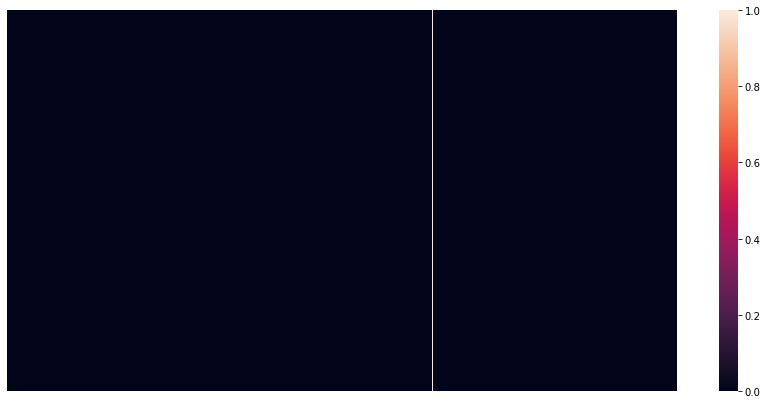

GO_term  count
13404  GO:0070062      1
2346   GO:0005576      1
1498   GO:0004035      1
6771   GO:0031225      1
11936  GO:0051384      1
10863  GO:0046872      1
14113  GO:0071529      1
1129   GO:0003006      1
466    GO:0001649      1
5206   GO:0016462      1

In [74]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["Bone"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()


counts_tspecBone = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspecBone = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Bone"]==1,GO].sum()
    list_counts_tspecBone.append(count)
counts_tspecBone["count"] = list_counts_tspecBone
counts_tspecBone.sort_values("count", ascending=False).head(10)

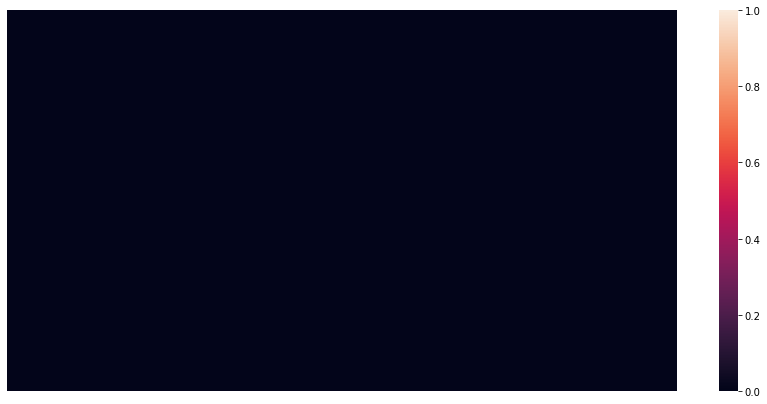

GO_term  count
961    GO:0002523      1
9771   GO:0043406      1
921    GO:0002438      1
11341  GO:0048661      1
13325  GO:0062023      1
7397   GO:0032496      1
9457   GO:0042742      1
7468   GO:0032682      1
4157   GO:0009986      1
1071   GO:0002812      1

In [75]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Bone"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()


counts_nontspecBone = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspecBone = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Bone"]==1,GO].sum()
    list_counts_nontspecBone.append(count)
counts_nontspecBone["count"] = list_counts_nontspecBone
counts_nontspecBone.sort_values("count", ascending=False).head(10)

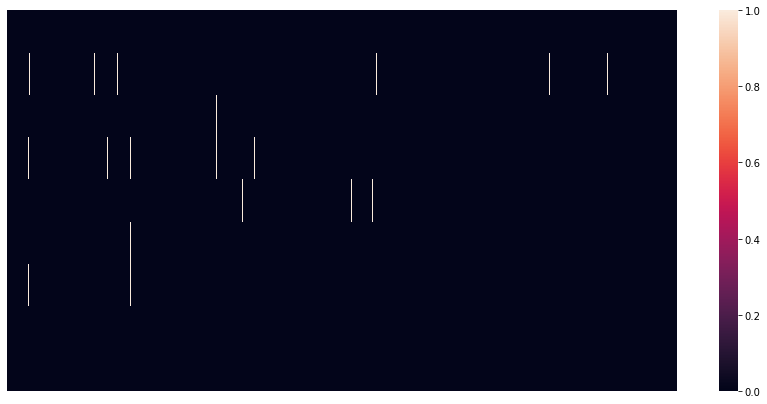

GO_term  count
2489   GO:0005829      8
13404  GO:0070062      6
2375   GO:0005634      6
2328   GO:0005524      5
2528   GO:0005886      5
11259  GO:0048471      5
2385   GO:0005654      5
5019   GO:0016020      4
2427   GO:0005737      4
14029  GO:0071377      3

In [76]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Bone"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()


counts_genBone = pd.DataFrame({"GO_term":uni_list_all})
list_counts_genBone = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Bone"]==1,GO].sum()
    list_counts_genBone.append(count)
counts_genBone["count"] = list_counts_genBone
counts_genBone.sort_values("count", ascending=False).head(10)

## Brain

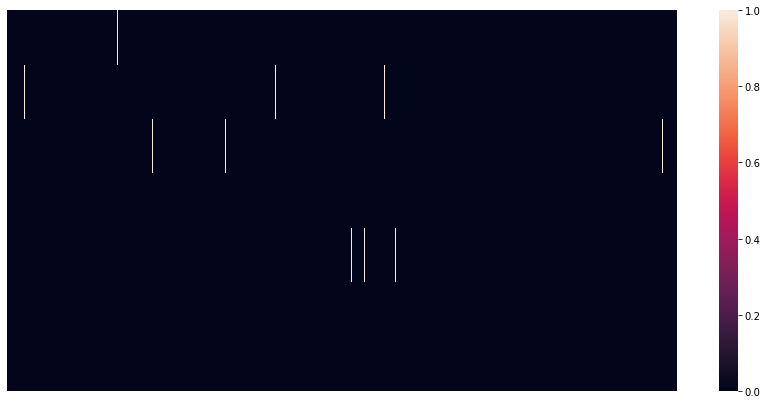

GO_term  count
2489   GO:0005829      5
2427   GO:0005737      2
2385   GO:0005654      2
14551  GO:0072659      2
3284   GO:0007155      2
2375   GO:0005634      2
2528   GO:0005886      2
5019   GO:0016020      2
13404  GO:0070062      2
14639  GO:0086009      1

In [77]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["Brain"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()


counts_tspec_Brain = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_Brain = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Brain"]==1,GO].sum()
    list_counts_tspec_Brain.append(count)
counts_tspec_Brain["count"] = list_counts_tspec_Brain
counts_tspec_Brain.sort_values("count", ascending=False).head(10)

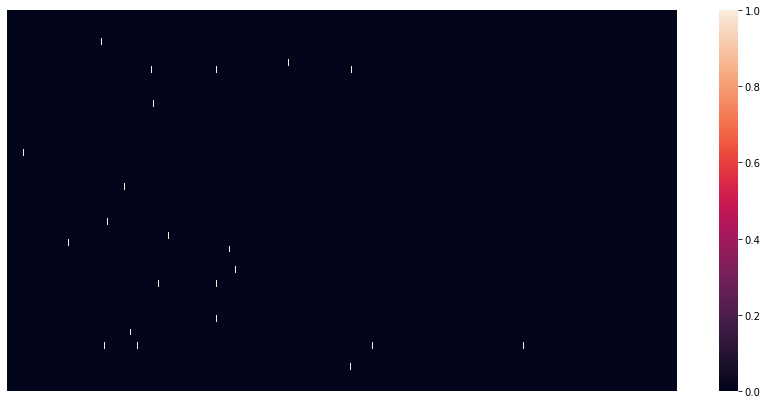

GO_term  count
2427   GO:0005737     22
2375   GO:0005634     19
2528   GO:0005886     14
2489   GO:0005829     14
13404  GO:0070062     13
10863  GO:0046872     11
2385   GO:0005654     11
2790   GO:0006357      7
2373   GO:0005615      7
2346   GO:0005576      7

In [78]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Brain"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()


counts_nontspec_Brain = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Brain = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Brain"]==1,GO].sum()
    list_counts_nontspec_Brain.append(count)
counts_nontspec_Brain["count"] = list_counts_nontspec_Brain
counts_nontspec_Brain.sort_values("count", ascending=False).head(10)

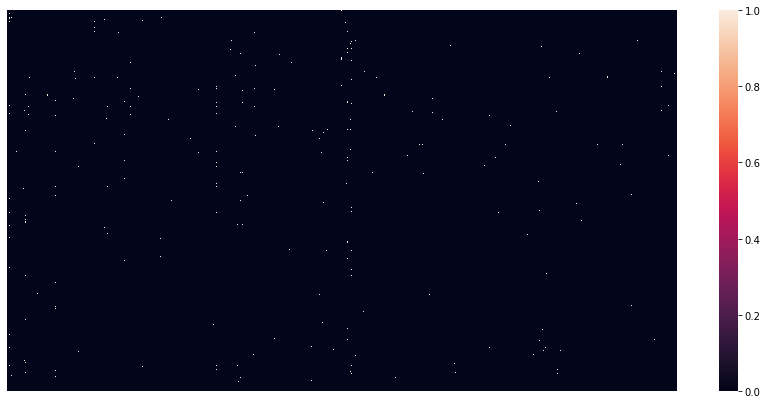

GO_term  count
2489   GO:0005829    459
2427   GO:0005737    379
2528   GO:0005886    338
2375   GO:0005634    298
13404  GO:0070062    241
5019   GO:0016020    207
2385   GO:0005654    187
9495   GO:0042802    142
2328   GO:0005524    136
1350   GO:0003723    134

In [79]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Brain"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()


counts_gen_Brain = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Brain = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Brain"]==1,GO].sum()
    list_counts_gen_Brain.append(count)
counts_gen_Brain["count"] = list_counts_gen_Brain
counts_gen_Brain.sort_values("count", ascending=False).head(10)

## Breast

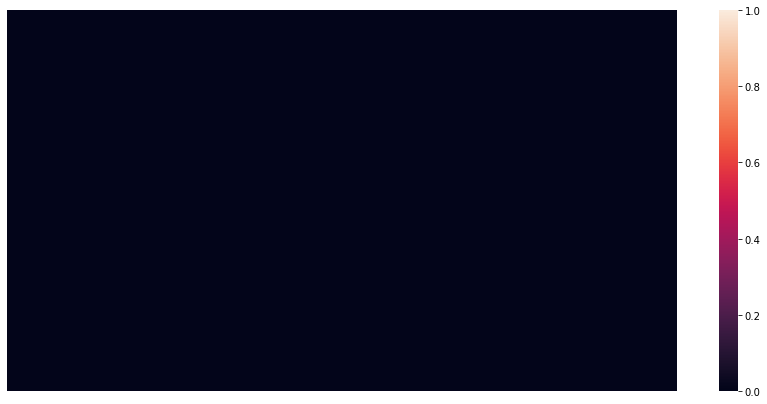

GO_term  count
13404  GO:0070062      2
11531  GO:0050543      1
13660  GO:0070542      1
18765  GO:2001245      1
5241   GO:0016528      1
2468   GO:0005788      1
18716  GO:2001140      1
7294   GO:0032365      1
6296   GO:0030156      1
2473   GO:0005794      1

In [80]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["Breast"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

counts_tspec_Breast = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_Breast = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Breast"]==1,GO].sum()
    list_counts_tspec_Breast.append(count)
counts_tspec_Breast["count"] = list_counts_tspec_Breast
counts_tspec_Breast.sort_values("count", ascending=False).head(10)

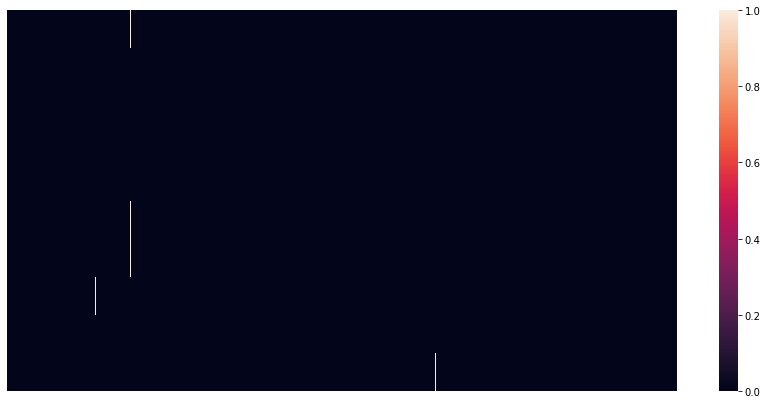

GO_term  count
2489   GO:0005829      5
10863  GO:0046872      4
13404  GO:0070062      4
2346   GO:0005576      3
9459   GO:0042744      3
5019   GO:0016020      3
2270   GO:0005344      3
2491   GO:0005833      3
2373   GO:0005615      3
15468  GO:0098869      3

In [81]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Breast"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()


counts_nontspec_Breast = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Breast = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Breast"]==1,GO].sum()
    list_counts_nontspec_Breast.append(count)
counts_nontspec_Breast["count"] = list_counts_nontspec_Breast
counts_nontspec_Breast.sort_values("count", ascending=False).head(10)


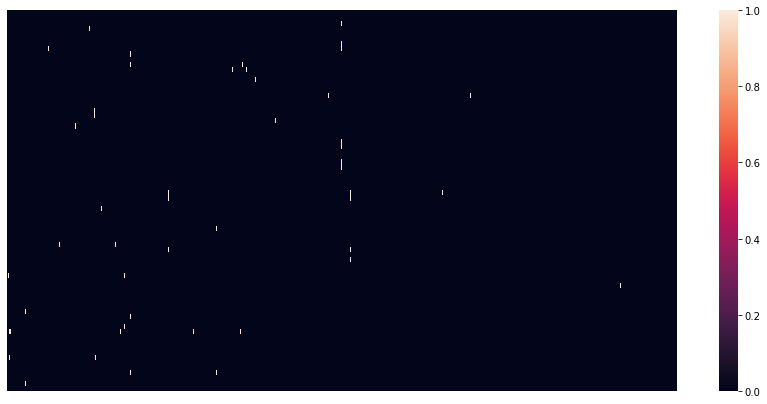

GO_term  count
13404  GO:0070062     51
2489   GO:0005829     39
2373   GO:0005615     37
2427   GO:0005737     32
2375   GO:0005634     31
2346   GO:0005576     22
2528   GO:0005886     21
5019   GO:0016020     21
14527  GO:0072562     21
2385   GO:0005654     14

In [82]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Breast"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()


counts_gen_Breast = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Breast = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Breast"]==1,GO].sum()
    list_counts_gen_Breast.append(count)
counts_gen_Breast["count"] = list_counts_gen_Breast
counts_gen_Breast.sort_values("count", ascending=False).head(10)

## Cerebrospinal fluid

In [151]:
counts_tspec_Cerebrospinal_fluid = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_Cerebrospinal_fluid = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Cerebrospinal fluid"]==1,GO].sum()
    list_counts_tspec_Cerebrospinal_fluid.append(count)
counts_tspec_Cerebrospinal_fluid["count"] = list_counts_tspec_Cerebrospinal_fluid
counts_tspec_Cerebrospinal_fluid.sort_values("count", ascending=False).head(10)

GO_term  count
397    GO:0001516      1
5722   GO:0019371      1
2315   GO:0005504      1
2471   GO:0005791      1
2469   GO:0005789      1
1870   GO:0004667      1
10255  GO:0045187      1
13404  GO:0070062      1
7110   GO:0031965      1
11259  GO:0048471      1

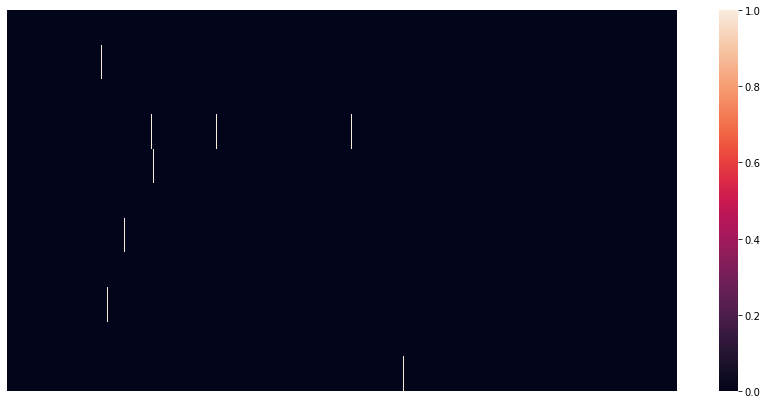

GO_term  count
2427   GO:0005737      4
2528   GO:0005886      4
2489   GO:0005829      3
13404  GO:0070062      3
4095   GO:0009653      3
2328   GO:0005524      2
11259  GO:0048471      2
2375   GO:0005634      2
2373   GO:0005615      2
2346   GO:0005576      2

In [152]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Cerebrospinal fluid"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

counts_nontspec_Cerebrospinal_fluid = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Cerebrospinal_fluid = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Cerebrospinal fluid"]==1,GO].sum()
    list_counts_nontspec_Cerebrospinal_fluid.append(count)
counts_nontspec_Cerebrospinal_fluid["count"] = list_counts_nontspec_Cerebrospinal_fluid
counts_nontspec_Cerebrospinal_fluid.sort_values("count", ascending=False).head(10)

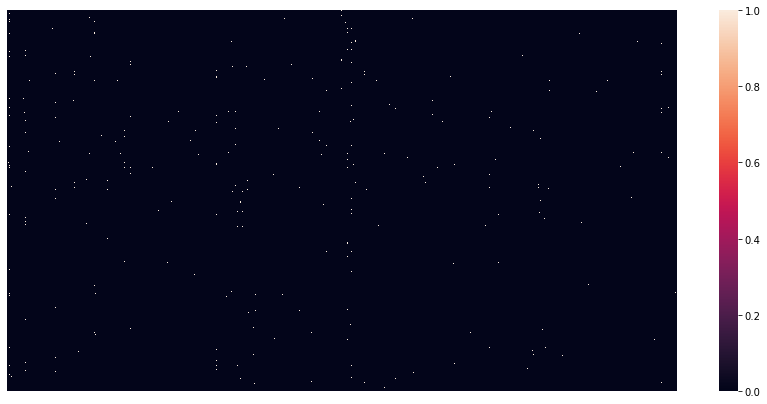

In [153]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Cerebrospinal fluid"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [154]:
counts_gen_Cerebrospinal_fluid = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Cerebrospinal_fluid = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Cerebrospinal fluid"]==1,GO].sum()
    list_counts_gen_Cerebrospinal_fluid.append(count)
counts_gen_Cerebrospinal_fluid["count"] = list_counts_gen_Cerebrospinal_fluid
counts_gen_Cerebrospinal_fluid.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829    421
2427   GO:0005737    344
2528   GO:0005886    309
2375   GO:0005634    261
13404  GO:0070062    224
5019   GO:0016020    184
2385   GO:0005654    156
2328   GO:0005524    129
9495   GO:0042802    129
1350   GO:0003723    109

In [155]:
unique_Cerebrospinal_fluid_gen = pd.merge(counts_gen_Cerebrospinal_fluid, counts_gen, how="inner", on =["GO_term"], suffixes=["_Cerebrospinal_fluid", "_All"])
unique_Cerebrospinal_fluid_gen["percentage a/w_Cerebrospinal_fluid"] = unique_Cerebrospinal_fluid_gen["count_Cerebrospinal_fluid"]*100/general_P_prot_GO_all[general_P_prot_GO_all["Cerebrospinal fluid"]==1].shape[0]
unique_Cerebrospinal_fluid_gen["percentage a/w gen"] = unique_Cerebrospinal_fluid_gen["count_All"]*100/general_P_prot_GO_all.shape[0]
unique_Cerebrospinal_fluid_gen_mapped = pd.merge(unique_Cerebrospinal_fluid_gen,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Cerebrospinal_fluid_gen_mapped[((unique_Cerebrospinal_fluid_gen_mapped["percentage a/w_Cerebrospinal_fluid"]>5)&(unique_Cerebrospinal_fluid_gen_mapped["percentage a/w gen"]>10))]

GO_term  count_Cerebrospinal_fluid  count_All  \
1350   GO:0003723                        109        362   
2328   GO:0005524                        129        246   
2375   GO:0005634                        261        699   
2385   GO:0005654                        156        553   
2427   GO:0005737                        344        690   
2489   GO:0005829                        421        856   
2528   GO:0005886                        309        506   
5019   GO:0016020                        184        406   
9495   GO:0042802                        129        240   
13404  GO:0070062                        224        453   

       percentage a/w_Cerebrospinal_fluid  percentage a/w gen  \
1350                            12.733645           20.888632   
2328                            15.070093           14.195038   
2375                            30.490654           40.334680   
2385                            18.224299           31.909983   
2427                            40.186916           39.815349   
2489                            49.182243           49.394114   
2528                            36.098131           29.197923   
5019                            21.495327           23.427582   
9495                            15.070093           13.848817   
13404                           26.168224           26.139642   

                    GO term name  \
1350                 RNA binding   
2328                 ATP binding   
2375                     nucleus   
2385                 nucleoplasm   
2427                   cytoplasm   
2489                     cytosol   
2528             plasma membrane   
5019                    membrane   
9495   identical protein binding   
13404      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [156]:
unique_Cerebrospinal_fluid_gen_mapped_sub = unique_Cerebrospinal_fluid_gen_mapped.copy()
unique_Cerebrospinal_fluid_gen_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Cerebrospinal_fluid_gen_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Cerebrospinal_fluid_gen_mapped_sub.drop(["count_Cerebrospinal_fluid"], inplace=True, axis=1)
unique_Cerebrospinal_fluid_gen_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Cerebrospinal_fluid_gen_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Cerebrospinal_fluid_gen_mapped_sub.drop(["percentage a/w gen"], inplace=True, axis=1)
unique_Cerebrospinal_fluid_gen_mapped_sub

percentage a/w_Cerebrospinal_fluid
GO_term                                       
GO:0000002                            0.116822
GO:0000003                            0.000000
GO:0000009                            0.000000
GO:0000010                            0.000000
GO:0000012                            0.000000
...                                        ...
GO:2001301                            0.000000
GO:2001302                            0.000000
GO:2001303                            0.000000
GO:2001306                            0.000000
GO:2001311                            0.000000

[18793 rows x 1 columns]

## Cervix

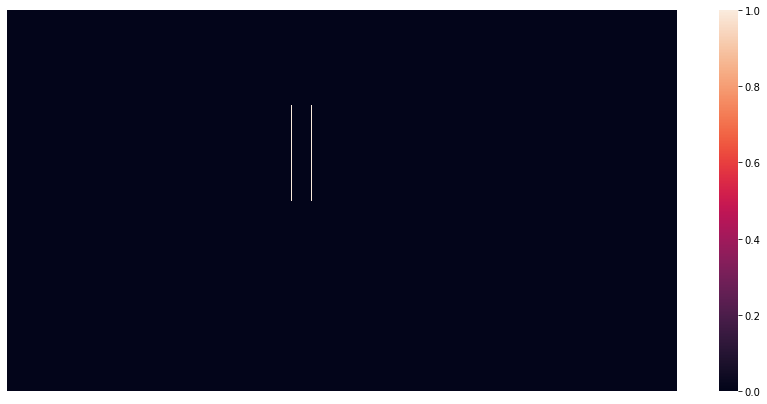

GO_term  count
5019   GO:0016020      2
2528   GO:0005886      2
2489   GO:0005829      2
13404  GO:0070062      1
9458   GO:0042743      1
3809   GO:0008544      1
6771   GO:0031225      1
4045   GO:0009408      1
5869   GO:0019899      1
18638  GO:2000811      1

In [157]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["Cervix"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

counts_tspec_Cervix = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_Cervix = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Cervix"]==1,GO].sum()
    list_counts_tspec_Cervix.append(count)
counts_tspec_Cervix["count"] = list_counts_tspec_Cervix
counts_tspec_Cervix.sort_values("count", ascending=False).head(10)

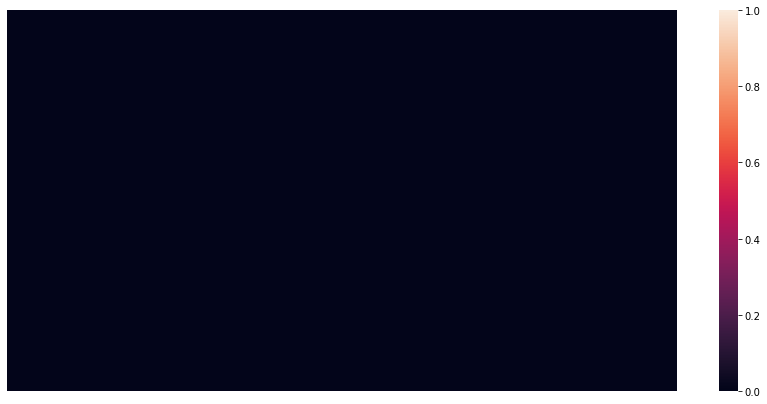

GO_term  count
2489   GO:0005829      3
13519  GO:0070268      3
3809   GO:0008544      2
6867   GO:0031424      2
13404  GO:0070062      2
2524   GO:0005882      2
2375   GO:0005634      2
15056  GO:0097110      1
2473   GO:0005794      1
5545   GO:0018149      1

In [158]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Cervix"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

counts_nontspec_Cervix = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Cervix = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Cervix"]==1,GO].sum()
    list_counts_nontspec_Cervix.append(count)
counts_nontspec_Cervix["count"] = list_counts_nontspec_Cervix
counts_nontspec_Cervix.sort_values("count", ascending=False).head(10)

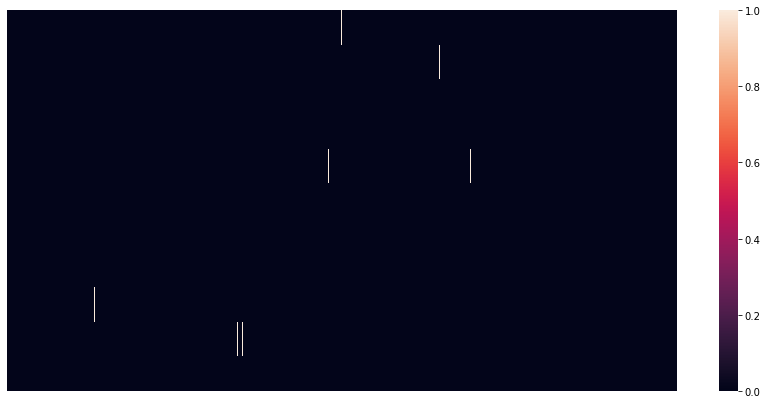

GO_term  count
13404  GO:0070062     10
2489   GO:0005829      8
2375   GO:0005634      6
2427   GO:0005737      5
6867   GO:0031424      5
10207  GO:0045095      5
13519  GO:0070268      5
2528   GO:0005886      3
3155   GO:0006898      3
2373   GO:0005615      3

In [159]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Cervix"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()


counts_gen_Cervix = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Cervix = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Cervix"]==1,GO].sum()
    list_counts_gen_Cervix.append(count)
counts_gen_Cervix["count"] = list_counts_gen_Cervix
counts_gen_Cervix.sort_values("count", ascending=False).head(10)

## Dental plaque

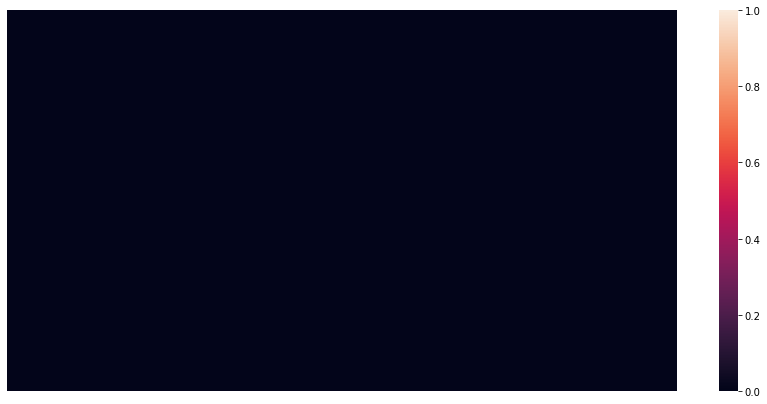

GO_term  count
2346   GO:0005576      4
2373   GO:0005615      4
11651  GO:0050832      3
5794   GO:0019730      3
6962   GO:0031640      3
13281  GO:0061844      3
8541   GO:0035578      3
13404  GO:0070062      3
12077  GO:0051673      2
13945  GO:0071222      2

In [160]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["Dental plaque"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

counts_tspec_Dental_plaque = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_Dental_plaque = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Dental plaque"]==1,GO].sum()
    list_counts_tspec_Dental_plaque.append(count)
counts_tspec_Dental_plaque["count"] = list_counts_tspec_Dental_plaque
counts_tspec_Dental_plaque.sort_values("count", ascending=False).head(10)

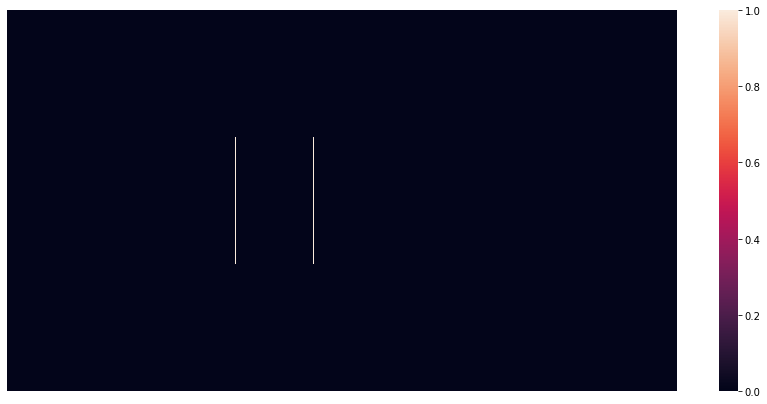

GO_term  count
13404  GO:0070062      3
9723   GO:0043312      2
2375   GO:0005634      2
2346   GO:0005576      2
2489   GO:0005829      2
5794   GO:0019730      2
10202  GO:0045087      2
3636   GO:0008270      2
11532  GO:0050544      1
824    GO:0002224      1

In [161]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Dental plaque"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()


counts_nontspec_Dental_plaque = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Dental_plaque = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Dental plaque"]==1,GO].sum()
    list_counts_nontspec_Dental_plaque.append(count)
counts_nontspec_Dental_plaque["count"] = list_counts_nontspec_Dental_plaque
counts_nontspec_Dental_plaque.sort_values("count", ascending=False).head(10)

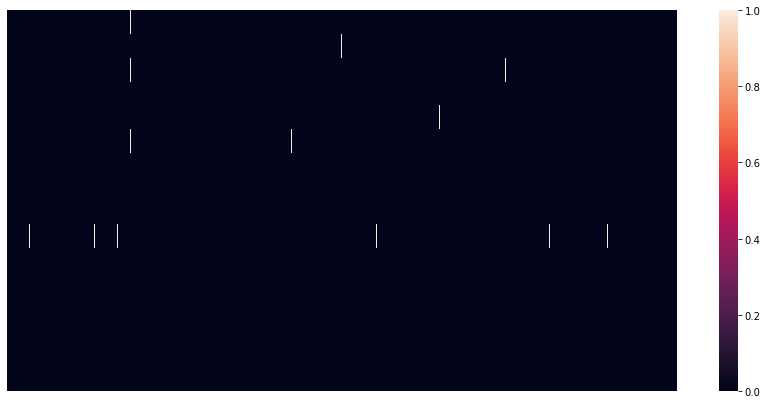

GO_term  count
13404  GO:0070062     15
2489   GO:0005829     10
6867   GO:0031424      7
10207  GO:0045095      7
2346   GO:0005576      7
13519  GO:0070268      7
2375   GO:0005634      7
2373   GO:0005615      6
5019   GO:0016020      5
2528   GO:0005886      5

In [162]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Dental plaque"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()


counts_gen_Dental_plaque = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Dental_plaque = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Dental plaque"]==1,GO].sum()
    list_counts_gen_Dental_plaque.append(count)
counts_gen_Dental_plaque["count"] = list_counts_gen_Dental_plaque
counts_gen_Dental_plaque.sort_values("count", ascending=False).head(10)

## Esophagus

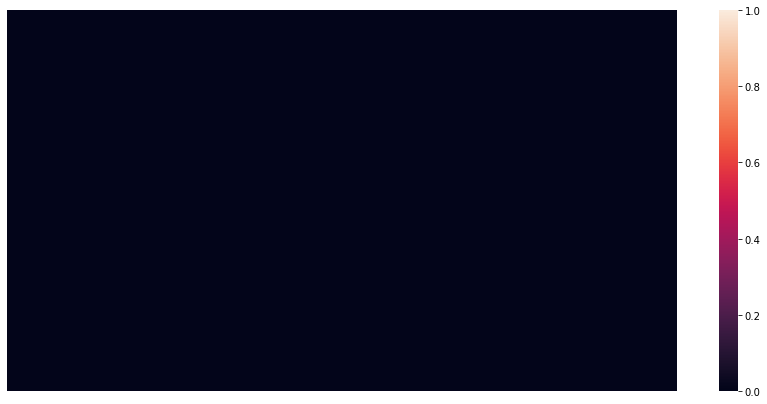

GO_term  count
5794   GO:0019730      1
11591  GO:0050727      1
12086  GO:0051701      1
2427   GO:0005737      1
7474   GO:0032689      1
9508   GO:0042834      1
10202  GO:0045087      1
400    GO:0001519      1
3871   GO:0008745      1
1354   GO:0003727      1

In [163]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Esophagus"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()


counts_nontspec_Esophagus = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Esophagus = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Esophagus"]==1,GO].sum()
    list_counts_nontspec_Esophagus.append(count)
counts_nontspec_Esophagus["count"] = list_counts_nontspec_Esophagus
counts_nontspec_Esophagus.sort_values("count", ascending=False).head(10)

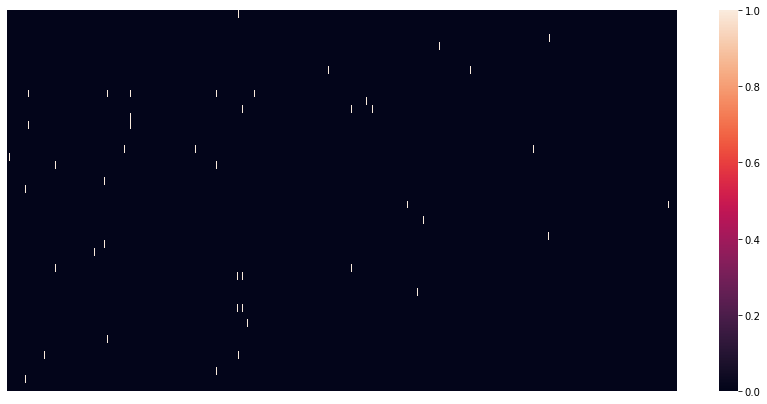

GO_term  count
2489   GO:0005829     29
2375   GO:0005634     24
2385   GO:0005654     23
2427   GO:0005737     22
1350   GO:0003723     20
5019   GO:0016020     12
13404  GO:0070062     12
10294  GO:0045296     11
2528   GO:0005886     11
2553   GO:0005925      9

In [164]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Esophagus"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()



counts_gen_Esophagus = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Esophagus = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Esophagus"]==1,GO].sum()
    list_counts_gen_Esophagus.append(count)
counts_gen_Esophagus["count"] = list_counts_gen_Esophagus
counts_gen_Esophagus.sort_values("count", ascending=False).head(10)

## Eye

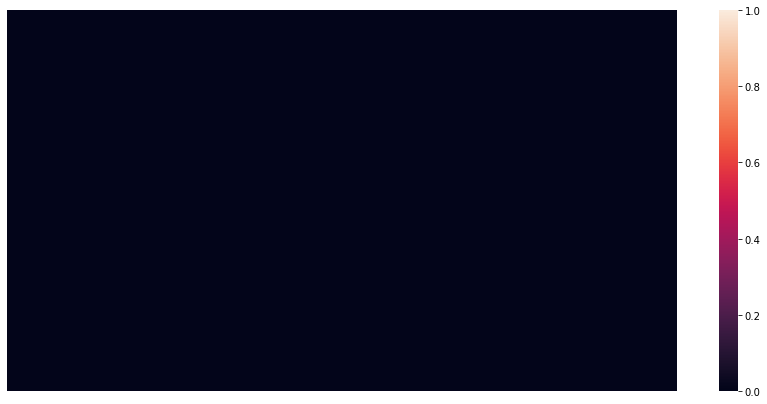

GO_term  count
3618   GO:0008236      1
403    GO:0001523      1
14974  GO:0090658      1
2986   GO:0006629      1
5838   GO:0019841      1
5393   GO:0016918      1
17075  GO:1903561      1
2346   GO:0005576      1
2312   GO:0005501      1
2373   GO:0005615      1

In [165]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["Eye"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

counts_tspec_Eye = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_Eye = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Eye"]==1,GO].sum()
    list_counts_tspec_Eye.append(count)
counts_tspec_Eye["count"] = list_counts_tspec_Eye
counts_tspec_Eye.sort_values("count", ascending=False).head(10)

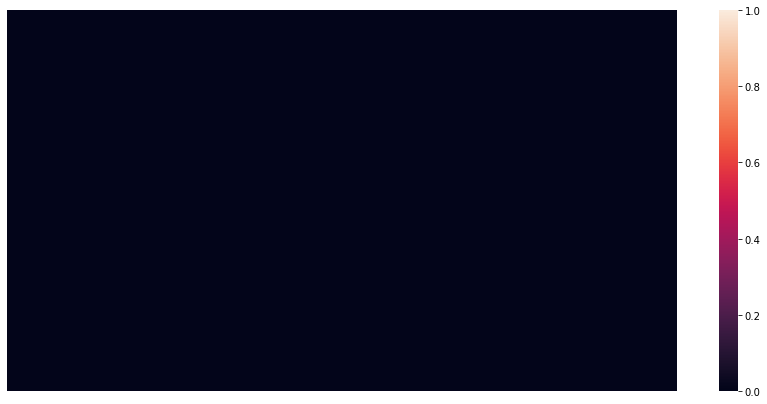

GO_term  count
12543  GO:0060271      1
2427   GO:0005737      1
2482   GO:0005814      1
0      GO:0000002      0
12533  GO:0060252      0
12532  GO:0060251      0
12531  GO:0060244      0
12530  GO:0060243      0
12529  GO:0060242      0
12528  GO:0060236      0

In [166]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Eye"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()


counts_nontspec_Eye = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Eye = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Eye"]==1,GO].sum()
    list_counts_nontspec_Eye.append(count)
counts_nontspec_Eye["count"] = list_counts_nontspec_Eye
counts_nontspec_Eye.sort_values("count", ascending=False).head(10)

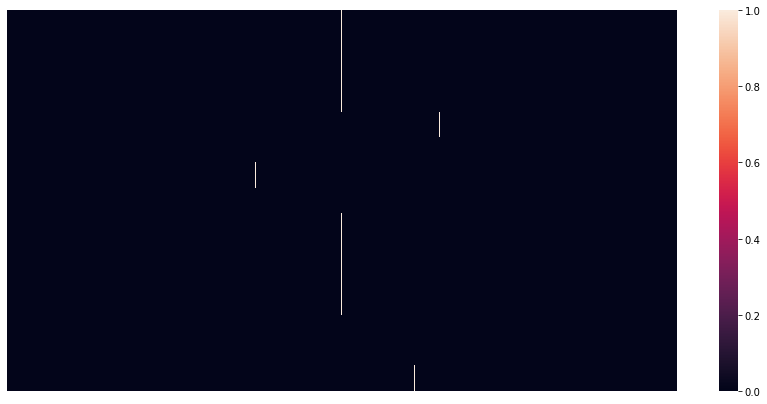

GO_term  count
13404  GO:0070062     13
2373   GO:0005615     11
2346   GO:0005576     10
3163   GO:0006911      8
14527  GO:0072562      8
5545   GO:0018149      8
11677  GO:0050871      8
1369   GO:0003823      8
3190   GO:0006958      8
4132   GO:0009897      8

In [167]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Eye"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()



counts_gen_Eye = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Eye = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Eye"]==1,GO].sum()
    list_counts_gen_Eye.append(count)
counts_gen_Eye["count"] = list_counts_gen_Eye
counts_gen_Eye.sort_values("count", ascending=False).head(10)

## Heart

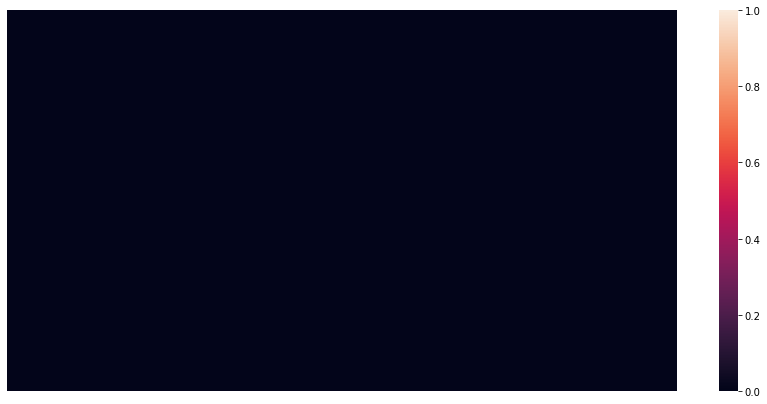

GO_term  count
2428   GO:0005739      2
1564   GO:0004129      1
2432   GO:0005743      1
2989   GO:0006635      1
2642   GO:0006091      1
2375   GO:0005634      1
10863  GO:0046872      1
328    GO:0000981      1
5374   GO:0016863      1
2790   GO:0006357      1

In [168]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["Heart"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

counts_tspec_Heart = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_Heart = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Heart"]==1,GO].sum()
    list_counts_tspec_Heart.append(count)
counts_tspec_Heart["count"] = list_counts_tspec_Heart
counts_tspec_Heart.sort_values("count", ascending=False).head(10)

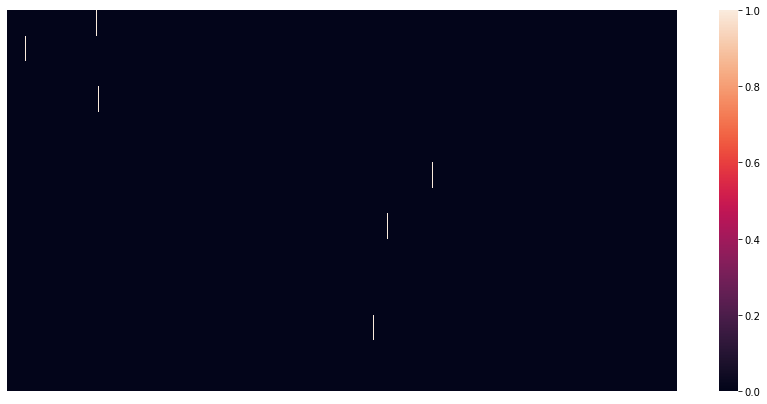

GO_term  count
2375   GO:0005634      5
13404  GO:0070062      5
2489   GO:0005829      4
2328   GO:0005524      4
2428   GO:0005739      4
2528   GO:0005886      3
6216   GO:0030018      3
1365   GO:0003779      3
10269  GO:0045214      3
3536   GO:0008092      2

In [169]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Heart"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()


counts_nontspec_Heart = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Heart = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Heart"]==1,GO].sum()
    list_counts_nontspec_Heart.append(count)
counts_nontspec_Heart["count"] = list_counts_nontspec_Heart
counts_nontspec_Heart.sort_values("count", ascending=False).head(10)

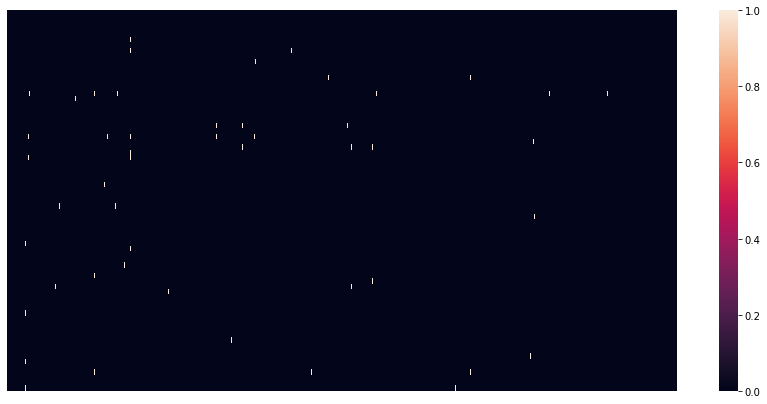

GO_term  count
2489   GO:0005829     39
13404  GO:0070062     34
2427   GO:0005737     32
2375   GO:0005634     29
2528   GO:0005886     27
2428   GO:0005739     20
1350   GO:0003723     19
2328   GO:0005524     18
5019   GO:0016020     17
2373   GO:0005615     16

In [170]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Heart"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()


counts_gen_Heart = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Heart = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Heart"]==1,GO].sum()
    list_counts_gen_Heart.append(count)
counts_gen_Heart["count"] = list_counts_gen_Heart
counts_gen_Heart.sort_values("count", ascending=False).head(10)

## HeLa cells

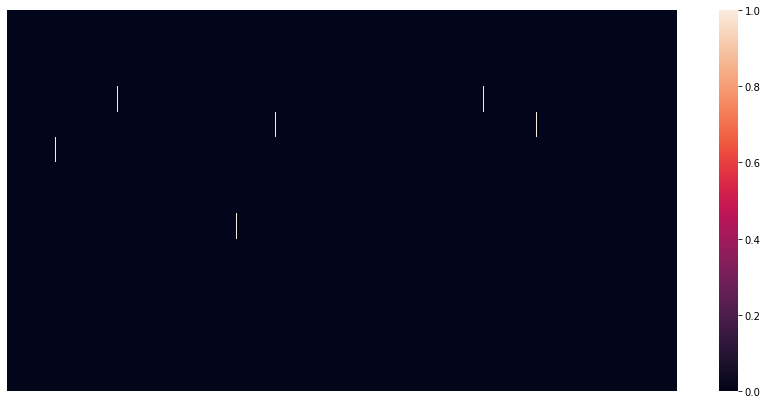

GO_term  count
2373  GO:0005615      6
2889  GO:0006508      5
2346  GO:0005576      5
1605  GO:0004252      5
2427  GO:0005737      4
2489  GO:0005829      4
3996  GO:0009235      3
2528  GO:0005886      3
6168  GO:0022617      3
3456  GO:0007586      3

In [171]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Hela"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()


counts_nontspec_Hela = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Hela = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Hela"]==1,GO].sum()
    list_counts_nontspec_Hela.append(count)
counts_nontspec_Hela["count"] = list_counts_nontspec_Hela
counts_nontspec_Hela.sort_values("count", ascending=False).head(10)

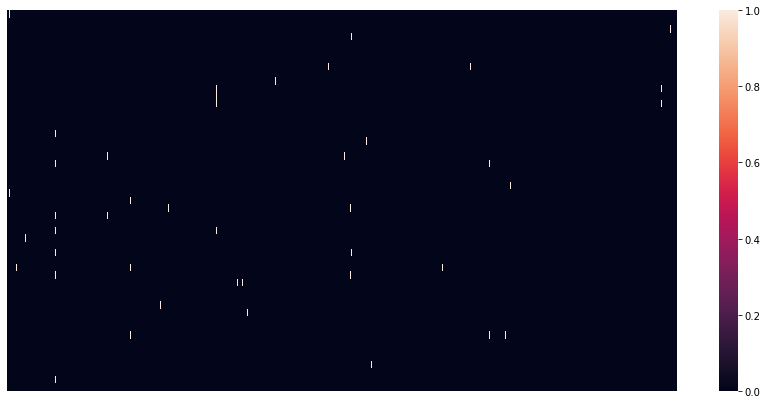

GO_term  count
2489   GO:0005829     29
2375   GO:0005634     28
2427   GO:0005737     27
1350   GO:0003723     23
13404  GO:0070062     20
2385   GO:0005654     17
5019   GO:0016020     13
2528   GO:0005886     10
10294  GO:0045296      8
2553   GO:0005925      8

In [172]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Hela"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()



counts_gen_Hela = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Hela = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Hela"]==1,GO].sum()
    list_counts_gen_Hela.append(count)
counts_gen_Hela["count"] = list_counts_gen_Hela
counts_gen_Hela.sort_values("count", ascending=False).head(10)

## Kidney

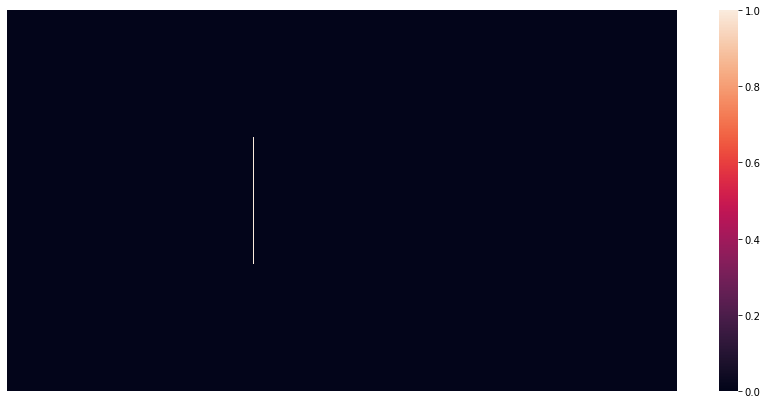

GO_term  count
2556   GO:0005930      2
16566  GO:1902017      1
2555   GO:0005929      1
6912   GO:0031514      1
2427   GO:0005737      1
5865   GO:0019894      1
8834   GO:0036126      1
6916   GO:0031526      1
7330   GO:0032414      1
537    GO:0001764      1

In [173]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["Kidney"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

counts_tspec_Kidney = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_Kidney = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Kidney"]==1,GO].sum()
    list_counts_tspec_Kidney.append(count)
counts_tspec_Kidney["count"] = list_counts_tspec_Kidney
counts_tspec_Kidney.sort_values("count", ascending=False).head(10)

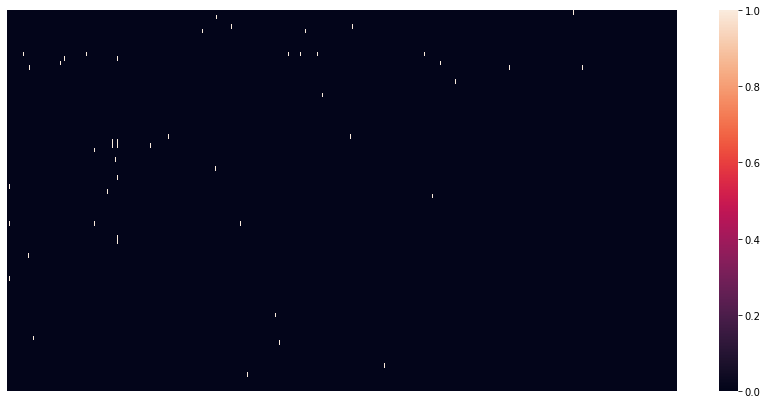

GO_term  count
2489   GO:0005829     25
13404  GO:0070062     22
2427   GO:0005737     21
2428   GO:0005739     18
2528   GO:0005886     16
2385   GO:0005654     15
2444   GO:0005759     15
2375   GO:0005634     15
10863  GO:0046872     13
2373   GO:0005615     12

In [174]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Kidney"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

counts_nontspec_Kidney = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Kidney = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Kidney"]==1,GO].sum()
    list_counts_nontspec_Kidney.append(count)
counts_nontspec_Kidney["count"] = list_counts_nontspec_Kidney
counts_nontspec_Kidney.sort_values("count", ascending=False).head(10)

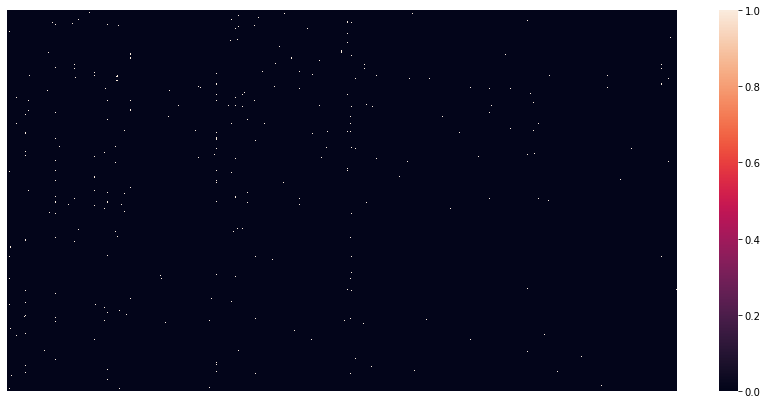

In [175]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Kidney"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [176]:
counts_gen_Kidney = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Kidney = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Kidney"]==1,GO].sum()
    list_counts_gen_Kidney.append(count)
counts_gen_Kidney["count"] = list_counts_gen_Kidney
counts_gen_Kidney.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829    285
2375   GO:0005634    229
2427   GO:0005737    223
13404  GO:0070062    176
2385   GO:0005654    176
1350   GO:0003723    148
2528   GO:0005886    148
5019   GO:0016020    129
2328   GO:0005524     80
9495   GO:0042802     75

In [177]:
unique_Kidney_gen = pd.merge(counts_gen_Kidney, counts_gen, how="inner", on =["GO_term"], suffixes=["_Kidney", "_All"])
unique_Kidney_gen["percentage a/w_Kidney"] = unique_Kidney_gen["count_Kidney"]*100/general_P_prot_GO_all[general_P_prot_GO_all["Kidney"]==1].shape[0]
unique_Kidney_gen["percentage a/w gen"] = unique_Kidney_gen["count_All"]*100/general_P_prot_GO_all.shape[0]
unique_Kidney_gen_mapped = pd.merge(unique_Kidney_gen,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Kidney_gen_mapped[((unique_Kidney_gen_mapped["percentage a/w_Kidney"]>5)&(unique_Kidney_gen_mapped["percentage a/w gen"]>10))]

GO_term  count_Kidney  count_All  percentage a/w_Kidney  \
1350   GO:0003723           148        362              29.482072   
2328   GO:0005524            80        246              15.936255   
2375   GO:0005634           229        699              45.617530   
2385   GO:0005654           176        553              35.059761   
2427   GO:0005737           223        690              44.422311   
2489   GO:0005829           285        856              56.772908   
2528   GO:0005886           148        506              29.482072   
5019   GO:0016020           129        406              25.697211   
9495   GO:0042802            75        240              14.940239   
13404  GO:0070062           176        453              35.059761   

       percentage a/w gen               GO term name  \
1350            20.888632                RNA binding   
2328            14.195038                ATP binding   
2375            40.334680                    nucleus   
2385            31.909983                nucleoplasm   
2427            39.815349                  cytoplasm   
2489            49.394114                    cytosol   
2528            29.197923            plasma membrane   
5019            23.427582                   membrane   
9495            13.848817  identical protein binding   
13404           26.139642      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [178]:
unique_Kidney_gen_mapped_sub = unique_Kidney_gen_mapped.copy()
unique_Kidney_gen_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Kidney_gen_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Kidney_gen_mapped_sub.drop(["count_Kidney"], inplace=True, axis=1)
unique_Kidney_gen_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Kidney_gen_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Kidney_gen_mapped_sub.drop(["percentage a/w gen"], inplace=True, axis=1)
unique_Kidney_gen_mapped_sub

percentage a/w_Kidney
GO_term                          
GO:0000002                    0.0
GO:0000003                    0.0
GO:0000009                    0.0
GO:0000010                    0.0
GO:0000012                    0.0
...                           ...
GO:2001301                    0.0
GO:2001302                    0.0
GO:2001303                    0.0
GO:2001306                    0.0
GO:2001311                    0.0

[18793 rows x 1 columns]

## Liver

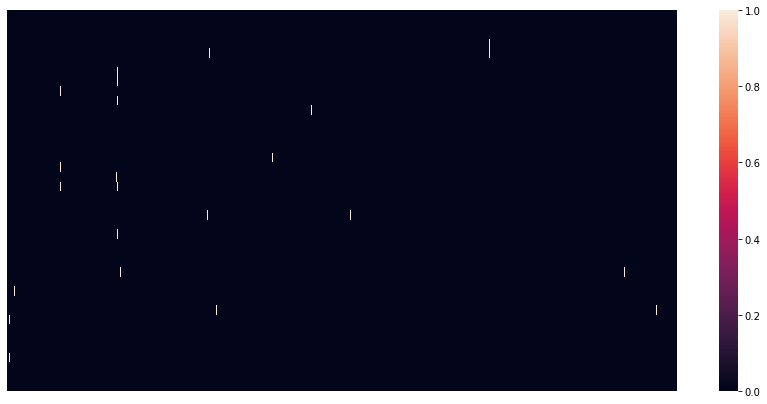

In [39]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["Liver"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [40]:
counts_tspec_Liver = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_Liver = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Liver"]==1,GO].sum()
    list_counts_tspec_Liver.append(count)
counts_tspec_Liver["count"] = list_counts_tspec_Liver
counts_tspec_Liver.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829     15
13404  GO:0070062     15
2528   GO:0005886     10
2427   GO:0005737      9
5020   GO:0016021      9
2428   GO:0005739      8
5019   GO:0016020      7
2385   GO:0005654      7
2469   GO:0005789      7
9674   GO:0043231      7

In [41]:
unique_Liver_tspec = pd.merge(counts_tspec_Liver, counts_tspec, how="inner", on =["GO_term"], suffixes=["_Liver", "_All"])
unique_Liver_tspec["percentage a/w_Liver"] = unique_Liver_tspec["count_Liver"]*100/t_spec_prot_GO_all[t_spec_prot_GO_all["Liver"]==1].shape[0]
unique_Liver_tspec["percentage a/w tspec"] =unique_Liver_tspec["count_All"]*100/t_spec_prot_GO_all.shape[0]
unique_Liver_tspec_mapped = pd.merge(unique_Liver_tspec,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Liver_tspec_mapped[((unique_Liver_tspec_mapped["percentage a/w_Liver"]>5)&(unique_Liver_tspec_mapped["percentage a/w tspec"]>10))]

GO_term  count_Liver  count_All  percentage a/w_Liver  \
2375   GO:0005634            3        667                   7.5   
2385   GO:0005654            7        520                  17.5   
2427   GO:0005737            9        566                  22.5   
2489   GO:0005829           15        700                  37.5   
2528   GO:0005886           10        474                  25.0   
5019   GO:0016020            7        273                  17.5   
5020   GO:0016021            9        254                  22.5   
9495   GO:0042802            4        204                  10.0   
13404  GO:0070062           15        327                  37.5   

       percentage a/w tspec                    GO term name  \
2375              34.065373                         nucleus   
2385              26.557712                     nucleoplasm   
2427              28.907048                       cytoplasm   
2489              35.750766                         cytosol   
2528              24.208376                 plasma membrane   
5019              13.942799                        membrane   
5020              12.972421  integral component of membrane   
9495              10.418795       identical protein binding   
13404             16.700715           extracellular exosome   

                                      GO term definition  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
5020   The component of a membrane consisting of the ...  
9495   Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [42]:
unique_Liver_tspec_mapped_sub = unique_Liver_tspec_mapped.copy()
unique_Liver_tspec_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Liver_tspec_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Liver_tspec_mapped_sub.drop(["count_Liver"], inplace=True, axis=1)
unique_Liver_tspec_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Liver_tspec_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Liver_tspec_mapped_sub.drop(["percentage a/w tspec"], inplace=True, axis=1)
unique_Liver_tspec_mapped_sub

percentage a/w_Liver
GO_term                         
GO:0000002                   0.0
GO:0000003                   0.0
GO:0000009                   0.0
GO:0000010                   0.0
GO:0000012                   0.0
...                          ...
GO:2001301                   0.0
GO:2001302                   0.0
GO:2001303                   0.0
GO:2001306                   0.0
GO:2001311                   0.0

[18793 rows x 1 columns]

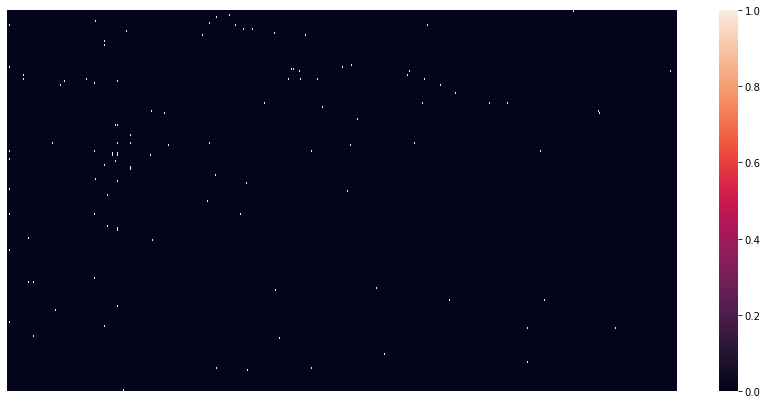

In [43]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Liver"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [44]:
counts_nontspec_Liver = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Liver = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Liver"]==1,GO].sum()
    list_counts_nontspec_Liver.append(count)
counts_nontspec_Liver["count"] = list_counts_nontspec_Liver
counts_nontspec_Liver.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829     78
2427   GO:0005737     66
2375   GO:0005634     56
2385   GO:0005654     49
13404  GO:0070062     41
2528   GO:0005886     40
5019   GO:0016020     34
2428   GO:0005739     29
2328   GO:0005524     27
9495   GO:0042802     25

In [45]:
unique_Liver_nontspec = pd.merge(counts_nontspec_Liver, counts_nontspec, how="inner", on =["GO_term"], suffixes=["_Liver", "_All"])
unique_Liver_nontspec["percentage a/w_Liver"] = unique_Liver_nontspec["count_Liver"]*100/non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Liver"]==1].shape[0]
unique_Liver_nontspec["percentage a/w nontspec"] = unique_Liver_nontspec["count_All"]*100/non_t_spec_prot_GO_all.shape[0]
unique_Liver_nontspec_mapped = pd.merge(unique_Liver_nontspec,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Liver_nontspec_mapped[((unique_Liver_nontspec_mapped["percentage a/w_Liver"]>5)&(unique_Liver_nontspec_mapped["percentage a/w nontspec"]>10))]

GO_term  count_Liver  count_All  percentage a/w_Liver  \
1350   GO:0003723           23        317             12.041885   
2328   GO:0005524           27        276             14.136126   
2375   GO:0005634           56        794             29.319372   
2385   GO:0005654           49        708             25.654450   
2427   GO:0005737           66        699             34.554974   
2489   GO:0005829           78        936             40.837696   
2528   GO:0005886           40        420             20.942408   
5019   GO:0016020           34        380             17.801047   
9495   GO:0042802           25        246             13.089005   
10863  GO:0046872           23        263             12.041885   
13404  GO:0070062           41        375             21.465969   

       percentage a/w nontspec               GO term name  \
1350                 15.546837                RNA binding   
2328                 13.536047                ATP binding   
2375                 38.940657                    nucleus   
2385                 34.722903                nucleoplasm   
2427                 34.281511                  cytoplasm   
2489                 45.904855                    cytosol   
2528                 20.598333            plasma membrane   
5019                 18.636587                   membrane   
9495                 12.064738  identical protein binding   
10863                12.898480          metal ion binding   
13404                18.391368      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
10863  Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [46]:
unique_Liver_nontspec_mapped_sub = unique_Liver_nontspec_mapped.copy()
unique_Liver_nontspec_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Liver_nontspec_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Liver_nontspec_mapped_sub.drop(["count_Liver"], inplace=True, axis=1)
unique_Liver_nontspec_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Liver_nontspec_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Liver_nontspec_mapped_sub.drop(["percentage a/w nontspec"], inplace=True, axis=1)
unique_Liver_nontspec_mapped_sub

percentage a/w_Liver
GO_term                         
GO:0000002                   0.0
GO:0000003                   0.0
GO:0000009                   0.0
GO:0000010                   0.0
GO:0000012                   0.0
...                          ...
GO:2001301                   0.0
GO:2001302                   0.0
GO:2001303                   0.0
GO:2001306                   0.0
GO:2001311                   0.0

[18793 rows x 1 columns]

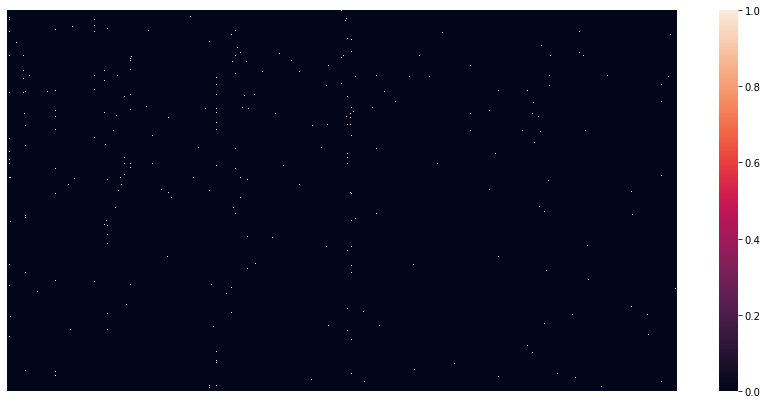

In [47]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Liver"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [48]:
counts_gen_Liver = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Liver = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Liver"]==1,GO].sum()
    list_counts_gen_Liver.append(count)
counts_gen_Liver["count"] = list_counts_gen_Liver
counts_gen_Liver.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829    715
2427   GO:0005737    554
2375   GO:0005634    524
2528   GO:0005886    439
2385   GO:0005654    406
13404  GO:0070062    367
5019   GO:0016020    324
1350   GO:0003723    275
2328   GO:0005524    211
9495   GO:0042802    202

In [49]:
unique_Liver_gen = pd.merge(counts_gen_Liver, counts_gen, how="inner", on =["GO_term"], suffixes=["_Liver", "_All"])
unique_Liver_gen["percentage a/w_Liver"] = unique_Liver_gen["count_Liver"]*100/general_P_prot_GO_all[general_P_prot_GO_all["Liver"]==1].shape[0]
unique_Liver_gen["percentage a/w gen"] = unique_Liver_gen["count_All"]*100/general_P_prot_GO_all.shape[0]
unique_Liver_gen_mapped = pd.merge(unique_Liver_gen,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Liver_gen_mapped[((unique_Liver_gen_mapped["percentage a/w_Liver"]>5)&(unique_Liver_gen_mapped["percentage a/w gen"]>10))]

GO_term  count_Liver  count_All  percentage a/w_Liver  \
1350   GO:0003723          275        362             19.586895   
2328   GO:0005524          211        246             15.028490   
2375   GO:0005634          524        699             37.321937   
2385   GO:0005654          406        553             28.917379   
2427   GO:0005737          554        690             39.458689   
2489   GO:0005829          715        856             50.925926   
2528   GO:0005886          439        506             31.267806   
5019   GO:0016020          324        406             23.076923   
9495   GO:0042802          202        240             14.387464   
13404  GO:0070062          367        453             26.139601   

       percentage a/w gen               GO term name  \
1350            20.888632                RNA binding   
2328            14.195038                ATP binding   
2375            40.334680                    nucleus   
2385            31.909983                nucleoplasm   
2427            39.815349                  cytoplasm   
2489            49.394114                    cytosol   
2528            29.197923            plasma membrane   
5019            23.427582                   membrane   
9495            13.848817  identical protein binding   
13404           26.139642      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [50]:
unique_Liver_gen_mapped_sub = unique_Liver_gen_mapped.copy()
unique_Liver_gen_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Liver_gen_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Liver_gen_mapped_sub.drop(["count_Liver"], inplace=True, axis=1)
unique_Liver_gen_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Liver_gen_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Liver_gen_mapped_sub.drop(["percentage a/w gen"], inplace=True, axis=1)
unique_Liver_gen_mapped_sub

percentage a/w_Liver
GO_term                         
GO:0000002              0.071225
GO:0000003              0.000000
GO:0000009              0.000000
GO:0000010              0.000000
GO:0000012              0.071225
...                          ...
GO:2001301              0.000000
GO:2001302              0.000000
GO:2001303              0.000000
GO:2001306              0.000000
GO:2001311              0.000000

[18793 rows x 1 columns]

In [51]:
list_Liver = [unique_Liver_tspec_mapped[["GO_term", "percentage a/w tspec", "percentage a/w_Liver"]].set_index(["GO_term"]),
              unique_Liver_nontspec_mapped[["GO_term", "percentage a/w nontspec", "percentage a/w_Liver"]].set_index(["GO_term"]),
            unique_Liver_gen_mapped[["GO_term","percentage a/w gen","percentage a/w_Liver","GO term name",
                                     "GO term definition"]].set_index(["GO_term"])]
unique_Liver_all = pd.concat(list_Liver, axis=1)
unique_Liver_all.columns = ["percentage a/w tspec", "percentage a/w_Liver_tspec",
                            "percentage a/w nontspec", "percentage a/w_Liver_nontspec",
                           "percentage a/w gen", "percentage a/w_Liver_gen",
                           "GO term name", "GO term definition"]
unique_Liver_all[(((unique_Liver_all["percentage a/w_Liver_tspec"]>=2.5)&(unique_Liver_all["percentage a/w tspec"]<=0.09))|
                 ((unique_Liver_all["percentage a/w_Liver_nontspec"]>=2.5)&(unique_Liver_all["percentage a/w nontspec"]<=0.09))|
               ((unique_Liver_all["percentage a/w_Liver_gen"]>=2.5)&(unique_Liver_all["percentage a/w gen"]<=0.09)))]

percentage a/w tspec  percentage a/w_Liver_tspec  \
GO_term                                                        
GO:0002764              0.051073                         2.5   
GO:0004031              0.051073                         2.5   
GO:0004053              0.051073                         2.5   
GO:0004174              0.051073                         2.5   
GO:0004462              0.051073                         2.5   
...                          ...                         ...   
GO:1904221              0.051073                         2.5   
GO:1904486              0.051073                         2.5   
GO:1904708              0.051073                         2.5   
GO:1990962              0.051073                         2.5   
GO:2000552              0.051073                         2.5   

            percentage a/w nontspec  percentage a/w_Liver_nontspec  \
GO_term                                                              
GO:0002764                 0.000000                            0.0   
GO:0004031                 0.000000                            0.0   
GO:0004053                 0.000000                            0.0   
GO:0004174                 0.000000                            0.0   
GO:0004462                 0.000000                            0.0   
...                             ...                            ...   
GO:1904221                 0.000000                            0.0   
GO:1904486                 0.049044                            0.0   
GO:1904708                 0.000000                            0.0   
GO:1990962                 0.049044                            0.0   
GO:2000552                 0.000000                            0.0   

            percentage a/w gen  percentage a/w_Liver_gen  \
GO_term                                                    
GO:0002764                 0.0                       0.0   
GO:0004031                 0.0                       0.0   
GO:0004053                 0.0                       0.0   
GO:0004174                 0.0                       0.0   
GO:0004462                 0.0                       0.0   
...                        ...                       ...   
GO:1904221                 0.0                       0.0   
GO:1904486                 0.0                       0.0   
GO:1904708                 0.0                       0.0   
GO:1990962                 0.0                       0.0   
GO:2000552                 0.0                       0.0   

                                                 GO term name  \
GO_term                                                         
GO:0002764       immune response-regulating signaling pathway   
GO:0004031                          aldehyde oxidase activity   
GO:0004053                                  arginase activity   
GO:0004174  electron-transferring-flavoprotein dehydrogena...   
GO:0004462                  lactoylglutathione lyase activity   
...                                                       ...   
GO:1904221  negative regulation of serine C-palmitoyltrans...   
GO:1904486               response to 17alpha-ethynylestradiol   
GO:1904708     regulation of granulosa cell apoptotic process   
GO:1990962    xenobiotic transport across blood-brain barrier   
GO:2000552  negative regulation of T-helper 2 cell cytokin...   

                                           GO term definition  
GO_term                                                        
GO:0002764  The cascade of processes by which a signal int...  
GO:0004031  Catalysis of the reaction: an aldehyde + H2O +...  
GO:0004053  Catalysis of the reaction: L-arginine + H2O = ...  
GO:0004174  Catalysis of the reaction: reduced ETF + ubiqu...  
GO:0004462  Catalysis of the reaction: (R)-S-lactoylglutat...  
...                                                       ...  
GO:1904221  Any process that stops, prevents or reduces th...  
GO:1904486  Any process that results in a change in state ...  
G

In [52]:
unique_Liver_all[(((unique_Liver_all["percentage a/w_Liver_tspec"]>=2.5)&(unique_Liver_all["percentage a/w tspec"]<=0.09))|
                 ((unique_Liver_all["percentage a/w_Liver_nontspec"]>=2.5)&(unique_Liver_all["percentage a/w nontspec"]<=0.09))|
               ((unique_Liver_all["percentage a/w_Liver_gen"]>=2.5)&(unique_Liver_all["percentage a/w gen"]<=0.09)))].to_csv("GO_terms associated with liver_shortened.tsv", sep="\t")

## Lung

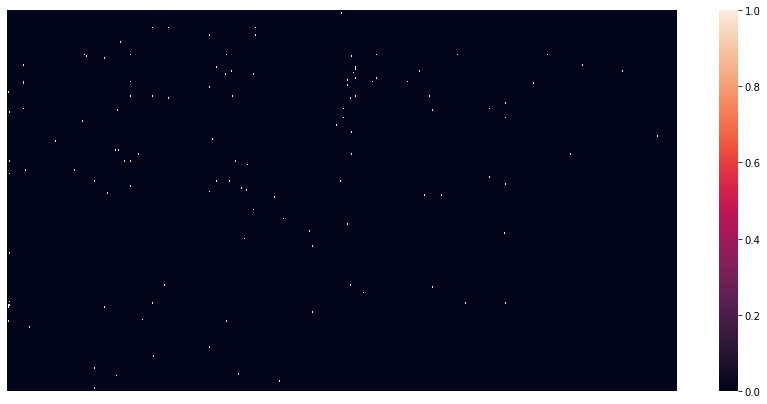

In [216]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["Lung"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [217]:
counts_tspec_Lung = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_Lung = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Lung"]==1,GO].sum()
    list_counts_tspec_Lung.append(count)
counts_tspec_Lung["count"] = list_counts_tspec_Lung
counts_tspec_Lung.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829     82
2375   GO:0005634     81
2427   GO:0005737     78
2528   GO:0005886     76
2385   GO:0005654     49
2328   GO:0005524     43
5020   GO:0016021     31
10863  GO:0046872     30
9495   GO:0042802     28
5019   GO:0016020     27

In [218]:
unique_Lung_tspec = pd.merge(counts_tspec_Lung, counts_tspec, how="inner", on =["GO_term"], suffixes=["_Lung", "_All"])
unique_Lung_tspec["percentage a/w_Lung"] = unique_Lung_tspec["count_Lung"]*100/t_spec_prot_GO_all[t_spec_prot_GO_all["Lung"]==1].shape[0]
unique_Lung_tspec["percentage a/w tspec"] =unique_Lung_tspec["count_All"]*100/t_spec_prot_GO_all.shape[0]
unique_Lung_tspec_mapped = pd.merge(unique_Lung_tspec,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Lung_tspec_mapped[((unique_Lung_tspec_mapped["percentage a/w_Lung"]>5)&(unique_Lung_tspec_mapped["percentage a/w tspec"]>10))]

GO_term  count_Lung  count_All  percentage a/w_Lung  \
2375   GO:0005634          81        667            38.388626   
2385   GO:0005654          49        520            23.222749   
2427   GO:0005737          78        566            36.966825   
2489   GO:0005829          82        700            38.862559   
2528   GO:0005886          76        474            36.018957   
5019   GO:0016020          27        273            12.796209   
5020   GO:0016021          31        254            14.691943   
9495   GO:0042802          28        204            13.270142   
10863  GO:0046872          30        247            14.218009   
13404  GO:0070062          26        327            12.322275   

       percentage a/w tspec                    GO term name  \
2375              34.065373                         nucleus   
2385              26.557712                     nucleoplasm   
2427              28.907048                       cytoplasm   
2489              35.750766                         cytosol   
2528              24.208376                 plasma membrane   
5019              13.942799                        membrane   
5020              12.972421  integral component of membrane   
9495              10.418795       identical protein binding   
10863             12.614913               metal ion binding   
13404             16.700715           extracellular exosome   

                                      GO term definition  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
5020   The component of a membrane consisting of the ...  
9495   Interacting selectively and non-covalently wit...  
10863  Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [219]:
unique_Lung_tspec_mapped_sub = unique_Lung_tspec_mapped.copy()
unique_Lung_tspec_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Lung_tspec_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Lung_tspec_mapped_sub.drop(["count_Lung"], inplace=True, axis=1)
unique_Lung_tspec_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Lung_tspec_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Lung_tspec_mapped_sub.drop(["percentage a/w tspec"], inplace=True, axis=1)
unique_Lung_tspec_mapped_sub

percentage a/w_Lung
GO_term                        
GO:0000002                  0.0
GO:0000003                  0.0
GO:0000009                  0.0
GO:0000010                  0.0
GO:0000012                  0.0
...                         ...
GO:2001301                  0.0
GO:2001302                  0.0
GO:2001303                  0.0
GO:2001306                  0.0
GO:2001311                  0.0

[18793 rows x 1 columns]

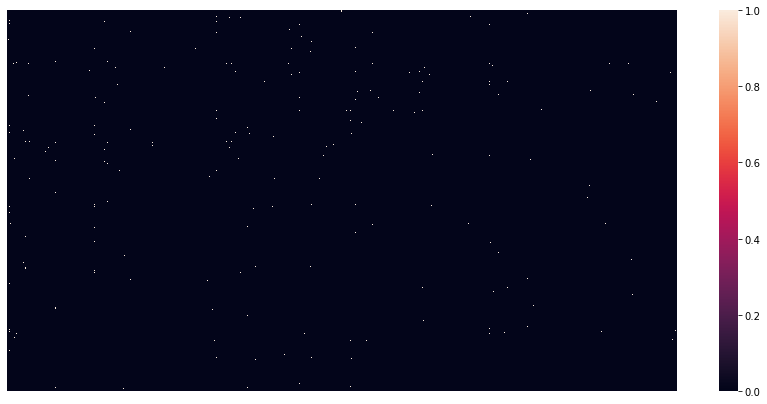

In [220]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Lung"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [221]:
counts_nontspec_Lung = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Lung = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Lung"]==1,GO].sum()
    list_counts_nontspec_Lung.append(count)
counts_nontspec_Lung["count"] = list_counts_nontspec_Lung
counts_nontspec_Lung.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829    351
2375   GO:0005634    272
2385   GO:0005654    245
2427   GO:0005737    245
2528   GO:0005886    175
5019   GO:0016020    116
10863  GO:0046872    105
2328   GO:0005524    104
13404  GO:0070062    103
1350   GO:0003723    101

In [222]:
unique_Lung_nontspec = pd.merge(counts_nontspec_Lung, counts_nontspec, how="inner", on =["GO_term"], suffixes=["_Lung", "_All"])
unique_Lung_nontspec["percentage a/w_Lung"] = unique_Lung_nontspec["count_Lung"]*100/non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Lung"]==1].shape[0]
unique_Lung_nontspec["percentage a/w nontspec"] = unique_Lung_nontspec["count_All"]*100/non_t_spec_prot_GO_all.shape[0]
unique_Lung_nontspec_mapped = pd.merge(unique_Lung_nontspec,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Lung_nontspec_mapped[((unique_Lung_nontspec_mapped["percentage a/w_Lung"]>5)&(unique_Lung_nontspec_mapped["percentage a/w nontspec"]>10))]

GO_term  count_Lung  count_All  percentage a/w_Lung  \
1350   GO:0003723         101        317            14.407989   
2328   GO:0005524         104        276            14.835949   
2375   GO:0005634         272        794            38.801712   
2385   GO:0005654         245        708            34.950071   
2427   GO:0005737         245        699            34.950071   
2489   GO:0005829         351        936            50.071327   
2528   GO:0005886         175        420            24.964337   
5019   GO:0016020         116        380            16.547789   
9495   GO:0042802          81        246            11.554922   
10863  GO:0046872         105        263            14.978602   
13404  GO:0070062         103        375            14.693295   

       percentage a/w nontspec               GO term name  \
1350                 15.546837                RNA binding   
2328                 13.536047                ATP binding   
2375                 38.940657                    nucleus   
2385                 34.722903                nucleoplasm   
2427                 34.281511                  cytoplasm   
2489                 45.904855                    cytosol   
2528                 20.598333            plasma membrane   
5019                 18.636587                   membrane   
9495                 12.064738  identical protein binding   
10863                12.898480          metal ion binding   
13404                18.391368      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
10863  Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [223]:
unique_Lung_nontspec_mapped_sub = unique_Lung_nontspec_mapped.copy()
unique_Lung_nontspec_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Lung_nontspec_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Lung_nontspec_mapped_sub.drop(["count_Lung"], inplace=True, axis=1)
unique_Lung_nontspec_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Lung_nontspec_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Lung_nontspec_mapped_sub.drop(["percentage a/w nontspec"], inplace=True, axis=1)
unique_Lung_nontspec_mapped_sub

percentage a/w_Lung
GO_term                        
GO:0000002             0.142653
GO:0000003             0.000000
GO:0000009             0.000000
GO:0000010             0.000000
GO:0000012             0.000000
...                         ...
GO:2001301             0.000000
GO:2001302             0.000000
GO:2001303             0.000000
GO:2001306             0.000000
GO:2001311             0.000000

[18793 rows x 1 columns]

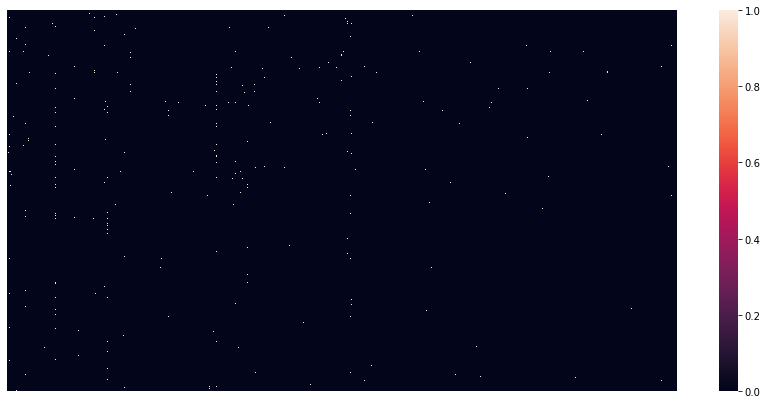

In [224]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Lung"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [225]:
counts_gen_Lung = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Lung = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Lung"]==1,GO].sum()
    list_counts_gen_Lung.append(count)
counts_gen_Lung["count"] = list_counts_gen_Lung
counts_gen_Lung.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829    564
2375   GO:0005634    509
2427   GO:0005737    464
2385   GO:0005654    415
2528   GO:0005886    280
1350   GO:0003723    276
13404  GO:0070062    265
5019   GO:0016020    256
2328   GO:0005524    155
9495   GO:0042802    149

In [226]:
unique_Lung_gen = pd.merge(counts_gen_Lung, counts_gen, how="inner", on =["GO_term"], suffixes=["_Lung", "_All"])
unique_Lung_gen["percentage a/w_Lung"] = unique_Lung_gen["count_Lung"]*100/general_P_prot_GO_all[general_P_prot_GO_all["Lung"]==1].shape[0]
unique_Lung_gen["percentage a/w gen"] = unique_Lung_gen["count_All"]*100/general_P_prot_GO_all.shape[0]
unique_Lung_gen_mapped = pd.merge(unique_Lung_gen,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Lung_gen_mapped[((unique_Lung_gen_mapped["percentage a/w_Lung"]>5)&(unique_Lung_gen_mapped["percentage a/w gen"]>10))]

GO_term  count_Lung  count_All  percentage a/w_Lung  \
1350   GO:0003723         276        362            25.698324   
2328   GO:0005524         155        246            14.432030   
2375   GO:0005634         509        699            47.392924   
2385   GO:0005654         415        553            38.640596   
2427   GO:0005737         464        690            43.202980   
2489   GO:0005829         564        856            52.513966   
2528   GO:0005886         280        506            26.070764   
5019   GO:0016020         256        406            23.836127   
9495   GO:0042802         149        240            13.873371   
13404  GO:0070062         265        453            24.674115   

       percentage a/w gen               GO term name  \
1350            20.888632                RNA binding   
2328            14.195038                ATP binding   
2375            40.334680                    nucleus   
2385            31.909983                nucleoplasm   
2427            39.815349                  cytoplasm   
2489            49.394114                    cytosol   
2528            29.197923            plasma membrane   
5019            23.427582                   membrane   
9495            13.848817  identical protein binding   
13404           26.139642      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [227]:
unique_Lung_gen_mapped_sub = unique_Lung_gen_mapped.copy()
unique_Lung_gen_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Lung_gen_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Lung_gen_mapped_sub.drop(["count_Lung"], inplace=True, axis=1)
unique_Lung_gen_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Lung_gen_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Lung_gen_mapped_sub.drop(["percentage a/w gen"], inplace=True, axis=1)
unique_Lung_gen_mapped_sub

percentage a/w_Lung
GO_term                        
GO:0000002              0.00000
GO:0000003              0.00000
GO:0000009              0.00000
GO:0000010              0.00000
GO:0000012              0.09311
...                         ...
GO:2001301              0.00000
GO:2001302              0.00000
GO:2001303              0.00000
GO:2001306              0.00000
GO:2001311              0.00000

[18793 rows x 1 columns]

In [228]:
list_Lung = [unique_Lung_tspec_mapped[["GO_term", "percentage a/w tspec", "percentage a/w_Lung"]].set_index(["GO_term"]),
              unique_Lung_nontspec_mapped[["GO_term", "percentage a/w nontspec", "percentage a/w_Lung"]].set_index(["GO_term"]),
            unique_Lung_gen_mapped[["GO_term","percentage a/w gen","percentage a/w_Lung","GO term name",
                                     "GO term definition"]].set_index(["GO_term"])]
unique_Lung_all = pd.concat(list_Lung, axis=1)
unique_Lung_all.columns = ["percentage a/w tspec", "percentage a/w_Lung_tspec",
                            "percentage a/w nontspec", "percentage a/w_Lung_nontspec",
                           "percentage a/w gen", "percentage a/w_Lung_gen",
                           "GO term name", "GO term definition"]
unique_Lung_all[(((unique_Lung_all["percentage a/w_Lung_tspec"]>=1.5)&(unique_Lung_all["percentage a/w tspec"]<=0.5))|
                 ((unique_Lung_all["percentage a/w_Lung_nontspec"]>=1.5)&(unique_Lung_all["percentage a/w nontspec"]<=0.5))|
               ((unique_Lung_all["percentage a/w_Lung_gen"]>=1.5)&(unique_Lung_all["percentage a/w gen"]<=0.5)))]
#kinases (more associated with general proteins, but here 2* as high t-spec liver), receptor, cell growth, immunity

percentage a/w tspec  percentage a/w_Lung_tspec  \
GO_term                                                       
GO:0004707              0.306435                   2.843602   
GO:0004712              0.408580                   1.895735   
GO:0004715              0.408580                   2.369668   
GO:0005004              0.204290                   1.895735   
GO:0005005              0.255363                   2.369668   
GO:0006654              0.357508                   2.369668   
GO:0007205              0.306435                   1.895735   
GO:0007259              0.357508                   1.895735   
GO:0010634              0.459653                   2.369668   
GO:0016301              0.306435                   1.895735   
GO:0019933              0.306435                   1.895735   
GO:0031167              0.204290                   1.895735   
GO:0031234              0.459653                   1.895735   
GO:0043548              0.255363                   1.895735   
GO:0043560              0.204290                   1.895735   
GO:0051090              0.255363                   1.895735   
GO:0070102              0.204290                   1.895735   
GO:0071300              0.459653                   1.895735   

            percentage a/w nontspec  percentage a/w_Lung_nontspec  \
GO_term                                                             
GO:0004707                 0.147131                      0.285307   
GO:0004712                 0.245218                      0.713267   
GO:0004715                 0.882786                      1.711840   
GO:0005004                 0.000000                      0.000000   
GO:0005005                 0.147131                      0.285307   
GO:0006654                 0.196175                      0.142653   
GO:0007205                 0.049044                      0.142653   
GO:0007259                 0.196175                      0.142653   
GO:0010634                 0.343306                      0.427960   
GO:0016301                 0.686611                      0.855920   
GO:0019933                 0.147131                      0.285307   
GO:0031167                 0.049044                      0.000000   
GO:0031234                 0.931829                      1.711840   
GO:0043548                 0.196175                      0.427960   
GO:0043560                 0.098087                      0.285307   
GO:0051090                 0.392349                      0.570613   
GO:0070102                 0.245218                      0.570613   
GO:0071300                 0.196175                      0.285307   

            percentage a/w gen  percentage a/w_Lung_gen  \
GO_term                                                   
GO:0004707            0.115407                 0.186220   
GO:0004712            0.461627                 0.651769   
GO:0004715            0.230814                 0.372439   
GO:0005004            0.000000                 0.000000   
GO:0005005            0.000000                 0.000000   
GO:0006654            0.173110                 0.093110   
GO:0007205            0.173110                 0.093110   
GO:0007259            0.115407                 0.093110   
GO:0010634            0.346220                 0.372439   
GO:0016301            0.923254                 0.837989   
GO:0019933            0.403924                 0.279330   
GO:0031167            0.057703                 0.000000   
GO:0031234            0.750144                 0.558659   
GO:0043548            0.288517                 0.465549   
GO:0043560            0.115407                 0.093110   
GO:0051090            0.230814                 0.372439   
GO:0070102            0.173110                 0.186220   
GO:0071300            0.519331                 0.372439   

                                                 GO term name  \
GO_term                                                         
GO:0004707                                MAP kinase activi

## Lymph node

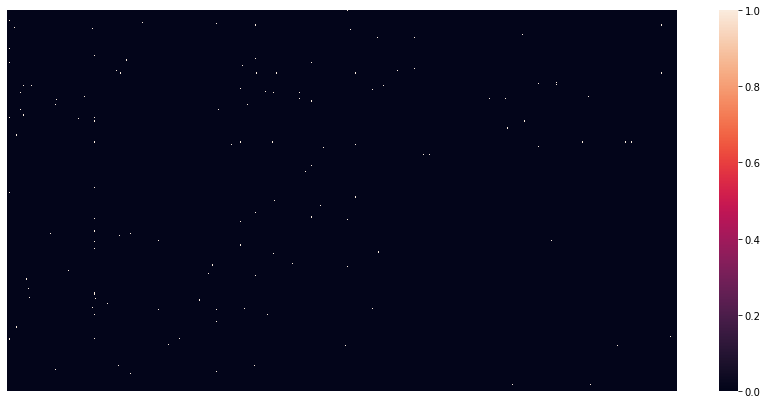

In [229]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["Lymph node"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [230]:
counts_tspec_Lymph_node = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_Lymph_node = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Lymph node"]==1,GO].sum()
    list_counts_tspec_Lymph_node.append(count)
counts_tspec_Lymph_node["count"] = list_counts_tspec_Lymph_node
counts_tspec_Lymph_node.sort_values("count", ascending=False).head(10)

GO_term  count
2375   GO:0005634    113
2489   GO:0005829    108
2528   GO:0005886     98
2427   GO:0005737     92
2385   GO:0005654     82
5020   GO:0016021     57
10863  GO:0046872     52
5019   GO:0016020     48
3293   GO:0007165     36
2529   GO:0005887     36

In [231]:
unique_Lymph_node_tspec = pd.merge(counts_tspec_Lymph_node, counts_tspec, how="inner", on =["GO_term"], suffixes=["_Lymph_node", "_All"])
unique_Lymph_node_tspec["percentage a/w_Lymph_node"] = unique_Lymph_node_tspec["count_Lymph_node"]*100/t_spec_prot_GO_all[t_spec_prot_GO_all["Lymph node"]==1].shape[0]
unique_Lymph_node_tspec["percentage a/w tspec"] =unique_Lymph_node_tspec["count_All"]*100/t_spec_prot_GO_all.shape[0]
unique_Lymph_node_tspec_mapped = pd.merge(unique_Lymph_node_tspec,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Lymph_node_tspec_mapped[((unique_Lymph_node_tspec_mapped["percentage a/w_Lymph_node"]>5)&(unique_Lymph_node_tspec_mapped["percentage a/w tspec"]>10))]

GO_term  count_Lymph_node  count_All  percentage a/w_Lymph_node  \
2375   GO:0005634               113        667                  34.769231   
2385   GO:0005654                82        520                  25.230769   
2427   GO:0005737                92        566                  28.307692   
2489   GO:0005829               108        700                  33.230769   
2528   GO:0005886                98        474                  30.153846   
5019   GO:0016020                48        273                  14.769231   
5020   GO:0016021                57        254                  17.538462   
9495   GO:0042802                30        204                   9.230769   
10863  GO:0046872                52        247                  16.000000   
13404  GO:0070062                22        327                   6.769231   

       percentage a/w tspec                    GO term name  \
2375              34.065373                         nucleus   
2385              26.557712                     nucleoplasm   
2427              28.907048                       cytoplasm   
2489              35.750766                         cytosol   
2528              24.208376                 plasma membrane   
5019              13.942799                        membrane   
5020              12.972421  integral component of membrane   
9495              10.418795       identical protein binding   
10863             12.614913               metal ion binding   
13404             16.700715           extracellular exosome   

                                      GO term definition  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
5020   The component of a membrane consisting of the ...  
9495   Interacting selectively and non-covalently wit...  
10863  Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [232]:
unique_Lymph_node_tspec_mapped_sub = unique_Lymph_node_tspec_mapped.copy()
unique_Lymph_node_tspec_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Lymph_node_tspec_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Lymph_node_tspec_mapped_sub.drop(["count_Lymph_node"], inplace=True, axis=1)
unique_Lymph_node_tspec_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Lymph_node_tspec_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Lymph_node_tspec_mapped_sub.drop(["percentage a/w tspec"], inplace=True, axis=1)
unique_Lymph_node_tspec_mapped_sub

percentage a/w_Lymph_node
GO_term                              
GO:0000002                   0.307692
GO:0000003                   0.000000
GO:0000009                   0.000000
GO:0000010                   0.000000
GO:0000012                   0.307692
...                               ...
GO:2001301                   0.000000
GO:2001302                   0.000000
GO:2001303                   0.000000
GO:2001306                   0.000000
GO:2001311                   0.000000

[18793 rows x 1 columns]

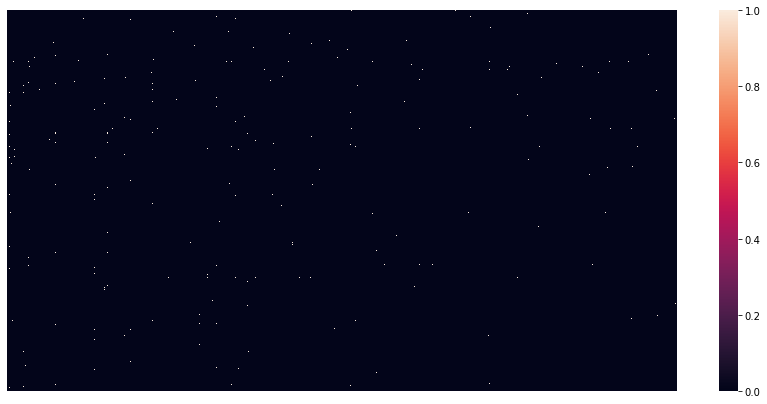

In [233]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Lymph node"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [234]:
counts_nontspec_Lymph_node = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Lymph_node = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Lymph node"]==1,GO].sum()
    list_counts_nontspec_Lymph_node.append(count)
counts_nontspec_Lymph_node["count"] = list_counts_nontspec_Lymph_node
counts_nontspec_Lymph_node.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829    508
2375   GO:0005634    440
2385   GO:0005654    405
2427   GO:0005737    375
2528   GO:0005886    229
5019   GO:0016020    203
1350   GO:0003723    164
10863  GO:0046872    143
2328   GO:0005524    139
9495   GO:0042802    136

In [235]:
unique_Lymph_node_nontspec = pd.merge(counts_nontspec_Lymph_node, counts_nontspec, how="inner", on =["GO_term"], suffixes=["_Lymph_node", "_All"])
unique_Lymph_node_nontspec["percentage a/w_Lymph_node"] = unique_Lymph_node_nontspec["count_Lymph_node"]*100/non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Lymph node"]==1].shape[0]
unique_Lymph_node_nontspec["percentage a/w nontspec"] = unique_Lymph_node_nontspec["count_All"]*100/non_t_spec_prot_GO_all.shape[0]
unique_Lymph_node_nontspec_mapped = pd.merge(unique_Lymph_node_nontspec,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Lymph_node_nontspec_mapped[((unique_Lymph_node_nontspec_mapped["percentage a/w_Lymph_node"]>5)&(unique_Lymph_node_nontspec_mapped["percentage a/w nontspec"]>10))]

GO_term  count_Lymph_node  count_All  percentage a/w_Lymph_node  \
1350   GO:0003723               164        317                  15.018315   
2328   GO:0005524               139        276                  12.728938   
2375   GO:0005634               440        794                  40.293040   
2385   GO:0005654               405        708                  37.087912   
2427   GO:0005737               375        699                  34.340659   
2489   GO:0005829               508        936                  46.520147   
2528   GO:0005886               229        420                  20.970696   
5019   GO:0016020               203        380                  18.589744   
9495   GO:0042802               136        246                  12.454212   
10863  GO:0046872               143        263                  13.095238   
13404  GO:0070062               124        375                  11.355311   

       percentage a/w nontspec               GO term name  \
1350                 15.546837                RNA binding   
2328                 13.536047                ATP binding   
2375                 38.940657                    nucleus   
2385                 34.722903                nucleoplasm   
2427                 34.281511                  cytoplasm   
2489                 45.904855                    cytosol   
2528                 20.598333            plasma membrane   
5019                 18.636587                   membrane   
9495                 12.064738  identical protein binding   
10863                12.898480          metal ion binding   
13404                18.391368      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
10863  Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [236]:
unique_Lymph_node_nontspec_mapped_sub = unique_Lymph_node_nontspec_mapped.copy()
unique_Lymph_node_nontspec_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Lymph_node_nontspec_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Lymph_node_nontspec_mapped_sub.drop(["count_Lymph_node"], inplace=True, axis=1)
unique_Lymph_node_nontspec_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Lymph_node_nontspec_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Lymph_node_nontspec_mapped_sub.drop(["percentage a/w nontspec"], inplace=True, axis=1)
unique_Lymph_node_nontspec_mapped_sub

percentage a/w_Lymph_node
GO_term                              
GO:0000002                   0.091575
GO:0000003                   0.000000
GO:0000009                   0.000000
GO:0000010                   0.000000
GO:0000012                   0.091575
...                               ...
GO:2001301                   0.000000
GO:2001302                   0.000000
GO:2001303                   0.000000
GO:2001306                   0.000000
GO:2001311                   0.000000

[18793 rows x 1 columns]

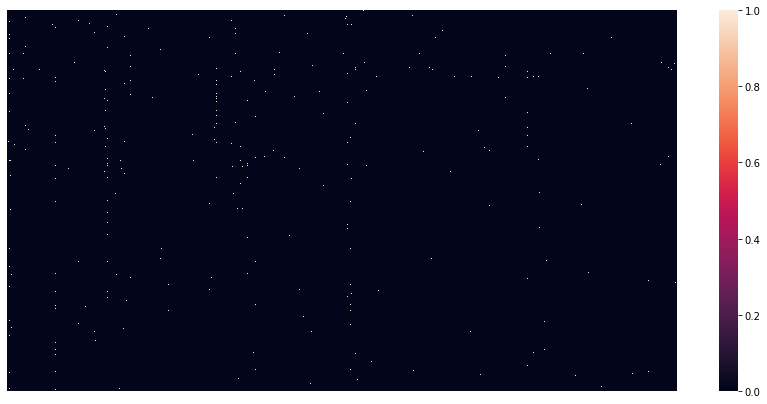

In [237]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Lymph node"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [238]:
counts_gen_Lymph_node = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Lymph_node = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Lymph node"]==1,GO].sum()
    list_counts_gen_Lymph_node.append(count)
counts_gen_Lymph_node["count"] = list_counts_gen_Lymph_node
counts_gen_Lymph_node.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829    609
2375   GO:0005634    543
2427   GO:0005737    480
2385   GO:0005654    462
2528   GO:0005886    297
1350   GO:0003723    294
5019   GO:0016020    282
13404  GO:0070062    259
2328   GO:0005524    164
9495   GO:0042802    158

In [239]:
unique_Lymph_node_gen = pd.merge(counts_gen_Lymph_node, counts_gen, how="inner", on =["GO_term"], suffixes=["_Lymph_node", "_All"])
unique_Lymph_node_gen["percentage a/w_Lymph_node"] = unique_Lymph_node_gen["count_Lymph_node"]*100/general_P_prot_GO_all[general_P_prot_GO_all["Lymph node"]==1].shape[0]
unique_Lymph_node_gen["percentage a/w gen"] = unique_Lymph_node_gen["count_All"]*100/general_P_prot_GO_all.shape[0]
unique_Lymph_node_gen_mapped = pd.merge(unique_Lymph_node_gen,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Lymph_node_gen_mapped[((unique_Lymph_node_gen_mapped["percentage a/w_Lymph_node"]>5)&(unique_Lymph_node_gen_mapped["percentage a/w gen"]>10))]

GO_term  count_Lymph_node  count_All  percentage a/w_Lymph_node  \
1350   GO:0003723               294        362                  25.063939   
2328   GO:0005524               164        246                  13.981245   
2375   GO:0005634               543        699                  46.291560   
2385   GO:0005654               462        553                  39.386189   
2427   GO:0005737               480        690                  40.920716   
2489   GO:0005829               609        856                  51.918159   
2528   GO:0005886               297        506                  25.319693   
5019   GO:0016020               282        406                  24.040921   
9495   GO:0042802               158        240                  13.469736   
13404  GO:0070062               259        453                  22.080136   

       percentage a/w gen               GO term name  \
1350            20.888632                RNA binding   
2328            14.195038                ATP binding   
2375            40.334680                    nucleus   
2385            31.909983                nucleoplasm   
2427            39.815349                  cytoplasm   
2489            49.394114                    cytosol   
2528            29.197923            plasma membrane   
5019            23.427582                   membrane   
9495            13.848817  identical protein binding   
13404           26.139642      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [240]:
unique_Lymph_node_gen_mapped_sub = unique_Lymph_node_gen_mapped.copy()
unique_Lymph_node_gen_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Lymph_node_gen_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Lymph_node_gen_mapped_sub.drop(["count_Lymph_node"], inplace=True, axis=1)
unique_Lymph_node_gen_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Lymph_node_gen_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Lymph_node_gen_mapped_sub.drop(["percentage a/w gen"], inplace=True, axis=1)
unique_Lymph_node_gen_mapped_sub

percentage a/w_Lymph_node
GO_term                              
GO:0000002                   0.000000
GO:0000003                   0.000000
GO:0000009                   0.000000
GO:0000010                   0.000000
GO:0000012                   0.085251
...                               ...
GO:2001301                   0.000000
GO:2001302                   0.000000
GO:2001303                   0.000000
GO:2001306                   0.000000
GO:2001311                   0.000000

[18793 rows x 1 columns]

In [241]:
list_Lymph_node = [unique_Lymph_node_tspec_mapped[["GO_term", "percentage a/w tspec", "percentage a/w_Lymph_node"]].set_index(["GO_term"]),
              unique_Lymph_node_nontspec_mapped[["GO_term", "percentage a/w nontspec", "percentage a/w_Lymph_node"]].set_index(["GO_term"]),
            unique_Lymph_node_gen_mapped[["GO_term","percentage a/w gen","percentage a/w_Lymph_node","GO term name",
                                     "GO term definition"]].set_index(["GO_term"])]
unique_Lymph_node_all = pd.concat(list_Lymph_node, axis=1)
unique_Lymph_node_all.columns = ["percentage a/w tspec", "percentage a/w_Lymph_node_tspec",
                            "percentage a/w nontspec", "percentage a/w_Lymph_node_nontspec",
                           "percentage a/w gen", "percentage a/w_Lymph_node_gen",
                           "GO term name", "GO term definition"]
unique_Lymph_node_all[(((unique_Lymph_node_all["percentage a/w_Lymph_node_tspec"]>=1.2)&(unique_Lymph_node_all["percentage a/w tspec"]<=0.5))|
                 ((unique_Lymph_node_all["percentage a/w_Lymph_node_nontspec"]>=1.2)&(unique_Lymph_node_all["percentage a/w nontspec"]<=0.5))|
               ((unique_Lymph_node_all["percentage a/w_Lymph_node_gen"]>=1.2)&(unique_Lymph_node_all["percentage a/w gen"]<=0.5)))]
#immune cells

percentage a/w tspec  percentage a/w_Lymph_node_tspec  \
GO_term                                                             
GO:0001772              0.408580                         1.230769   
GO:0017053              0.357508                         1.230769   
GO:0022857              0.408580                         1.230769   
GO:0030318              0.357508                         1.230769   
GO:0030666              0.255363                         1.230769   
GO:0030670              0.459653                         1.230769   
GO:0030672              0.459653                         1.230769   
GO:0032689              0.357508                         1.846154   
GO:0032693              0.306435                         1.538462   
GO:0042130              0.459653                         1.846154   
GO:0043198              0.357508                         1.230769   
GO:0045591              0.204290                         1.230769   
GO:0050860              0.306435                         1.230769   
GO:0051926              0.255363                         1.230769   
GO:0070888              0.459653                         1.230769   
GO:0090734              0.459653                         1.230769   
GO:1990380              0.255363                         1.230769   

            percentage a/w nontspec  percentage a/w_Lymph_node_nontspec  \
GO_term                                                                   
GO:0001772                 0.392349                            0.457875   
GO:0017053                 0.588524                            0.549451   
GO:0022857                 0.294262                            0.457875   
GO:0030318                 0.196175                            0.183150   
GO:0030666                 0.294262                            0.183150   
GO:0030670                 0.686611                            0.824176   
GO:0030672                 0.049044                            0.091575   
GO:0032689                 0.049044                            0.000000   
GO:0032693                 0.000000                            0.000000   
GO:0042130                 0.147131                            0.183150   
GO:0043198                 0.049044                            0.091575   
GO:0045591                 0.000000                            0.000000   
GO:0050860                 0.196175                            0.091575   
GO:0051926                 0.000000                            0.000000   
GO:0070888                 0.245218                            0.183150   
GO:0090734                 0.147131                            0.000000   
GO:1990380                 0.098087                            0.091575   

            percentage a/w gen  percentage a/w_Lymph_node_gen  \
GO_term                                                         
GO:0001772            0.519331                       0.596760   
GO:0017053            0.461627                       0.596760   
GO:0022857            0.519331                       0.426257   
GO:0030318            0.000000                       0.000000   
GO:0030666            0.750144                       0.511509   
GO:0030670            0.634737                       0.426257   
GO:0030672            1.327178                       0.511509   
GO:0032689            0.173110                       0.085251   
GO:0032693            0.000000                       0.000000   
GO:0042130            0.230814                       0.255754   
GO:0043198            0.403924                       0.341006   
GO:0045591            0.057703                       0.000000   
GO:0050860            0.115407                       0.085251   
GO:0051926            0.115407                       0.085251   
GO:0070888            0.115407                       0.085251   
GO:0090734            0.173110                       0.255754   
GO:1990380            0.115407                       0.085251   

                                      

## Monocytes

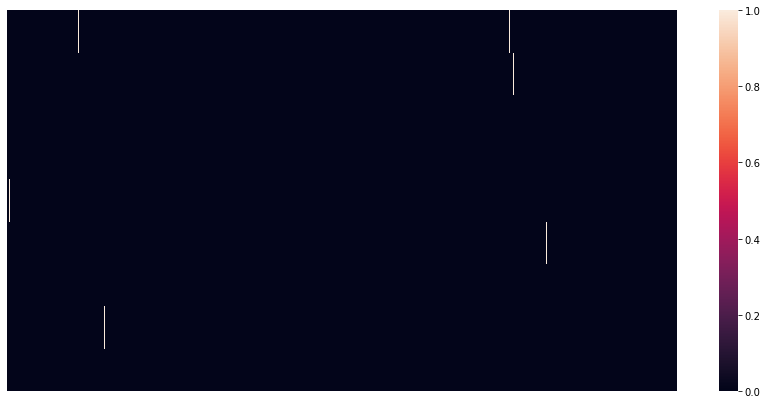

GO_term  count
2346   GO:0005576      5
9723   GO:0043312      3
2528   GO:0005886      3
3186   GO:0006954      3
2373   GO:0005615      3
13404  GO:0070062      3
2375   GO:0005634      2
17545  GO:1904813      2
6366   GO:0030246      2
5020   GO:0016021      2

In [242]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["Monocytes"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

counts_tspec_Monocytes = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_Monocytes = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Monocytes"]==1,GO].sum()
    list_counts_tspec_Monocytes.append(count)
counts_tspec_Monocytes["count"] = list_counts_tspec_Monocytes
counts_tspec_Monocytes.sort_values("count", ascending=False).head(10)

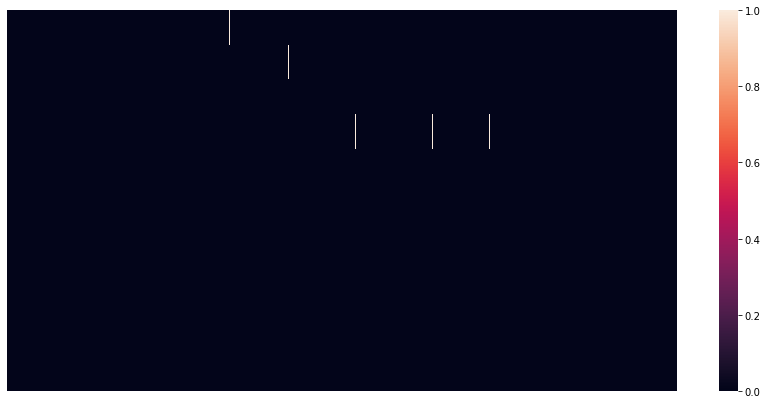

GO_term  count
13404  GO:0070062      8
2375   GO:0005634      5
2427   GO:0005737      5
2346   GO:0005576      4
2373   GO:0005615      4
6286   GO:0030141      3
9595   GO:0043066      3
3601   GO:0008201      3
9723   GO:0043312      3
1329   GO:0003677      3

In [243]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Monocytes"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

counts_nontspec_Monocytes = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Monocytes = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Monocytes"]==1,GO].sum()
    list_counts_nontspec_Monocytes.append(count)
counts_nontspec_Monocytes["count"] = list_counts_nontspec_Monocytes
counts_nontspec_Monocytes.sort_values("count", ascending=False).head(10)

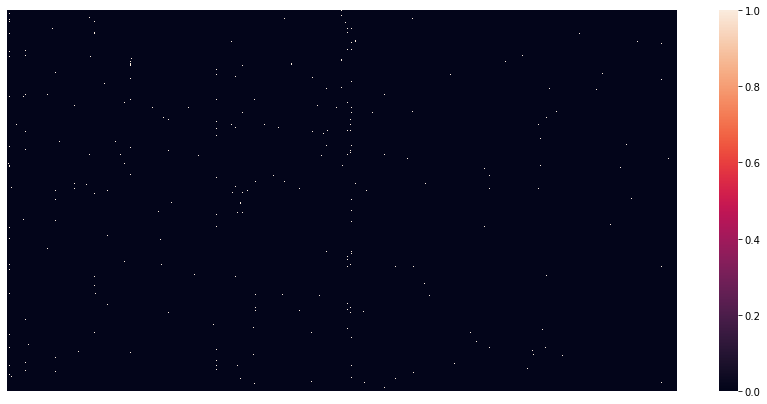

In [244]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Monocytes"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [245]:
counts_gen_Monocytes = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Monocytes = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Monocytes"]==1,GO].sum()
    list_counts_gen_Monocytes.append(count)
counts_gen_Monocytes["count"] = list_counts_gen_Monocytes
counts_gen_Monocytes.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829    424
2427   GO:0005737    344
2528   GO:0005886    310
2375   GO:0005634    262
13404  GO:0070062    226
5019   GO:0016020    189
2385   GO:0005654    159
2328   GO:0005524    129
9495   GO:0042802    128
1350   GO:0003723    111

In [246]:
unique_Monocytes_gen = pd.merge(counts_gen_Monocytes, counts_gen, how="inner", on =["GO_term"], suffixes=["_Monocytes", "_All"])
unique_Monocytes_gen["percentage a/w_Monocytes"] = unique_Monocytes_gen["count_Monocytes"]*100/general_P_prot_GO_all[general_P_prot_GO_all["Monocytes"]==1].shape[0]
unique_Monocytes_gen["percentage a/w gen"] = unique_Monocytes_gen["count_All"]*100/general_P_prot_GO_all.shape[0]
unique_Monocytes_gen_mapped = pd.merge(unique_Monocytes_gen,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Monocytes_gen_mapped[((unique_Monocytes_gen_mapped["percentage a/w_Monocytes"]>5)&(unique_Monocytes_gen_mapped["percentage a/w gen"]>10))]

GO_term  count_Monocytes  count_All  percentage a/w_Monocytes  \
1350   GO:0003723              111        362                 12.997658   
2328   GO:0005524              129        246                 15.105386   
2375   GO:0005634              262        699                 30.679157   
2385   GO:0005654              159        553                 18.618267   
2427   GO:0005737              344        690                 40.281030   
2489   GO:0005829              424        856                 49.648712   
2528   GO:0005886              310        506                 36.299766   
5019   GO:0016020              189        406                 22.131148   
9495   GO:0042802              128        240                 14.988290   
13404  GO:0070062              226        453                 26.463700   

       percentage a/w gen               GO term name  \
1350            20.888632                RNA binding   
2328            14.195038                ATP binding   
2375            40.334680                    nucleus   
2385            31.909983                nucleoplasm   
2427            39.815349                  cytoplasm   
2489            49.394114                    cytosol   
2528            29.197923            plasma membrane   
5019            23.427582                   membrane   
9495            13.848817  identical protein binding   
13404           26.139642      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [247]:
unique_Monocytes_gen_mapped_sub = unique_Monocytes_gen_mapped.copy()
unique_Monocytes_gen_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Monocytes_gen_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Monocytes_gen_mapped_sub.drop(["count_Monocytes"], inplace=True, axis=1)
unique_Monocytes_gen_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Monocytes_gen_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Monocytes_gen_mapped_sub.drop(["percentage a/w gen"], inplace=True, axis=1)
unique_Monocytes_gen_mapped_sub

percentage a/w_Monocytes
GO_term                             
GO:0000002                  0.117096
GO:0000003                  0.000000
GO:0000009                  0.000000
GO:0000010                  0.000000
GO:0000012                  0.000000
...                              ...
GO:2001301                  0.000000
GO:2001302                  0.000000
GO:2001303                  0.000000
GO:2001306                  0.000000
GO:2001311                  0.000000

[18793 rows x 1 columns]

## Nasal polyps

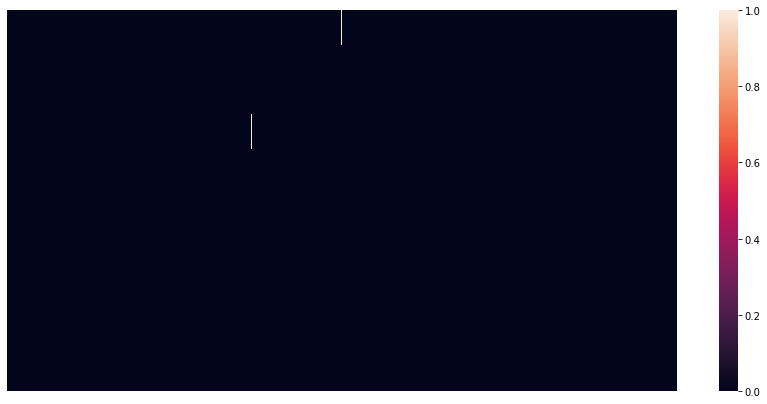

GO_term  count
10863  GO:0046872      4
2427   GO:0005737      2
2373   GO:0005615      2
1091   GO:0002862      2
2375   GO:0005634      2
2346   GO:0005576      2
5020   GO:0016021      2
2528   GO:0005886      2
3146   GO:0006887      2
15784  GO:0103025      2

In [248]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Nasal polyps"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()


counts_nontspec_Nasal_polyps = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Nasal_polyps = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Nasal polyps"]==1,GO].sum()
    list_counts_nontspec_Nasal_polyps.append(count)
counts_nontspec_Nasal_polyps["count"] = list_counts_nontspec_Nasal_polyps
counts_nontspec_Nasal_polyps.sort_values("count", ascending=False).head(10)

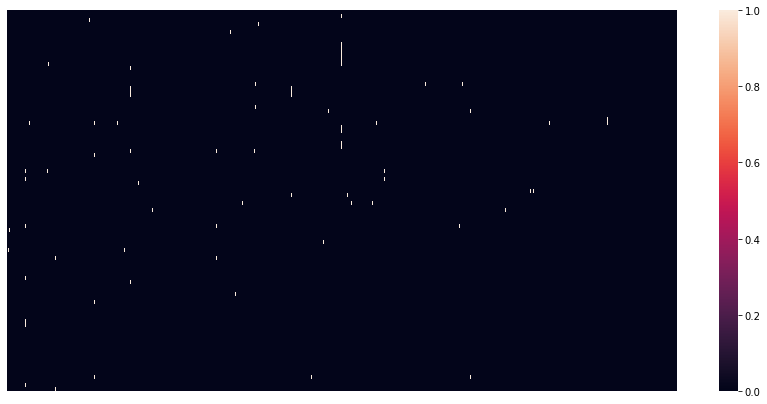

GO_term  count
13404  GO:0070062     56
2489   GO:0005829     43
2373   GO:0005615     37
2346   GO:0005576     33
2427   GO:0005737     32
2528   GO:0005886     31
2375   GO:0005634     30
14527  GO:0072562     29
5019   GO:0016020     26
1350   GO:0003723     22

In [249]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Nasal polyps"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()



counts_gen_Nasal_polyps = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Nasal_polyps = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Nasal polyps"]==1,GO].sum()
    list_counts_gen_Nasal_polyps.append(count)
counts_gen_Nasal_polyps["count"] = list_counts_gen_Nasal_polyps
counts_gen_Nasal_polyps.sort_values("count", ascending=False).head(10)

## NK-cells

In [250]:
counts_tspec_NK_cells = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_NK_cells = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["NK-cells"]==1,GO].sum()
    list_counts_tspec_NK_cells.append(count)
counts_tspec_NK_cells["count"] = list_counts_tspec_NK_cells
counts_tspec_NK_cells.sort_values("count", ascending=False).head(10)

GO_term  count
2528   GO:0005886      3
13404  GO:0070062      2
2385   GO:0005654      2
5020   GO:0016021      2
10863  GO:0046872      2
8422   GO:0035329      2
2489   GO:0005829      2
2423   GO:0005730      2
835    GO:0002250      1
5870   GO:0019900      1

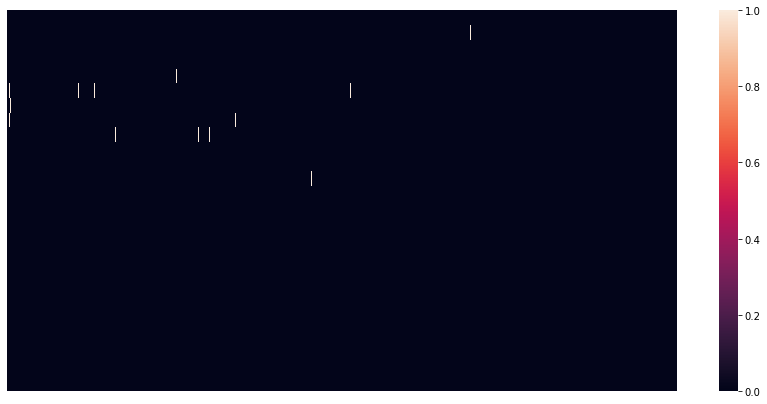

GO_term  count
2427   GO:0005737     13
2528   GO:0005886      8
2489   GO:0005829      8
2375   GO:0005634      7
5019   GO:0016020      7
2137   GO:0005096      5
5020   GO:0016021      5
13404  GO:0070062      4
2132   GO:0005085      4
3310   GO:0007186      3

In [251]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["NK-cells"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()


counts_nontspec_NK_cells = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_NK_cells = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["NK-cells"]==1,GO].sum()
    list_counts_nontspec_NK_cells.append(count)
counts_nontspec_NK_cells["count"] = list_counts_nontspec_NK_cells
counts_nontspec_NK_cells.sort_values("count", ascending=False).head(10)


In [252]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["NK-cells"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [253]:
counts_gen_NK_cells = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_NK_cells = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["NK-cells"]==1,GO].sum()
    list_counts_gen_NK_cells.append(count)
counts_gen_NK_cells["count"] = list_counts_gen_NK_cells
counts_gen_NK_cells.sort_values("count", ascending=False).head(10)

GO_term  count
2375   GO:0005634    110
2489   GO:0005829    100
2385   GO:0005654     92
2427   GO:0005737     85
1350   GO:0003723     80
5019   GO:0016020     65
13404  GO:0070062     53
2528   GO:0005886     45
9495   GO:0042802     30
1329   GO:0003677     29

In [254]:
unique_NK_cells_gen = pd.merge(counts_gen_NK_cells, counts_gen, how="inner", on =["GO_term"], suffixes=["_NK_cells", "_All"])
unique_NK_cells_gen["percentage a/w_NK_cells"] = unique_NK_cells_gen["count_NK_cells"]*100/general_P_prot_GO_all[general_P_prot_GO_all["NK-cells"]==1].shape[0]
unique_NK_cells_gen["percentage a/w gen"] = unique_NK_cells_gen["count_All"]*100/general_P_prot_GO_all.shape[0]
unique_NK_cells_gen_mapped = pd.merge(unique_NK_cells_gen,GO_annot_map_sub, how="left", on=["GO_term"])
unique_NK_cells_gen_mapped[((unique_NK_cells_gen_mapped["percentage a/w_NK_cells"]>5)&(unique_NK_cells_gen_mapped["percentage a/w gen"]>10))]

GO_term  count_NK_cells  count_All  percentage a/w_NK_cells  \
1350   GO:0003723              80        362                38.647343   
2328   GO:0005524              22        246                10.628019   
2375   GO:0005634             110        699                53.140097   
2385   GO:0005654              92        553                44.444444   
2427   GO:0005737              85        690                41.062802   
2489   GO:0005829             100        856                48.309179   
2528   GO:0005886              45        506                21.739130   
5019   GO:0016020              65        406                31.400966   
9495   GO:0042802              30        240                14.492754   
13404  GO:0070062              53        453                25.603865   

       percentage a/w gen               GO term name  \
1350            20.888632                RNA binding   
2328            14.195038                ATP binding   
2375            40.334680                    nucleus   
2385            31.909983                nucleoplasm   
2427            39.815349                  cytoplasm   
2489            49.394114                    cytosol   
2528            29.197923            plasma membrane   
5019            23.427582                   membrane   
9495            13.848817  identical protein binding   
13404           26.139642      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [255]:
unique_NK_cells_gen_mapped_sub = unique_NK_cells_gen_mapped.copy()
unique_NK_cells_gen_mapped_sub.set_index(["GO_term"], inplace=True)
unique_NK_cells_gen_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_NK_cells_gen_mapped_sub.drop(["count_NK_cells"], inplace=True, axis=1)
unique_NK_cells_gen_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_NK_cells_gen_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_NK_cells_gen_mapped_sub.drop(["percentage a/w gen"], inplace=True, axis=1)
unique_NK_cells_gen_mapped_sub

percentage a/w_NK_cells
GO_term                            
GO:0000002                      0.0
GO:0000003                      0.0
GO:0000009                      0.0
GO:0000010                      0.0
GO:0000012                      0.0
...                             ...
GO:2001301                      0.0
GO:2001302                      0.0
GO:2001303                      0.0
GO:2001306                      0.0
GO:2001311                      0.0

[18793 rows x 1 columns]

## Ovary

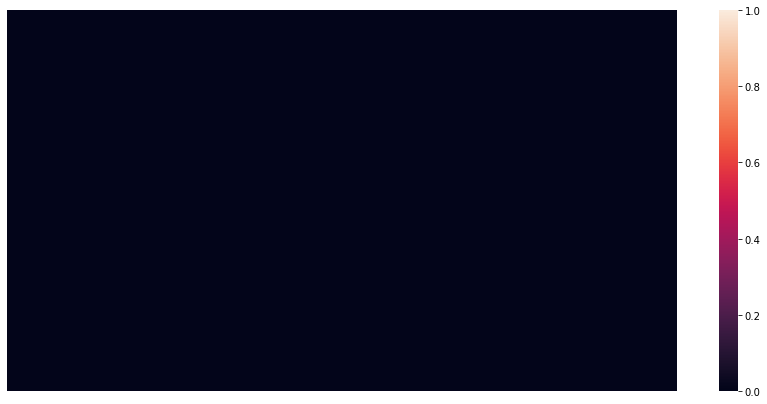

GO_term  count
8806   GO:0036064      1
14567  GO:0072686      1
128    GO:0000281      1
2556   GO:0005930      1
4528   GO:0010975      1
3247   GO:0007052      1
9564   GO:0043014      1
18177  GO:1990830      1
2318   GO:0005509      1
12549  GO:0060285      1

In [256]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["Ovary"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

counts_tspec_Ovary = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_Ovary = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Ovary"]==1,GO].sum()
    list_counts_tspec_Ovary.append(count)
counts_tspec_Ovary["count"] = list_counts_tspec_Ovary
counts_tspec_Ovary.sort_values("count", ascending=False).head(10)

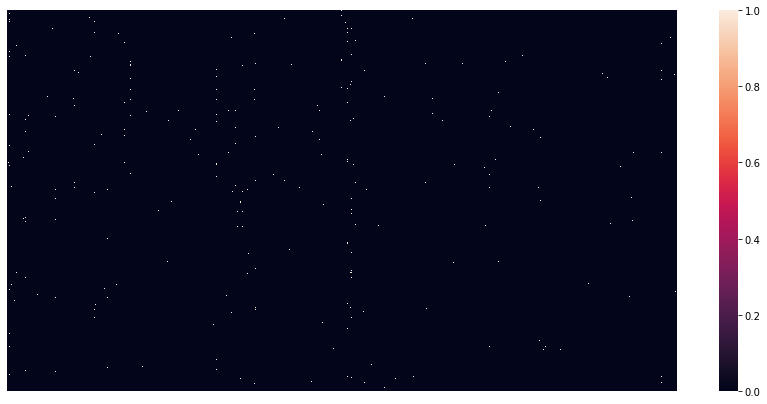

In [257]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Ovary"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [258]:
counts_gen_Ovary = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Ovary = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Ovary"]==1,GO].sum()
    list_counts_gen_Ovary.append(count)
counts_gen_Ovary["count"] = list_counts_gen_Ovary
counts_gen_Ovary.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829    423
2427   GO:0005737    341
2528   GO:0005886    310
2375   GO:0005634    261
13404  GO:0070062    223
5019   GO:0016020    185
2385   GO:0005654    159
2328   GO:0005524    129
9495   GO:0042802    128
1350   GO:0003723    111

In [259]:
unique_Ovary_gen = pd.merge(counts_gen_Ovary, counts_gen, how="inner", on =["GO_term"], suffixes=["_Ovary", "_All"])
unique_Ovary_gen["percentage a/w_Ovary"] = unique_Ovary_gen["count_Ovary"]*100/general_P_prot_GO_all[general_P_prot_GO_all["Ovary"]==1].shape[0]
unique_Ovary_gen["percentage a/w gen"] = unique_Ovary_gen["count_All"]*100/general_P_prot_GO_all.shape[0]
unique_Ovary_gen_mapped = pd.merge(unique_Ovary_gen,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Ovary_gen_mapped[((unique_Ovary_gen_mapped["percentage a/w_Ovary"]>5)&(unique_Ovary_gen_mapped["percentage a/w gen"]>10))]

GO_term  count_Ovary  count_All  percentage a/w_Ovary  \
1350   GO:0003723          111        362             13.058824   
2328   GO:0005524          129        246             15.176471   
2375   GO:0005634          261        699             30.705882   
2385   GO:0005654          159        553             18.705882   
2427   GO:0005737          341        690             40.117647   
2489   GO:0005829          423        856             49.764706   
2528   GO:0005886          310        506             36.470588   
5019   GO:0016020          185        406             21.764706   
9495   GO:0042802          128        240             15.058824   
13404  GO:0070062          223        453             26.235294   

       percentage a/w gen               GO term name  \
1350            20.888632                RNA binding   
2328            14.195038                ATP binding   
2375            40.334680                    nucleus   
2385            31.909983                nucleoplasm   
2427            39.815349                  cytoplasm   
2489            49.394114                    cytosol   
2528            29.197923            plasma membrane   
5019            23.427582                   membrane   
9495            13.848817  identical protein binding   
13404           26.139642      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [260]:
unique_Ovary_gen_mapped_sub = unique_Ovary_gen_mapped.copy()
unique_Ovary_gen_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Ovary_gen_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Ovary_gen_mapped_sub.drop(["count_Ovary"], inplace=True, axis=1)
unique_Ovary_gen_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Ovary_gen_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Ovary_gen_mapped_sub.drop(["percentage a/w gen"], inplace=True, axis=1)
unique_Ovary_gen_mapped_sub

percentage a/w_Ovary
GO_term                         
GO:0000002              0.117647
GO:0000003              0.000000
GO:0000009              0.000000
GO:0000010              0.000000
GO:0000012              0.000000
...                          ...
GO:2001301              0.000000
GO:2001302              0.000000
GO:2001303              0.000000
GO:2001306              0.000000
GO:2001311              0.000000

[18793 rows x 1 columns]

## Pancreas

In [261]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["Pancreas"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

counts_tspec_Pancreas = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_Pancreas = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Pancreas"]==1,GO].sum()
    list_counts_tspec_Pancreas.append(count)
counts_tspec_Pancreas["count"] = list_counts_tspec_Pancreas
counts_tspec_Pancreas.sort_values("count", ascending=False).head(10)

GO_term  count
2373   GO:0005615      6
2427   GO:0005737      4
2346   GO:0005576      3
2889   GO:0006508      3
3636   GO:0008270      3
2489   GO:0005829      3
13404  GO:0070062      2
9495   GO:0042802      2
1605   GO:0004252      2
2375   GO:0005634      2

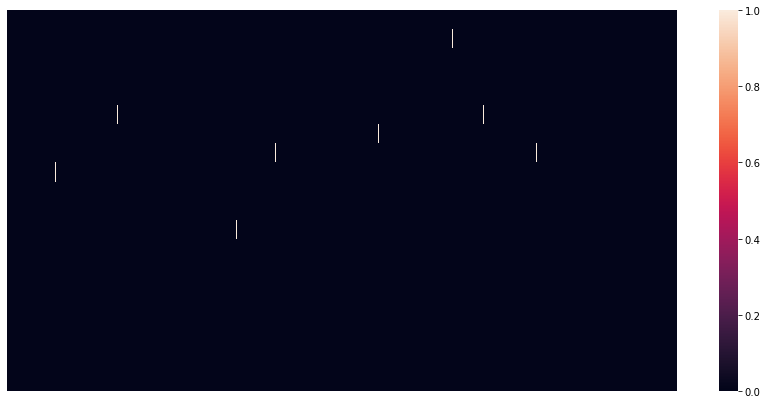

GO_term  count
2373   GO:0005615      8
2346   GO:0005576      7
2489   GO:0005829      7
10863  GO:0046872      6
2427   GO:0005737      5
1605   GO:0004252      5
2889   GO:0006508      5
2528   GO:0005886      4
13325  GO:0062023      4
6678   GO:0031012      3

In [262]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Pancreas"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

counts_nontspec_Pancreas = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Pancreas = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Pancreas"]==1,GO].sum()
    list_counts_nontspec_Pancreas.append(count)
counts_nontspec_Pancreas["count"] = list_counts_nontspec_Pancreas
counts_nontspec_Pancreas.sort_values("count", ascending=False).head(10)

In [263]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Pancreas"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [264]:
counts_gen_Pancreas = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Pancreas = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Pancreas"]==1,GO].sum()
    list_counts_gen_Pancreas.append(count)
counts_gen_Pancreas["count"] = list_counts_gen_Pancreas
counts_gen_Pancreas.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829    453
2427   GO:0005737    386
2528   GO:0005886    326
2375   GO:0005634    313
13404  GO:0070062    253
5019   GO:0016020    208
2385   GO:0005654    192
1350   GO:0003723    148
9495   GO:0042802    140
2328   GO:0005524    137

In [265]:
unique_Pancreas_gen = pd.merge(counts_gen_Pancreas, counts_gen, how="inner", on =["GO_term"], suffixes=["_Pancreas", "_All"])
unique_Pancreas_gen["percentage a/w_Pancreas"] = unique_Pancreas_gen["count_Pancreas"]*100/general_P_prot_GO_all[general_P_prot_GO_all["Pancreas"]==1].shape[0]
unique_Pancreas_gen["percentage a/w gen"] = unique_Pancreas_gen["count_All"]*100/general_P_prot_GO_all.shape[0]
unique_Pancreas_gen_mapped = pd.merge(unique_Pancreas_gen,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Pancreas_gen_mapped[((unique_Pancreas_gen_mapped["percentage a/w_Pancreas"]>5)&(unique_Pancreas_gen_mapped["percentage a/w gen"]>10))]

GO_term  count_Pancreas  count_All  percentage a/w_Pancreas  \
1350   GO:0003723             148        362                15.913978   
2328   GO:0005524             137        246                14.731183   
2375   GO:0005634             313        699                33.655914   
2385   GO:0005654             192        553                20.645161   
2427   GO:0005737             386        690                41.505376   
2489   GO:0005829             453        856                48.709677   
2528   GO:0005886             326        506                35.053763   
5019   GO:0016020             208        406                22.365591   
9495   GO:0042802             140        240                15.053763   
13404  GO:0070062             253        453                27.204301   

       percentage a/w gen               GO term name  \
1350            20.888632                RNA binding   
2328            14.195038                ATP binding   
2375            40.334680                    nucleus   
2385            31.909983                nucleoplasm   
2427            39.815349                  cytoplasm   
2489            49.394114                    cytosol   
2528            29.197923            plasma membrane   
5019            23.427582                   membrane   
9495            13.848817  identical protein binding   
13404           26.139642      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [266]:
unique_Pancreas_gen_mapped_sub = unique_Pancreas_gen_mapped.copy()
unique_Pancreas_gen_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Pancreas_gen_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Pancreas_gen_mapped_sub.drop(["count_Pancreas"], inplace=True, axis=1)
unique_Pancreas_gen_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Pancreas_gen_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Pancreas_gen_mapped_sub.drop(["percentage a/w gen"], inplace=True, axis=1)
unique_Pancreas_gen_mapped_sub

percentage a/w_Pancreas
GO_term                            
GO:0000002                 0.107527
GO:0000003                 0.000000
GO:0000009                 0.000000
GO:0000010                 0.000000
GO:0000012                 0.000000
...                             ...
GO:2001301                 0.000000
GO:2001302                 0.000000
GO:2001303                 0.000000
GO:2001306                 0.000000
GO:2001311                 0.000000

[18793 rows x 1 columns]

## Palatine tonsils

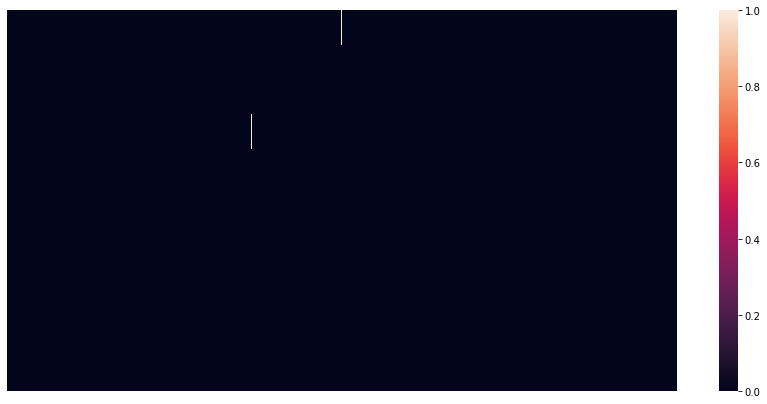

GO_term  count
10863  GO:0046872      4
2427   GO:0005737      2
2373   GO:0005615      2
1091   GO:0002862      2
2375   GO:0005634      2
2346   GO:0005576      2
5020   GO:0016021      2
2528   GO:0005886      2
3146   GO:0006887      2
15784  GO:0103025      2

In [267]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Palatine tonsils"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()


counts_nontspec_Palatine_tonsils = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Palatine_tonsils = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Palatine tonsils"]==1,GO].sum()
    list_counts_nontspec_Palatine_tonsils.append(count)
counts_nontspec_Palatine_tonsils["count"] = list_counts_nontspec_Palatine_tonsils
counts_nontspec_Palatine_tonsils.sort_values("count", ascending=False).head(10)

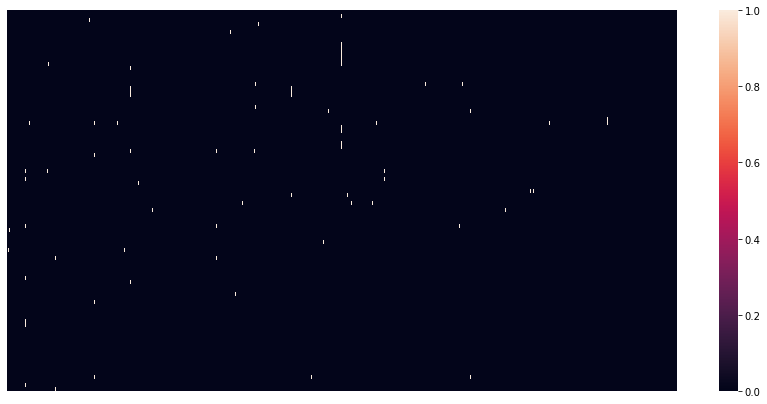

GO_term  count
13404  GO:0070062     56
2489   GO:0005829     43
2373   GO:0005615     37
2346   GO:0005576     33
2427   GO:0005737     32
2528   GO:0005886     31
2375   GO:0005634     30
14527  GO:0072562     29
5019   GO:0016020     26
1350   GO:0003723     22

In [268]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Palatine tonsils"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()



counts_gen_Palatine_tonsils = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Palatine_tonsils = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Palatine tonsils"]==1,GO].sum()
    list_counts_gen_Palatine_tonsils.append(count)
counts_gen_Palatine_tonsils["count"] = list_counts_gen_Palatine_tonsils
counts_gen_Palatine_tonsils.sort_values("count", ascending=False).head(10)

## PBMC

In [269]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["PBMC"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [270]:
counts_tspec_PBMC = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_PBMC = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["PBMC"]==1,GO].sum()
    list_counts_tspec_PBMC.append(count)
counts_tspec_PBMC["count"] = list_counts_tspec_PBMC
counts_tspec_PBMC.sort_values("count", ascending=False).head(10)

GO_term  count
2375   GO:0005634     44
13404  GO:0070062     33
2489   GO:0005829     30
2385   GO:0005654     25
2427   GO:0005737     23
2528   GO:0005886     18
1350   GO:0003723     17
1329   GO:0003677     16
2428   GO:0005739     14
2346   GO:0005576     14

In [271]:
unique_PBMC_tspec = pd.merge(counts_tspec_PBMC, counts_tspec, how="inner", on =["GO_term"], suffixes=["_PBMC", "_All"])
unique_PBMC_tspec["percentage a/w_PBMC"] = unique_PBMC_tspec["count_PBMC"]*100/t_spec_prot_GO_all[t_spec_prot_GO_all["PBMC"]==1].shape[0]
unique_PBMC_tspec["percentage a/w tspec"] =unique_PBMC_tspec["count_All"]*100/t_spec_prot_GO_all.shape[0]
unique_PBMC_tspec_mapped = pd.merge(unique_PBMC_tspec,GO_annot_map_sub, how="left", on=["GO_term"])
unique_PBMC_tspec_mapped[((unique_PBMC_tspec_mapped["percentage a/w_PBMC"]>5)&(unique_PBMC_tspec_mapped["percentage a/w tspec"]>10))]

GO_term  count_PBMC  count_All  percentage a/w_PBMC  \
2375   GO:0005634          44        667            47.826087   
2385   GO:0005654          25        520            27.173913   
2427   GO:0005737          23        566            25.000000   
2489   GO:0005829          30        700            32.608696   
2528   GO:0005886          18        474            19.565217   
5019   GO:0016020          12        273            13.043478   
5020   GO:0016021           9        254             9.782609   
9495   GO:0042802           8        204             8.695652   
10863  GO:0046872          10        247            10.869565   
13404  GO:0070062          33        327            35.869565   

       percentage a/w tspec                    GO term name  \
2375              34.065373                         nucleus   
2385              26.557712                     nucleoplasm   
2427              28.907048                       cytoplasm   
2489              35.750766                         cytosol   
2528              24.208376                 plasma membrane   
5019              13.942799                        membrane   
5020              12.972421  integral component of membrane   
9495              10.418795       identical protein binding   
10863             12.614913               metal ion binding   
13404             16.700715           extracellular exosome   

                                      GO term definition  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
5020   The component of a membrane consisting of the ...  
9495   Interacting selectively and non-covalently wit...  
10863  Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [272]:
unique_PBMC_tspec_mapped_sub = unique_PBMC_tspec_mapped.copy()
unique_PBMC_tspec_mapped_sub.set_index(["GO_term"], inplace=True)
unique_PBMC_tspec_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_PBMC_tspec_mapped_sub.drop(["count_PBMC"], inplace=True, axis=1)
unique_PBMC_tspec_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_PBMC_tspec_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_PBMC_tspec_mapped_sub.drop(["percentage a/w tspec"], inplace=True, axis=1)
unique_PBMC_tspec_mapped_sub

percentage a/w_PBMC
GO_term                        
GO:0000002             1.086957
GO:0000003             0.000000
GO:0000009             0.000000
GO:0000010             0.000000
GO:0000012             0.000000
...                         ...
GO:2001301             0.000000
GO:2001302             0.000000
GO:2001303             0.000000
GO:2001306             0.000000
GO:2001311             0.000000

[18793 rows x 1 columns]

In [273]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["PBMC"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [274]:
counts_nontspec_PBMC = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_PBMC = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["PBMC"]==1,GO].sum()
    list_counts_nontspec_PBMC.append(count)
counts_nontspec_PBMC["count"] = list_counts_nontspec_PBMC
counts_nontspec_PBMC.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829    116
2375   GO:0005634    102
13404  GO:0070062    101
2427   GO:0005737     96
2385   GO:0005654     75
5019   GO:0016020     65
1350   GO:0003723     56
2528   GO:0005886     50
9495   GO:0042802     34
2346   GO:0005576     34

In [275]:
unique_PBMC_nontspec = pd.merge(counts_nontspec_PBMC, counts_nontspec, how="inner", on =["GO_term"], suffixes=["_PBMC", "_All"])
unique_PBMC_nontspec["percentage a/w_PBMC"] = unique_PBMC_nontspec["count_PBMC"]*100/non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["PBMC"]==1].shape[0]
unique_PBMC_nontspec["percentage a/w nontspec"] = unique_PBMC_nontspec["count_All"]*100/non_t_spec_prot_GO_all.shape[0]
unique_PBMC_nontspec_mapped = pd.merge(unique_PBMC_nontspec,GO_annot_map_sub, how="left", on=["GO_term"])
unique_PBMC_nontspec_mapped[((unique_PBMC_nontspec_mapped["percentage a/w_PBMC"]>5)&(unique_PBMC_nontspec_mapped["percentage a/w nontspec"]>10))]

GO_term  count_PBMC  count_All  percentage a/w_PBMC  \
1350   GO:0003723          56        317            25.570776   
2328   GO:0005524          33        276            15.068493   
2375   GO:0005634         102        794            46.575342   
2385   GO:0005654          75        708            34.246575   
2427   GO:0005737          96        699            43.835616   
2489   GO:0005829         116        936            52.968037   
2528   GO:0005886          50        420            22.831050   
5019   GO:0016020          65        380            29.680365   
9495   GO:0042802          34        246            15.525114   
10863  GO:0046872          20        263             9.132420   
13404  GO:0070062         101        375            46.118721   

       percentage a/w nontspec               GO term name  \
1350                 15.546837                RNA binding   
2328                 13.536047                ATP binding   
2375                 38.940657                    nucleus   
2385                 34.722903                nucleoplasm   
2427                 34.281511                  cytoplasm   
2489                 45.904855                    cytosol   
2528                 20.598333            plasma membrane   
5019                 18.636587                   membrane   
9495                 12.064738  identical protein binding   
10863                12.898480          metal ion binding   
13404                18.391368      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
10863  Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [276]:
unique_PBMC_nontspec_mapped_sub = unique_PBMC_nontspec_mapped.copy()
unique_PBMC_nontspec_mapped_sub.set_index(["GO_term"], inplace=True)
unique_PBMC_nontspec_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_PBMC_nontspec_mapped_sub.drop(["count_PBMC"], inplace=True, axis=1)
unique_PBMC_nontspec_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_PBMC_nontspec_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_PBMC_nontspec_mapped_sub.drop(["percentage a/w nontspec"], inplace=True, axis=1)
unique_PBMC_nontspec_mapped_sub

percentage a/w_PBMC
GO_term                        
GO:0000002                  0.0
GO:0000003                  0.0
GO:0000009                  0.0
GO:0000010                  0.0
GO:0000012                  0.0
...                         ...
GO:2001301                  0.0
GO:2001302                  0.0
GO:2001303                  0.0
GO:2001306                  0.0
GO:2001311                  0.0

[18793 rows x 1 columns]

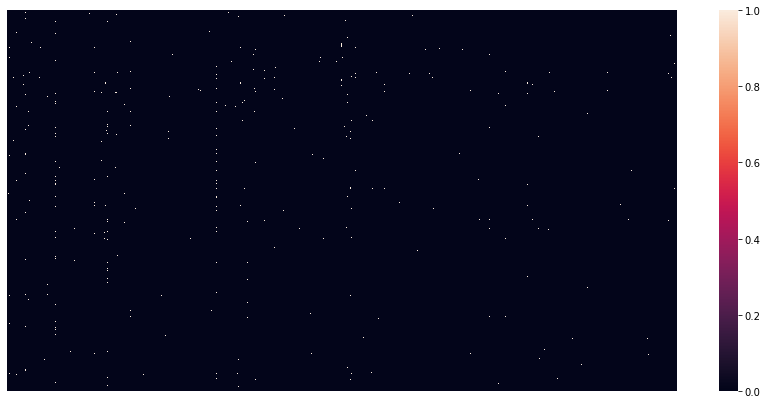

In [277]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["PBMC"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [278]:
counts_gen_PBMC = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_PBMC = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["PBMC"]==1,GO].sum()
    list_counts_gen_PBMC.append(count)
counts_gen_PBMC["count"] = list_counts_gen_PBMC
counts_gen_PBMC.sort_values("count", ascending=False).head(10)

GO_term  count
2375   GO:0005634    318
2489   GO:0005829    301
13404  GO:0070062    252
2427   GO:0005737    247
2385   GO:0005654    222
1350   GO:0003723    193
5019   GO:0016020    164
2528   GO:0005886    133
2346   GO:0005576     91
9495   GO:0042802     88

In [279]:
unique_PBMC_gen = pd.merge(counts_gen_PBMC, counts_gen, how="inner", on =["GO_term"], suffixes=["_PBMC", "_All"])
unique_PBMC_gen["percentage a/w_PBMC"] = unique_PBMC_gen["count_PBMC"]*100/general_P_prot_GO_all[general_P_prot_GO_all["PBMC"]==1].shape[0]
unique_PBMC_gen["percentage a/w gen"] = unique_PBMC_gen["count_All"]*100/general_P_prot_GO_all.shape[0]
unique_PBMC_gen_mapped = pd.merge(unique_PBMC_gen,GO_annot_map_sub, how="left", on=["GO_term"])
unique_PBMC_gen_mapped[((unique_PBMC_gen_mapped["percentage a/w_PBMC"]>5)&(unique_PBMC_gen_mapped["percentage a/w gen"]>10))]

GO_term  count_PBMC  count_All  percentage a/w_PBMC  \
1350   GO:0003723         193        362            35.090909   
2328   GO:0005524          83        246            15.090909   
2375   GO:0005634         318        699            57.818182   
2385   GO:0005654         222        553            40.363636   
2427   GO:0005737         247        690            44.909091   
2489   GO:0005829         301        856            54.727273   
2528   GO:0005886         133        506            24.181818   
5019   GO:0016020         164        406            29.818182   
9495   GO:0042802          88        240            16.000000   
13404  GO:0070062         252        453            45.818182   

       percentage a/w gen               GO term name  \
1350            20.888632                RNA binding   
2328            14.195038                ATP binding   
2375            40.334680                    nucleus   
2385            31.909983                nucleoplasm   
2427            39.815349                  cytoplasm   
2489            49.394114                    cytosol   
2528            29.197923            plasma membrane   
5019            23.427582                   membrane   
9495            13.848817  identical protein binding   
13404           26.139642      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [280]:
unique_PBMC_gen_mapped_sub = unique_PBMC_gen_mapped.copy()
unique_PBMC_gen_mapped_sub.set_index(["GO_term"], inplace=True)
unique_PBMC_gen_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_PBMC_gen_mapped_sub.drop(["count_PBMC"], inplace=True, axis=1)
unique_PBMC_gen_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_PBMC_gen_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_PBMC_gen_mapped_sub.drop(["percentage a/w gen"], inplace=True, axis=1)
unique_PBMC_gen_mapped_sub

percentage a/w_PBMC
GO_term                        
GO:0000002                  0.0
GO:0000003                  0.0
GO:0000009                  0.0
GO:0000010                  0.0
GO:0000012                  0.0
...                         ...
GO:2001301                  0.0
GO:2001302                  0.0
GO:2001303                  0.0
GO:2001306                  0.0
GO:2001311                  0.0

[18793 rows x 1 columns]

In [281]:
list_PBMC = [unique_PBMC_tspec_mapped[["GO_term", "percentage a/w tspec", "percentage a/w_PBMC"]].set_index(["GO_term"]),
              unique_PBMC_nontspec_mapped[["GO_term", "percentage a/w nontspec", "percentage a/w_PBMC"]].set_index(["GO_term"]),
            unique_PBMC_gen_mapped[["GO_term","percentage a/w gen","percentage a/w_PBMC","GO term name",
                                     "GO term definition"]].set_index(["GO_term"])]
unique_PBMC_all = pd.concat(list_PBMC, axis=1)
unique_PBMC_all.columns = ["percentage a/w tspec", "percentage a/w_PBMC_tspec",
                            "percentage a/w nontspec", "percentage a/w_PBMC_nontspec",
                           "percentage a/w gen", "percentage a/w_PBMC_gen",
                           "GO term name", "GO term definition"]
unique_PBMC_all[(((unique_PBMC_all["percentage a/w_PBMC_tspec"]>=1.67)&(unique_PBMC_all["percentage a/w tspec"]<=0.33))|
                 ((unique_PBMC_all["percentage a/w_PBMC_nontspec"]>=1.67)&(unique_PBMC_all["percentage a/w nontspec"]<=0.33))|
               ((unique_PBMC_all["percentage a/w_PBMC_gen"]>=1.67)&(unique_PBMC_all["percentage a/w gen"]<=0.33)))]
#PBMC does seem to have a higher amount of P-Tyr (check with enrichment!)
#known immune pathways, filaments and cell motilityn NTP synthesis, energy synthesis, platelet activation

percentage a/w tspec  percentage a/w_PBMC_tspec  \
GO_term                                                       
GO:0001784              0.306435                   2.173913   
GO:0001837              0.306435                   2.173913   
GO:0001968              0.204290                   2.173913   
GO:0002218              0.204290                   2.173913   
GO:0002224              0.255363                   2.173913   
GO:0002244              0.255363                   2.173913   
GO:0002523              0.051073                   0.000000   
GO:0004298              0.153218                   2.173913   
GO:0004860              0.255363                   2.173913   
GO:0005244              0.102145                   2.173913   
GO:0005254              0.255363                   2.173913   
GO:0005753              0.204290                   3.260870   
GO:0005839              0.306435                   2.173913   
GO:0005854              0.102145                   2.173913   
GO:0005885              0.051073                   0.000000   
GO:0006094              0.306435                   0.000000   
GO:0006099              0.153218                   2.173913   
GO:0006213              0.102145                   2.173913   
GO:0006337              0.306435                   3.260870   
GO:0006754              0.255363                   3.260870   
GO:0006801              0.357508                   1.086957   
GO:0006821              0.306435                   2.173913   
GO:0007040              0.306435                   2.173913   
GO:0008047              0.255363                   2.173913   
GO:0008305              0.306435                   4.347826   
GO:0008656              0.153218                   2.173913   
GO:0009060              0.204290                   2.173913   
GO:0015078              0.204290                   2.173913   
GO:0015986              0.153218                   2.173913   
GO:0016529              0.306435                   2.173913   
GO:0019774              0.153218                   2.173913   
GO:0019825              0.102145                   0.000000   
GO:0030949              0.153218                   2.173913   
GO:0031092              0.255363                   2.173913   
GO:0032481              0.408580                   0.000000   
GO:0032688              0.204290                   2.173913   
GO:0032731              0.255363                   2.173913   
GO:0032930              0.051073                   0.000000   
GO:0033668              0.153218                   2.173913   
GO:0034113              0.306435                   3.260870   
GO:0034316              0.102145                   2.173913   
GO:0034707              0.153218                   2.173913   
GO:0035590              0.255363                   3.260870   
GO:0042407              0.204290                   3.260870   
GO:0042744              0.255363                   1.086957   
GO:0042776              0.204290                   3.260870   
GO:0043171              0.204290                   2.173913   
GO:0045833              0.102145                   2.173913   
GO:0050690              0.051073                   0.000000   
GO:0050840              0.306435                   2.173913   
GO:0050995              0.153218                   2.173913   
GO:0051279              0.102145                   2.173913   
GO:0051781              0.255363                   2.173913   
GO:0061631              0.204290                   2.173913   
GO:0070527              0.306435                   4.347826   
GO:0070588              0.255363                   3.260870   
GO:0070979              0.255363                   2.173913   
GO:0071846              0.102145                   2.173913   
GO:0071933              0.153218                   2.173913   

            percentage a/w nontspec  percentage a/w_PBMC_nontspec  \
GO_term                                                             
GO:0001784                 0.9

## Placenta

In [282]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["Placenta"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [283]:
counts_tspec_Placenta = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_Placenta = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Placenta"]==1,GO].sum()
    list_counts_tspec_Placenta.append(count)
counts_tspec_Placenta["count"] = list_counts_tspec_Placenta
counts_tspec_Placenta.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829     42
2375   GO:0005634     39
2427   GO:0005737     32
5019   GO:0016020     30
2385   GO:0005654     29
2528   GO:0005886     28
13404  GO:0070062     27
2346   GO:0005576     26
5020   GO:0016021     23
2373   GO:0005615     20

In [284]:
unique_Placenta_tspec = pd.merge(counts_tspec_Placenta, counts_tspec, how="inner", on =["GO_term"], suffixes=["_Placenta", "_All"])
unique_Placenta_tspec["percentage a/w_Placenta"] = unique_Placenta_tspec["count_Placenta"]*100/t_spec_prot_GO_all[t_spec_prot_GO_all["Placenta"]==1].shape[0]
unique_Placenta_tspec["percentage a/w tspec"] =unique_Placenta_tspec["count_All"]*100/t_spec_prot_GO_all.shape[0]
unique_Placenta_tspec_mapped = pd.merge(unique_Placenta_tspec,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Placenta_tspec_mapped[((unique_Placenta_tspec_mapped["percentage a/w_Placenta"]>5)&(unique_Placenta_tspec_mapped["percentage a/w tspec"]>10))]

GO_term  count_Placenta  count_All  percentage a/w_Placenta  \
2375   GO:0005634              39        667                30.708661   
2385   GO:0005654              29        520                22.834646   
2427   GO:0005737              32        566                25.196850   
2489   GO:0005829              42        700                33.070866   
2528   GO:0005886              28        474                22.047244   
5019   GO:0016020              30        273                23.622047   
5020   GO:0016021              23        254                18.110236   
9495   GO:0042802              12        204                 9.448819   
10863  GO:0046872              15        247                11.811024   
13404  GO:0070062              27        327                21.259843   

       percentage a/w tspec                    GO term name  \
2375              34.065373                         nucleus   
2385              26.557712                     nucleoplasm   
2427              28.907048                       cytoplasm   
2489              35.750766                         cytosol   
2528              24.208376                 plasma membrane   
5019              13.942799                        membrane   
5020              12.972421  integral component of membrane   
9495              10.418795       identical protein binding   
10863             12.614913               metal ion binding   
13404             16.700715           extracellular exosome   

                                      GO term definition  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
5020   The component of a membrane consisting of the ...  
9495   Interacting selectively and non-covalently wit...  
10863  Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [285]:
unique_Placenta_tspec_mapped_sub = unique_Placenta_tspec_mapped.copy()
unique_Placenta_tspec_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Placenta_tspec_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Placenta_tspec_mapped_sub.drop(["count_Placenta"], inplace=True, axis=1)
unique_Placenta_tspec_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Placenta_tspec_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Placenta_tspec_mapped_sub.drop(["percentage a/w tspec"], inplace=True, axis=1)
unique_Placenta_tspec_mapped_sub

percentage a/w_Placenta
GO_term                            
GO:0000002                      0.0
GO:0000003                      0.0
GO:0000009                      0.0
GO:0000010                      0.0
GO:0000012                      0.0
...                             ...
GO:2001301                      0.0
GO:2001302                      0.0
GO:2001303                      0.0
GO:2001306                      0.0
GO:2001311                      0.0

[18793 rows x 1 columns]

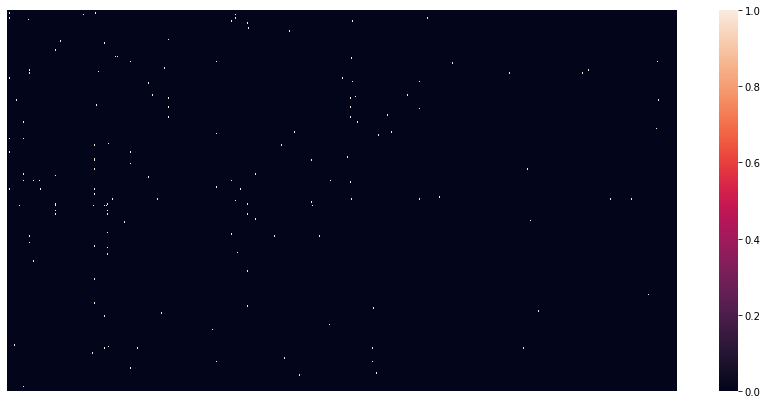

In [286]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Placenta"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [287]:
counts_nontspec_Placenta = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Placenta = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Placenta"]==1,GO].sum()
    list_counts_nontspec_Placenta.append(count)
counts_nontspec_Placenta["count"] = list_counts_nontspec_Placenta
counts_nontspec_Placenta.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829     99
2375   GO:0005634     82
13404  GO:0070062     74
2385   GO:0005654     73
5019   GO:0016020     59
2427   GO:0005737     57
1350   GO:0003723     57
2528   GO:0005886     45
2328   GO:0005524     42
2346   GO:0005576     41

In [288]:
unique_Placenta_nontspec = pd.merge(counts_nontspec_Placenta, counts_nontspec, how="inner", on =["GO_term"], suffixes=["_Placenta", "_All"])
unique_Placenta_nontspec["percentage a/w_Placenta"] = unique_Placenta_nontspec["count_Placenta"]*100/non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Placenta"]==1].shape[0]
unique_Placenta_nontspec["percentage a/w nontspec"] = unique_Placenta_nontspec["count_All"]*100/non_t_spec_prot_GO_all.shape[0]
unique_Placenta_nontspec_mapped = pd.merge(unique_Placenta_nontspec,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Placenta_nontspec_mapped[((unique_Placenta_nontspec_mapped["percentage a/w_Placenta"]>5)&(unique_Placenta_nontspec_mapped["percentage a/w nontspec"]>10))]

GO_term  count_Placenta  count_All  percentage a/w_Placenta  \
1350   GO:0003723              57        317                25.110132   
2328   GO:0005524              42        276                18.502203   
2375   GO:0005634              82        794                36.123348   
2385   GO:0005654              73        708                32.158590   
2427   GO:0005737              57        699                25.110132   
2489   GO:0005829              99        936                43.612335   
2528   GO:0005886              45        420                19.823789   
5019   GO:0016020              59        380                25.991189   
9495   GO:0042802              27        246                11.894273   
10863  GO:0046872              23        263                10.132159   
13404  GO:0070062              74        375                32.599119   

       percentage a/w nontspec               GO term name  \
1350                 15.546837                RNA binding   
2328                 13.536047                ATP binding   
2375                 38.940657                    nucleus   
2385                 34.722903                nucleoplasm   
2427                 34.281511                  cytoplasm   
2489                 45.904855                    cytosol   
2528                 20.598333            plasma membrane   
5019                 18.636587                   membrane   
9495                 12.064738  identical protein binding   
10863                12.898480          metal ion binding   
13404                18.391368      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
10863  Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [289]:
unique_Placenta_nontspec_mapped_sub = unique_Placenta_nontspec_mapped.copy()
unique_Placenta_nontspec_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Placenta_nontspec_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Placenta_nontspec_mapped_sub.drop(["count_Placenta"], inplace=True, axis=1)
unique_Placenta_nontspec_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Placenta_nontspec_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Placenta_nontspec_mapped_sub.drop(["percentage a/w nontspec"], inplace=True, axis=1)
unique_Placenta_nontspec_mapped_sub

percentage a/w_Placenta
GO_term                            
GO:0000002                      0.0
GO:0000003                      0.0
GO:0000009                      0.0
GO:0000010                      0.0
GO:0000012                      0.0
...                             ...
GO:2001301                      0.0
GO:2001302                      0.0
GO:2001303                      0.0
GO:2001306                      0.0
GO:2001311                      0.0

[18793 rows x 1 columns]

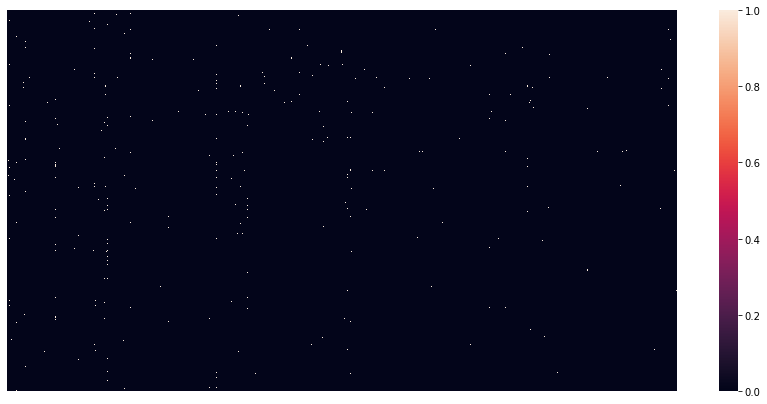

In [290]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Placenta"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [291]:
counts_gen_Placenta = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Placenta = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Placenta"]==1,GO].sum()
    list_counts_gen_Placenta.append(count)
counts_gen_Placenta["count"] = list_counts_gen_Placenta
counts_gen_Placenta.sort_values("count", ascending=False).head(10)

GO_term  count
2375   GO:0005634    328
2489   GO:0005829    323
2427   GO:0005737    284
2385   GO:0005654    283
13404  GO:0070062    219
1350   GO:0003723    219
5019   GO:0016020    186
2528   GO:0005886    168
2328   GO:0005524    106
9495   GO:0042802     95

In [292]:
unique_Placenta_gen = pd.merge(counts_gen_Placenta, counts_gen, how="inner", on =["GO_term"], suffixes=["_Placenta", "_All"])
unique_Placenta_gen["percentage a/w_Placenta"] = unique_Placenta_gen["count_Placenta"]*100/general_P_prot_GO_all[general_P_prot_GO_all["Placenta"]==1].shape[0]
unique_Placenta_gen["percentage a/w gen"] = unique_Placenta_gen["count_All"]*100/general_P_prot_GO_all.shape[0]
unique_Placenta_gen_mapped = pd.merge(unique_Placenta_gen,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Placenta_gen_mapped[((unique_Placenta_gen_mapped["percentage a/w_Placenta"]>5)&(unique_Placenta_gen_mapped["percentage a/w gen"]>10))]

GO_term  count_Placenta  count_All  percentage a/w_Placenta  \
1350   GO:0003723             219        362                33.537519   
2328   GO:0005524             106        246                16.232772   
2375   GO:0005634             328        699                50.229709   
2385   GO:0005654             283        553                43.338438   
2427   GO:0005737             284        690                43.491577   
2489   GO:0005829             323        856                49.464012   
2528   GO:0005886             168        506                25.727412   
5019   GO:0016020             186        406                28.483920   
9495   GO:0042802              95        240                14.548239   
13404  GO:0070062             219        453                33.537519   

       percentage a/w gen               GO term name  \
1350            20.888632                RNA binding   
2328            14.195038                ATP binding   
2375            40.334680                    nucleus   
2385            31.909983                nucleoplasm   
2427            39.815349                  cytoplasm   
2489            49.394114                    cytosol   
2528            29.197923            plasma membrane   
5019            23.427582                   membrane   
9495            13.848817  identical protein binding   
13404           26.139642      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [293]:
unique_Placenta_gen_mapped_sub = unique_Placenta_gen_mapped.copy()
unique_Placenta_gen_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Placenta_gen_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Placenta_gen_mapped_sub.drop(["count_Placenta"], inplace=True, axis=1)
unique_Placenta_gen_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Placenta_gen_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Placenta_gen_mapped_sub.drop(["percentage a/w gen"], inplace=True, axis=1)
unique_Placenta_gen_mapped_sub

percentage a/w_Placenta
GO_term                            
GO:0000002                 0.153139
GO:0000003                 0.000000
GO:0000009                 0.000000
GO:0000010                 0.000000
GO:0000012                 0.000000
...                             ...
GO:2001301                 0.000000
GO:2001302                 0.000000
GO:2001303                 0.000000
GO:2001306                 0.000000
GO:2001311                 0.000000

[18793 rows x 1 columns]

In [294]:
list_Placenta = [unique_Placenta_tspec_mapped[["GO_term", "percentage a/w tspec", "percentage a/w_Placenta"]].set_index(["GO_term"]),
              unique_Placenta_nontspec_mapped[["GO_term", "percentage a/w nontspec", "percentage a/w_Placenta"]].set_index(["GO_term"]),
            unique_Placenta_gen_mapped[["GO_term","percentage a/w gen","percentage a/w_Placenta","GO term name",
                                     "GO term definition"]].set_index(["GO_term"])]
unique_Placenta_all = pd.concat(list_Placenta, axis=1)
unique_Placenta_all.columns = ["percentage a/w tspec", "percentage a/w_Placenta_tspec",
                            "percentage a/w nontspec", "percentage a/w_Placenta_nontspec",
                           "percentage a/w gen", "percentage a/w_Placenta_gen",
                           "GO term name", "GO term definition"]
unique_Placenta_all[(((unique_Placenta_all["percentage a/w_Placenta_tspec"]>=1.6)&(unique_Placenta_all["percentage a/w tspec"]<=0.4))|
                 ((unique_Placenta_all["percentage a/w_Placenta_nontspec"]>=1.6)&(unique_Placenta_all["percentage a/w nontspec"]<=0.4))|
               ((unique_Placenta_all["percentage a/w_Placenta_gen"]>=1.6)&(unique_Placenta_all["percentage a/w gen"]<=0.4)))]
#tissue and placenta decelopment

percentage a/w tspec  percentage a/w_Placenta_tspec  \
GO_term                                                           
GO:0000387              0.255363                       2.362205   
GO:0001890              0.357508                       0.000000   
GO:0004222              0.306435                       0.787402   
GO:0005750              0.255363                       2.362205   
GO:0006122              0.204290                       2.362205   
GO:0008121              0.153218                       2.362205   
GO:0009888              0.102145                       1.574803   
GO:0010811              0.357508                       2.362205   
GO:0015030              0.357508                       2.362205   
GO:0043021              0.357508                       2.362205   
GO:0043236              0.357508                       2.362205   
GO:0045071              0.204290                       2.362205   
GO:0046540              0.255363                       2.362205   
GO:0070831              0.153218                       2.362205   
GO:0071007              0.357508                       2.362205   
GO:0071711              0.204290                       2.362205   

            percentage a/w nontspec  percentage a/w_Placenta_nontspec  \
GO_term                                                                 
GO:0000387                 0.245218                          0.881057   
GO:0001890                 0.294262                          1.762115   
GO:0004222                 0.294262                          1.762115   
GO:0005750                 0.000000                          0.000000   
GO:0006122                 0.049044                          0.000000   
GO:0008121                 0.000000                          0.000000   
GO:0009888                 0.294262                          2.202643   
GO:0010811                 0.098087                          0.000000   
GO:0015030                 0.588524                          0.000000   
GO:0043021                 0.343306                          0.000000   
GO:0043236                 0.294262                          0.440529   
GO:0045071                 0.392349                          0.881057   
GO:0046540                 0.098087                          0.000000   
GO:0070831                 0.049044                          0.440529   
GO:0071007                 0.147131                          0.000000   
GO:0071711                 0.147131                          0.000000   

            percentage a/w gen  percentage a/w_Placenta_gen  \
GO_term                                                       
GO:0000387            0.173110                     0.459418   
GO:0001890            0.115407                     0.153139   
GO:0004222            0.115407                     0.000000   
GO:0005750            0.057703                     0.153139   
GO:0006122            0.057703                     0.153139   
GO:0008121            0.057703                     0.153139   
GO:0009888            0.000000                     0.000000   
GO:0010811            0.230814                     0.153139   
GO:0015030            0.634737                     1.225115   
GO:0043021            0.403924                     0.765697   
GO:0043236            0.115407                     0.306279   
GO:0045071            0.230814                     0.306279   
GO:0046540            0.230814                     0.612557   
GO:0070831            0.000000                     0.000000   
GO:0071007            0.173110                     0.459418   
GO:0071711            0.057703                     0.000000   

                                                 GO term name  \
GO_term                                                         
GO:0000387                        spliceosomal snRNP assembly   
GO:0001890                               placenta development   
GO:0004222                      metalloendopeptidase activity   
GO:0005750        mitochondria

## Skeletal muscle

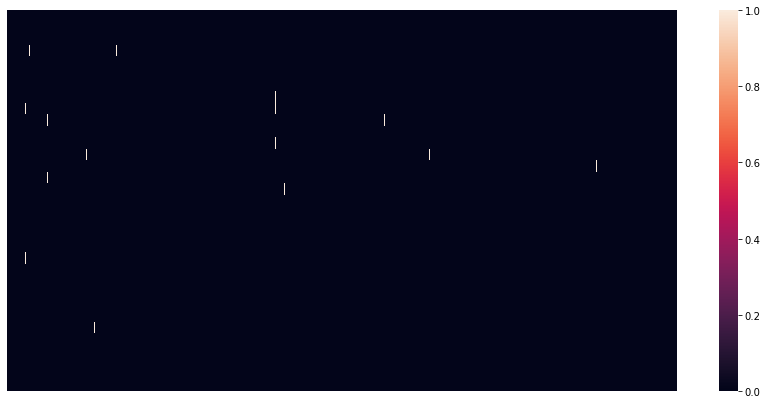

GO_term  count
2489   GO:0005829     20
3176   GO:0006936     12
3664   GO:0008307      9
2427   GO:0005737      9
6216   GO:0030018      8
11754  GO:0051015      8
1365   GO:0003779      8
6238   GO:0030049      7
13404  GO:0070062      7
2528   GO:0005886      7

In [295]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["Skeletal muscle"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

counts_tspec_Skeletal_muscle = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_Skeletal_muscle = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Skeletal muscle"]==1,GO].sum()
    list_counts_tspec_Skeletal_muscle.append(count)
counts_tspec_Skeletal_muscle["count"] = list_counts_tspec_Skeletal_muscle
counts_tspec_Skeletal_muscle.sort_values("count", ascending=False).head(10)

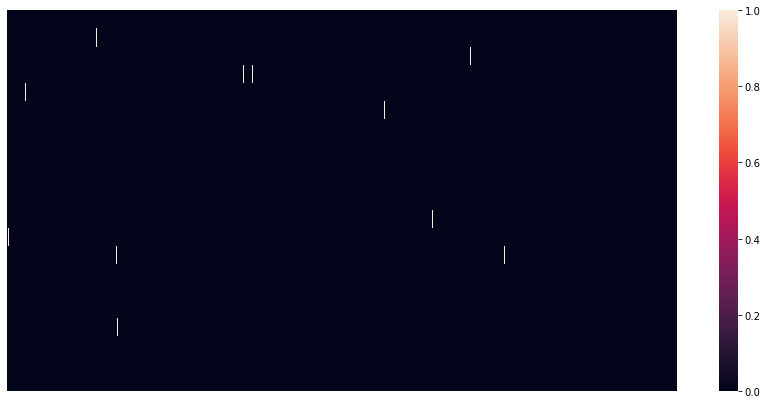

GO_term  count
2489   GO:0005829     11
13404  GO:0070062      8
2427   GO:0005737      7
2375   GO:0005634      7
2328   GO:0005524      5
2385   GO:0005654      5
2528   GO:0005886      5
2346   GO:0005576      3
3433   GO:0007507      3
1365   GO:0003779      3

In [296]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Skeletal muscle"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

counts_nontspec_Skeletal_muscle = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Skeletal_muscle = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Skeletal muscle"]==1,GO].sum()
    list_counts_nontspec_Skeletal_muscle.append(count)
counts_nontspec_Skeletal_muscle["count"] = list_counts_nontspec_Skeletal_muscle
counts_nontspec_Skeletal_muscle.sort_values("count", ascending=False).head(10)

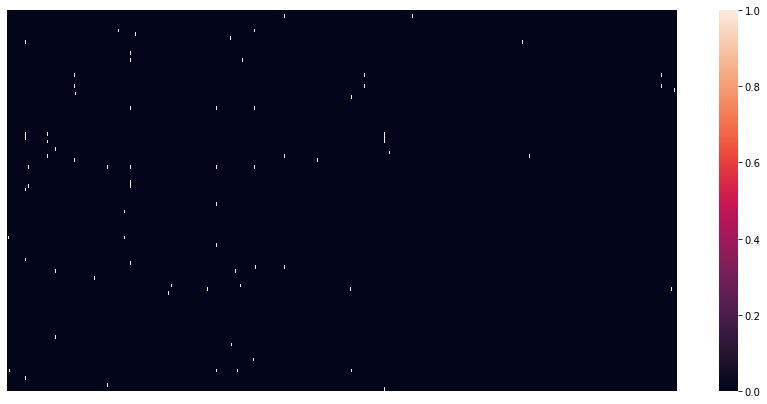

GO_term  count
2489   GO:0005829     67
13404  GO:0070062     48
2427   GO:0005737     44
2375   GO:0005634     41
2328   GO:0005524     34
5019   GO:0016020     27
2528   GO:0005886     25
2385   GO:0005654     23
9495   GO:0042802     22
2373   GO:0005615     21

In [297]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Skeletal muscle"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

counts_gen_Skeletal_muscle = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Skeletal_muscle = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Skeletal muscle"]==1,GO].sum()
    list_counts_gen_Skeletal_muscle.append(count)
counts_gen_Skeletal_muscle["count"] = list_counts_gen_Skeletal_muscle
counts_gen_Skeletal_muscle.sort_values("count", ascending=False).head(10)

## Skin

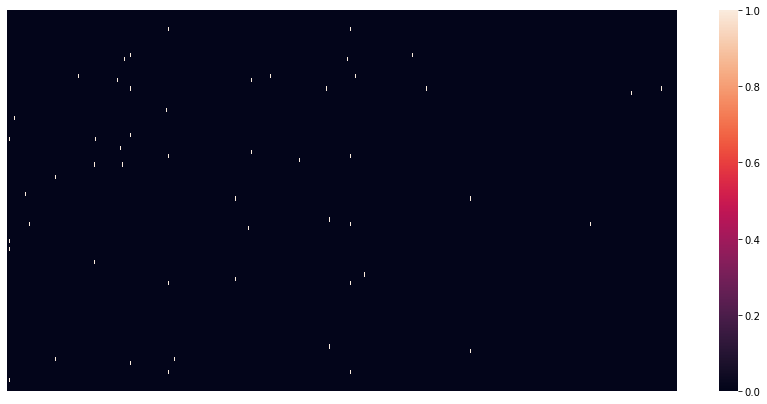

In [298]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["Skin"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [299]:
counts_tspec_Skin = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_Skin = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Skin"]==1,GO].sum()
    list_counts_tspec_Skin.append(count)
counts_tspec_Skin["count"] = list_counts_tspec_Skin
counts_tspec_Skin.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829     40
13404  GO:0070062     33
2375   GO:0005634     25
5019   GO:0016020     24
2427   GO:0005737     23
2385   GO:0005654     22
1350   GO:0003723     18
2373   GO:0005615     15
2528   GO:0005886     15
5020   GO:0016021     13

In [300]:
unique_Skin_tspec = pd.merge(counts_tspec_Skin, counts_tspec, how="inner", on =["GO_term"], suffixes=["_Skin", "_All"])
unique_Skin_tspec["percentage a/w_Skin"] = unique_Skin_tspec["count_Skin"]*100/t_spec_prot_GO_all[t_spec_prot_GO_all["Skin"]==1].shape[0]
unique_Skin_tspec["percentage a/w tspec"] =unique_Skin_tspec["count_All"]*100/t_spec_prot_GO_all.shape[0]
unique_Skin_tspec_mapped = pd.merge(unique_Skin_tspec,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Skin_tspec_mapped[((unique_Skin_tspec_mapped["percentage a/w_Skin"]>5)&(unique_Skin_tspec_mapped["percentage a/w tspec"]>10))]

GO_term  count_Skin  count_All  percentage a/w_Skin  \
2375   GO:0005634          25        667            27.777778   
2385   GO:0005654          22        520            24.444444   
2427   GO:0005737          23        566            25.555556   
2489   GO:0005829          40        700            44.444444   
2528   GO:0005886          15        474            16.666667   
5019   GO:0016020          24        273            26.666667   
5020   GO:0016021          13        254            14.444444   
9495   GO:0042802          13        204            14.444444   
13404  GO:0070062          33        327            36.666667   

       percentage a/w tspec                    GO term name  \
2375              34.065373                         nucleus   
2385              26.557712                     nucleoplasm   
2427              28.907048                       cytoplasm   
2489              35.750766                         cytosol   
2528              24.208376                 plasma membrane   
5019              13.942799                        membrane   
5020              12.972421  integral component of membrane   
9495              10.418795       identical protein binding   
13404             16.700715           extracellular exosome   

                                      GO term definition  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
5020   The component of a membrane consisting of the ...  
9495   Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [301]:
unique_Skin_tspec_mapped_sub = unique_Skin_tspec_mapped.copy()
unique_Skin_tspec_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Skin_tspec_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Skin_tspec_mapped_sub.drop(["count_Skin"], inplace=True, axis=1)
unique_Skin_tspec_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Skin_tspec_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Skin_tspec_mapped_sub.drop(["percentage a/w tspec"], inplace=True, axis=1)
unique_Skin_tspec_mapped_sub

percentage a/w_Skin
GO_term                        
GO:0000002                  0.0
GO:0000003                  0.0
GO:0000009                  0.0
GO:0000010                  0.0
GO:0000012                  0.0
...                         ...
GO:2001301                  0.0
GO:2001302                  0.0
GO:2001303                  0.0
GO:2001306                  0.0
GO:2001311                  0.0

[18793 rows x 1 columns]

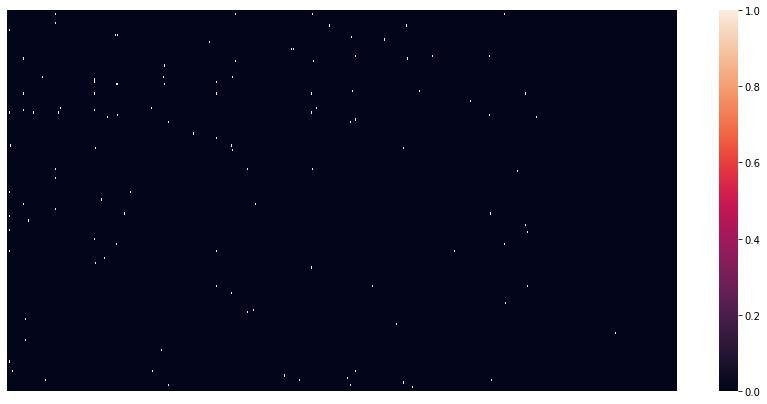

In [302]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Skin"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [303]:
counts_nontspec_Skin = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Skin = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Skin"]==1,GO].sum()
    list_counts_nontspec_Skin.append(count)
counts_nontspec_Skin["count"] = list_counts_nontspec_Skin
counts_nontspec_Skin.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829     97
13404  GO:0070062     93
2427   GO:0005737     68
2375   GO:0005634     65
1350   GO:0003723     52
5019   GO:0016020     52
2385   GO:0005654     36
2528   GO:0005886     31
2373   GO:0005615     29
2346   GO:0005576     28

In [304]:
unique_Skin_nontspec = pd.merge(counts_nontspec_Skin, counts_nontspec, how="inner", on =["GO_term"], suffixes=["_Skin", "_All"])
unique_Skin_nontspec["percentage a/w_Skin"] = unique_Skin_nontspec["count_Skin"]*100/non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Skin"]==1].shape[0]
unique_Skin_nontspec["percentage a/w nontspec"] = unique_Skin_nontspec["count_All"]*100/non_t_spec_prot_GO_all.shape[0]
unique_Skin_nontspec_mapped = pd.merge(unique_Skin_nontspec,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Skin_nontspec_mapped[((unique_Skin_nontspec_mapped["percentage a/w_Skin"]>5)&(unique_Skin_nontspec_mapped["percentage a/w nontspec"]>10))]

GO_term  count_Skin  count_All  percentage a/w_Skin  \
1350   GO:0003723          52        317            32.098765   
2328   GO:0005524          25        276            15.432099   
2375   GO:0005634          65        794            40.123457   
2385   GO:0005654          36        708            22.222222   
2427   GO:0005737          68        699            41.975309   
2489   GO:0005829          97        936            59.876543   
2528   GO:0005886          31        420            19.135802   
5019   GO:0016020          52        380            32.098765   
9495   GO:0042802          22        246            13.580247   
10863  GO:0046872           9        263             5.555556   
13404  GO:0070062          93        375            57.407407   

       percentage a/w nontspec               GO term name  \
1350                 15.546837                RNA binding   
2328                 13.536047                ATP binding   
2375                 38.940657                    nucleus   
2385                 34.722903                nucleoplasm   
2427                 34.281511                  cytoplasm   
2489                 45.904855                    cytosol   
2528                 20.598333            plasma membrane   
5019                 18.636587                   membrane   
9495                 12.064738  identical protein binding   
10863                12.898480          metal ion binding   
13404                18.391368      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
10863  Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [305]:
unique_Skin_nontspec_mapped_sub = unique_Skin_nontspec_mapped.copy()
unique_Skin_nontspec_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Skin_nontspec_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Skin_nontspec_mapped_sub.drop(["count_Skin"], inplace=True, axis=1)
unique_Skin_nontspec_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Skin_nontspec_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Skin_nontspec_mapped_sub.drop(["percentage a/w nontspec"], inplace=True, axis=1)
unique_Skin_nontspec_mapped_sub

percentage a/w_Skin
GO_term                        
GO:0000002             0.000000
GO:0000003             0.000000
GO:0000009             0.000000
GO:0000010             0.000000
GO:0000012             0.000000
...                         ...
GO:2001301             0.000000
GO:2001302             0.617284
GO:2001303             0.000000
GO:2001306             0.000000
GO:2001311             0.000000

[18793 rows x 1 columns]

In [306]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Skin"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [307]:
counts_gen_Skin = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Skin = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Skin"]==1,GO].sum()
    list_counts_gen_Skin.append(count)
counts_gen_Skin["count"] = list_counts_gen_Skin
counts_gen_Skin.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829    308
2375   GO:0005634    271
2427   GO:0005737    250
13404  GO:0070062    228
1350   GO:0003723    178
5019   GO:0016020    164
2385   GO:0005654    158
2528   GO:0005886    141
2553   GO:0005925     98
9495   GO:0042802     92

In [308]:
unique_Skin_gen = pd.merge(counts_gen_Skin, counts_gen, how="inner", on =["GO_term"], suffixes=["_Skin", "_All"])
unique_Skin_gen["percentage a/w_Skin"] = unique_Skin_gen["count_Skin"]*100/general_P_prot_GO_all[general_P_prot_GO_all["Skin"]==1].shape[0]
unique_Skin_gen["percentage a/w gen"] = unique_Skin_gen["count_All"]*100/general_P_prot_GO_all.shape[0]
unique_Skin_gen_mapped = pd.merge(unique_Skin_gen,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Skin_gen_mapped[((unique_Skin_gen_mapped["percentage a/w_Skin"]>5)&(unique_Skin_gen_mapped["percentage a/w gen"]>10))]

GO_term  count_Skin  count_All  percentage a/w_Skin  \
1350   GO:0003723         178        362            34.296724   
2328   GO:0005524          82        246            15.799615   
2375   GO:0005634         271        699            52.215800   
2385   GO:0005654         158        553            30.443160   
2427   GO:0005737         250        690            48.169557   
2489   GO:0005829         308        856            59.344894   
2528   GO:0005886         141        506            27.167630   
5019   GO:0016020         164        406            31.599229   
9495   GO:0042802          92        240            17.726397   
13404  GO:0070062         228        453            43.930636   

       percentage a/w gen               GO term name  \
1350            20.888632                RNA binding   
2328            14.195038                ATP binding   
2375            40.334680                    nucleus   
2385            31.909983                nucleoplasm   
2427            39.815349                  cytoplasm   
2489            49.394114                    cytosol   
2528            29.197923            plasma membrane   
5019            23.427582                   membrane   
9495            13.848817  identical protein binding   
13404           26.139642      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [309]:
unique_Skin_gen_mapped_sub = unique_Skin_gen_mapped.copy()
unique_Skin_gen_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Skin_gen_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Skin_gen_mapped_sub.drop(["count_Skin"], inplace=True, axis=1)
unique_Skin_gen_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Skin_gen_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Skin_gen_mapped_sub.drop(["percentage a/w gen"], inplace=True, axis=1)
unique_Skin_gen_mapped_sub

percentage a/w_Skin
GO_term                        
GO:0000002                  0.0
GO:0000003                  0.0
GO:0000009                  0.0
GO:0000010                  0.0
GO:0000012                  0.0
...                         ...
GO:2001301                  0.0
GO:2001302                  0.0
GO:2001303                  0.0
GO:2001306                  0.0
GO:2001311                  0.0

[18793 rows x 1 columns]

In [310]:
list_Skin = [unique_Skin_tspec_mapped[["GO_term", "percentage a/w tspec", "percentage a/w_Skin"]].set_index(["GO_term"]),
              unique_Skin_nontspec_mapped[["GO_term", "percentage a/w nontspec", "percentage a/w_Skin"]].set_index(["GO_term"]),
            unique_Skin_gen_mapped[["GO_term","percentage a/w gen","percentage a/w_Skin","GO term name",
                                     "GO term definition"]].set_index(["GO_term"])]
unique_Skin_all = pd.concat(list_Skin, axis=1)
unique_Skin_all.columns = ["percentage a/w tspec", "percentage a/w_Skin_tspec",
                            "percentage a/w nontspec", "percentage a/w_Skin_nontspec",
                           "percentage a/w gen", "percentage a/w_Skin_gen",
                           "GO term name", "GO term definition"]
unique_Skin_all[(((unique_Skin_all["percentage a/w_Skin_tspec"]>=1.75)&(unique_Skin_all["percentage a/w tspec"]<=0.3))|
                 ((unique_Skin_all["percentage a/w_Skin_nontspec"]>=1.75)&(unique_Skin_all["percentage a/w nontspec"]<=0.3))|
               ((unique_Skin_all["percentage a/w_Skin_gen"]>=1.75)&(unique_Skin_all["percentage a/w gen"]<=0.3)))]

percentage a/w tspec  percentage a/w_Skin_tspec  \
GO_term                                                       
GO:0000027              0.204290                   2.222222   
GO:0001968              0.204290                   2.222222   
GO:0003746              0.102145                   0.000000   
GO:0003756              0.204290                   1.111111   
GO:0004122              0.102145                   2.222222   
GO:0005956              0.102145                   2.222222   
GO:0006309              0.102145                   0.000000   
GO:0006535              0.102145                   2.222222   
GO:0006610              0.102145                   2.222222   
GO:0006611              0.051073                   0.000000   
GO:0008143              0.102145                   0.000000   
GO:0014067              0.255363                   2.222222   
GO:0015037              0.000000                   0.000000   
GO:0015935              0.204290                   3.333333   
GO:0016281              0.051073                   0.000000   
GO:0016973              0.153218                   2.222222   
GO:0019082              0.204290                   2.222222   
GO:0019343              0.102145                   2.222222   
GO:0019346              0.102145                   2.222222   
GO:0019773              0.153218                   3.333333   
GO:0030057              0.153218                   2.222222   
GO:0030127              0.102145                   2.222222   
GO:0031091              0.153218                   2.222222   
GO:0031404              0.102145                   2.222222   
GO:0032402              0.051073                   0.000000   
GO:0038098              0.102145                   2.222222   
GO:0042274              0.153218                   3.333333   
GO:0043195              0.255363                   2.222222   
GO:0043248              0.153218                   2.222222   
GO:0045901              0.000000                   0.000000   
GO:0045903              0.000000                   0.000000   
GO:0045905              0.000000                   0.000000   
GO:0048027              0.204290                   2.222222   
GO:0050658              0.153218                   2.222222   
GO:0050829              0.510725                   1.111111   
GO:0051603              0.255363                   3.333333   
GO:0061077              0.255363                   2.222222   
GO:0070814              0.102145                   2.222222   
GO:0098559              0.102145                   2.222222   
GO:0098586              0.255363                   0.000000   
GO:0150093              0.102145                   1.111111   
GO:1901687              0.153218                   0.000000   
GO:1904707              0.204290                   2.222222   
GO:2000059              0.153218                   2.222222   

            percentage a/w nontspec  percentage a/w_Skin_nontspec  \
GO_term                                                             
GO:0000027                 0.343306                      2.469136   
GO:0001968                 0.441393                      2.469136   
GO:0003746                 0.196175                      1.851852   
GO:0003756                 0.196175                      2.469136   
GO:0004122                 0.000000                      0.000000   
GO:0005956                 0.000000                      0.000000   
GO:0006309                 0.196175                      1.851852   
GO:0006535                 0.000000                      0.000000   
GO:0006610                 0.049044                      0.617284   
GO:0006611                 0.294262                      1.851852   
GO:0008143                 0.245218                      1.851852   
GO:0014067                 0.000000                      0.000000   
GO:0015037                 0.147131                      1.851852   
GO:0015935                 0.245218                      1.234568   
GO:001628

## Small intestine

In [311]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["Small intestine"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

counts_tspec_Small_intestine = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_Small_intestine = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Small intestine"]==1,GO].sum()
    list_counts_tspec_Small_intestine.append(count)
counts_tspec_Small_intestine["count"] = list_counts_tspec_Small_intestine
counts_tspec_Small_intestine.sort_values("count", ascending=False).head(10)

GO_term  count
13404  GO:0070062      7
2373   GO:0005615      7
2427   GO:0005737      6
2489   GO:0005829      6
2528   GO:0005886      5
2541   GO:0005902      4
2346   GO:0005576      4
2328   GO:0005524      4
5020   GO:0016021      4
3648   GO:0008284      3

In [312]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Small intestine"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

counts_nontspec_Small_intestine = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Small_intestine = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Small intestine"]==1,GO].sum()
    list_counts_nontspec_Small_intestine.append(count)
counts_nontspec_Small_intestine["count"] = list_counts_nontspec_Small_intestine
counts_nontspec_Small_intestine.sort_values("count", ascending=False).head(10)

GO_term  count
13404  GO:0070062     27
2489   GO:0005829     20
2373   GO:0005615     19
2346   GO:0005576     17
13325  GO:0062023     15
2427   GO:0005737     13
2375   GO:0005634     13
5019   GO:0016020      9
6326   GO:0030198      9
2528   GO:0005886      9

In [313]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Small intestine"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [314]:
counts_gen_Small_intestine = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Small_intestine = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Small intestine"]==1,GO].sum()
    list_counts_gen_Small_intestine.append(count)
counts_gen_Small_intestine["count"] = list_counts_gen_Small_intestine
counts_gen_Small_intestine.sort_values("count", ascending=False).head(10)

GO_term  count
13404  GO:0070062     90
2489   GO:0005829     88
2375   GO:0005634     67
2427   GO:0005737     61
5019   GO:0016020     49
2528   GO:0005886     44
1350   GO:0003723     44
2373   GO:0005615     38
2346   GO:0005576     36
2385   GO:0005654     30

In [315]:
unique_Small_intestine_gen = pd.merge(counts_gen_Small_intestine, counts_gen, how="inner", on =["GO_term"], suffixes=["_Small_intestine", "_All"])
unique_Small_intestine_gen["percentage a/w_Small_intestine"] = unique_Small_intestine_gen["count_Small_intestine"]*100/general_P_prot_GO_all[general_P_prot_GO_all["Small intestine"]==1].shape[0]
unique_Small_intestine_gen["percentage a/w gen"] = unique_Small_intestine_gen["count_All"]*100/general_P_prot_GO_all.shape[0]
unique_Small_intestine_gen_mapped = pd.merge(unique_Small_intestine_gen,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Small_intestine_gen_mapped[((unique_Small_intestine_gen_mapped["percentage a/w_Small_intestine"]>5)&(unique_Small_intestine_gen_mapped["percentage a/w gen"]>10))]

GO_term  count_Small_intestine  count_All  \
1350   GO:0003723                     44        362   
2328   GO:0005524                     16        246   
2375   GO:0005634                     67        699   
2385   GO:0005654                     30        553   
2427   GO:0005737                     61        690   
2489   GO:0005829                     88        856   
2528   GO:0005886                     44        506   
5019   GO:0016020                     49        406   
9495   GO:0042802                     24        240   
13404  GO:0070062                     90        453   

       percentage a/w_Small_intestine  percentage a/w gen  \
1350                        29.139073           20.888632   
2328                        10.596026           14.195038   
2375                        44.370861           40.334680   
2385                        19.867550           31.909983   
2427                        40.397351           39.815349   
2489                        58.278146           49.394114   
2528                        29.139073           29.197923   
5019                        32.450331           23.427582   
9495                        15.894040           13.848817   
13404                       59.602649           26.139642   

                    GO term name  \
1350                 RNA binding   
2328                 ATP binding   
2375                     nucleus   
2385                 nucleoplasm   
2427                   cytoplasm   
2489                     cytosol   
2528             plasma membrane   
5019                    membrane   
9495   identical protein binding   
13404      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [316]:
unique_Small_intestine_gen_mapped_sub = unique_Small_intestine_gen_mapped.copy()
unique_Small_intestine_gen_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Small_intestine_gen_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Small_intestine_gen_mapped_sub.drop(["count_Small_intestine"], inplace=True, axis=1)
unique_Small_intestine_gen_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Small_intestine_gen_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Small_intestine_gen_mapped_sub.drop(["percentage a/w gen"], inplace=True, axis=1)
unique_Small_intestine_gen_mapped_sub

percentage a/w_Small_intestine
GO_term                                   
GO:0000002                             0.0
GO:0000003                             0.0
GO:0000009                             0.0
GO:0000010                             0.0
GO:0000012                             0.0
...                                    ...
GO:2001301                             0.0
GO:2001302                             0.0
GO:2001303                             0.0
GO:2001306                             0.0
GO:2001311                             0.0

[18793 rows x 1 columns]

## Testis

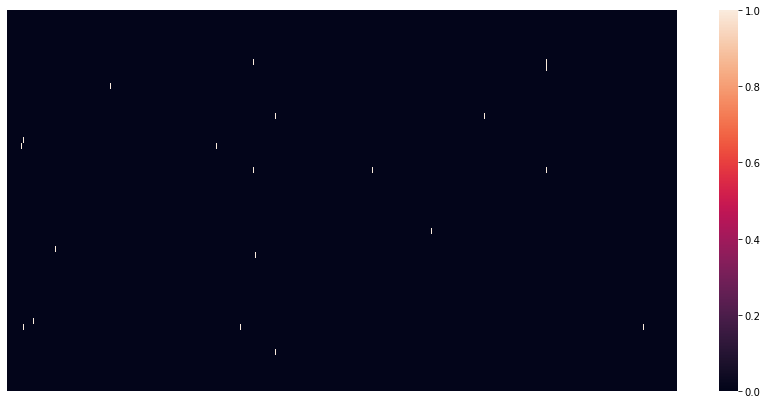

In [317]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["Testis"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [318]:
counts_tspec_Testis = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_Testis = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Testis"]==1,GO].sum()
    list_counts_tspec_Testis.append(count)
counts_tspec_Testis["count"] = list_counts_tspec_Testis
counts_tspec_Testis.sort_values("count", ascending=False).head(10)

GO_term  count
2375   GO:0005634     22
2427   GO:0005737     22
2385   GO:0005654     13
2489   GO:0005829     12
13404  GO:0070062     11
2528   GO:0005886     11
3370   GO:0007283      8
5020   GO:0016021      8
2346   GO:0005576      8
9495   GO:0042802      6

In [319]:
unique_Testis_tspec = pd.merge(counts_tspec_Testis, counts_tspec, how="inner", on =["GO_term"], suffixes=["_Testis", "_All"])
unique_Testis_tspec["percentage a/w_Testis"] = unique_Testis_tspec["count_Testis"]*100/t_spec_prot_GO_all[t_spec_prot_GO_all["Testis"]==1].shape[0]
unique_Testis_tspec["percentage a/w tspec"] = unique_Testis_tspec["count_All"]*100/t_spec_prot_GO_all.shape[0]
unique_Testis_tspec_mapped = pd.merge(unique_Testis_tspec,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Testis_tspec_mapped[((unique_Testis_tspec_mapped["percentage a/w_Testis"]>5)&(unique_Testis_tspec_mapped["percentage a/w tspec"]>10))]

GO_term  count_Testis  count_All  percentage a/w_Testis  \
2375   GO:0005634            22        667              34.920635   
2385   GO:0005654            13        520              20.634921   
2427   GO:0005737            22        566              34.920635   
2489   GO:0005829            12        700              19.047619   
2528   GO:0005886            11        474              17.460317   
5020   GO:0016021             8        254              12.698413   
9495   GO:0042802             6        204               9.523810   
13404  GO:0070062            11        327              17.460317   

       percentage a/w tspec                    GO term name  \
2375              34.065373                         nucleus   
2385              26.557712                     nucleoplasm   
2427              28.907048                       cytoplasm   
2489              35.750766                         cytosol   
2528              24.208376                 plasma membrane   
5020              12.972421  integral component of membrane   
9495              10.418795       identical protein binding   
13404             16.700715           extracellular exosome   

                                      GO term definition  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5020   The component of a membrane consisting of the ...  
9495   Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [320]:
unique_Testis_tspec_mapped_sub = unique_Testis_tspec_mapped.copy()
unique_Testis_tspec_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Testis_tspec_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Testis_tspec_mapped_sub.drop(["count_Testis"], inplace=True, axis=1)
#unique_Testis_tspec_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
#unique_Testis_tspec_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Testis_tspec_mapped_sub.drop(["percentage a/w tspec"], inplace=True, axis=1)
unique_Testis_tspec_mapped_sub

percentage a/w_Testis                                GO term name  \
GO_term                                                                         
GO:0000002               0.000000            mitochondrial genome maintenance   
GO:0000003               0.000000                                reproduction   
GO:0000009               0.000000      alpha-1,6-mannosyltransferase activity   
GO:0000010               0.000000   trans-hexaprenyltranstransferase activity   
GO:0000012               1.587302                  single strand break repair   
...                           ...                                         ...   
GO:2001301               0.000000                lipoxin biosynthetic process   
GO:2001302               0.000000                lipoxin A4 metabolic process   
GO:2001303               0.000000             lipoxin A4 biosynthetic process   
GO:2001306               0.000000             lipoxin B4 biosynthetic process   
GO:2001311               0.000000  lysobisphosphatidic acid metabolic process   

                                           GO term definition  
GO_term                                                        
GO:0000002  The maintenance of the structure and integrity...  
GO:0000003  The production of new individuals that contain...  
GO:0000009  Catalysis of the transfer of a mannose residue...  
GO:0000010  Catalysis of the reaction: all-trans-hexapreny...  
GO:0000012  The repair of single strand breaks in DNA. Rep...  
...                                                       ...  
GO:2001301  The chemical reactions and pathways resulting ...  
GO:2001302  The chemical reactions and pathways involving ...  
GO:2001303  The chemical reactions and pathways resulting ...  
GO:2001306  The chemical reactions and pathways resulting ...  
GO:2001311  The chemical reactions and pathways involving ...  

[18793 rows x 3 columns]

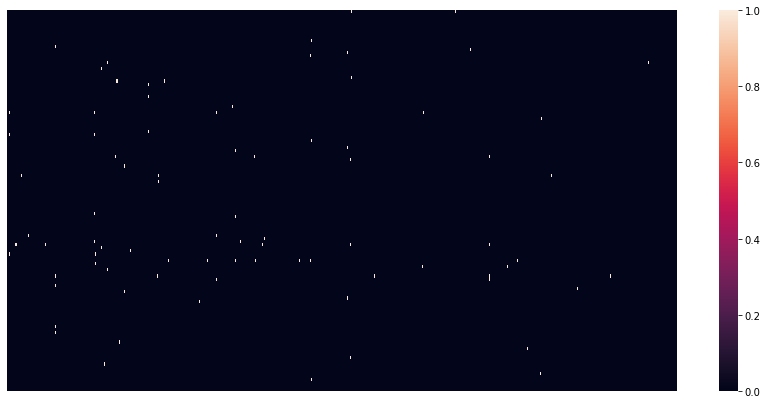

In [321]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Testis"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [322]:
counts_nontspec_Testis = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Testis = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Testis"]==1,GO].sum()
    list_counts_nontspec_Testis.append(count)
counts_nontspec_Testis["count"] = list_counts_nontspec_Testis
counts_nontspec_Testis.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829     61
2427   GO:0005737     46
2375   GO:0005634     45
2385   GO:0005654     38
2528   GO:0005886     25
5019   GO:0016020     19
2328   GO:0005524     18
9495   GO:0042802     18
13404  GO:0070062     17
10863  GO:0046872     13

In [323]:
unique_Testis_nontspec = pd.merge(counts_nontspec_Testis, counts_nontspec, how="inner", on =["GO_term"], suffixes=["_Testis", "_All"])
unique_Testis_nontspec["percentage a/w_Testis"] = unique_Testis_nontspec["count_Testis"]*100/non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Testis"]==1].shape[0]
unique_Testis_nontspec["percentage a/w nontspec"] = unique_Testis_nontspec["count_All"]*100/non_t_spec_prot_GO_all.shape[0]
unique_Testis_nontspec_mapped = pd.merge(unique_Testis_nontspec,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Testis_nontspec_mapped[((unique_Testis_nontspec_mapped["percentage a/w_Testis"]>5)&(unique_Testis_nontspec_mapped["percentage a/w nontspec"]>10))]

GO_term  count_Testis  count_All  percentage a/w_Testis  \
1350   GO:0003723            13        317              10.743802   
2328   GO:0005524            18        276              14.876033   
2375   GO:0005634            45        794              37.190083   
2385   GO:0005654            38        708              31.404959   
2427   GO:0005737            46        699              38.016529   
2489   GO:0005829            61        936              50.413223   
2528   GO:0005886            25        420              20.661157   
5019   GO:0016020            19        380              15.702479   
9495   GO:0042802            18        246              14.876033   
10863  GO:0046872            13        263              10.743802   
13404  GO:0070062            17        375              14.049587   

       percentage a/w nontspec               GO term name  \
1350                 15.546837                RNA binding   
2328                 13.536047                ATP binding   
2375                 38.940657                    nucleus   
2385                 34.722903                nucleoplasm   
2427                 34.281511                  cytoplasm   
2489                 45.904855                    cytosol   
2528                 20.598333            plasma membrane   
5019                 18.636587                   membrane   
9495                 12.064738  identical protein binding   
10863                12.898480          metal ion binding   
13404                18.391368      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
10863  Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [324]:
unique_Testis_nontspec_mapped_sub = unique_Testis_nontspec_mapped.copy()
unique_Testis_nontspec_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Testis_nontspec_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Testis_nontspec_mapped_sub.drop(["count_Testis"], inplace=True, axis=1)
unique_Testis_nontspec_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Testis_nontspec_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Testis_nontspec_mapped_sub.drop(["percentage a/w nontspec"], inplace=True, axis=1)
unique_Testis_nontspec_mapped_sub

percentage a/w_Testis
GO_term                          
GO:0000002               0.000000
GO:0000003               0.000000
GO:0000009               0.000000
GO:0000010               0.000000
GO:0000012               0.826446
...                           ...
GO:2001301               0.000000
GO:2001302               0.000000
GO:2001303               0.000000
GO:2001306               0.000000
GO:2001311               0.000000

[18793 rows x 1 columns]

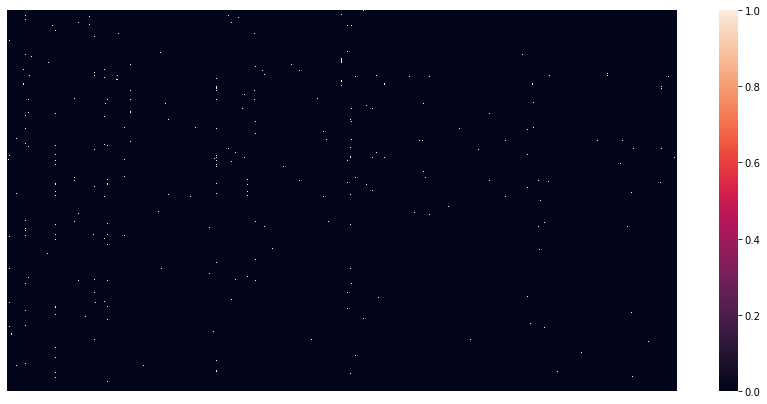

In [325]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Testis"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [326]:
counts_gen_Testis = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Testis = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Testis"]==1,GO].sum()
    list_counts_gen_Testis.append(count)
counts_gen_Testis["count"] = list_counts_gen_Testis
counts_gen_Testis.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829    261
2427   GO:0005737    242
2375   GO:0005634    228
2385   GO:0005654    183
2528   GO:0005886    138
13404  GO:0070062    130
1350   GO:0003723    128
5019   GO:0016020    107
2328   GO:0005524     81
9495   GO:0042802     80

In [327]:
unique_Testis_gen = pd.merge(counts_gen_Testis, counts_gen, how="inner", on =["GO_term"], suffixes=["_Testis", "_All"])
unique_Testis_gen["percentage a/w_Testis"] = unique_Testis_gen["count_Testis"]*100/general_P_prot_GO_all[general_P_prot_GO_all["Testis"]==1].shape[0]
unique_Testis_gen["percentage a/w gen"] = unique_Testis_gen["count_All"]*100/general_P_prot_GO_all.shape[0]
unique_Testis_gen_mapped = pd.merge(unique_Testis_gen,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Testis_gen_mapped[((unique_Testis_gen_mapped["percentage a/w_Testis"]>5)&(unique_Testis_gen_mapped["percentage a/w gen"]>10))]

GO_term  count_Testis  count_All  percentage a/w_Testis  \
1350   GO:0003723           128        362              25.858586   
2328   GO:0005524            81        246              16.363636   
2375   GO:0005634           228        699              46.060606   
2385   GO:0005654           183        553              36.969697   
2427   GO:0005737           242        690              48.888889   
2489   GO:0005829           261        856              52.727273   
2528   GO:0005886           138        506              27.878788   
5019   GO:0016020           107        406              21.616162   
9495   GO:0042802            80        240              16.161616   
13404  GO:0070062           130        453              26.262626   

       percentage a/w gen               GO term name  \
1350            20.888632                RNA binding   
2328            14.195038                ATP binding   
2375            40.334680                    nucleus   
2385            31.909983                nucleoplasm   
2427            39.815349                  cytoplasm   
2489            49.394114                    cytosol   
2528            29.197923            plasma membrane   
5019            23.427582                   membrane   
9495            13.848817  identical protein binding   
13404           26.139642      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [328]:
unique_Testis_gen_mapped_sub = unique_Testis_gen_mapped.copy()
unique_Testis_gen_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Testis_gen_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Testis_gen_mapped_sub.drop(["count_Testis"], inplace=True, axis=1)
unique_Testis_gen_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Testis_gen_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Testis_gen_mapped_sub.drop(["percentage a/w gen"], inplace=True, axis=1)
unique_Testis_gen_mapped_sub

percentage a/w_Testis
GO_term                          
GO:0000002                0.00000
GO:0000003                0.00000
GO:0000009                0.00000
GO:0000010                0.00000
GO:0000012                0.20202
...                           ...
GO:2001301                0.00000
GO:2001302                0.00000
GO:2001303                0.00000
GO:2001306                0.00000
GO:2001311                0.00000

[18793 rows x 1 columns]

In [329]:
list_Testis = [unique_Testis_tspec_mapped[["GO_term", "percentage a/w tspec", "percentage a/w_Testis"]].set_index(["GO_term"]),
              unique_Testis_nontspec_mapped[["GO_term", "percentage a/w nontspec", "percentage a/w_Testis"]].set_index(["GO_term"]),
            unique_Testis_gen_mapped[["GO_term","percentage a/w gen","percentage a/w_Testis","GO term name",
                                     "GO term definition"]].set_index(["GO_term"])]
unique_Testis_all = pd.concat(list_Testis, axis=1)
unique_Testis_all.columns = ["percentage a/w tspec", "percentage a/w_Testis_tspec",
                            "percentage a/w nontspec", "percentage a/w_Testis_nontspec",
                           "percentage a/w gen", "percentage a/w_Testis_gen",
                           "GO term name", "GO term definition"]
unique_Testis_all[(((unique_Testis_all["percentage a/w_Testis_tspec"]>=1.7)&(unique_Testis_all["percentage a/w tspec"]<=0.4))|
                 ((unique_Testis_all["percentage a/w_Testis_nontspec"]>=1.7)&(unique_Testis_all["percentage a/w nontspec"]<=0.4))|
               ((unique_Testis_all["percentage a/w_Testis_gen"]>=1.7)&(unique_Testis_all["percentage a/w gen"]<=0.4)))]
#DNA synthesis & related, mitosis, 4 sperm-specific terms out of 23, cilium formation, filaments
#metallocarboxypeptidase activity: also in Placenta, but nowhere near as high (1.76 in non tspec)

percentage a/w tspec  percentage a/w_Testis_tspec  \
GO_term                                                         
GO:0001673              0.204290                     3.174603   
GO:0002189              0.000000                     0.000000   
GO:0003351              0.102145                     3.174603   
GO:0004181              0.255363                     3.174603   
GO:0004749              0.000000                     0.000000   
GO:0005697              0.051073                     0.000000   
GO:0005875              0.051073                     0.000000   
GO:0006015              0.000000                     0.000000   
GO:0006164              0.000000                     0.000000   
GO:0007094              0.306435                     3.174603   
GO:0007178              0.153218                     3.174603   
GO:0009116              0.000000                     0.000000   
GO:0031514              0.357508                     3.174603   
GO:0032781              0.357508                     3.174603   
GO:0033391              0.255363                     3.174603   
GO:0035686              0.153218                     4.761905   
GO:0036158              0.204290                     3.174603   
GO:0043200              0.153218                     0.000000   
GO:0051018              0.204290                     3.174603   
GO:0051453              0.357508                     3.174603   
GO:0097225              0.255363                     3.174603   
GO:0097228              0.204290                     4.761905   
GO:0097229              0.153218                     3.174603   

            percentage a/w nontspec  percentage a/w_Testis_nontspec  \
GO_term                                                               
GO:0001673                 0.049044                        0.000000   
GO:0002189                 0.147131                        2.479339   
GO:0003351                 0.000000                        0.000000   
GO:0004181                 0.049044                        0.000000   
GO:0004749                 0.147131                        2.479339   
GO:0005697                 0.147131                        2.479339   
GO:0005875                 0.392349                        2.479339   
GO:0006015                 0.147131                        2.479339   
GO:0006164                 0.147131                        2.479339   
GO:0007094                 0.245218                        0.000000   
GO:0007178                 0.098087                        0.000000   
GO:0009116                 0.196175                        2.479339   
GO:0031514                 0.147131                        0.000000   
GO:0032781                 0.147131                        0.000000   
GO:0033391                 0.049044                        0.000000   
GO:0035686                 0.049044                        0.000000   
GO:0036158                 0.000000                        0.000000   
GO:0043200                 0.196175                        2.479339   
GO:0051018                 0.196175                        1.652893   
GO:0051453                 0.098087                        0.000000   
GO:0097225                 0.049044                        0.000000   
GO:0097228                 0.000000                        0.000000   
GO:0097229                 0.000000                        0.000000   

            percentage a/w gen  percentage a/w_Testis_gen  \
GO_term                                                     
GO:0001673            0.115407                   0.202020   
GO:0002189            0.115407                   0.404040   
GO:0003351            0.000000                   0.000000   
GO:0004181            0.115407                   0.000000   
GO:0004749            0.115407                   0.404040   
GO:0005697            0.288517                   0.202020   
GO:0005875            0.577034                   1.616162   
GO:0006015            0.115407                   0.404040   


## Umbilical cord

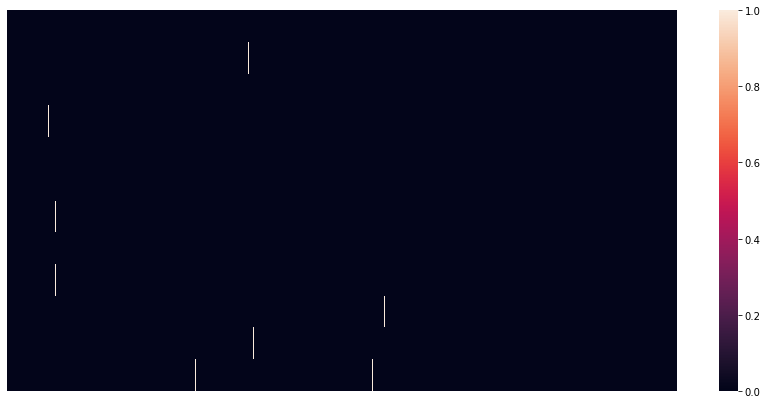

GO_term  count
2375   GO:0005634      5
2528   GO:0005886      4
13404  GO:0070062      4
5020   GO:0016021      3
2346   GO:0005576      3
2489   GO:0005829      3
2385   GO:0005654      2
9495   GO:0042802      2
2828   GO:0006412      2
2328   GO:0005524      2

In [330]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["Umbilical cord"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

counts_tspec_Umbilical_cord = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_Umbilical_cord = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Umbilical cord"]==1,GO].sum()
    list_counts_tspec_Umbilical_cord.append(count)
counts_tspec_Umbilical_cord["count"] = list_counts_tspec_Umbilical_cord
counts_tspec_Umbilical_cord.sort_values("count", ascending=False).head(10)

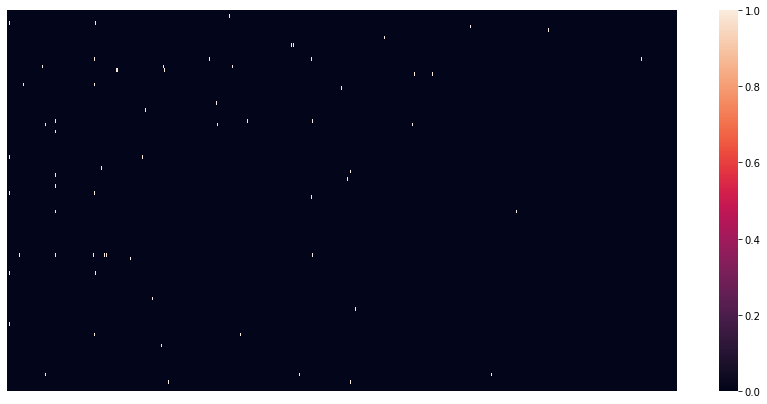

In [331]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Umbilical cord"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [332]:
counts_nontspec_Umbilical_cord = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Umbilical_cord = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Umbilical cord"]==1,GO].sum()
    list_counts_nontspec_Umbilical_cord.append(count)
counts_nontspec_Umbilical_cord["count"] = list_counts_nontspec_Umbilical_cord
counts_nontspec_Umbilical_cord.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829     62
13404  GO:0070062     48
2427   GO:0005737     41
2375   GO:0005634     34
5019   GO:0016020     31
1350   GO:0003723     29
2385   GO:0005654     17
2528   GO:0005886     17
2463   GO:0005783     16
2829   GO:0006413     15

In [333]:
unique_Umbilical_cord_nontspec = pd.merge(counts_nontspec_Umbilical_cord, counts_nontspec, how="inner", on =["GO_term"], suffixes=["_Umbilical_cord", "_All"])
unique_Umbilical_cord_nontspec["percentage a/w_Umbilical_cord"] = unique_Umbilical_cord_nontspec["count_Umbilical_cord"]*100/non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Umbilical cord"]==1].shape[0]
unique_Umbilical_cord_nontspec["percentage a/w nontspec"] = unique_Umbilical_cord_nontspec["count_All"]*100/non_t_spec_prot_GO_all.shape[0]
unique_Umbilical_cord_nontspec_mapped = pd.merge(unique_Umbilical_cord_nontspec,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Umbilical_cord_nontspec_mapped[((unique_Umbilical_cord_nontspec_mapped["percentage a/w_Umbilical_cord"]>5)&(unique_Umbilical_cord_nontspec_mapped["percentage a/w nontspec"]>10))]

GO_term  count_Umbilical_cord  count_All  \
1350   GO:0003723                    29        317   
2328   GO:0005524                    15        276   
2375   GO:0005634                    34        794   
2385   GO:0005654                    17        708   
2427   GO:0005737                    41        699   
2489   GO:0005829                    62        936   
2528   GO:0005886                    17        420   
5019   GO:0016020                    31        380   
9495   GO:0042802                    14        246   
13404  GO:0070062                    48        375   

       percentage a/w_Umbilical_cord  percentage a/w nontspec  \
1350                       27.619048                15.546837   
2328                       14.285714                13.536047   
2375                       32.380952                38.940657   
2385                       16.190476                34.722903   
2427                       39.047619                34.281511   
2489                       59.047619                45.904855   
2528                       16.190476                20.598333   
5019                       29.523810                18.636587   
9495                       13.333333                12.064738   
13404                      45.714286                18.391368   

                    GO term name  \
1350                 RNA binding   
2328                 ATP binding   
2375                     nucleus   
2385                 nucleoplasm   
2427                   cytoplasm   
2489                     cytosol   
2528             plasma membrane   
5019                    membrane   
9495   identical protein binding   
13404      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [334]:
unique_Umbilical_cord_nontspec_mapped_sub = unique_Umbilical_cord_nontspec_mapped.copy()
unique_Umbilical_cord_nontspec_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Umbilical_cord_nontspec_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Umbilical_cord_nontspec_mapped_sub.drop(["count_Umbilical_cord"], inplace=True, axis=1)
unique_Umbilical_cord_nontspec_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Umbilical_cord_nontspec_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Umbilical_cord_nontspec_mapped_sub.drop(["percentage a/w nontspec"], inplace=True, axis=1)
unique_Umbilical_cord_nontspec_mapped_sub

percentage a/w_Umbilical_cord
GO_term                                  
GO:0000002                       0.000000
GO:0000003                       0.000000
GO:0000009                       0.000000
GO:0000010                       0.000000
GO:0000012                       0.000000
...                                   ...
GO:2001301                       0.000000
GO:2001302                       0.952381
GO:2001303                       0.000000
GO:2001306                       0.000000
GO:2001311                       0.000000

[18793 rows x 1 columns]

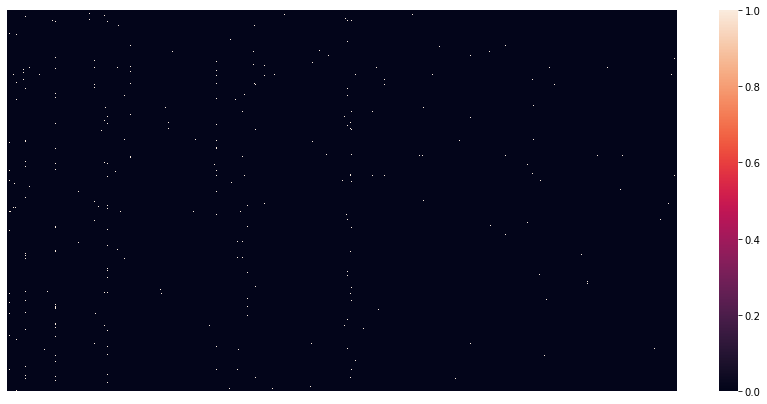

In [335]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Umbilical cord"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [336]:
counts_gen_Umbilical_cord = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Umbilical_cord = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Umbilical cord"]==1,GO].sum()
    list_counts_gen_Umbilical_cord.append(count)
counts_gen_Umbilical_cord["count"] = list_counts_gen_Umbilical_cord
counts_gen_Umbilical_cord.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829    307
2375   GO:0005634    271
2427   GO:0005737    254
13404  GO:0070062    193
1350   GO:0003723    193
2385   GO:0005654    185
5019   GO:0016020    145
2528   GO:0005886    125
2553   GO:0005925     90
9495   GO:0042802     82

In [337]:
unique_Umbilical_cord_gen = pd.merge(counts_gen_Umbilical_cord, counts_gen, how="inner", on =["GO_term"], suffixes=["_Umbilical_cord", "_All"])
unique_Umbilical_cord_gen["percentage a/w_Umbilical_cord"] = unique_Umbilical_cord_gen["count_Umbilical_cord"]*100/general_P_prot_GO_all[general_P_prot_GO_all["Umbilical cord"]==1].shape[0]
unique_Umbilical_cord_gen["percentage a/w gen"] = unique_Umbilical_cord_gen["count_All"]*100/general_P_prot_GO_all.shape[0]
unique_Umbilical_cord_gen_mapped = pd.merge(unique_Umbilical_cord_gen,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Umbilical_cord_gen_mapped[((unique_Umbilical_cord_gen_mapped["percentage a/w_Umbilical_cord"]>5)&(unique_Umbilical_cord_gen_mapped["percentage a/w gen"]>10))]

GO_term  count_Umbilical_cord  count_All  \
1350   GO:0003723                   193        362   
2328   GO:0005524                    76        246   
2375   GO:0005634                   271        699   
2385   GO:0005654                   185        553   
2427   GO:0005737                   254        690   
2489   GO:0005829                   307        856   
2528   GO:0005886                   125        506   
5019   GO:0016020                   145        406   
9495   GO:0042802                    82        240   
13404  GO:0070062                   193        453   

       percentage a/w_Umbilical_cord  percentage a/w gen  \
1350                       37.258687           20.888632   
2328                       14.671815           14.195038   
2375                       52.316602           40.334680   
2385                       35.714286           31.909983   
2427                       49.034749           39.815349   
2489                       59.266409           49.394114   
2528                       24.131274           29.197923   
5019                       27.992278           23.427582   
9495                       15.830116           13.848817   
13404                      37.258687           26.139642   

                    GO term name  \
1350                 RNA binding   
2328                 ATP binding   
2375                     nucleus   
2385                 nucleoplasm   
2427                   cytoplasm   
2489                     cytosol   
2528             plasma membrane   
5019                    membrane   
9495   identical protein binding   
13404      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [338]:
unique_Umbilical_cord_gen_mapped_sub = unique_Umbilical_cord_gen_mapped.copy()
unique_Umbilical_cord_gen_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Umbilical_cord_gen_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Umbilical_cord_gen_mapped_sub.drop(["count_Umbilical_cord"], inplace=True, axis=1)
unique_Umbilical_cord_gen_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
unique_Umbilical_cord_gen_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Umbilical_cord_gen_mapped_sub.drop(["percentage a/w gen"], inplace=True, axis=1)
unique_Umbilical_cord_gen_mapped_sub

percentage a/w_Umbilical_cord
GO_term                                  
GO:0000002                        0.00000
GO:0000003                        0.00000
GO:0000009                        0.00000
GO:0000010                        0.00000
GO:0000012                        0.19305
...                                   ...
GO:2001301                        0.00000
GO:2001302                        0.00000
GO:2001303                        0.00000
GO:2001306                        0.00000
GO:2001311                        0.00000

[18793 rows x 1 columns]

## Urinary bladder

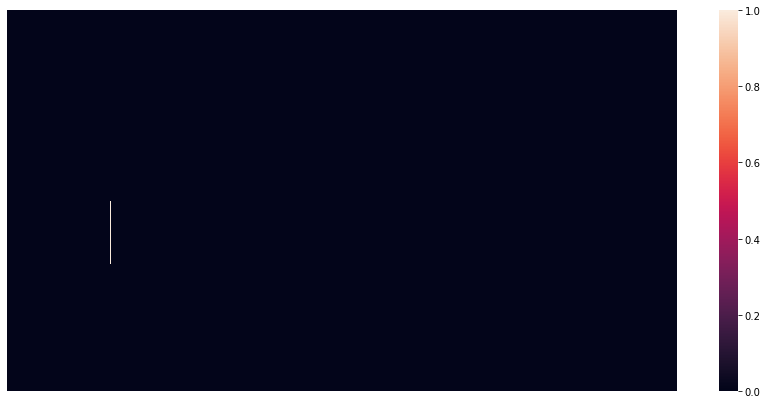

In [339]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["Urinary bladder"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [340]:
counts_tspec_Urinary_bladder = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_Urinary_bladder = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Urinary bladder"]==1,GO].sum()
    list_counts_tspec_Urinary_bladder.append(count)
counts_tspec_Urinary_bladder["count"] = list_counts_tspec_Urinary_bladder
counts_tspec_Urinary_bladder.sort_values("count", ascending=False).head(10)

GO_term  count
2375   GO:0005634      3
2528   GO:0005886      3
2489   GO:0005829      3
5019   GO:0016020      2
2346   GO:0005576      2
2428   GO:0005739      2
15861  GO:0106275      1
93     GO:0000209      1
5258   GO:0016567      1
1430   GO:0003925      1

In [341]:
unique_Urinary_bladder_tspec = pd.merge(counts_tspec_Urinary_bladder, counts_tspec, how="inner", on =["GO_term"], suffixes=["_Urinary_bladder", "_All"])
unique_Urinary_bladder_tspec["percentage a/w_Urinary_bladder"] = unique_Urinary_bladder_tspec["count_Urinary_bladder"]*100/t_spec_prot_GO_all[t_spec_prot_GO_all["Urinary bladder"]==1].shape[0]
unique_Urinary_bladder_tspec["percentage a/w tspec"] = unique_Urinary_bladder_tspec["count_All"]*100/t_spec_prot_GO_all.shape[0]
unique_Urinary_bladder_tspec_mapped = pd.merge(unique_Urinary_bladder_tspec,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Urinary_bladder_tspec_mapped[((unique_Urinary_bladder_tspec_mapped["percentage a/w_Urinary_bladder"]>5)&(unique_Urinary_bladder_tspec_mapped["percentage a/w tspec"]>10))]

GO_term  count_Urinary_bladder  count_All  \
2375   GO:0005634                      3        667   
2427   GO:0005737                      1        566   
2489   GO:0005829                      3        700   
2528   GO:0005886                      3        474   
5019   GO:0016020                      2        273   
5020   GO:0016021                      1        254   
13404  GO:0070062                      1        327   

       percentage a/w_Urinary_bladder  percentage a/w tspec  \
2375                        50.000000             34.065373   
2427                        16.666667             28.907048   
2489                        50.000000             35.750766   
2528                        50.000000             24.208376   
5019                        33.333333             13.942799   
5020                        16.666667             12.972421   
13404                       16.666667             16.700715   

                         GO term name  \
2375                          nucleus   
2427                        cytoplasm   
2489                          cytosol   
2528                  plasma membrane   
5019                         membrane   
5020   integral component of membrane   
13404           extracellular exosome   

                                      GO term definition  
2375   A membrane-bounded organelle of eukaryotic cel...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
5020   The component of a membrane consisting of the ...  
13404  A vesicle that is released into the extracellu...

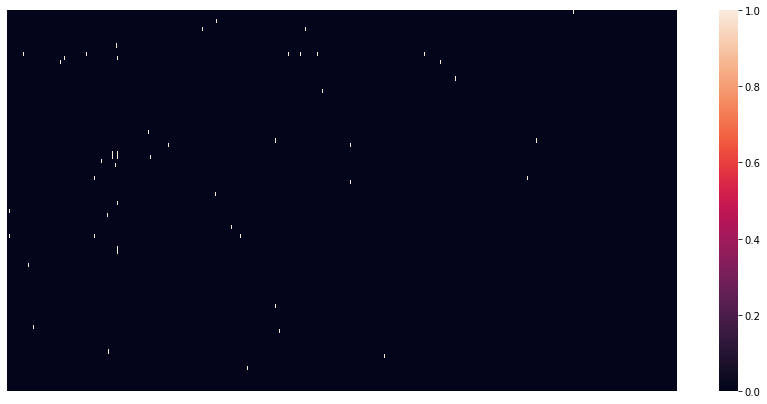

In [342]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Urinary bladder"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [343]:
counts_nontspec_Urinary_bladder = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Urinary_bladder = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Urinary bladder"]==1,GO].sum()
    list_counts_nontspec_Urinary_bladder.append(count)
counts_nontspec_Urinary_bladder["count"] = list_counts_nontspec_Urinary_bladder
counts_nontspec_Urinary_bladder.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829     36
13404  GO:0070062     29
2427   GO:0005737     22
2428   GO:0005739     21
2375   GO:0005634     20
2528   GO:0005886     18
2385   GO:0005654     17
2444   GO:0005759     17
2328   GO:0005524     13
2346   GO:0005576     12

In [344]:
unique_Urinary_bladder_nontspec = pd.merge(counts_nontspec_Urinary_bladder, counts_nontspec, how="inner", on =["GO_term"], suffixes=["_Urinary_bladder", "_All"])
unique_Urinary_bladder_nontspec["percentage a/w_Urinary_bladder"] = unique_Urinary_bladder_nontspec["count_Urinary_bladder"]*100/non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Urinary bladder"]==1].shape[0]
unique_Urinary_bladder_nontspec["percentage a/w nontspec"] = unique_Urinary_bladder_nontspec["count_All"]*100/non_t_spec_prot_GO_all.shape[0]
unique_Urinary_bladder_nontspec_mapped = pd.merge(unique_Urinary_bladder_nontspec,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Urinary_bladder_nontspec_mapped[((unique_Urinary_bladder_nontspec_mapped["percentage a/w_Urinary_bladder"]>5)&(unique_Urinary_bladder_nontspec_mapped["percentage a/w nontspec"]>10))]

GO_term  count_Urinary_bladder  count_All  \
1350   GO:0003723                      8        317   
2328   GO:0005524                     13        276   
2375   GO:0005634                     20        794   
2385   GO:0005654                     17        708   
2427   GO:0005737                     22        699   
2489   GO:0005829                     36        936   
2528   GO:0005886                     18        420   
5019   GO:0016020                     10        380   
9495   GO:0042802                     11        246   
10863  GO:0046872                     10        263   
13404  GO:0070062                     29        375   

       percentage a/w_Urinary_bladder  percentage a/w nontspec  \
1350                         8.695652                15.546837   
2328                        14.130435                13.536047   
2375                        21.739130                38.940657   
2385                        18.478261                34.722903   
2427                        23.913043                34.281511   
2489                        39.130435                45.904855   
2528                        19.565217                20.598333   
5019                        10.869565                18.636587   
9495                        11.956522                12.064738   
10863                       10.869565                12.898480   
13404                       31.521739                18.391368   

                    GO term name  \
1350                 RNA binding   
2328                 ATP binding   
2375                     nucleus   
2385                 nucleoplasm   
2427                   cytoplasm   
2489                     cytosol   
2528             plasma membrane   
5019                    membrane   
9495   identical protein binding   
10863          metal ion binding   
13404      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
10863  Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [345]:
unique_Urinary_bladder_nontspec_mapped_sub = unique_Urinary_bladder_nontspec_mapped.copy()
unique_Urinary_bladder_nontspec_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Urinary_bladder_nontspec_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Urinary_bladder_nontspec_mapped_sub.drop(["count_Urinary_bladder"], inplace=True, axis=1)
#unique_Urinary_bladder_nontspec_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
#unique_Urinary_bladder_nontspec_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Urinary_bladder_nontspec_mapped_sub.drop(["percentage a/w nontspec"], inplace=True, axis=1)
unique_Urinary_bladder_nontspec_mapped_sub

percentage a/w_Urinary_bladder  \
GO_term                                      
GO:0000002                             0.0   
GO:0000003                             0.0   
GO:0000009                             0.0   
GO:0000010                             0.0   
GO:0000012                             0.0   
...                                    ...   
GO:2001301                             0.0   
GO:2001302                             0.0   
GO:2001303                             0.0   
GO:2001306                             0.0   
GO:2001311                             0.0   

                                          GO term name  \
GO_term                                                  
GO:0000002            mitochondrial genome maintenance   
GO:0000003                                reproduction   
GO:0000009      alpha-1,6-mannosyltransferase activity   
GO:0000010   trans-hexaprenyltranstransferase activity   
GO:0000012                  single strand break repair   
...                                                ...   
GO:2001301                lipoxin biosynthetic process   
GO:2001302                lipoxin A4 metabolic process   
GO:2001303             lipoxin A4 biosynthetic process   
GO:2001306             lipoxin B4 biosynthetic process   
GO:2001311  lysobisphosphatidic acid metabolic process   

                                           GO term definition  
GO_term                                                        
GO:0000002  The maintenance of the structure and integrity...  
GO:0000003  The production of new individuals that contain...  
GO:0000009  Catalysis of the transfer of a mannose residue...  
GO:0000010  Catalysis of the reaction: all-trans-hexapreny...  
GO:0000012  The repair of single strand breaks in DNA. Rep...  
...                                                       ...  
GO:2001301  The chemical reactions and pathways resulting ...  
GO:2001302  The chemical reactions and pathways involving ...  
GO:2001303  The chemical reactions and pathways resulting ...  
GO:2001306  The chemical reactions and pathways resulting ...  
GO:2001311  The chemical reactions and pathways involving ...  

[18793 rows x 3 columns]

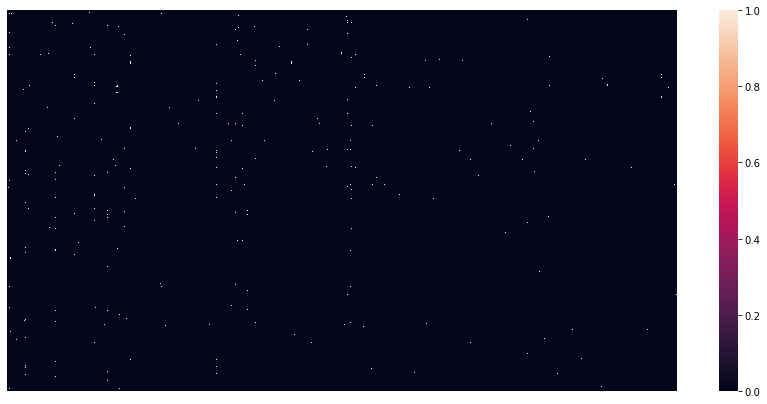

In [346]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Urinary bladder"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

In [347]:
counts_gen_Urinary_bladder = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Urinary_bladder = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Urinary bladder"]==1,GO].sum()
    list_counts_gen_Urinary_bladder.append(count)
counts_gen_Urinary_bladder["count"] = list_counts_gen_Urinary_bladder
counts_gen_Urinary_bladder.sort_values("count", ascending=False).head(10)

GO_term  count
2489   GO:0005829    281
2375   GO:0005634    210
2427   GO:0005737    209
13404  GO:0070062    187
2385   GO:0005654    159
2528   GO:0005886    135
5019   GO:0016020    125
1350   GO:0003723    124
2328   GO:0005524     75
9495   GO:0042802     67

In [348]:
unique_Urinary_bladder_gen = pd.merge(counts_gen_Urinary_bladder, counts_gen, how="inner", on =["GO_term"], suffixes=["_Urinary_bladder", "_All"])
unique_Urinary_bladder_gen["percentage a/w_Urinary_bladder"] = unique_Urinary_bladder_gen["count_Urinary_bladder"]*100/general_P_prot_GO_all[general_P_prot_GO_all["Urinary bladder"]==1].shape[0]
unique_Urinary_bladder_gen["percentage a/w gen"] = unique_Urinary_bladder_gen["count_All"]*100/general_P_prot_GO_all.shape[0]
unique_Urinary_bladder_gen_mapped = pd.merge(unique_Urinary_bladder_gen,GO_annot_map_sub, how="left", on=["GO_term"])
unique_Urinary_bladder_gen_mapped[((unique_Urinary_bladder_gen_mapped["percentage a/w_Urinary_bladder"]>5)&(unique_Urinary_bladder_gen_mapped["percentage a/w gen"]>10))]

GO_term  count_Urinary_bladder  count_All  \
1350   GO:0003723                    124        362   
2328   GO:0005524                     75        246   
2375   GO:0005634                    210        699   
2385   GO:0005654                    159        553   
2427   GO:0005737                    209        690   
2489   GO:0005829                    281        856   
2528   GO:0005886                    135        506   
5019   GO:0016020                    125        406   
9495   GO:0042802                     67        240   
13404  GO:0070062                    187        453   

       percentage a/w_Urinary_bladder  percentage a/w gen  \
1350                        25.941423           20.888632   
2328                        15.690377           14.195038   
2375                        43.933054           40.334680   
2385                        33.263598           31.909983   
2427                        43.723849           39.815349   
2489                        58.786611           49.394114   
2528                        28.242678           29.197923   
5019                        26.150628           23.427582   
9495                        14.016736           13.848817   
13404                       39.121339           26.139642   

                    GO term name  \
1350                 RNA binding   
2328                 ATP binding   
2375                     nucleus   
2385                 nucleoplasm   
2427                   cytoplasm   
2489                     cytosol   
2528             plasma membrane   
5019                    membrane   
9495   identical protein binding   
13404      extracellular exosome   

                                      GO term definition  
1350   Interacting selectively and non-covalently wit...  
2328   Interacting selectively and non-covalently wit...  
2375   A membrane-bounded organelle of eukaryotic cel...  
2385   That part of the nuclear content other than th...  
2427   All of the contents of a cell excluding the pl...  
2489   The part of the cytoplasm that does not contai...  
2528   The membrane surrounding a cell that separates...  
5019   A lipid bilayer along with all the proteins an...  
9495   Interacting selectively and non-covalently wit...  
13404  A vesicle that is released into the extracellu...

In [349]:
unique_Urinary_bladder_gen_mapped_sub = unique_Urinary_bladder_gen_mapped.copy()
unique_Urinary_bladder_gen_mapped_sub.set_index(["GO_term"], inplace=True)
unique_Urinary_bladder_gen_mapped_sub.drop(["count_All"], inplace=True, axis=1)
unique_Urinary_bladder_gen_mapped_sub.drop(["count_Urinary_bladder"], inplace=True, axis=1)
#unique_Urinary_bladder_gen_mapped_sub.drop(["GO term name"], inplace=True, axis=1)
#unique_Urinary_bladder_gen_mapped_sub.drop(["GO term definition"], inplace=True, axis=1)
unique_Urinary_bladder_gen_mapped_sub.drop(["percentage a/w gen"], inplace=True, axis=1)
unique_Urinary_bladder_gen_mapped_sub

percentage a/w_Urinary_bladder  \
GO_term                                      
GO:0000002                        0.209205   
GO:0000003                        0.000000   
GO:0000009                        0.000000   
GO:0000010                        0.000000   
GO:0000012                        0.000000   
...                                    ...   
GO:2001301                        0.000000   
GO:2001302                        0.000000   
GO:2001303                        0.000000   
GO:2001306                        0.000000   
GO:2001311                        0.000000   

                                          GO term name  \
GO_term                                                  
GO:0000002            mitochondrial genome maintenance   
GO:0000003                                reproduction   
GO:0000009      alpha-1,6-mannosyltransferase activity   
GO:0000010   trans-hexaprenyltranstransferase activity   
GO:0000012                  single strand break repair   
...                                                ...   
GO:2001301                lipoxin biosynthetic process   
GO:2001302                lipoxin A4 metabolic process   
GO:2001303             lipoxin A4 biosynthetic process   
GO:2001306             lipoxin B4 biosynthetic process   
GO:2001311  lysobisphosphatidic acid metabolic process   

                                           GO term definition  
GO_term                                                        
GO:0000002  The maintenance of the structure and integrity...  
GO:0000003  The production of new individuals that contain...  
GO:0000009  Catalysis of the transfer of a mannose residue...  
GO:0000010  Catalysis of the reaction: all-trans-hexapreny...  
GO:0000012  The repair of single strand breaks in DNA. Rep...  
...                                                       ...  
GO:2001301  The chemical reactions and pathways resulting ...  
GO:2001302  The chemical reactions and pathways involving ...  
GO:2001303  The chemical reactions and pathways resulting ...  
GO:2001306  The chemical reactions and pathways resulting ...  
GO:2001311  The chemical reactions and pathways involving ...  

[18793 rows x 3 columns]

In [350]:
list_Urinary_bladder = [unique_Urinary_bladder_tspec_mapped[["GO_term", "percentage a/w tspec", "percentage a/w_Urinary_bladder"]].set_index(["GO_term"]),
              unique_Urinary_bladder_nontspec_mapped[["GO_term", "percentage a/w nontspec", "percentage a/w_Urinary_bladder"]].set_index(["GO_term"]),
            unique_Urinary_bladder_gen_mapped[["GO_term","percentage a/w gen","percentage a/w_Urinary_bladder","GO term name",
                                     "GO term definition"]].set_index(["GO_term"])]
unique_Urinary_bladder_all = pd.concat(list_Urinary_bladder, axis=1)
unique_Urinary_bladder_all.columns = ["percentage a/w tspec", "percentage a/w_Urinary_bladder_tspec",
                            "percentage a/w nontspec", "percentage a/w_Urinary_bladder_nontspec",
                           "percentage a/w gen", "percentage a/w_Urinary_bladder_gen",
                           "GO term name", "GO term definition"]
unique_Urinary_bladder_all[(((unique_Urinary_bladder_all["percentage a/w_Urinary_bladder_tspec"]>=2.3)&(unique_Urinary_bladder_all["percentage a/w tspec"]<=0.15))|
                 ((unique_Urinary_bladder_all["percentage a/w_Urinary_bladder_nontspec"]>=2.3)&(unique_Urinary_bladder_all["percentage a/w nontspec"]<=0.15))|
               ((unique_Urinary_bladder_all["percentage a/w_Urinary_bladder_gen"]>=2.3)&(unique_Urinary_bladder_all["percentage a/w gen"]<=0.15)))]

percentage a/w tspec  percentage a/w_Urinary_bladder_tspec  \
GO_term                                                                  
GO:0003050              0.051073                             16.666667   
GO:0003956              0.051073                             16.666667   
GO:0006525              0.102145                             16.666667   
GO:0006552              0.000000                              0.000000   
GO:0007140              0.102145                             16.666667   
GO:0008146              0.102145                              0.000000   
GO:0009247              0.051073                             16.666667   
GO:0010529              0.102145                             16.666667   
GO:0015038              0.051073                             16.666667   
GO:0018120              0.051073                             16.666667   
GO:0033522              0.051073                             16.666667   
GO:0045838              0.051073                             16.666667   
GO:0050427              0.102145                              0.000000   
GO:0051923              0.051073                              0.000000   
GO:0070728              0.102145                             16.666667   
GO:0071596              0.051073                             16.666667   
GO:0080058              0.051073                             16.666667   
GO:0090277              0.051073                             16.666667   
GO:0097573              0.051073                             16.666667   
GO:0106274              0.051073                             16.666667   
GO:0106275              0.051073                             16.666667   
GO:2000651              0.051073                             16.666667   

            percentage a/w nontspec  percentage a/w_Urinary_bladder_nontspec  \
GO_term                                                                        
GO:0003050                 0.000000                                  0.00000   
GO:0003956                 0.049044                                  0.00000   
GO:0006525                 0.000000                                  0.00000   
GO:0006552                 0.147131                                  3.26087   
GO:0007140                 0.098087                                  0.00000   
GO:0008146                 0.147131                                  3.26087   
GO:0009247                 0.000000                                  0.00000   
GO:0010529                 0.000000                                  0.00000   
GO:0015038                 0.000000                                  0.00000   
GO:0018120                 0.000000                                  0.00000   
GO:0033522                 0.049044                                  0.00000   
GO:0045838                 0.000000                                  0.00000   
GO:0050427                 0.147131                                  3.26087   
GO:0051923                 0.147131                                  3.26087   
GO:0070728                 0.147131                                  0.00000   
GO:0071596                 0.049044                                  0.00000   
GO:0080058                 0.000000                                  0.00000   
GO:0090277                 0.000000                                  0.00000   
GO:0097573                 0.000000                                  0.00000   
GO:0106274                 0.000000                                  0.00000   
GO:0106275                 0.000000                                  0.00000   
GO:2000651                 0.098087                                  0.00000   

            percentage a/w gen  percentage a/w_Urinary_bladder_gen  \
GO_term                                                              
GO:0003050            0.000000                            0.000000   
GO:0003956            0.000000                            0.000000   
GO:0006525            0.000000    

## Urine

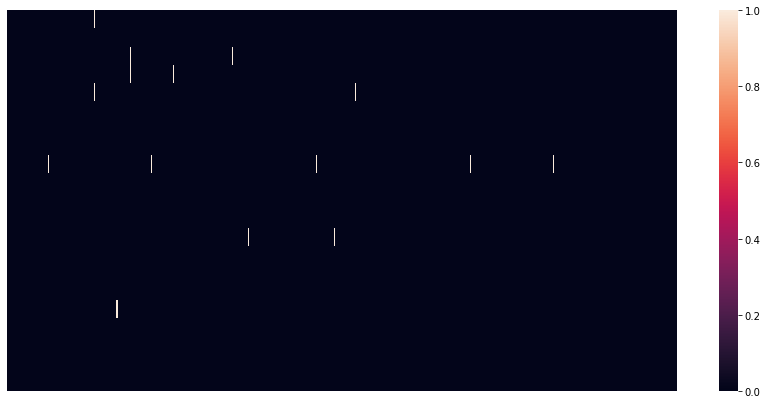

GO_term  count
13404  GO:0070062     16
2528   GO:0005886     13
2373   GO:0005615     10
2346   GO:0005576      9
2318   GO:0005509      6
5157   GO:0016324      5
13325  GO:0062023      4
3155   GO:0006898      4
2529   GO:0005887      4
2489   GO:0005829      4

In [351]:
plt.figure(figsize=(15,7))
heatmap = t_spec_prot_GO_all[t_spec_prot_GO_all["Urine"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

counts_tspec_Urine = pd.DataFrame({"GO_term":uni_list_all})
list_counts_tspec_Urine = []
for GO in uni_list_all:
    count = t_spec_prot_GO_all.loc[t_spec_prot_GO_all["Urine"]==1,GO].sum()
    list_counts_tspec_Urine.append(count)
counts_tspec_Urine["count"] = list_counts_tspec_Urine
counts_tspec_Urine.sort_values("count", ascending=False).head(10)

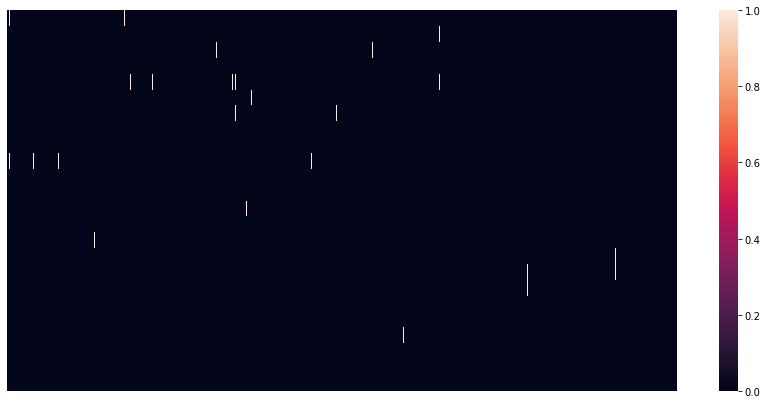

GO_term  count
13404  GO:0070062     18
2373   GO:0005615     10
2528   GO:0005886     10
2346   GO:0005576      9
2489   GO:0005829      8
5019   GO:0016020      7
5020   GO:0016021      6
10863  GO:0046872      5
4682   GO:0015031      5
2318   GO:0005509      5

In [352]:
plt.figure(figsize=(15,7))
heatmap = non_t_spec_prot_GO_all[non_t_spec_prot_GO_all["Urine"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

counts_nontspec_Urine = pd.DataFrame({"GO_term":uni_list_all})
list_counts_nontspec_Urine = []
for GO in uni_list_all:
    count = non_t_spec_prot_GO_all.loc[non_t_spec_prot_GO_all["Urine"]==1,GO].sum()
    list_counts_nontspec_Urine.append(count)
counts_nontspec_Urine["count"] = list_counts_nontspec_Urine
counts_nontspec_Urine.sort_values("count", ascending=False).head(10)

In [353]:
plt.figure(figsize=(15,7))
heatmap = general_P_prot_GO_all[general_P_prot_GO_all["Urine"]==1]
heatmap = heatmap[uni_list_all]
sns.heatmap(heatmap, xticklabels=False, yticklabels=False)
plt.show()

counts_gen_Urine = pd.DataFrame({"GO_term":uni_list_all})
list_counts_gen_Urine = []
for GO in uni_list_all:
    count = general_P_prot_GO_all.loc[general_P_prot_GO_all["Urine"]==1,GO].sum()
    list_counts_gen_Urine.append(count)
counts_gen_Urine["count"] = list_counts_gen_Urine
counts_gen_Urine.sort_values("count", ascending=False).head(10)

GO_term  count
13404  GO:0070062     29
2373   GO:0005615     19
2346   GO:0005576     18
14527  GO:0072562     15
2489   GO:0005829     14
2528   GO:0005886     13
2427   GO:0005737     10
2375   GO:0005634      9
10202  GO:0045087      8
3190   GO:0006958      8

We'll now combine the counts for the tissue having more than 100 protein in that category.

In [375]:

list_tspec_df = [unique_Blood_tspec_mapped_sub, unique_colon_tspec_mapped_sub, unique_Liver_tspec_mapped_sub,
                 unique_Lung_tspec_mapped_sub, unique_Lymph_node_tspec_mapped_sub, unique_PBMC_tspec_mapped_sub,
                 unique_Placenta_tspec_mapped_sub, unique_Skin_tspec_mapped_sub, unique_Testis_tspec_mapped_sub]
list_taspec_df = [unique_Blood_nontspec_mapped_sub, unique_colon_nontspec_mapped_sub, unique_Liver_nontspec_mapped_sub,
                  unique_Lung_nontspec_mapped_sub, unique_Lymph_node_nontspec_mapped_sub, unique_PBMC_nontspec_mapped_sub, 
                  unique_Placenta_nontspec_mapped_sub, unique_Skin_nontspec_mapped_sub, unique_Testis_nontspec_mapped_sub,
                  unique_Umbilical_cord_nontspec_mapped_sub, unique_Urinary_bladder_nontspec_mapped_sub]
list_genP_df = [unique_Blood_gen_mapped_sub, unique_Cerebrospinal_fluid_gen_mapped_sub, unique_colon_gen_mapped_sub, 
                unique_Kidney_gen_mapped_sub, unique_Liver_gen_mapped_sub, unique_Lung_gen_mapped_sub,
                unique_Lymph_node_gen_mapped_sub, unique_NK_cells_gen_mapped_sub, unique_Ovary_gen_mapped_sub,
                unique_Pancreas_gen_mapped_sub, unique_PBMC_gen_mapped_sub, unique_Placenta_gen_mapped_sub,
                unique_Skin_gen_mapped_sub, unique_Small_intestine_gen_mapped_sub, unique_Testis_gen_mapped_sub,
                unique_Umbilical_cord_gen_mapped_sub, unique_Urinary_bladder_gen_mapped_sub]

In [376]:
tspec_perc_comb = pd.concat(list_tspec_df, axis=1)

In [377]:
tspec_perc_comb[((tspec_perc_comb["percentage a/w_Blood"]>1.75)|(tspec_perc_comb["percentage a/w_Colon"]>1.75)|
               (tspec_perc_comb["percentage a/w_Liver"]>1.75)|(tspec_perc_comb["percentage a/w_Lung"]>1.75)|
               (tspec_perc_comb["percentage a/w_Lymph_node"]>1.75)|(tspec_perc_comb["percentage a/w_PBMC"]>1.75)|
               (tspec_perc_comb["percentage a/w_Placenta"]>1.75)|(tspec_perc_comb["percentage a/w_Skin"]>1.75)|
               (tspec_perc_comb["percentage a/w_Testis"]>1.75))&((tspec_perc_comb["percentage a/w tspec"]<0.5))]

percentage a/w_Blood  percentage a/w tspec  percentage a/w_Colon  \
GO_term                                                                        
GO:0000027              0.000000              0.204290              0.163934   
GO:0000050              0.000000              0.153218              0.000000   
GO:0000082              0.000000              0.306435              0.163934   
GO:0000096              0.000000              0.102145              0.000000   
GO:0000387              0.000000              0.255363              0.163934   
...                          ...                   ...                   ...   
GO:1990962              0.000000              0.051073              0.000000   
GO:2000059              0.000000              0.153218              0.163934   
GO:2000379              0.000000              0.357508              0.327869   
GO:2000552              0.000000              0.051073              0.000000   
GO:2001244              0.429185              0.255363              0.163934   

            percentage a/w_Liver  percentage a/w_Lung  \
GO_term                                                 
GO:0000027                   0.0             0.000000   
GO:0000050                   2.5             0.000000   
GO:0000082                   2.5             1.421801   
GO:0000096                   2.5             0.000000   
GO:0000387                   0.0             0.000000   
...                          ...                  ...   
GO:1990962                   2.5             0.000000   
GO:2000059                   0.0             0.000000   
GO:2000379                   2.5             0.473934   
GO:2000552                   2.5             0.000000   
GO:2001244                   2.5             0.473934   

            percentage a/w_Lymph_node  percentage a/w_PBMC  \
GO_term                                                      
GO:0000027                   0.307692                  0.0   
GO:0000050                   0.000000                  0.0   
GO:0000082                   0.000000                  0.0   
GO:0000096                   0.000000                  0.0   
GO:0000387                   0.307692                  0.0   
...                               ...                  ...   
GO:1990962                   0.000000                  0.0   
GO:2000059                   0.000000                  0.0   
GO:2000379                   0.000000                  0.0   
GO:2000552                   0.000000                  0.0   
GO:2001244                   0.307692                  0.0   

            percentage a/w_Placenta  percentage a/w_Skin  \
GO_term                                                    
GO:0000027                 0.000000             2.222222   
GO:0000050                 0.787402             0.000000   
GO:0000082                 0.000000             0.000000   
GO:0000096                 0.000000             0.000000   
GO:0000387                 2.362205             0.000000   
...                             ...                  ...   
GO:1990962                 0.000000             0.000000   
GO:2000059                 0.000000             2.222222   
GO:2000379                 0.000000             1.111111   
GO:2000552                 0.000000             0.000000   
GO:2001244                 0.000000             0.000000   

            percentage a/w_Testis  \
GO_term                             
GO:0000027               0.000000   
GO:0000050               0.000000   
GO:0000082               0.000000   
GO:0000096               0.000000   
GO:0000387               0.000000   
...                           ...   
GO:1990962               0.000000   
GO:2000059               0.000000   
GO:2000379               1.587302   
GO:2000552               0.000000   
GO:2001244               0.000000   

                                                 GO term name  \
GO_term                                                         
GO:0000027                   

In [378]:
tspec_perc_comb.loc["GO:0004181"]

percentage a/w_Blood                                                  0.858369
percentage a/w tspec                                                  0.255363
percentage a/w_Colon                                                       0.0
percentage a/w_Liver                                                       0.0
percentage a/w_Lung                                                        0.0
percentage a/w_Lymph_node                                                  0.0
percentage a/w_PBMC                                                        0.0
percentage a/w_Placenta                                                    0.0
percentage a/w_Skin                                                        0.0
percentage a/w_Testis                                                 3.174603
GO term name                                  metallocarboxypeptidase activity
GO term definition           Catalysis of the hydrolysis of C-terminal amin...
Name: GO:0004181, dtype: object

In [379]:
nontspec_perc_comb = pd.concat(list_taspec_df, axis=1)

In [380]:
nontspec_perc_comb[((nontspec_perc_comb["percentage a/w_Blood"]>1.75)|(nontspec_perc_comb["percentage a/w_Colon"]>1.75)|
               (nontspec_perc_comb["percentage a/w_Liver"]>1.75)|(nontspec_perc_comb["percentage a/w_Lung"]>1.75)|
               (nontspec_perc_comb["percentage a/w_Lymph_node"]>1.75)|(nontspec_perc_comb["percentage a/w_PBMC"]>1.75)|
               (nontspec_perc_comb["percentage a/w_Placenta"]>1.75)|(nontspec_perc_comb["percentage a/w_Skin"]>1.75)|
               (nontspec_perc_comb["percentage a/w_Testis"]>1.75)|(nontspec_perc_comb["percentage a/w_Umbilical_cord"]>1.75)|
                    (nontspec_perc_comb["percentage a/w_Urinary_bladder"]>1.75))&
                   ((nontspec_perc_comb["percentage a/w nontspec"]<0.5))]

percentage a/w_Blood  percentage a/w nontspec  \
GO_term                                                     
GO:0000027              0.314465                 0.343306   
GO:0000045              0.419287                 0.490436   
GO:0000062              0.000000                 0.196175   
GO:0001523              0.419287                 0.392349   
GO:0001533              0.104822                 0.343306   
...                          ...                      ...   
GO:1990830              0.524109                 0.441393   
GO:2000301              0.000000                 0.098087   
GO:2000379              0.733753                 0.490436   
GO:2000767              0.000000                 0.098087   
GO:2001237              0.419287                 0.441393   

            percentage a/w_Colon  percentage a/w_Liver  percentage a/w_Lung  \
GO_term                                                                       
GO:0000027              0.366838              0.523560             0.000000   
GO:0000045              0.440205              0.523560             0.427960   
GO:0000062              0.220103              1.570681             0.142653   
GO:0001523              0.146735              0.523560             0.570613   
GO:0001533              0.366838              0.000000             0.570613   
...                          ...                   ...                  ...   
GO:1990830              0.513573              0.523560             0.713267   
GO:2000301              0.146735              0.000000             0.000000   
GO:2000379              0.366838              1.047120             0.570613   
GO:2000767              0.000000              0.000000             0.000000   
GO:2001237              0.293470              1.047120             0.570613   

            percentage a/w_Lymph_node  percentage a/w_PBMC  \
GO_term                                                      
GO:0000027                   0.091575             0.456621   
GO:0000045                   0.732601             0.913242   
GO:0000062                   0.000000             0.000000   
GO:0001523                   0.091575             0.913242   
GO:0001533                   0.091575             0.000000   
...                               ...                  ...   
GO:1990830                   0.549451             0.456621   
GO:2000301                   0.183150             0.456621   
GO:2000379                   0.183150             0.456621   
GO:2000767                   0.000000             0.456621   
GO:2001237                   0.091575             0.913242   

            percentage a/w_Placenta  percentage a/w_Skin  \
GO_term                                                    
GO:0000027                 0.881057             2.469136   
GO:0000045                 0.000000             1.851852   
GO:0000062                 0.440529             0.000000   
GO:0001523                 0.881057             0.617284   
GO:0001533                 0.881057             1.234568   
...                             ...                  ...   
GO:1990830                 0.000000             0.617284   
GO:2000301                 0.000000             0.000000   
GO:2000379                 0.440529             0.617284   
GO:2000767                 0.440529             0.000000   
GO:2001237                 0.000000             1.851852   

            percentage a/w_Testis  percentage a/w_Umbilical_cord  \
GO_term                                                            
GO:0000027               0.000000                       0.952381   
GO:0000045               0.826446                       0.000000   
GO:0000062               0.000000                       0.000000   
GO:0001523               0.000000                       0.000000   
GO:0001533               0.000000                       0.000000   
...                           ...                            ...   
GO:1990830               0.826446                       1.

In [381]:
gen_perc_comb = pd.concat(list_genP_df, axis=1)

In [382]:
gen_perc_comb[((gen_perc_comb["percentage a/w_Blood"]>1.75)|(gen_perc_comb["percentage a/w_Cerebrospinal_fluid"]>1.75)|
               (gen_perc_comb["percentage a/w_Colon"]>1.75)|(gen_perc_comb["percentage a/w_Kidney"]>1.75)|
               (gen_perc_comb["percentage a/w_Liver"]>1.75)|(gen_perc_comb["percentage a/w_Lung"]>1.75)|
               (gen_perc_comb["percentage a/w_Lymph_node"]>1.75)|(gen_perc_comb["percentage a/w_NK_cells"]>1.75)|
               (gen_perc_comb["percentage a/w_Ovary"]>1.75)|(gen_perc_comb["percentage a/w_Pancreas"]>1.75)|
               (gen_perc_comb["percentage a/w_PBMC"]>1.75)|(gen_perc_comb["percentage a/w_Placenta"]>1.75)|
               (gen_perc_comb["percentage a/w_Skin"]>1.75)|(gen_perc_comb["percentage a/w_Small_intestine"]>1.75)|
               (gen_perc_comb["percentage a/w_Testis"]>1.75)|(gen_perc_comb["percentage a/w_Umbilical_cord"]>1.5)|
                    (gen_perc_comb["percentage a/w_Urinary_bladder"]>1.75))&
                   ((gen_perc_comb["percentage a/w gen"]<0.5))]

percentage a/w_Blood  percentage a/w_Cerebrospinal_fluid  \
GO_term                                                                
GO:0003746              0.462963                            0.584112   
GO:0004024              0.000000                            0.000000   
GO:0004459              0.000000                            0.000000   
GO:0004745              0.000000                            0.000000   
GO:0006069              0.066138                            0.116822   
GO:0006090              0.264550                            0.350467   
GO:0006635              0.198413                            0.350467   
GO:0007339              0.330688                            0.350467   
GO:0007605              0.462963                            0.467290   
GO:0008266              0.529101                            0.467290   
GO:0009267              0.264550                            0.350467   
GO:0016460              0.198413                            0.233645   
GO:0020037              0.330688                            0.584112   
GO:0030048              0.462963                            0.584112   
GO:0030199              0.330688                            0.467290   
GO:0030280              0.132275                            0.116822   
GO:0030506              0.529101                            0.700935   
GO:0030898              0.396825                            0.467290   
GO:0031640              0.264550                            0.350467   
GO:0032233              0.264550                            0.350467   
GO:0034329              0.396825                            0.350467   
GO:0034504              0.264550                            0.233645   
GO:0042572              0.000000                            0.000000   
GO:0042573              0.000000                            0.000000   
GO:0042744              0.198413                            0.350467   
GO:0042788              0.396825                            0.233645   
GO:0044295              0.330688                            0.584112   
GO:0050660              0.132275                            0.116822   
GO:0051287              0.066138                            0.116822   
GO:0060395              0.462963                            0.584112   
GO:0061624              0.000000                            0.000000   
GO:0070180              0.198413                            0.000000   
GO:0097513              0.198413                            0.233645   
GO:0098869              0.198413                            0.350467   

            percentage a/w gen  percentage a/w_Colon  percentage a/w_Kidney  \
GO_term                                                                       
GO:0003746            0.461627              0.475059               0.796813   
GO:0004024            0.173110              0.237530               0.597610   
GO:0004459            0.230814              0.079177               0.000000   
GO:0004745            0.173110              0.237530               0.597610   
GO:0006069            0.288517              0.395883               0.796813   
GO:0006090            0.403924              0.395883               0.597610   
GO:0006635            0.346220              0.475059               1.195219   
GO:0007339            0.403924              0.475059               0.597610   
GO:0007605            0.461627              0.554236               0.996016   
GO:0008266            0.461627              0.633413               0.796813   
GO:0009267            0.461627              0.554236               0.398406   
GO:0016460            0.173110              0.237530               0.398406   
GO:0020037            0.403924              0.395883               0.796813   
GO:0030048            0.403924              0.395883               0.597610   
GO:0030199            0.403924              0.316706               0.398406   
GO:0030280            0.173110              0.158353               0.199203 